In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
from datetime import datetime, timedelta
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from collections import Counter
import re
#from apyori import apriori

from mlxtend.frequent_patterns import apriori, association_rules
import itertools
import networkx as nx
from matplotlib.patches import Patch

#from sklearn.cluster import DBSCAN
#from sklearn.neighbors import NearestNeighbors
#import skfuzzy as fuzz

### Online Retail Data v3

In [2]:
df = pd.read_csv("D:/Documents/UM Master of Data Science/Semester 2/WQD7005 Data Mining/data/Online Retail Data V3/RetailDataIII.csv")
df.head(6)

C:\Users\wz_ch\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Bill MerchandiseID                           Product  Quota    BillDate  \
0  532657         21314     Small glass heart trinket pot     12  2018-11-14   
1  563214         22383            Lunch bag suki design       2   2019-8-14   
2  507597         22561       Wooden school colouring set     12   2018-5-10   
3  491634         21588    Retro spot giant  tube matches      1  2017-12-11   
4  496007        85232B  Set/3 russian doll stacking tins      3   2018-1-28   
5  539041         21832              Chocolate calculator      4  2018-12-15   

   Amount  CustomerID         Country  
0    4.10     14562.0  United Kingdom  
1    3.65     16370.0  United Kingdom  
2    3.65     17700.0  United Kingdom  
3    4.55     17841.0  United Kingdom  
4    6.95     15203.0  United Kingdom  
5    3.65     15456.0  United Kingdom

In [3]:
df.head(12)

Bill MerchandiseID                            Product  Quota  \
0   532657         21314      Small glass heart trinket pot     12   
1   563214         22383             Lunch bag suki design       2   
2   507597         22561        Wooden school colouring set     12   
3   491634         21588     Retro spot giant  tube matches      1   
4   496007        85232B   Set/3 russian doll stacking tins      3   
5   539041         21832               Chocolate calculator      4   
6   575905         22089      Paper bunting vintage paisley      6   
7   540026         21519    Gin & tonic diet greeting card       2   
8   536804         22988                  Soldiers egg cup      72   
9   546899         20719             Woodland charlotte bag     50   
10  514369         22366                  Door mat airmail       2   
11  503547         84077  World war 2 gliders asstd designs     48   

      BillDate  Amount  CustomerID         Country  
0   2018-11-14    4.10     14562.0  United Kingdom  
1    2019-8-14    3.65     16370.0  United Kingdom  
2    2018-5-10    3.65     17700.0  United Kingdom  
3   2017-12-11    4.55     17841.0  United Kingdom  
4    2018-1-28    6.95     15203.0  United Kingdom  
5   2018-12-15    3.65     15456.0  United Kingdom  
6   2019-11-11    4.95     13732.0  United Kingdom  
7     2019-1-4    2.85         NaN  United Kingdom  
8    2018-12-2    3.25     14031.0  United Kingdom  
9    2019-3-17    2.72     14298.0  United Kingdom  
10    2018-7-2    9.49     12477.0         Germany  
11    2018-4-1    2.21     14049.0  United Kingdom

In [4]:
df['Country'].value_counts()

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

## Sample the data

In [5]:
df = df[df['Country'].isin(['EIRE', 'Germany', 'France', 'Netherlands', 'Spain'])]
df

Bill MerchandiseID                         Product  Quota  \
10       514369         22366               Door mat airmail       2   
15       569699         22751  Feltcraft princess olivia doll      1   
30       516839         20726              Lunch bag woodland     10   
34       575886         21731   Red toadstool led night light     12   
47       560283         23196   Vintage leaf magnetic notepad     12   
...         ...           ...                             ...    ...   
1067332  548409         22745      Poppy's playhouse bedroom      24   
1067348  547383         22960        Jam making set with jars      6   
1067350  570672         23374         Red spot paper gift bag     10   
1067360  516464         22423        Regency cakestand 3 tier      2   
1067367  514387         21980  Pack of 12 red spotty tissues      48   

           BillDate  Amount  CustomerID  Country  
10         2018-7-2    9.49     12477.0  Germany  
15        2019-10-5    5.75     12723.0   France  
30        2018-7-23    3.65     12647.0  Germany  
34       2019-11-11    3.65     12517.0  Germany  
47        2019-7-18    2.00         NaN     EIRE  
...             ...     ...         ...      ...  
1067332   2019-3-31    4.10     12731.0   France  
1067348   2019-3-22    6.25     12613.0  Germany  
1067350  2019-10-11    2.82     12536.0   France  
1067360   2018-7-20   14.75     14911.0     EIRE  
1067367    2018-7-2    2.29     12633.0  Germany  

[58771 rows x 8 columns]

In [6]:
df.shape

(58771, 8)

## Visualisation (Explore)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58771 entries, 10 to 1067367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bill           58771 non-null  object 
 1   MerchandiseID  58771 non-null  object 
 2   Product        58771 non-null  object 
 3   Quota          58771 non-null  int64  
 4   BillDate       58771 non-null  object 
 5   Amount         58771 non-null  float64
 6   CustomerID     56972 non-null  float64
 7   Country        58771 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ MB


In [8]:
sns.__version__

'0.11.1'

### Countplot

In [9]:
#plt.figure(figsize = (11, 7))

#sns.countplot(data=sample_df, y="Product", palette="Blues", order=df['Product'].value_counts().iloc[:10].index)
#plt.title('Countplot of Top 10 Products')
#plt.show()

### Barplot

In [10]:
#plt.figure(figsize = (11, 7))

#sns.barplot(data=sample_df, y="Product", x="Quota", palette="Oranges", order=df['Product'].value_counts().iloc[:10].index)
#plt.title('Barplot of Top 10 Products with the Highest Quota')
#plt.show()

In [11]:
group_df = df.groupby('Product', as_index = False).agg('sum').sort_values(by ='Quota', ascending=False)
group_df.head()

Product  Quota   Amount  CustomerID
2703        Red toadstool led night light  10876  1083.10   3770789.0
2211      Pack of 72 retrospot cake cases   9858   443.26   2232670.0
3324                  Spaceboy lunch box    9761   922.95   3090672.0
2568                   Rabbit night light   9370   451.51   1456000.0
2855  Round snack boxes set of4 woodland    9293  1956.65   5137920.0

In [12]:
group_df.shape

(3857, 4)

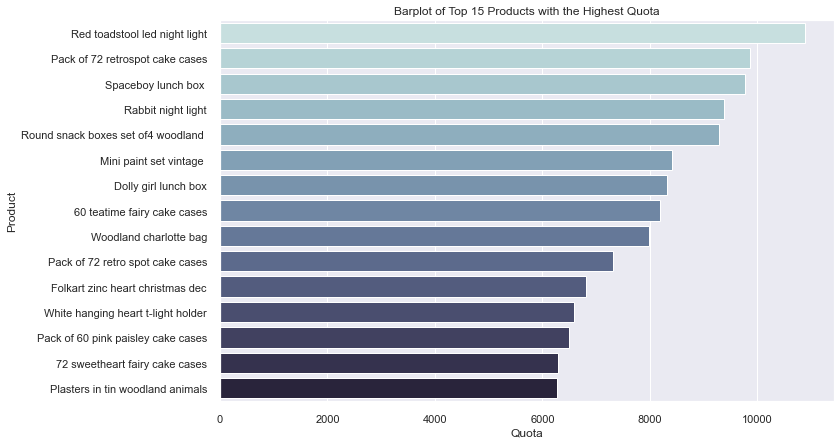

In [13]:
plt.figure(figsize = (11, 7))

sns.set(font_scale=1)
sns.barplot(data=group_df[0:15], y="Product", x="Quota", palette="ch:start=.2,rot=-.3")
plt.title('Barplot of Top 15 Products with the Highest Quota')
plt.show()

In [14]:
group_df = df.groupby('Product', as_index = False).agg('sum').sort_values(by ='Quota', ascending=True)
group_df.head()

Product  Quota    Amount  CustomerID
2632     Red polkadot pudding bowl  -3630     14.43     55614.0
443     Blue polkadot pudding bowl  -2484     10.33     41797.0
2077    Multicolour polkadot plate   -684      2.10     14277.0
1947                        Manual   -497  85319.94   1383909.0
1785  La palmiera wall thermometer   -368      6.80     28433.0

In [15]:
group_df.shape

(3857, 4)

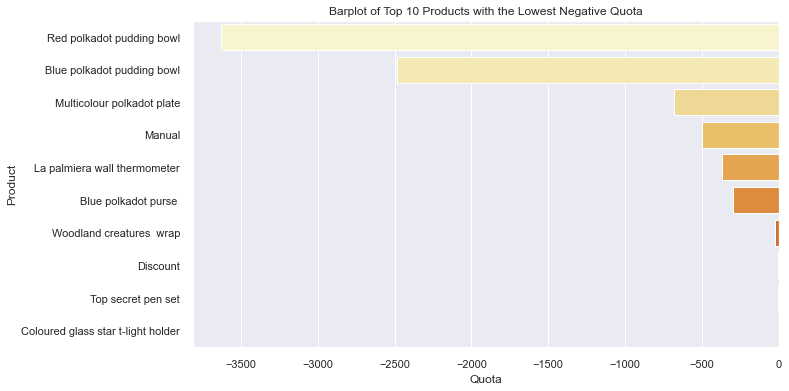

In [16]:
plt.figure(figsize = (10.5, 6))

sns.barplot(data=group_df[0:10], y="Product", x="Quota", palette="YlOrBr")
plt.title('Barplot of Top 10 Products with the Lowest Negative Quota')
plt.show()

In [17]:
group_df = df[df['Quota'] > 0].groupby('Product', as_index = False).agg('sum').sort_values(by ='Quota', ascending=True)
group_df.head()

Product  Quota  Amount  CustomerID
3721  Wood and glass medicine cabinet      1   31.95     14156.0
2485    Playing cards vintage doiley       1    3.25     14646.0
1081    Embossed heart 3 drawer shelf      1   14.75     14156.0
1850        Letter "s" bling key ring      1    3.25     12577.0
1849        Letter "l" bling key ring      1    3.25     12573.0

In [18]:
group_df.shape

(3846, 4)

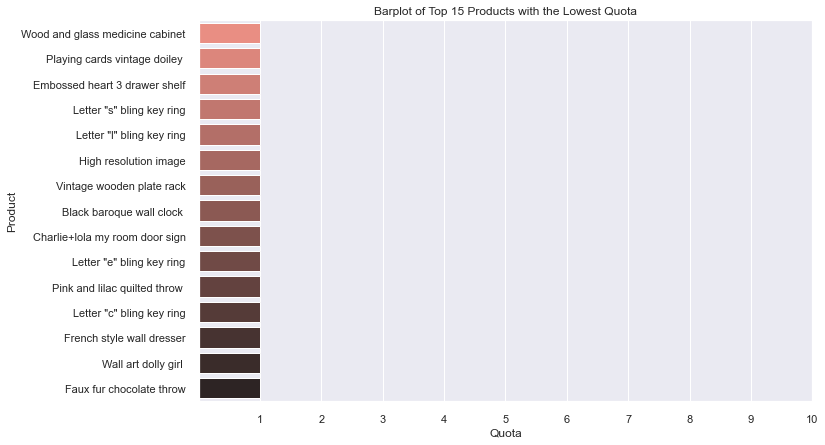

In [19]:
plt.figure(figsize = (11, 7))

sns.barplot(data=group_df[0:15], y="Product", x="Quota", palette="dark:salmon_r")
plt.title('Barplot of Top 15 Products with the Lowest Quota')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
plt.show()

In [20]:
group_df = df.groupby('Product', as_index = False).agg({'Bill': 'nunique'}).sort_values(by ='Bill', ascending=False)
group_df.head()

Product  Bill
2531                              Postage  1349
2716             Regency cakestand 3 tier   408
2855  Round snack boxes set of4 woodland    392
2703        Red toadstool led night light   295
2482       Plasters in tin circus parade    270

In [21]:
group_df.shape

(3857, 2)

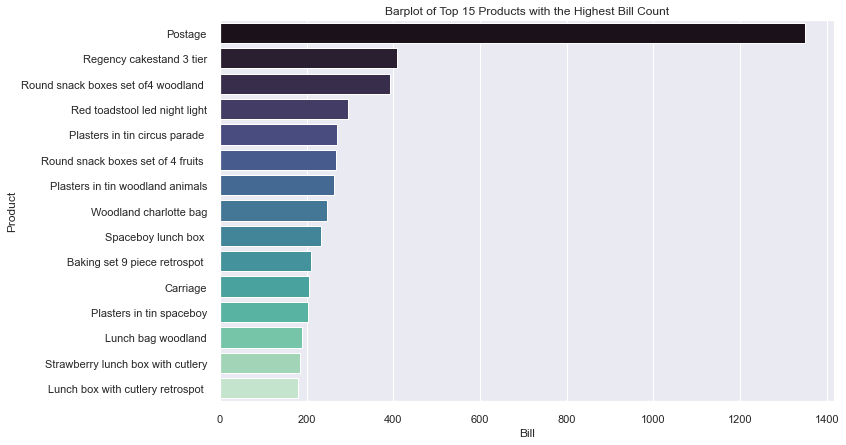

In [22]:
plt.figure(figsize = (11, 7))

sns.set(font_scale=1)
sns.barplot(data=group_df[0:15], y="Product", x="Bill", palette="mako")
plt.title('Barplot of Top 15 Products with the Highest Bill Count')
plt.show()

In [23]:
group_df = df.groupby('Product', as_index = False).agg({'Bill': 'nunique'}).sort_values(by ='Bill', ascending=True)
group_df.head()

Product  Bill
3856  Zinc wire sweetheart letter tray     1
2041       Mixed nuts light green bowl     1
867        Cute rabbit ceature screen      1
869     Dairy maid ceramic butter dish     1
3301          Smokey grey colour glass     1

In [24]:
group_df.shape

(3857, 2)

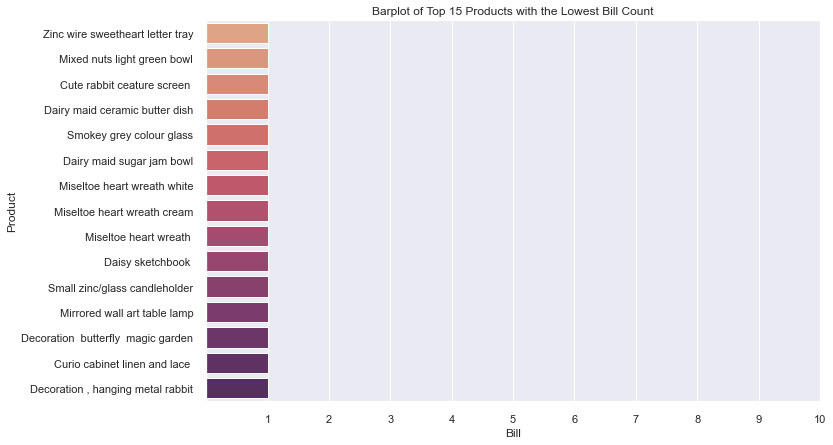

In [25]:
plt.figure(figsize = (11, 7))

sns.set(font_scale=1)
sns.barplot(data=group_df[0:15], y="Product", x="Bill", palette="flare")
plt.title('Barplot of Top 15 Products with the Lowest Bill Count')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

#### Countries

In [26]:
group_df = df.groupby('Country', as_index = False).agg({'Bill': 'nunique'})
group_df.head()

Country  Bill
0         EIRE  1391
1       France  1355
2      Germany  1916
3  Netherlands   437
4        Spain   329

In [27]:
group_df.shape

(5, 2)

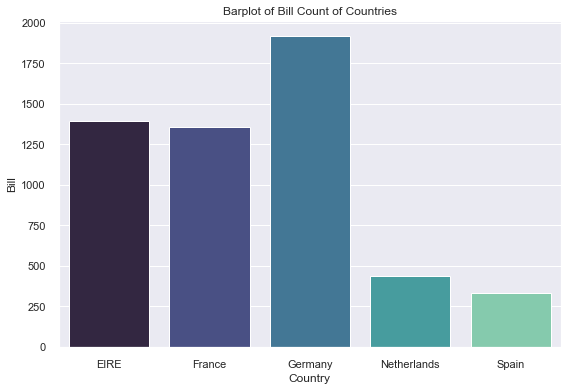

In [28]:
plt.figure(figsize = (9, 6))

sns.set(font_scale=1)
sns.barplot(data=group_df, y="Bill", x="Country", palette="mako")
plt.title('Barplot of Bill Count of Countries')
plt.show()

#### Customers

In [29]:
group_df = df.groupby('Country', as_index = False).agg({'CustomerID': 'nunique'})
group_df.head()

Country  CustomerID
0         EIRE           5
1       France          95
2      Germany         107
3  Netherlands          23
4        Spain          41

In [30]:
group_df.shape

(5, 2)

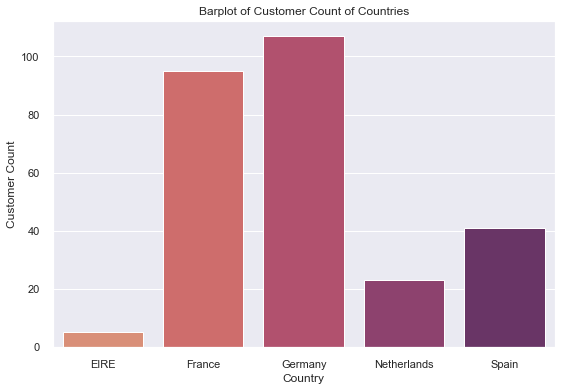

In [31]:
plt.figure(figsize = (9, 6))

sns.set(font_scale=1)
sns.barplot(data=group_df, y="CustomerID", x="Country", palette="flare")
plt.title('Barplot of Customer Count of Countries')
plt.ylabel('Customer Count')
plt.show()

### Lineplot

In [32]:
pd.to_datetime(df['BillDate']).apply(lambda x: x.date().month)

10          7
15         10
30          7
34         11
47          7
           ..
1067332     3
1067348     3
1067350    10
1067360     7
1067367     7
Name: BillDate, Length: 58771, dtype: int64

In [33]:
pd.to_datetime(df['BillDate']).apply(lambda x: x.date().day)

10          2
15          5
30         23
34         11
47         18
           ..
1067332    31
1067348    22
1067350    11
1067360    20
1067367     2
Name: BillDate, Length: 58771, dtype: int64

In [34]:
group_df = df.copy()
group_df['Year'] = pd.to_datetime(df['BillDate']).apply(lambda x: x.date().year)
group_df['Month'] = pd.to_datetime(df['BillDate']).apply(lambda x: x.date().month)
group_df['Day'] = pd.to_datetime(df['BillDate']).apply(lambda x: x.date().day)
group_df = group_df.groupby(["Year", "Month", "Day"], as_index = False)['Quota'].sum()
group_df.head(8)

Year  Month  Day  Quota
0  2017     12    1   1881
1  2017     12    2   4043
2  2017     12    3     73
3  2017     12    4   1017
4  2017     12    6    555
5  2017     12    7   1243
6  2017     12    8    386
7  2017     12    9    581

In [35]:
group_df.shape

(563, 4)

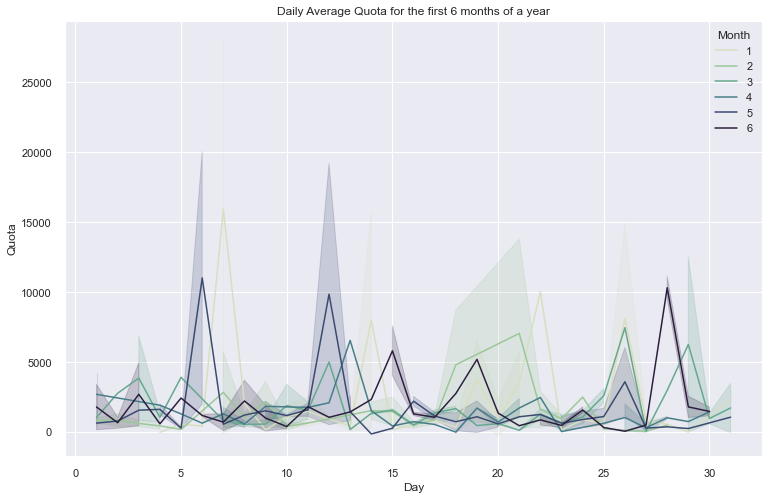

In [36]:
plt.figure(figsize = (12.5, 8))
sns.set(font_scale=1)
sns.lineplot(data=group_df[group_df['Month'] < 7], x="Day", y="Quota", hue="Month", legend="full", palette="ch:start=.5,rot=-.75")
plt.title("Daily Average Quota for the first 6 months of a year")
plt.show()

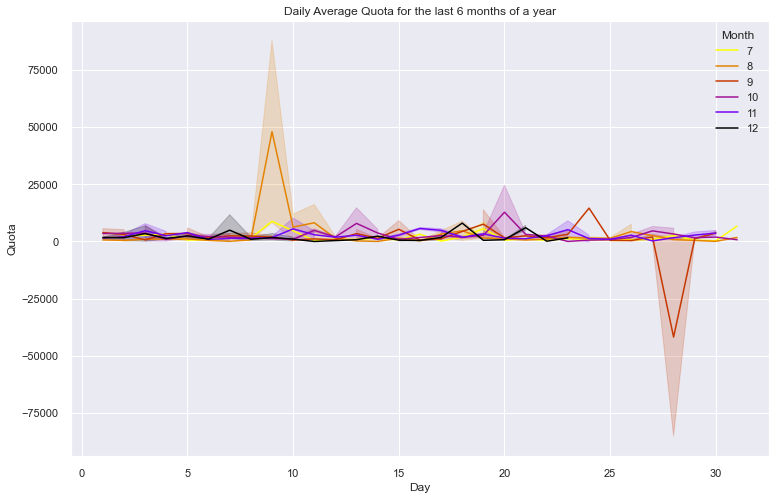

In [37]:
plt.figure(figsize = (12.5, 8))
sns.set(font_scale=1)
sns.lineplot(data=group_df[group_df['Month'] >= 7], x="Day", y="Quota", hue="Month", legend="full", palette="gnuplot_r")
plt.title("Daily Average Quota for the last 6 months of a year")
plt.show()

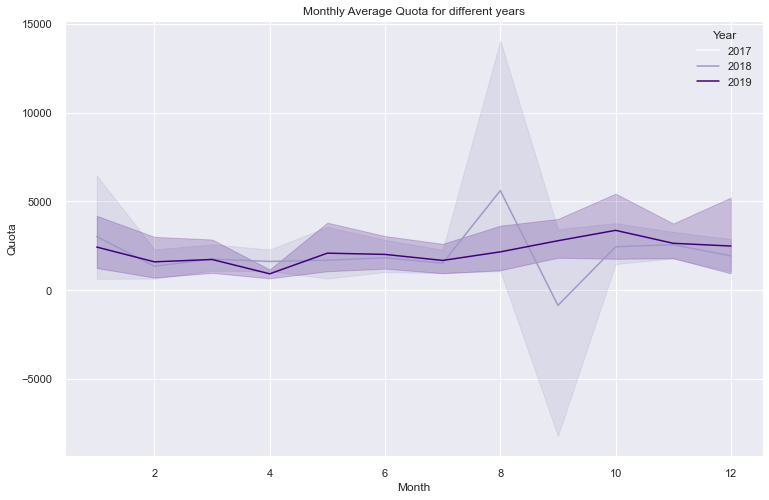

In [39]:
plt.figure(figsize = (12.5, 8))
sns.set(font_scale=1)
sns.lineplot(data=group_df, x="Month", y="Quota", hue="Year", legend="full", palette="Purples")
plt.title("Monthly Average Quota for different years")
plt.show()

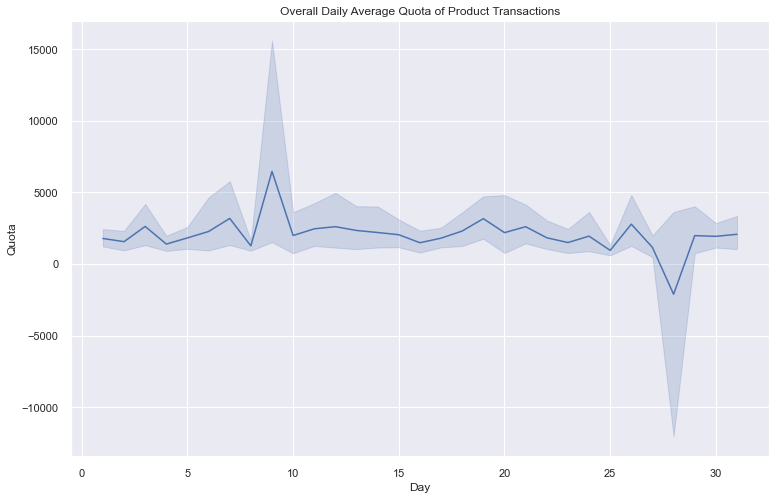

In [39]:
plt.figure(figsize = (12.5, 8))
sns.lineplot(data=group_df, x="Day", y="Quota")
plt.title("Overall Daily Average Quota of Product Transactions")
plt.show()

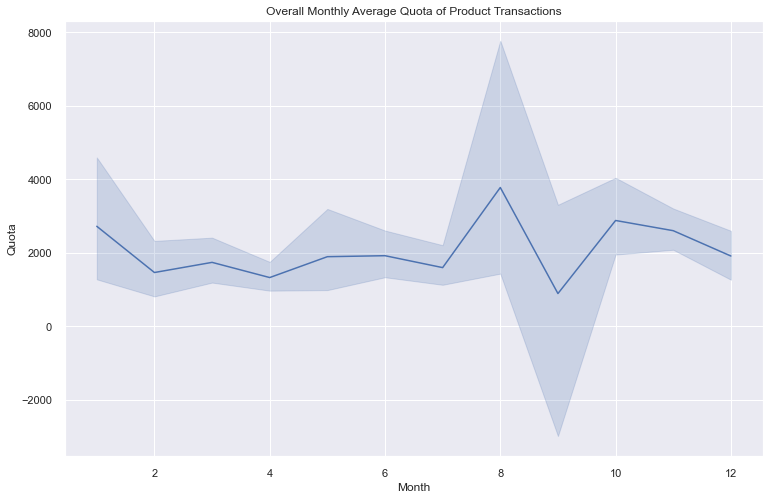

In [40]:
plt.figure(figsize = (12.5, 8))
sns.lineplot(data=group_df, x="Month", y="Quota")
plt.title("Overall Monthly Average Quota of Product Transactions")
plt.show()

## Data Preprocessing

### Removing Duplicate Rows

In [41]:
df[df.duplicated() == True]

Bill MerchandiseID                              Product  Quota  \
26560    574095         22326  Round snack boxes set of4 woodland      -1   
56074    538009         84380    Set of 3 butterfly cookie cutters     12   
66496    537201         22337       Angel decoration painted zinc      24   
68875    537463         21721            Candy shop  sticker sheet     12   
80375    537201         21915               Red  harmonica in box      24   
...         ...           ...                                  ...    ...   
1062538  536548         22242        5 hook hanger magic toadstool     -5   
1063661  565430         22725       Alarm clock bakelike chocolate      2   
1064053  538093         20749           Assorted colour mini cases      2   
1064971  536527         22809              Set of 6 t-lights santa      6   
1066202  537463         22554     Plasters in tin woodland animals     12   

          BillDate  Amount  CustomerID  Country  
26560    2019-11-3    4.95     12674.0   France  
56074    2018-12-9    3.25     14911.0     EIRE  
66496    2018-12-5    2.65     12472.0  Germany  
68875    2018-12-7    2.85     12681.0   France  
80375    2018-12-5    3.25     12472.0  Germany  
...            ...     ...         ...      ...  
1062538  2018-12-1    3.65     12472.0  Germany  
1063661   2019-9-4    5.75     14335.0  Germany  
1064053  2018-12-9    9.95     12682.0   France  
1064971  2018-12-1    4.95     12662.0  Germany  
1066202  2018-12-7    3.65     12681.0   France  

[496 rows x 8 columns]

In [42]:
df2 = df.copy()
df2 = df.drop_duplicates()

In [43]:
df.shape, df2.shape

((58771, 8), (58275, 8))

### Dealing with Missing Entries

For clustering for customer segmentation, customer id is an important variable and this is a variable that cannot be imputed due to the uniqueness of the variable. To deal with missing values, we need to remove it.

In [44]:
df2.dropna(subset = ['CustomerID'])

Bill MerchandiseID                         Product  Quota  \
10       514369         22366               Door mat airmail       2   
15       569699         22751  Feltcraft princess olivia doll      1   
30       516839         20726              Lunch bag woodland     10   
34       575886         21731   Red toadstool led night light     12   
65       518271         20718          Red spotty shopper bag     30   
...         ...           ...                             ...    ...   
1067332  548409         22745      Poppy's playhouse bedroom      24   
1067348  547383         22960        Jam making set with jars      6   
1067350  570672         23374         Red spot paper gift bag     10   
1067360  516464         22423        Regency cakestand 3 tier      2   
1067367  514387         21980  Pack of 12 red spotty tissues      48   

           BillDate  Amount  CustomerID  Country  
10         2018-7-2    9.49     12477.0  Germany  
15        2019-10-5    5.75     12723.0   France  
30        2018-7-23    3.65     12647.0  Germany  
34       2019-11-11    3.65     12517.0  Germany  
65         2018-8-6    3.25     12633.0  Germany  
...             ...     ...         ...      ...  
1067332   2019-3-31    4.10     12731.0   France  
1067348   2019-3-22    6.25     12613.0  Germany  
1067350  2019-10-11    2.82     12536.0   France  
1067360   2018-7-20   14.75     14911.0     EIRE  
1067367    2018-7-2    2.29     12633.0  Germany  

[56486 rows x 8 columns]

In [45]:
df3 = df2.dropna(subset = ['CustomerID'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56486 entries, 10 to 1067367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bill           56486 non-null  object 
 1   MerchandiseID  56486 non-null  object 
 2   Product        56486 non-null  object 
 3   Quota          56486 non-null  int64  
 4   BillDate       56486 non-null  object 
 5   Amount         56486 non-null  float64
 6   CustomerID     56486 non-null  float64
 7   Country        56486 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.9+ MB


In [46]:
df3.shape

(56486, 8)

Now, our data is cleaned with no missing values.

### Removing Invalid Entries

In [47]:
df3[df3['Amount'] <= 0]

Empty DataFrame
Columns: [Bill, MerchandiseID, Product, Quota, BillDate, Amount, CustomerID, Country]
Index: []

In [48]:
df3[df3['Quota'] <= 0]

Bill MerchandiseID                           Product  Quota  \
321      515153        85014B   Red/white dots ruffled umbrella     -3   
457      493898             M                            Manual     -1   
999      569485         23236        Storage tin vintage doily      -1   
1142     524962         47422  Assorted monkey suction cup hook    -24   
1169     522851         22198             Large popcorn holder      -8   
...         ...           ...                               ...    ...   
1064038  569981         22312        Office mug warmer polkadot     -2   
1064714  564331          POST                           Postage     -1   
1064938  495502        47367B    Pair padded hangers pink check     -1   
1066031  566084         23172            Regency tea plate pink     -1   
1066272  520964         21563      Red heart shape love bucket      -1   

          BillDate  Amount  CustomerID  Country  
321       2018-7-8    7.95     12693.0  Germany  
457       2018-1-8  782.52     14911.0     EIRE  
999      2019-10-4    4.89     12705.0  Germany  
1142     2018-10-1    2.42     12474.0  Germany  
1169     2018-9-17    3.65     14911.0     EIRE  
...            ...     ...         ...      ...  
1064038  2019-10-6    4.95     12679.0   France  
1064714  2019-8-24   20.00     12569.0  Germany  
1064938  2018-1-25    5.75     12644.0  Germany  
1066031   2019-9-9    3.65     12621.0  Germany  
1066272   2018-9-1    4.95     12721.0   France  

[1881 rows x 8 columns]

In [49]:
df4 = df3.copy()
df4 = df4[(df4['Amount'] > 0) & (df4['Quota'] > 0)]

In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54605 entries, 10 to 1067367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bill           54605 non-null  object 
 1   MerchandiseID  54605 non-null  object 
 2   Product        54605 non-null  object 
 3   Quota          54605 non-null  int64  
 4   BillDate       54605 non-null  object 
 5   Amount         54605 non-null  float64
 6   CustomerID     54605 non-null  float64
 7   Country        54605 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


In [51]:
df4.shape

(54605, 8)

### Datetime Conversion

In [52]:
df5 = df4.copy()
df5['BillDate'] = pd.to_datetime(df5['BillDate'])
df5['BillDate'] = df5['BillDate'].apply(lambda x: x.date())

In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54605 entries, 10 to 1067367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bill           54605 non-null  object 
 1   MerchandiseID  54605 non-null  object 
 2   Product        54605 non-null  object 
 3   Quota          54605 non-null  int64  
 4   BillDate       54605 non-null  object 
 5   Amount         54605 non-null  float64
 6   CustomerID     54605 non-null  float64
 7   Country        54605 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


### Cleaning text columns

In [54]:
len(df5['Product'].unique())

3822

In [55]:
len(df5['Product'].apply(lambda x: x.strip().capitalize()).unique())

3805

In [56]:
"hello".title(), "hello there i am a guy".title(), "greetings guys HOW ARE YOU doing RIght nOW".capitalize()

('Hello',
 'Hello There I Am A Guy',
 'Greetings guys how are you doing right now')

In [57]:
df6 = df5.copy()
df6['Product'] = df6['Product'].apply(lambda x: x.strip().capitalize())
df6['Product'] = df6['Product'].apply(lambda x: re.sub("  ", " ", x))

In [58]:
len(df5['Product'].unique()), len(df6['Product'].unique())

(3822, 3797)

In [59]:
len(df6['MerchandiseID'].unique()), len(df6['Product'].unique())

(3429, 3797)

In [60]:
df6[df6['Product'] == '?']

Empty DataFrame
Columns: [Bill, MerchandiseID, Product, Quota, BillDate, Amount, CustomerID, Country]
Index: []

In [61]:
for i in df6.groupby('Product')['MerchandiseID'].apply(lambda x: list(np.unique(x))).values:
    if len(i) > 1:
        print(i)

['21171', '82580']
['79328', '79337']
['84279B', '84279P']
['10133', '10134', '10135']
['72132', '72134']
['84509B', '84509G']
['22595', '84791']
['21814', '85118']
['21185', '23404']
['82613A', '82613B', '82613C']
['47585A', '47586A']
['84708B', '84712B']
['79190B', '79191B']
['20997', '21003']
['84509B', '84509G']
['21689', '21691']


A total of 43 products are sharing more than 1 merchandise ID!

We should randomly check on those products, see if they are sharing the same price value (amount).

In [62]:
df6.loc[df6['MerchandiseID'].isin(['10133', '10134', '10135']), 'Product'].unique()

array(['Colouring pencils brown tube'], dtype=object)

In [63]:
df6.loc[df6['MerchandiseID'].isin(['40001', '40002', '40003']), 'Product'].unique()

array(['White bamboo ribs lampshade'], dtype=object)

In [64]:
df6.loc[df6['MerchandiseID'].isin(['22432', '22433']), 'Product'].unique()

array(['Watering can pink bunny', 'Watering can green dinosaur'],
      dtype=object)

In [65]:
df6.loc[df6['MerchandiseID'].isin(['10133', '10134', '10135']), ['MerchandiseID', 'Product', 'Amount']]

MerchandiseID                       Product  Amount
31465          10133  Colouring pencils brown tube    2.85
285021         10134  Colouring pencils brown tube    3.06
303832         10135  Colouring pencils brown tube    3.06
455204         10135  Colouring pencils brown tube    2.42
754853         10135  Colouring pencils brown tube    3.25
765305         10135  Colouring pencils brown tube    3.25
794422         10133  Colouring pencils brown tube    2.42
842670         10133  Colouring pencils brown tube    2.72
909608         10135  Colouring pencils brown tube    3.25
942811         10135  Colouring pencils brown tube    3.25
960111         10135  Colouring pencils brown tube    3.25
996043         10133  Colouring pencils brown tube    2.42

In [66]:
df6.loc[df6['MerchandiseID'].isin(['10133', '10134', '10135']), ['Product', 'Amount']]['Amount'].value_counts()

3.25    5
2.42    3
3.06    2
2.72    1
2.85    1
Name: Amount, dtype: int64

In [67]:
df6.loc[df6['MerchandiseID'].isin(['10133', '10134', '10135']), :].groupby('MerchandiseID')['Amount'].unique()

MerchandiseID
10133    [2.85, 2.42, 2.72]
10134                [3.06]
10135    [3.06, 2.42, 3.25]
Name: Amount, dtype: object

In [68]:
df6.loc[df6['MerchandiseID'].isin(['10133', '10134', '10135']), :].groupby(['MerchandiseID', 'Amount']).size()

MerchandiseID  Amount
10133          2.42      2
               2.72      1
               2.85      1
10134          3.06      1
10135          2.42      1
               3.06      1
               3.25      5
dtype: int64

In [69]:
df6.loc[df6['MerchandiseID'].isin(['40001', '40002', '40003']), :].groupby('MerchandiseID')['Amount'].unique()

MerchandiseID
40001    [2.85]
Name: Amount, dtype: object

In [70]:
df6.loc[df6['MerchandiseID'].isin(['40001', '40002', '40003']), :].groupby(['MerchandiseID', 'Amount']).size()

MerchandiseID  Amount
40001          2.85      2
dtype: int64

Price is not the main factor anymore, their price can vary.

I think the focus should be placed more on merchandise id with more than 1 product.

In [71]:
for i in df6.groupby('MerchandiseID')['Product'].apply(lambda x: list(np.unique(x))).values:
    if len(i) > 1:
        print(i)

['Blue polkadot garden parasol', 'Blue white spots garden parasol']
['Pink polkadot garden parasol', 'Pink white spots garden parasol']
['Food/drink sponge stickers', 'Food/drink spunge stickers']
['Wrap carousel', 'Wrap, carousel']
['Wrap suki and friends', 'Wrap,suki and friends']
['Flower fairy 5 drawer liners', "Flower fairy,5 summer b'draw liners"]
['Blue polkadot passport cover', 'Blue spotty passport cover']
['Blue polkadot luggage tag', 'Blue spotty luggage tag']
['Red retrospot luggage tag', 'Red spotty luggage tag']
['Red retrospot purse', 'Red spotty purse']
['Green polkadot bowl', 'Green spotty bowl']
['Blue polkadot bowl', 'Blue spotty bowl']
['Red retrospot bowl', 'Red spotty bowl']
['Pink polkadot bowl', 'Pink spotty bowl']
['Pink polkadot childrens umbrella', 'Pink spotty childs umbrella']
['Red retrospot childrens umbrella', 'Red spotty childs umbrella']
['Door mat red spot', 'Doormat red retrospot', 'Doormat red spot', 'Red spotty coir doormat']
['Red retrospot shoppe

In [72]:
for i, v in df6.groupby('MerchandiseID')['Product'].apply(lambda x: list(np.unique(x))).items():
    if len(v) > 1:
        print(i, v)

15058A ['Blue polkadot garden parasol', 'Blue white spots garden parasol']
15058B ['Pink polkadot garden parasol', 'Pink white spots garden parasol']
16012 ['Food/drink sponge stickers', 'Food/drink spunge stickers']
16156L ['Wrap carousel', 'Wrap, carousel']
16161U ['Wrap suki and friends', 'Wrap,suki and friends']
17107D ['Flower fairy 5 drawer liners', "Flower fairy,5 summer b'draw liners"]
20615 ['Blue polkadot passport cover', 'Blue spotty passport cover']
20652 ['Blue polkadot luggage tag', 'Blue spotty luggage tag']
20658 ['Red retrospot luggage tag', 'Red spotty luggage tag']
20665 ['Red retrospot purse', 'Red spotty purse']
20674 ['Green polkadot bowl', 'Green spotty bowl']
20675 ['Blue polkadot bowl', 'Blue spotty bowl']
20676 ['Red retrospot bowl', 'Red spotty bowl']
20677 ['Pink polkadot bowl', 'Pink spotty bowl']
20681 ['Pink polkadot childrens umbrella', 'Pink spotty childs umbrella']
20682 ['Red retrospot childrens umbrella', 'Red spotty childs umbrella']
20685 ['Door ma

In [73]:
df6.loc[df6['Product'].isin(['Door mat union jack guns and roses', 'Doormat union jack guns and roses', 'Union jack guns & roses doormat']), ['MerchandiseID', 'Product', 'Amount']]

MerchandiseID                             Product  Amount
104038         21955  Door mat union jack guns and roses    9.49
258591         21955   Doormat union jack guns and roses    9.95
385355         21955   Doormat union jack guns and roses    9.95
480375         21955   Doormat union jack guns and roses    9.95
520625         21955  Door mat union jack guns and roses    9.49
564871         21955   Doormat union jack guns and roses    9.95
923380         21955   Doormat union jack guns and roses    9.95

In [74]:
df6.loc[df6['Product'].isin(['11 pc ceramic tea set polkadot', 'Retro spot tea set ceramic 11 pc', 'Retrospot tea set ceramic 11 pc']), ['MerchandiseID', 'Product', 'Amount']]

MerchandiseID                           Product  Amount
535             22139  Retro spot tea set ceramic 11 pc    6.95
12024           22139   Retrospot tea set ceramic 11 pc    6.95
14929           22139   Retrospot tea set ceramic 11 pc    6.95
30094           22139  Retro spot tea set ceramic 11 pc    6.95
31301           22139  Retro spot tea set ceramic 11 pc    6.95
...               ...                               ...     ...
1059121         22139  Retro spot tea set ceramic 11 pc    6.95
1060486         22139  Retro spot tea set ceramic 11 pc    6.95
1062458         22139  Retro spot tea set ceramic 11 pc    6.95
1063302         22139  Retro spot tea set ceramic 11 pc    6.95
1066974         22139   Retrospot tea set ceramic 11 pc    6.95

[168 rows x 3 columns]

In [75]:
df6.loc[df6['Product'].isin(['Door mat red spot', 'Doormat red retrospot', 'Doormat red spot', 'Red spotty coir doormat']), ['MerchandiseID', 'Product', 'Amount']]

MerchandiseID                Product  Amount
4048            20685  Doormat red retrospot    9.95
6655            20685      Door mat red spot    8.35
39187           20685  Doormat red retrospot    9.95
45445           20685      Door mat red spot    9.49
45759           20685  Doormat red retrospot    8.75
...               ...                    ...     ...
1020539         20685       Doormat red spot    9.95
1047315         20685      Door mat red spot    8.35
1050471         20685  Doormat red retrospot    9.08
1052726         20685      Door mat red spot    9.49
1056913         20685      Door mat red spot    8.35

[104 rows x 3 columns]

In [76]:
df6[df6['MerchandiseID'] == "21955"].groupby(["MerchandiseID", "Product"])["Product"].size()

MerchandiseID  Product                           
21955          Door mat union jack guns and roses    2
               Doormat union jack guns and roses     5
Name: Product, dtype: int64

In [77]:
df6[df6['MerchandiseID'] == "22139"].groupby(["MerchandiseID", "Product"])["Product"].size()

MerchandiseID  Product                         
22139          Retro spot tea set ceramic 11 pc     63
               Retrospot tea set ceramic 11 pc     105
Name: Product, dtype: int64

In [78]:
df6[df6['MerchandiseID'] == "20685"].groupby(["MerchandiseID", "Product"])["Product"].size()

MerchandiseID  Product                
20685          Door mat red spot          30
               Doormat red retrospot      47
               Doormat red spot           14
               Red spotty coir doormat    13
Name: Product, dtype: int64

In [79]:
df6[df6['MerchandiseID'] == "22345"].groupby(["MerchandiseID", "Product"])["Product"].size()

MerchandiseID  Product                        
22345          Party pizza dish blue polkadot     7
               Party pizza dish blue retrospot    3
Name: Product, dtype: int64

From my casual view on this, some of the products can indeed be standardize, for example: Doormat red spot & Door mat red spot are exactly the same. But seems like some are still a little different. At this point, we can only make reasonable assumptions.

After some google searching for images, I realized that terms like retrospot, spotty and polkadot are referring to the same thing! Perhaps, we can try to standardize.

In [80]:
df6.loc[df6['MerchandiseID'] == "22345", "Product"].value_counts()

Party pizza dish blue polkadot     7
Party pizza dish blue retrospot    3
Name: Product, dtype: int64

In [81]:
df6.loc[df6['MerchandiseID'] == "22345", "Product"].value_counts().idxmax()

'Party pizza dish blue polkadot'

In [82]:
alternate_ids = []
for id, val in df6.groupby('MerchandiseID')['Product'].apply(lambda x: list(np.unique(x))).items():
    if len(val) > 1:
        alternate_ids.append(id)

In [83]:
alternate_ids

['15058A',
 '15058B',
 '16012',
 '16156L',
 '16161U',
 '17107D',
 '20615',
 '20652',
 '20658',
 '20665',
 '20674',
 '20675',
 '20676',
 '20677',
 '20681',
 '20682',
 '20685',
 '20718',
 '20724',
 '20725',
 '20750',
 '20752',
 '20754',
 '20914',
 '20975',
 '20979',
 '20983',
 '21035',
 '21039',
 '21041',
 '21042',
 '21080',
 '21109',
 '21112',
 '21121',
 '21122',
 '21123',
 '21124',
 '21154',
 '21155',
 '21156',
 '21210',
 '21212',
 '21216',
 '21217',
 '21232',
 '21238',
 '21239',
 '21240',
 '21241',
 '21242',
 '21243',
 '21244',
 '21245',
 '21246',
 '21249',
 '21284',
 '21285',
 '21286',
 '21291',
 '21391',
 '21392',
 '21393',
 '21394',
 '21395',
 '21397',
 '21398',
 '21399',
 '21485',
 '21495',
 '21498',
 '21499',
 '21500',
 '21507',
 '21523',
 '21524',
 '21527',
 '21529',
 '21531',
 '21533',
 '21535',
 '21537',
 '21539',
 '21558',
 '21559',
 '21561',
 '21584',
 '21588',
 '21592',
 '21620',
 '21706',
 '21707',
 '21708',
 '21709',
 '21710',
 '21746',
 '21749',
 '21786',
 '21787',
 '218

In [84]:
len(alternate_ids)

364

Create a for loop over the product id that we extracted just now and get the max product item and perform replacement.

In [85]:
df7 = df6.copy()
for i in alternate_ids:
    mode_prod = df7.loc[df7['MerchandiseID'] == i, 'Product'].value_counts().idxmax()
    df7.loc[(df7['MerchandiseID'] == i) & (df7['Product'] != mode_prod), 'Product'] = mode_prod

In [86]:
for i, v in df7.groupby('MerchandiseID')['Product'].apply(lambda x: list(np.unique(x))).items():
    if len(v) > 1:
        print(i, v)

Replace one discrepancy for one product for standardisation

In [87]:
df7.loc[df7['Product'] == 'Charlie+lola red hot water bottle', 'Product'] = 'Charlie + lola red hot water bottle'

In [88]:
len(df7['MerchandiseID'].unique()), len(df7['Product'].unique())

(3429, 3411)

Before replacing one product, total unique products is 4589

### Removing Rows that are not meaningful to Apriori

In [89]:
df7.shape  # Before removing rows

(54605, 8)

In [90]:
df7 = df7[(df7['Product'] != "Postage") & (df7['Product'] != "Carriage")]

In [91]:
df7.shape  # After removing rows

(53115, 8)

Still not consistent in numbers, because of the fact that some merchandise ids are sharing same product names. To deal with this issue, we will focus on product only and simply assume that some merchandise ids that share products are referring to the same product despite different ids.

In [92]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53115 entries, 10 to 1067367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bill           53115 non-null  object 
 1   MerchandiseID  53115 non-null  object 
 2   Product        53115 non-null  object 
 3   Quota          53115 non-null  int64  
 4   BillDate       53115 non-null  object 
 5   Amount         53115 non-null  float64
 6   CustomerID     53115 non-null  float64
 7   Country        53115 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB


## Part 1: Clustering with RFM Model

### Derive the RFM table (Data Preprocessing)

In [93]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53115 entries, 10 to 1067367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bill           53115 non-null  object 
 1   MerchandiseID  53115 non-null  object 
 2   Product        53115 non-null  object 
 3   Quota          53115 non-null  int64  
 4   BillDate       53115 non-null  object 
 5   Amount         53115 non-null  float64
 6   CustomerID     53115 non-null  float64
 7   Country        53115 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB


In [94]:
df7['BillDate'].dtypes

dtype('O')

In [95]:
max(df7.BillDate)

datetime.date(2019, 12, 9)

#### Start creating variabes for RFM

In [96]:
# Create TotalSum column
df7["TotalSum"] = df7["Quota"] * df7["Amount"]

# Create date variable that records recency
snapshot_date = max(df7.BillDate) + timedelta(days=1)

In [97]:
df7

Bill MerchandiseID                           Product  Quota  \
10       514369         22366                   Doormat airmail      2   
15       569699         22751    Feltcraft princess olivia doll      1   
30       516839         20726                Lunch bag woodland     10   
34       575886         21731     Red toadstool led night light     12   
65       518271         20718            Red spotty shopper bag     30   
...         ...           ...                               ...    ...   
1067332  548409         22745         Poppy's playhouse bedroom     24   
1067348  547383         22960          Jam making set with jars      6   
1067350  570672         23374           Red spot paper gift bag     10   
1067360  516464         22423          Regency cakestand 3 tier      2   
1067367  514387         21980  Pack of 12 red retrospot tissues     48   

           BillDate  Amount  CustomerID  Country  TotalSum  
10       2018-07-02    9.49     12477.0  Germany     18.98  
15       2019-10-05    5.75     12723.0   France      5.75  
30       2018-07-23    3.65     12647.0  Germany     36.50  
34       2019-11-11    3.65     12517.0  Germany     43.80  
65       2018-08-06    3.25     12633.0  Germany     97.50  
...             ...     ...         ...      ...       ...  
1067332  2019-03-31    4.10     12731.0   France     98.40  
1067348  2019-03-22    6.25     12613.0  Germany     37.50  
1067350  2019-10-11    2.82     12536.0   France     28.20  
1067360  2018-07-20   14.75     14911.0     EIRE     29.50  
1067367  2018-07-02    2.29     12633.0  Germany    109.92  

[53115 rows x 9 columns]

In [98]:
snapshot_date

datetime.date(2019, 12, 10)

In [99]:
# Aggregate data by each customer
customers = df7.groupby(['CustomerID']).agg({
    'BillDate': lambda x: (snapshot_date - x.max()).days,
    'Bill': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'BillDate': 'Recency',
                            'Bill': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [100]:
customers

Recency  Frequency  MonetaryValue
CustomerID                                   
12354.0         233         58        2139.40
12413.0          67         48        1497.45
12417.0         226         32        1262.36
12419.0         386         23         845.01
12421.0          16         59        2162.60
...             ...        ...            ...
14335.0          17         60        1204.86
14646.0           2       3824     1262175.52
14911.0           2      11011      584137.34
16047.0         683          1         109.14
17097.0           3        288        2473.43

[268 rows x 3 columns]

In [101]:
customers.describe()

Recency     Frequency  MonetaryValue
count  268.000000    268.000000   2.680000e+02
mean   160.847015    198.190299   1.669484e+04
std    197.705970    763.587014   9.400326e+04
min      1.000000      1.000000   2.300000e+01
25%     20.000000     22.750000   9.112750e+02
50%     62.000000     54.500000   2.091890e+03
75%    250.750000    148.250000   7.470160e+03
max    683.000000  11011.000000   1.262176e+06

#### Simple Skewness Exploration

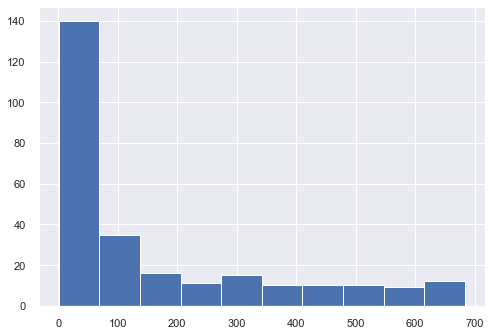

In [102]:
plt.hist(customers['Recency'])
plt.show()

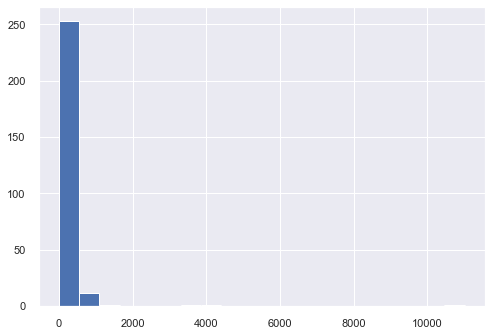

In [103]:
plt.hist(customers['Frequency'], bins=20)
plt.show()

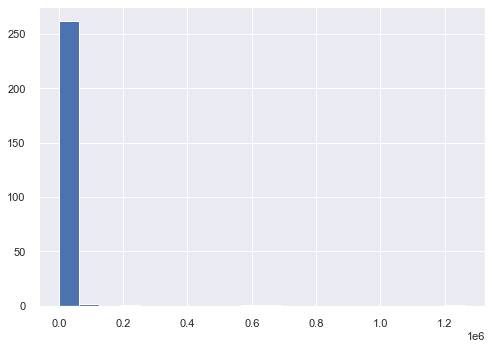

In [104]:
plt.hist(customers['MonetaryValue'], bins=20)
plt.show()

#### Histplot/Displot (Original RFM data)

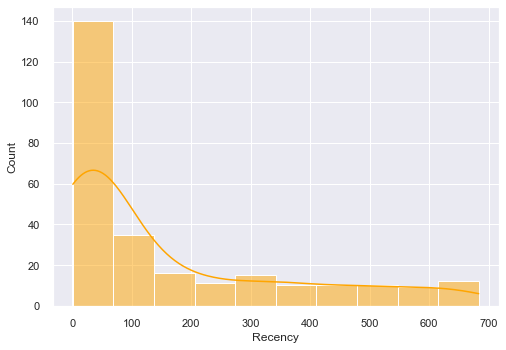

In [105]:
sns.set(font_scale=1)
sns.histplot(data=customers, x="Recency", color="orange", kde=True)
plt.show()

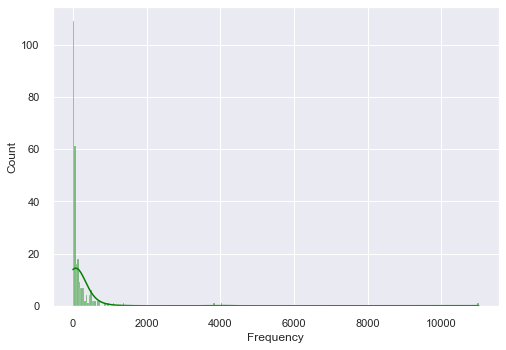

In [106]:
sns.histplot(data=customers, x="Frequency", color="green", kde=True)
plt.show()

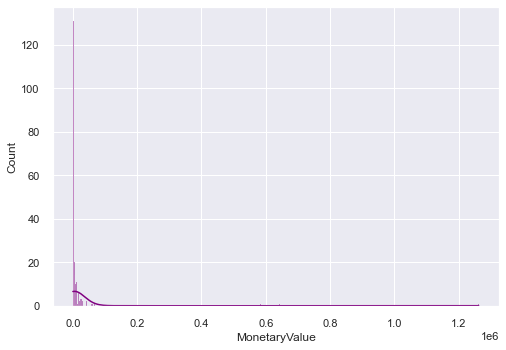

In [107]:
sns.histplot(data=customers, x="MonetaryValue", color="purple", kde=True)
plt.show()

#### Scatterplot/Jointplot (Original RFM data)

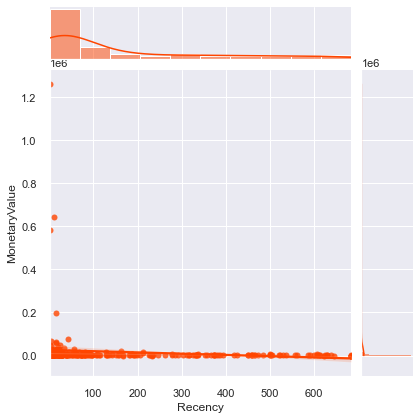

In [108]:
sns.set(font_scale=1)
sns.jointplot(data=customers, x="Recency", y="MonetaryValue", color="orangered", kind="reg")
plt.show()

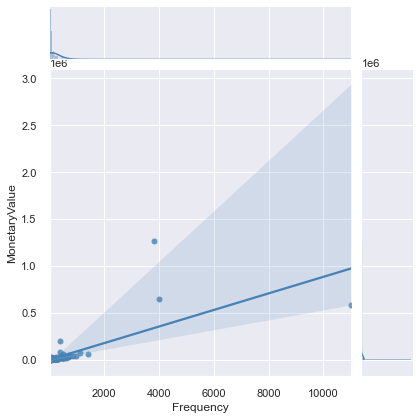

In [109]:
sns.jointplot(data=customers, x="Frequency", y="MonetaryValue", color="steelblue", kind="reg")
plt.show()

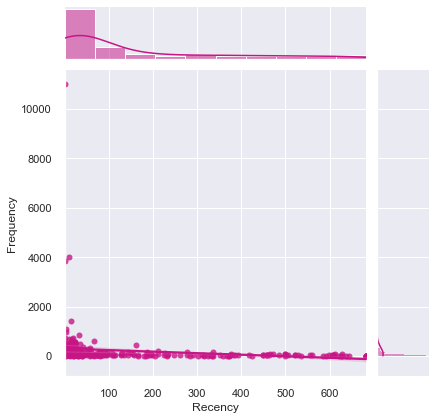

In [110]:
sns.jointplot(data=customers, x="Recency", y="Frequency", color="mediumvioletred", kind="reg")
plt.show()

### Data Transformation

#### Box-cox Transformation

In [111]:
customers_transformed = customers.copy()

In [112]:
# generate non-normal data (exponential)
#original_data = np.random.exponential(size = 1000)
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(customers['Recency'])
customers_transformed['Recency'] = fitted_data

In [113]:
customers_transformed.head()

Recency  Frequency  MonetaryValue
CustomerID                                    
12354.0     7.154342         58        2139.40
12413.0     5.175611         48        1497.45
12417.0     7.103046         32        1262.36
12419.0     8.025331         23         845.01
12421.0     3.174875         59        2162.60

Lambda value used for Transformation: 0.09562161616618368


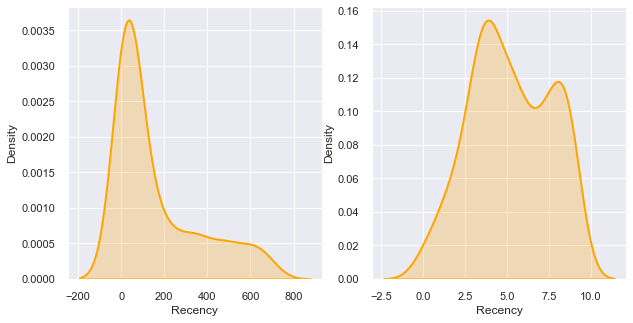

In [114]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

sns.kdeplot(data=customers, x="Recency", fill=True, legend=True, linewidth=2, color ="orange", ax = ax[0])
sns.kdeplot(data=customers_transformed, x="Recency", fill=True, legend=True, linewidth=2, color ="orange", ax = ax[1])

# adding legends to the subplots
#plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [115]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(customers['Frequency'])
customers_transformed['Frequency'] = fitted_data

In [116]:
customers_transformed.head()

Recency  Frequency  MonetaryValue
CustomerID                                    
12354.0     7.154342   4.170645        2139.40
12413.0     5.175611   3.971287        1497.45
12417.0     7.103046   3.545810        1262.36
12419.0     8.025331   3.200940         845.01
12421.0     3.174875   4.188678        2162.60

Lambda value used for Transformation: 0.013131664497814496


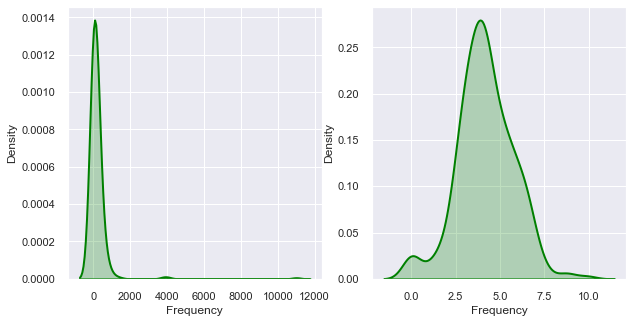

In [117]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

sns.kdeplot(data=customers, x="Frequency", fill=True, legend=True, linewidth=2, color ="green", ax = ax[0])
sns.kdeplot(data=customers_transformed, x="Frequency", fill=True, legend=True, linewidth=2, color ="green", ax = ax[1])

# adding legends to the subplots
#plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [118]:
#np.cbrt(customers_transformed["MonetaryValue"])

In [119]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(customers['MonetaryValue'])
customers_transformed['MonetaryValue'] = fitted_data

In [120]:
#customers_transformed["MonetaryValue"] = np.cbrt(customers_transformed["MonetaryValue"])
customers_transformed.head()

Recency  Frequency  MonetaryValue
CustomerID                                    
12354.0     7.154342   4.170645       5.706560
12413.0     5.175611   3.971287       5.512457
12417.0     7.103046   3.545810       5.417530
12419.0     8.025331   3.200940       5.189165
12421.0     3.174875   4.188678       5.712341

Lambda value used for Transformation: -0.08127172525593458


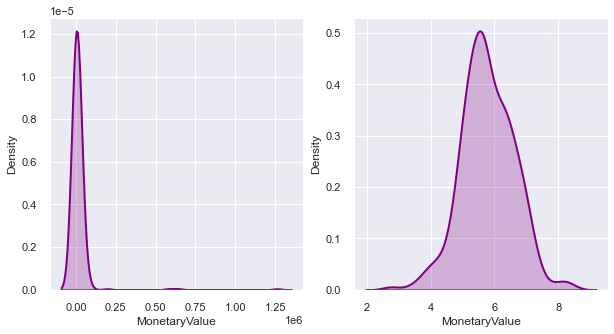

In [121]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

sns.kdeplot(data=customers, x="MonetaryValue", fill=True, legend=True, linewidth=2, color ="purple", ax = ax[0])
sns.kdeplot(data=customers_transformed, x="MonetaryValue", fill=True, legend=True, linewidth=2, color ="purple", ax = ax[1])

# adding legends to the subplots
#plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [122]:
# View the data again
customers_transformed.head()

Recency  Frequency  MonetaryValue
CustomerID                                    
12354.0     7.154342   4.170645       5.706560
12413.0     5.175611   3.971287       5.512457
12417.0     7.103046   3.545810       5.417530
12419.0     8.025331   3.200940       5.189165
12421.0     3.174875   4.188678       5.712341

#### Visualisations for transformed data

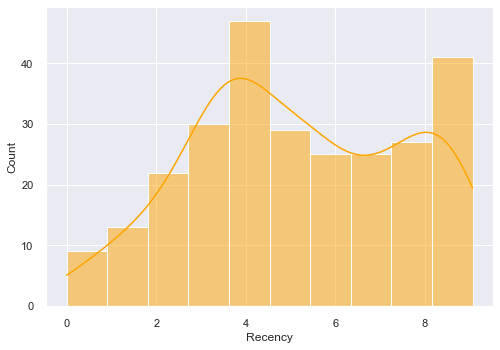

In [123]:
sns.set(font_scale=1)
sns.histplot(data=customers_transformed, x="Recency", color="orange", kde=True)
plt.show()

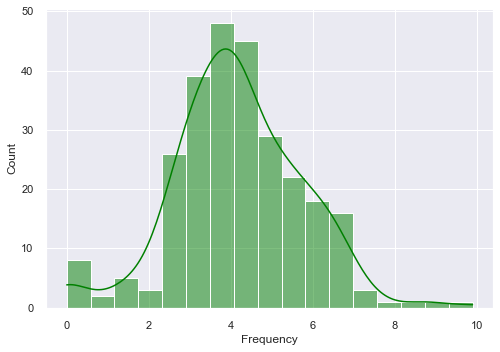

In [124]:
sns.histplot(data=customers_transformed, x="Frequency", color="green", kde=True)
plt.show()

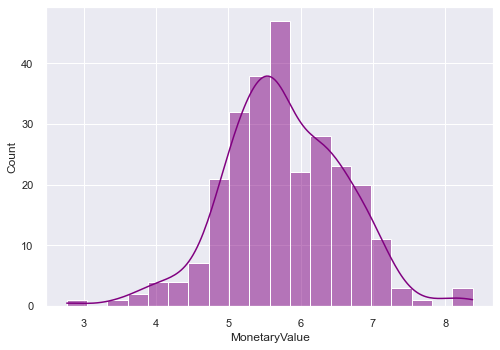

In [125]:
sns.histplot(data=customers_transformed, x="MonetaryValue", color="purple", bins=20, kde=True)
plt.show()

#### Scatterplot/Jointplot

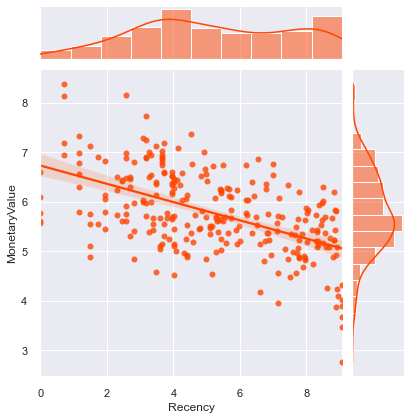

In [126]:
sns.set(font_scale=1)
sns.jointplot(data=customers_transformed, x="Recency", y="MonetaryValue", color="orangered", kind="reg")
plt.show()

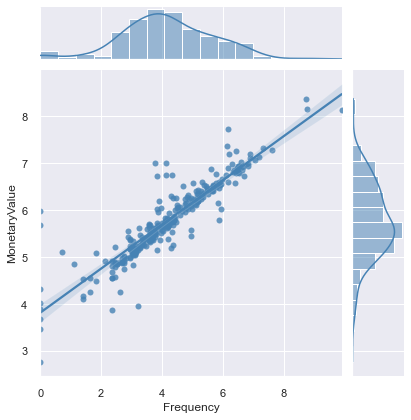

In [127]:
sns.jointplot(data=customers_transformed, x="Frequency", y="MonetaryValue", color="steelblue", kind="reg")
plt.show()

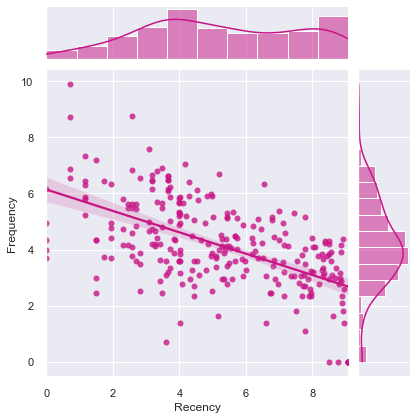

In [128]:
sns.jointplot(data=customers_transformed, x="Recency", y="Frequency", color="mediumvioletred", kind="reg")
plt.show()

### Normalization

In [129]:
# Import library
from sklearn.preprocessing import StandardScaler

# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(customers_transformed)
customers_normalized = scaler.transform(customers_transformed)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. 0. -0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0.  0.]
[1. 1. 1.]


In [130]:
customers_normalized

array([[ 8.34089520e-01,  1.58773403e-03, -8.52697971e-02],
       [ 2.00306548e-03, -1.24669571e-01, -3.21794842e-01],
       [ 8.12518643e-01, -3.94131283e-01, -4.37468876e-01],
       [ 1.20035348e+00, -6.12543751e-01, -7.15745598e-01],
       [-8.39336788e-01,  1.30081508e-02, -7.82253165e-02],
       [ 7.09070720e-01,  1.73584787e-01, -2.32693169e-02],
       [-6.62082410e-01, -3.53932879e-01, -1.16931161e-01],
       [-1.87306401e+00,  1.50117886e+00,  1.41432843e+00],
       [ 1.16292964e+00, -9.87661322e-01, -1.07115219e+00],
       [-1.55105798e+00, -1.09696393e+00, -1.08464840e+00],
       [-6.36908045e-01, -6.12543751e-01, -7.66023758e-01],
       [-2.43508122e-01, -6.72543690e-01, -7.15378786e-01],
       [ 5.59711468e-01, -2.97811890e-01, -2.89094029e-01],
       [-9.88279848e-02, -2.62840600e-01,  1.49929021e+00],
       [ 6.47691321e-02, -1.82616070e-01, -2.06357735e-01],
       [ 1.54290975e+00, -6.41870623e-01, -6.63413433e-01],
       [-7.44354013e-01,  2.42391184e-02

In [131]:
customers_normalized.shape

(268, 3)

In [132]:
customers_normalized = pd.DataFrame(customers_normalized)
customers_normalized

0         1         2
0    0.834090  0.001588 -0.085270
1    0.002003 -0.124670 -0.321795
2    0.812519 -0.394131 -0.437469
3    1.200353 -0.612544 -0.715746
4   -0.839337  0.013008 -0.078225
..        ...       ...       ...
263 -0.806007  0.024239 -0.469325
264 -1.873064  2.877972  3.167641
265 -1.873064  3.629605  2.858317
266  1.636260 -2.639756 -2.284857
267 -1.687298  1.083417  0.008971

[268 rows x 3 columns]

In [133]:
customers_normalized = customers_normalized.rename(columns={0: "Recency", 1: "Frequency", 2: "MonetaryValue"})
customers_normalized.head()

Recency  Frequency  MonetaryValue
0  0.834090   0.001588      -0.085270
1  0.002003  -0.124670      -0.321795
2  0.812519  -0.394131      -0.437469
3  1.200353  -0.612544      -0.715746
4 -0.839337   0.013008      -0.078225

#### Visualisations for normalised data

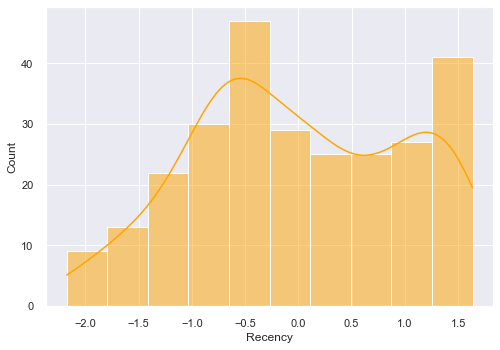

In [134]:
sns.set(font_scale=1)
sns.histplot(data=customers_normalized, x="Recency", color="orange", kde=True)
plt.show()

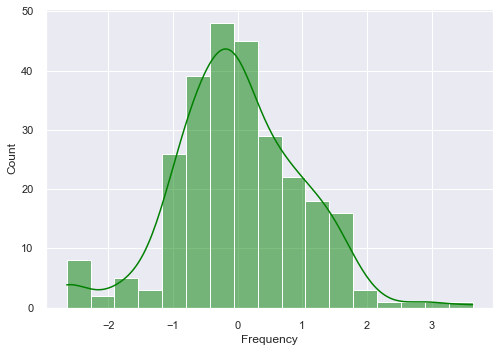

In [135]:
sns.histplot(data=customers_normalized, x="Frequency", color="green", kde=True)
plt.show()

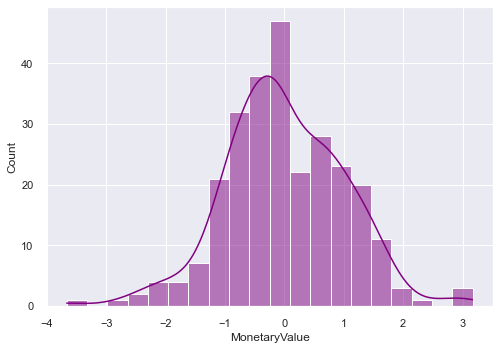

In [136]:
sns.histplot(data=customers_normalized, x="MonetaryValue", color="purple", bins=20, kde=True)
plt.show()

#### Scatterplot/Jointplot

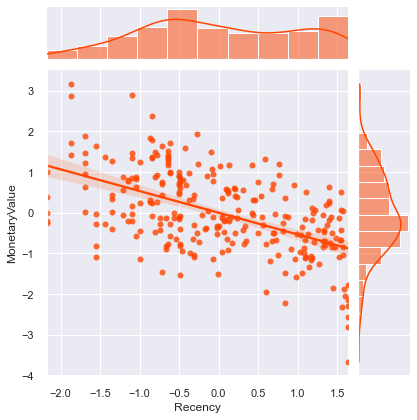

In [137]:
sns.set(font_scale=1)
sns.jointplot(data=customers_normalized, x="Recency", y="MonetaryValue", color="orangered", kind="reg")
plt.show()

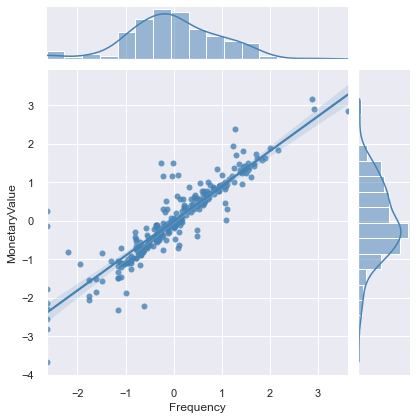

In [138]:
sns.jointplot(data=customers_normalized, x="Frequency", y="MonetaryValue", color="steelblue", kind="reg")
plt.show()

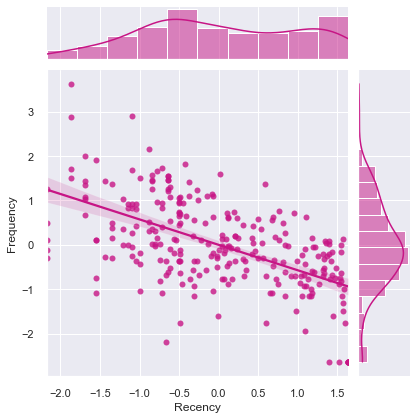

In [139]:
sns.jointplot(data=customers_normalized, x="Recency", y="Frequency", color="mediumvioletred", kind="reg")
plt.show()

## 1. Modeling with K Means

### Building 3 kmeans model with 3 values of k

In [140]:
customers_transformed_copy = customers_transformed.copy()

In [141]:
# 3 clusters
k = 3
model = KMeans(n_clusters=k, random_state=42)
model.fit(customers_normalized)
customers_transformed_copy["Cluster"] = model.labels_

print("RFM Log for cluster k =", k)
customers_transformed_copy.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

RFM Log for cluster k = 3


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          7.76      2.69          5.03    84
1          3.01      6.12          6.76    68
2          4.57      4.10          5.74   116

In [142]:
# 4 clusters
k = 4
model = KMeans(n_clusters=k, random_state=42)
model.fit(customers_normalized)
customers_transformed_copy["Cluster"] = model.labels_

print("RFM Log for cluster k =", k)
customers_transformed_copy.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

RFM Log for cluster k = 4


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          6.88      4.26          5.89    67
1          3.71      3.57          5.42    73
2          8.07      2.22          4.78    52
3          3.09      6.00          6.70    76

In [143]:
# 5 clusters
k = 5
model = KMeans(n_clusters=k, random_state=42)
model.fit(customers_normalized)
customers_transformed_copy["Cluster"] = model.labels_

print("RFM Log for cluster k =", k)
customers_transformed_copy.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

RFM Log for cluster k = 5


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          7.64      3.63          5.47    65
1          2.47      6.79          7.12    31
2          8.04      1.58          4.49    30
3          4.26      5.18          6.35    72
4          3.79      3.58          5.42    70

## Assess and Evaluate

### Elbow Method

C:\Users\wz_ch\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


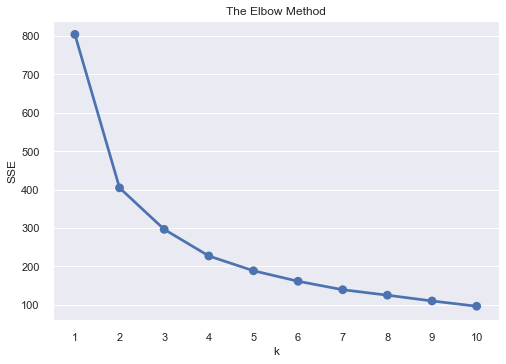

In [144]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From the elbow method, it is possible that either 3 or 4 can also be good values of k, it is hard to distinguish because of how similar they are. We need to check on the results of silhouette method.

### Silhouette Score Analysis

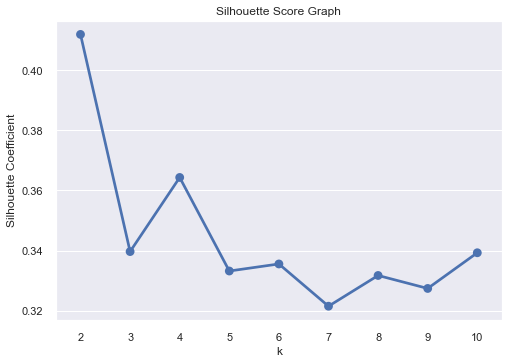

In [145]:
scores = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    preds = kmeans.fit_predict(customers_normalized)
    scores[n_clusters] = silhouette_score(customers_normalized, preds)
    
plt.title('Silhouette Score Graph')
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
sns.pointplot(x=list(scores.keys()), y=list(scores.values()))
plt.show()

Although the k value of 2 shows high silhouette coefficient, but the elbow method disagrees that 2 clusters is a good k value. Based on our intuition, we shall go with a minimum k value of 3 or 4 for better interpretation.

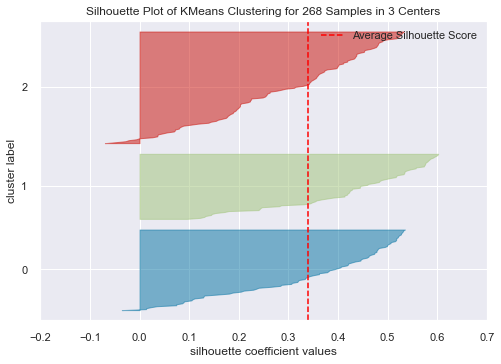

For n_clusters = 3, silhouette score is 0.33965231128188184)




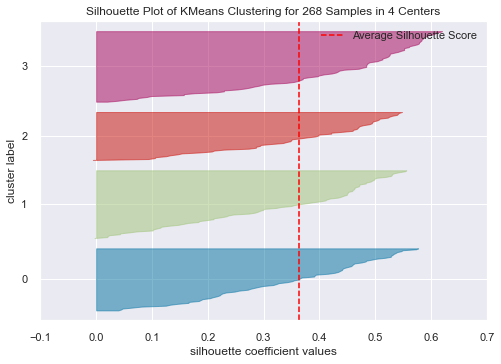

For n_clusters = 4, silhouette score is 0.3643275176477254)




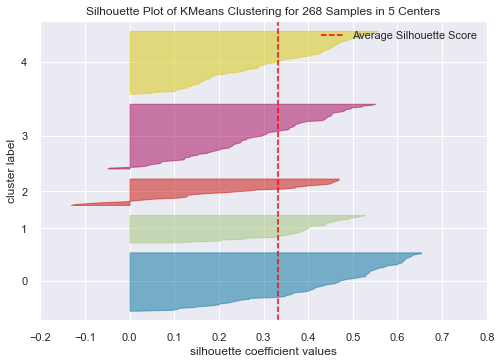

For n_clusters = 5, silhouette score is 0.33318386708436964)




In [146]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    preds = kmeans.fit_predict(customers_normalized)
    centers = kmeans.cluster_centers_
    
    # Instantiate the clustering model and visualizer
    #model = KMeans(5, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(customers_normalized)        # Fit the data to the visualizer
    visualizer.show()

    score = silhouette_score(customers_normalized, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    print("\n")

Based on our observation, the **k-value of 4** is the best hyperparameter for our model because the next k-value tend to have a linear trend and having the highest silhouette score. Therefore, our best model for the data is K-Means with the number of clusters is 4. At the same time, cluster of 5 also gives a pretty good silhouette score so we should experiment on some results for this number of clusters.

### Fitting the k-means model with 3 clusters

In [147]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
centers_k3 = model.cluster_centers_
model.labels_.shape

(268,)

In [148]:
customers_transformed["Cluster"] = model.labels_
customers_transformed.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          7.76      2.69          5.03    84
1          3.01      6.12          6.76    68
2          4.57      4.10          5.74   116

In [149]:
# Create the dataframe
df_normalized_k3 = pd.DataFrame(np.array(customers_normalized), columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized_k3['ID'] = customers_transformed.index
df_normalized_k3['Cluster'] = model.labels_

In [150]:
df_normalized_k3

Recency  Frequency  MonetaryValue       ID  Cluster
0    0.834090   0.001588      -0.085270  12354.0        2
1    0.002003  -0.124670      -0.321795  12413.0        2
2    0.812519  -0.394131      -0.437469  12417.0        0
3    1.200353  -0.612544      -0.715746  12419.0        0
4   -0.839337   0.013008      -0.078225  12421.0        2
..        ...        ...            ...      ...      ...
263 -0.806007   0.024239      -0.469325  14335.0        2
264 -1.873064   2.877972       3.167641  14646.0        1
265 -1.873064   3.629605       2.858317  14911.0        1
266  1.636260  -2.639756      -2.284857  16047.0        0
267 -1.687298   1.083417       0.008971  17097.0        1

[268 rows x 5 columns]

In [151]:
# Melt The Data
df_nor_melt_k3 = pd.melt(df_normalized_k3.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt_k3.head()

ID  Cluster Attribute     Value
0  12354.0        2   Recency  0.834090
1  12413.0        2   Recency  0.002003
2  12417.0        0   Recency  0.812519
3  12419.0        0   Recency  1.200353
4  12421.0        2   Recency -0.839337

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

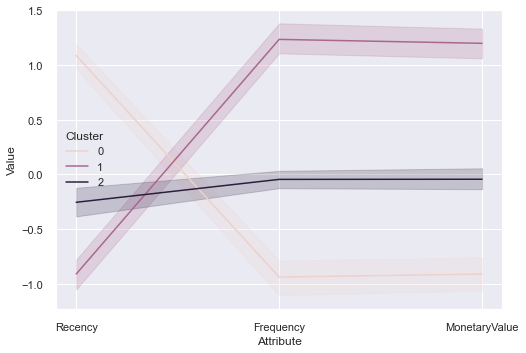

In [152]:
# Visualize it
sns.lineplot(x='Attribute', y='Value', hue='Cluster', legend='full', data=df_nor_melt_k3)

Cluster 0 spends very less frequently and very less in amount of money, and also buys long time ago, showing a sign of **lost/churned customer**. Cluster 1 spends very frequently, spends in high amounts, and buys very recently, which is a sign of **champion/loyal customer**. Cluster 2 spends moderately in frequency and spending amounts, and buys at average recency, which implies the segment of **promising customer**. 

### Fitting the k-means model with 4 clusters

In [153]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
centers_k4 = model.cluster_centers_
model.labels_.shape

(268,)

In [154]:
customers_transformed["Cluster"] = model.labels_
customers_transformed.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          6.88      4.26          5.89    67
1          3.71      3.57          5.42    73
2          8.07      2.22          4.78    52
3          3.09      6.00          6.70    76

In [155]:
# Create the dataframe
df_normalized_k4 = pd.DataFrame(np.array(customers_normalized), columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized_k4['ID'] = customers_transformed.index
df_normalized_k4['Cluster'] = model.labels_

In [156]:
df_normalized_k4

Recency  Frequency  MonetaryValue       ID  Cluster
0    0.834090   0.001588      -0.085270  12354.0        0
1    0.002003  -0.124670      -0.321795  12413.0        1
2    0.812519  -0.394131      -0.437469  12417.0        0
3    1.200353  -0.612544      -0.715746  12419.0        2
4   -0.839337   0.013008      -0.078225  12421.0        1
..        ...        ...            ...      ...      ...
263 -0.806007   0.024239      -0.469325  14335.0        1
264 -1.873064   2.877972       3.167641  14646.0        3
265 -1.873064   3.629605       2.858317  14911.0        3
266  1.636260  -2.639756      -2.284857  16047.0        2
267 -1.687298   1.083417       0.008971  17097.0        3

[268 rows x 5 columns]

In [157]:
# Melt The Data
df_nor_melt_k4 = pd.melt(df_normalized_k4.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt_k4.head()

ID  Cluster Attribute     Value
0  12354.0        0   Recency  0.834090
1  12413.0        1   Recency  0.002003
2  12417.0        0   Recency  0.812519
3  12419.0        2   Recency  1.200353
4  12421.0        1   Recency -0.839337

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

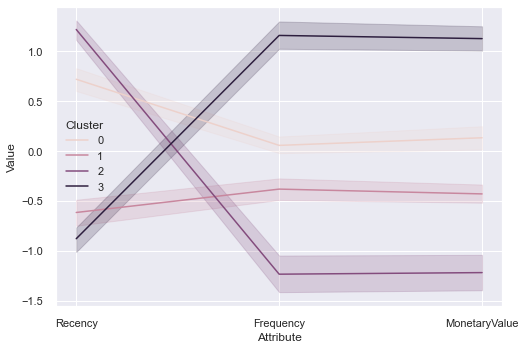

In [158]:
# Visualize it
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt_k4)

Customers from Cluster 0 spend moderately in frequency and amount, but buys very less recently, a sign of an **at-risk customer**. For Cluster 1, they spend moderately frequently, spend moderate in amount and buy quite recently too, which is a sign of **recent customer**. Cluster 2 is a sign of **lost/churned customer**, who spends very less frequently and spend very less amount, and buy products very less recently. Cluster 3 spend very frequently, very high amount of money, and also buy very recently, showing the signs of a **champion/loyal customer**. 

### Analysis of RFM and 2D visualisations for 3 clusters

#### 1. Recency vs MonetaryValue

In [159]:
centers_k3

array([[ 1.08682343, -0.93697289, -0.90976651],
       [-0.90920044,  1.23387311,  1.1979281 ],
       [-0.2540305 , -0.04480731, -0.04343727]])

In [160]:
centers_k3[:, 0], centers_k3[:, 2]

(array([ 1.08682343, -0.90920044, -0.2540305 ]),
 array([-0.90976651,  1.1979281 , -0.04343727]))

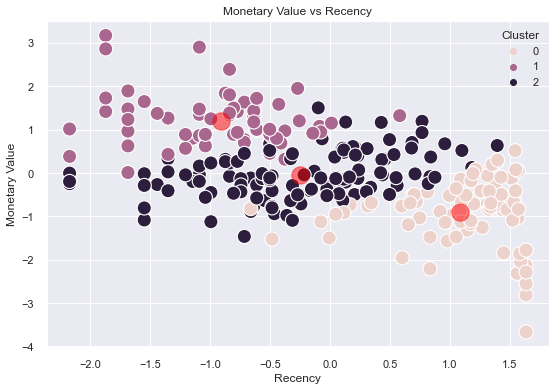

In [161]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data=df_normalized_k3, x="Recency", y="MonetaryValue", hue="Cluster", legend='full', s=200)
plt.scatter(x = centers_k3[: , 0], y =  centers_k3[: , 2], s = 300, c = 'red', alpha = 0.5)
plt.title('Monetary Value vs Recency')
plt.xlabel('Recency'), plt.ylabel('Monetary Value')
plt.show()

#### 2. Frequency vs MonetaryValue

In [162]:
centers_k3[:, 1], centers_k3[:, 2]

(array([-0.93697289,  1.23387311, -0.04480731]),
 array([-0.90976651,  1.1979281 , -0.04343727]))

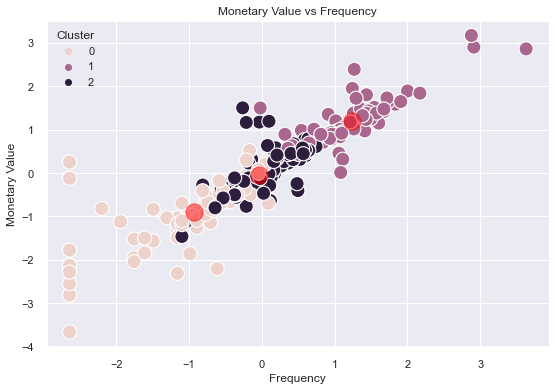

In [163]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data=df_normalized_k3, x="Frequency", y="MonetaryValue", hue="Cluster", legend='full', s=200)
plt.scatter(x = centers_k3[: , 1], y =  centers_k3[: , 2], s = 300, c = 'red', alpha = 0.5)
plt.title('Monetary Value vs Frequency')
plt.xlabel('Frequency'), plt.ylabel('Monetary Value')
plt.show()

#### 3. Recency vs Frequency

In [164]:
centers_k3[:, 0], centers_k3[:, 1]

(array([ 1.08682343, -0.90920044, -0.2540305 ]),
 array([-0.93697289,  1.23387311, -0.04480731]))

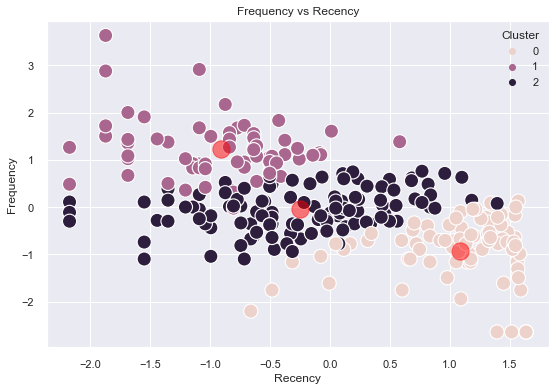

In [165]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data=df_normalized_k3, x="Recency", y="Frequency", hue="Cluster", legend='full', s=200)
plt.scatter(x = centers_k3[: , 0], y = centers_k3[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.title('Frequency vs Recency')
plt.xlabel('Recency'), plt.ylabel('Frequency')
plt.show()

### Analysis of RFM and 2D visualisations for 4 clusters

#### 1. Recency vs MonetaryValue

In [166]:
centers_k4

array([[ 0.71914616,  0.05725918,  0.13349249],
       [-0.61432239, -0.38035241, -0.42837625],
       [ 1.21739565, -1.23190462, -1.21609025],
       [-0.87686621,  1.15774212,  1.12584424]])

In [167]:
centers_k4[:, 0], centers_k4[:, 2]

(array([ 0.71914616, -0.61432239,  1.21739565, -0.87686621]),
 array([ 0.13349249, -0.42837625, -1.21609025,  1.12584424]))

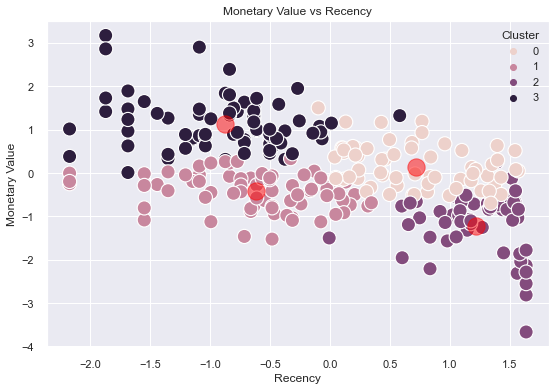

In [168]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data=df_normalized_k4, x="Recency", y="MonetaryValue", hue="Cluster", s=200)
plt.scatter(x = centers_k4[: , 0], y =  centers_k4[: , 2], s = 300, c = 'red', alpha = 0.5)
plt.title('Monetary Value vs Recency')
plt.xlabel('Recency'), plt.ylabel('Monetary Value')
plt.show()

#### 2. Frequency vs MonetaryValue

In [169]:
centers_k4[:, 1], centers_k4[:, 2]

(array([ 0.05725918, -0.38035241, -1.23190462,  1.15774212]),
 array([ 0.13349249, -0.42837625, -1.21609025,  1.12584424]))

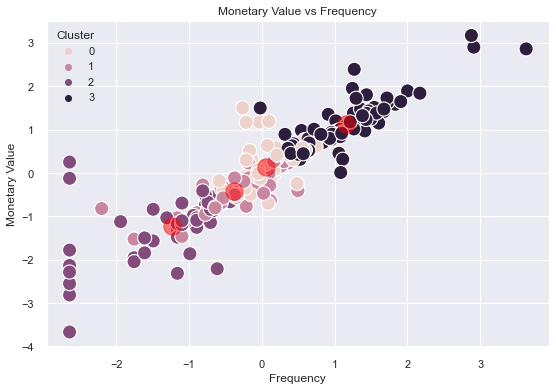

In [170]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data=df_normalized_k4, x="Frequency", y="MonetaryValue", hue="Cluster", s=200)
plt.scatter(x = centers_k4[: , 1], y =  centers_k4[: , 2], s = 300, c = 'red', alpha = 0.5)
plt.title('Monetary Value vs Frequency')
plt.xlabel('Frequency'), plt.ylabel('Monetary Value')
plt.show()

#### 3. Recency vs Frequency

In [171]:
centers_k4[:, 0], centers_k4[:, 1]

(array([ 0.71914616, -0.61432239,  1.21739565, -0.87686621]),
 array([ 0.05725918, -0.38035241, -1.23190462,  1.15774212]))

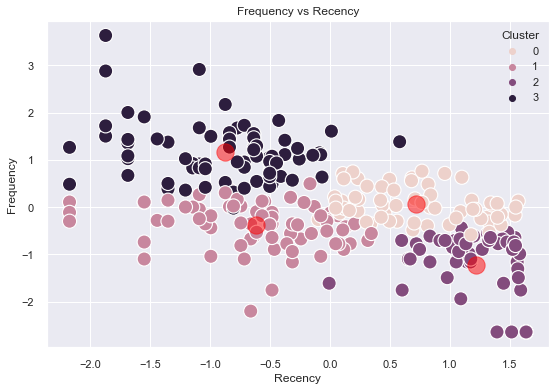

In [172]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data=df_normalized_k4, x="Recency", y="Frequency", hue="Cluster", s=200)
plt.scatter(x = centers_k4[: , 0], y = centers_k4[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.title('Frequency vs Recency')
plt.xlabel('Recency'), plt.ylabel('Frequency')
plt.show()

### Intepretation of cluster segments with descriptions

In [173]:
customers

Recency  Frequency  MonetaryValue
CustomerID                                   
12354.0         233         58        2139.40
12413.0          67         48        1497.45
12417.0         226         32        1262.36
12419.0         386         23         845.01
12421.0          16         59        2162.60
...             ...        ...            ...
14335.0          17         60        1204.86
14646.0           2       3824     1262175.52
14911.0           2      11011      584137.34
16047.0         683          1         109.14
17097.0           3        288        2473.43

[268 rows x 3 columns]

In [174]:
customers_labelled = customers.copy()

customers_labelled['k3_segment'] = df_normalized_k3.loc[:, 'Cluster'].to_numpy()
customers_labelled['k3_segment'] = customers_labelled['k3_segment'].replace({0: "Lost", 
                                                                             1: "Champion + Loyal", 
                                                                             2: "Promising"})

customers_labelled['k4_segment'] = df_normalized_k4.loc[:, 'Cluster'].to_numpy()
customers_labelled['k4_segment'] = customers_labelled['k4_segment'].replace({0: "At-risk", 
                                                                             1: "Recent", 
                                                                             2: "Lost", 
                                                                             3: "Champion + Loyal"})

In [175]:
customers_labelled

Recency  Frequency  MonetaryValue        k3_segment  \
CustomerID                                                        
12354.0         233         58        2139.40         Promising   
12413.0          67         48        1497.45         Promising   
12417.0         226         32        1262.36              Lost   
12419.0         386         23         845.01              Lost   
12421.0          16         59        2162.60         Promising   
...             ...        ...            ...               ...   
14335.0          17         60        1204.86         Promising   
14646.0           2       3824     1262175.52  Champion + Loyal   
14911.0           2      11011      584137.34  Champion + Loyal   
16047.0         683          1         109.14              Lost   
17097.0           3        288        2473.43  Champion + Loyal   

                  k4_segment  
CustomerID                    
12354.0              At-risk  
12413.0               Recent  
12417.0              At-risk  
12419.0                 Lost  
12421.0               Recent  
...                      ...  
14335.0               Recent  
14646.0     Champion + Loyal  
14911.0     Champion + Loyal  
16047.0                 Lost  
17097.0     Champion + Loyal  

[268 rows x 5 columns]

In [176]:
group_df = customers_labelled.groupby("k3_segment").size()
group_df

k3_segment
Champion + Loyal     68
Lost                 84
Promising           116
dtype: int64

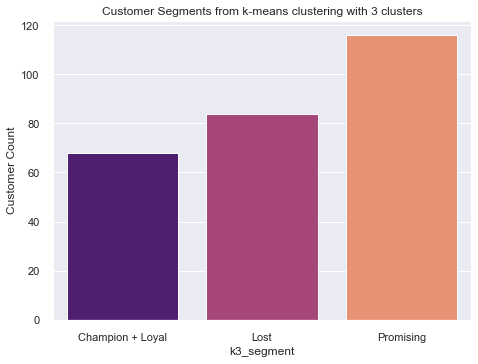

In [177]:
plt.figure(figsize=(7.5, 5.5))
sns.barplot(x = group_df.index, y = group_df.values, palette = "magma")
plt.title("Customer Segments from k-means clustering with 3 clusters")
plt.ylabel("Customer Count")
plt.show()

In [178]:
group_df = customers_labelled.groupby("k4_segment").size()
group_df

k4_segment
At-risk             67
Champion + Loyal    76
Lost                52
Recent              73
dtype: int64

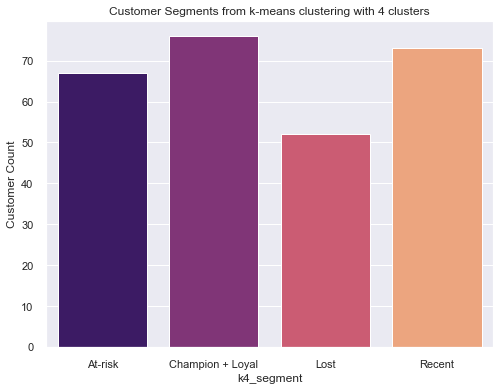

In [179]:
plt.figure(figsize=(8, 6))
sns.barplot(x = group_df.index, y = group_df.values, palette = "magma")
plt.title("Customer Segments from k-means clustering with 4 clusters")
plt.ylabel("Customer Count")
plt.show()

## 2. Modeling with Hierarchical Clustering

In [180]:
customers_normalized

Recency  Frequency  MonetaryValue
0    0.834090   0.001588      -0.085270
1    0.002003  -0.124670      -0.321795
2    0.812519  -0.394131      -0.437469
3    1.200353  -0.612544      -0.715746
4   -0.839337   0.013008      -0.078225
..        ...        ...            ...
263 -0.806007   0.024239      -0.469325
264 -1.873064   2.877972       3.167641
265 -1.873064   3.629605       2.858317
266  1.636260  -2.639756      -2.284857
267 -1.687298   1.083417       0.008971

[268 rows x 3 columns]

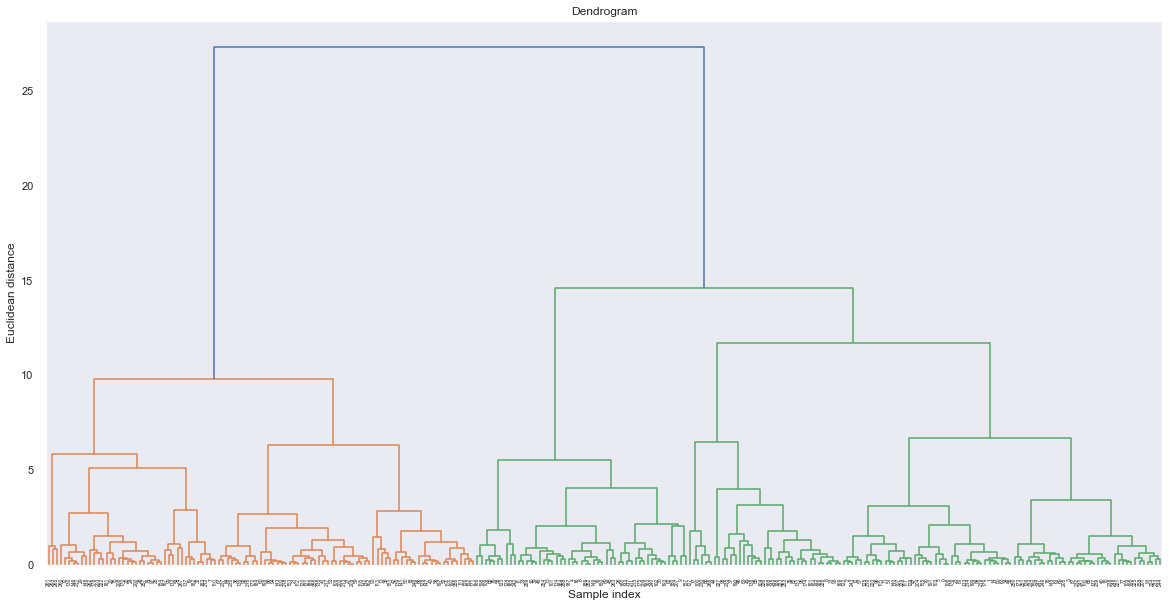

In [181]:
# Plot dendrogram
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  

# Create dendrogram
#sc.dendrogram(sch.linkage(pd.DataFrame(np.array(customers_normalized), columns=['Recency', 'Frequency', 'MonetaryValue']), method='ward'))
sch.dendrogram(sch.linkage(customers_normalized, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.grid()
plt.show()

Based on this dendogram, we are able to make a cut at the distance around 9, which gives us 5 clusters. However, we noticed that the cut off distance of 13 can also give us 3 clusters, while the cut off distance of 11 can also gives us 4 clusters which is interesting. In the end, we have to observe the results for silhouette score analysis to make decision.

### Silhouette Score Analysis

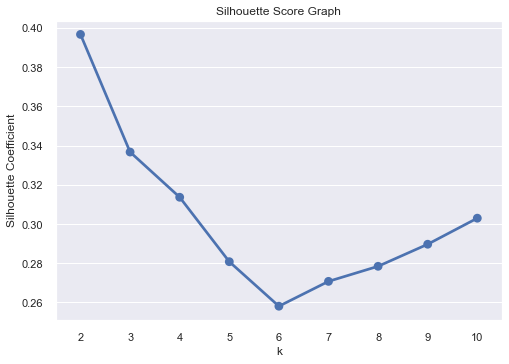

In [182]:
scores = {}
for n_clusters in range(2, 11):
    hcmodel = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    preds = hcmodel.fit_predict(customers_normalized)
    scores[n_clusters] = silhouette_score(customers_normalized, preds)
    
plt.title('Silhouette Score Graph')
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
sns.pointplot(x=list(scores.keys()), y=list(scores.values()))
plt.show()

The results are surprisingly different compared to k means clustering, whereby starting from minimum k value of 3, value of k = 3 has the highest silhouette coefficient scores, followed by k = 4. Thus, we decide to use these 2 values to obtain some meaningful interpretation of the customer clusters.

In [183]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
preds = cluster.fit_predict(customers_normalized)

score = silhouette_score(customers_normalized, preds)
print("For n_clusters = {}, silhouette score is {}".format(3, score))

For n_clusters = 3, silhouette score is 0.3367534906685736


In [184]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
preds = cluster.fit_predict(customers_normalized)

score = silhouette_score(customers_normalized, preds)
print("For n_clusters = {}, silhouette score is {}".format(4, score))

For n_clusters = 4, silhouette score is 0.3136868726176112


In [185]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
preds = cluster.fit_predict(customers_normalized)

score = silhouette_score(customers_normalized, preds)
print("For n_clusters = {}, silhouette score is {}".format(5, score))

For n_clusters = 5, silhouette score is 0.28080997725451956


From the silhouette score, k value of 3 gives the highest silhouette score, so indeed 3 is better than 4 and 5, but that doesn't mean 4 clusters cannot be interpretted in the domain of customer analysis. We'll pick the top 2 cluster values with the highest silhouette scores.

### Hierarchical Clustering with k = 3 clusters

In [186]:
# Perform hierarchical aggremerative clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(customers_normalized)
labels = cluster.labels_
labels

array([0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 0, 1], dtype=int64)

In [187]:
k = 3
customers_transformed_copy = customers_transformed.copy()
customers_transformed_copy["Cluster"] = labels

print("RFM Log for cluster k =", k)
customers_transformed_copy.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

RFM Log for cluster k = 3


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          7.31      3.13          5.23   114
1          3.77      5.67          6.59   103
2          3.22      3.46          5.36    51

In [188]:
# Create the dataframe
df_normalized_h3 = pd.DataFrame(np.array(customers_normalized), columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized_h3['ID'] = customers_transformed.index
df_normalized_h3['Cluster'] = labels

In [189]:
df_normalized_h3

Recency  Frequency  MonetaryValue       ID  Cluster
0    0.834090   0.001588      -0.085270  12354.0        0
1    0.002003  -0.124670      -0.321795  12413.0        0
2    0.812519  -0.394131      -0.437469  12417.0        0
3    1.200353  -0.612544      -0.715746  12419.0        0
4   -0.839337   0.013008      -0.078225  12421.0        2
..        ...        ...            ...      ...      ...
263 -0.806007   0.024239      -0.469325  14335.0        2
264 -1.873064   2.877972       3.167641  14646.0        1
265 -1.873064   3.629605       2.858317  14911.0        1
266  1.636260  -2.639756      -2.284857  16047.0        0
267 -1.687298   1.083417       0.008971  17097.0        1

[268 rows x 5 columns]

In [190]:
# Melt The Data
df_nor_melt_h3 = pd.melt(df_normalized_h3.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt_h3.head()

ID  Cluster Attribute     Value
0  12354.0        0   Recency  0.834090
1  12413.0        0   Recency  0.002003
2  12417.0        0   Recency  0.812519
3  12419.0        0   Recency  1.200353
4  12421.0        2   Recency -0.839337

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

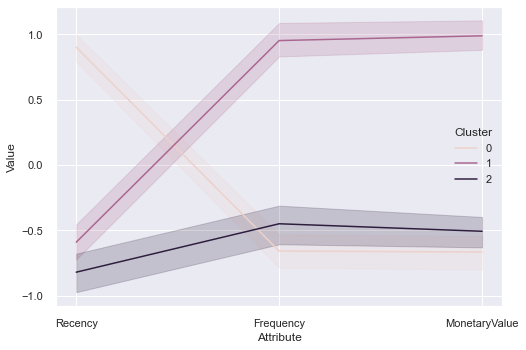

In [191]:
# Visualize it
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt_h3)

Different from k-means clustering, we obtained different segments of customers. Cluster 0 spends very less frequently, spends very little in monetary amount, and buys products very less recently, showing the signs of a **lost/churned customer**. Cluster 1 is a sign of a **champion/loyal customer**, who is very freqent, spend a lot and buy the product very recently. Cluster 2 is moderate less in frequency, moderate less in spending amount and also buy product very recently, which is probably consisting of signs of **recent customers**.

Getting different results is normal considering that we start with 3 clusters compared to k-means with 4 clusters onwards.

### Hierarchical Clustering with k = 4 clusters

In [192]:
# Perform hierarchical aggremerative clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

cluster.fit(customers_normalized)
labels = cluster.labels_
labels

array([1, 1, 1, 1, 2, 1, 2, 0, 3, 2, 2, 2, 1, 0, 1, 1, 2, 3, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 2, 3, 0, 2, 1, 3, 0, 3, 0, 2, 1, 0, 0, 0,
       3, 2, 3, 1, 2, 3, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 3, 3, 1, 3, 0, 1,
       3, 2, 0, 1, 0, 3, 0, 3, 1, 0, 3, 0, 3, 2, 2, 1, 3, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0, 1, 0, 3,
       0, 1, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 3, 0, 0, 0, 1, 3, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 1, 0, 2, 3, 1, 0, 0,
       2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 3, 1, 1, 3, 3, 3, 1, 3, 0, 1, 1, 1, 3, 0, 0, 1, 1, 2, 1,
       2, 1, 1, 3, 0, 1, 1, 1, 1, 1, 2, 3, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 3, 0], dtype=int64)

In [193]:
k = 4
customers_transformed_copy = customers_transformed.copy()
customers_transformed_copy["Cluster"] = labels

print("RFM Log for cluster k = ", k)
customers_transformed_copy.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

RFM Log for cluster k =  4


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          3.77      5.67          6.59   103
1          6.97      3.72          5.52    77
2          3.22      3.46          5.36    51
3          8.03      1.90          4.62    37

In [194]:
# Create the dataframe
df_normalized_h4 = pd.DataFrame(np.array(customers_normalized), columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized_h4['ID'] = customers_transformed.index
df_normalized_h4['Cluster'] = labels

In [195]:
df_normalized_h4

Recency  Frequency  MonetaryValue       ID  Cluster
0    0.834090   0.001588      -0.085270  12354.0        1
1    0.002003  -0.124670      -0.321795  12413.0        1
2    0.812519  -0.394131      -0.437469  12417.0        1
3    1.200353  -0.612544      -0.715746  12419.0        1
4   -0.839337   0.013008      -0.078225  12421.0        2
..        ...        ...            ...      ...      ...
263 -0.806007   0.024239      -0.469325  14335.0        2
264 -1.873064   2.877972       3.167641  14646.0        0
265 -1.873064   3.629605       2.858317  14911.0        0
266  1.636260  -2.639756      -2.284857  16047.0        3
267 -1.687298   1.083417       0.008971  17097.0        0

[268 rows x 5 columns]

In [196]:
# Melt The Data
df_nor_melt_h4 = pd.melt(df_normalized_h4.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt_h4.head()

ID  Cluster Attribute     Value
0  12354.0        1   Recency  0.834090
1  12413.0        1   Recency  0.002003
2  12417.0        1   Recency  0.812519
3  12419.0        1   Recency  1.200353
4  12421.0        2   Recency -0.839337

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

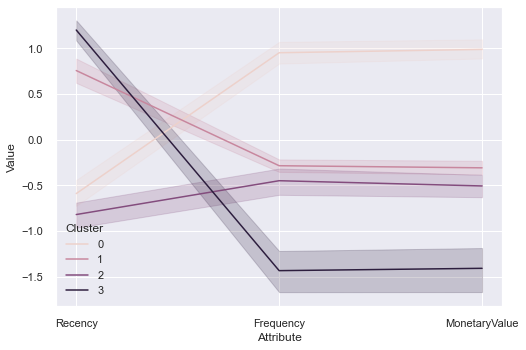

In [197]:
# Visualize it
sns.lineplot(x='Attribute', y='Value', hue='Cluster', legend='full', data=df_nor_melt_h4)

This pattern is slightly similar to k-means with 4 cluster. Cluster 0 is a **champion/loyal customer**, whereby they spend very frequently, spend very high in amount and buys pretty recently. For Cluster 1, these customers spend moderately in frequency and spending amount, but buys long time ago, showing the signs of **at-risk customer**. Cluster 2 has customers who also spend moderate in frequency and moderate sum of amount, but also buys quite recently, indicating signs of **recent customer**. As for cluster 3, they spend very less frequently and very litte in spending amount, as well as haven't buy in a while, showing signs of **lost/churned customer**.

### Analysis of RFM and 2D visualisations for 3 clusters

#### 1. Monetary Value vs Recency

In [198]:
df_normalized_h3

Recency  Frequency  MonetaryValue       ID  Cluster
0    0.834090   0.001588      -0.085270  12354.0        0
1    0.002003  -0.124670      -0.321795  12413.0        0
2    0.812519  -0.394131      -0.437469  12417.0        0
3    1.200353  -0.612544      -0.715746  12419.0        0
4   -0.839337   0.013008      -0.078225  12421.0        2
..        ...        ...            ...      ...      ...
263 -0.806007   0.024239      -0.469325  14335.0        2
264 -1.873064   2.877972       3.167641  14646.0        1
265 -1.873064   3.629605       2.858317  14911.0        1
266  1.636260  -2.639756      -2.284857  16047.0        0
267 -1.687298   1.083417       0.008971  17097.0        1

[268 rows x 5 columns]

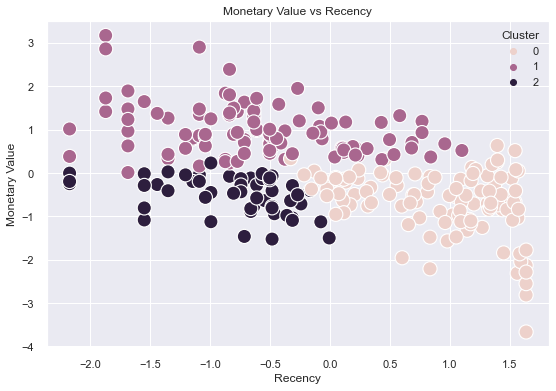

In [199]:
plt.figure(figsize=(9, 6))  
sns.scatterplot(data=df_normalized_h3, x="Recency", y="MonetaryValue", hue="Cluster", s=200)
plt.title('Monetary Value vs Recency')
plt.xlabel('Recency'), plt.ylabel('Monetary Value')
plt.show()

#### 2. Monetary Value vs Frequency

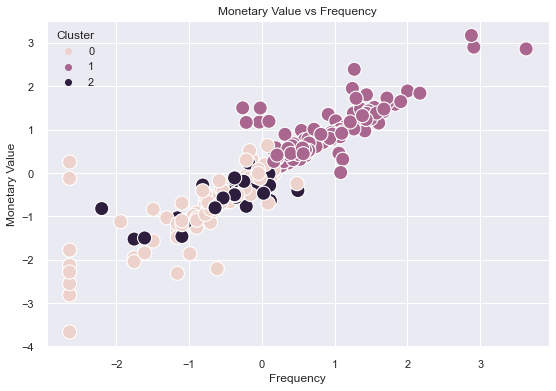

In [200]:
plt.figure(figsize=(9, 6))   
sns.scatterplot(data=df_normalized_h3, x="Frequency", y="MonetaryValue", hue="Cluster", s=200)
plt.title('Monetary Value vs Frequency')
plt.xlabel('Frequency'), plt.ylabel('Monetary Value')
plt.show()

#### 3. Frequency vs Recency

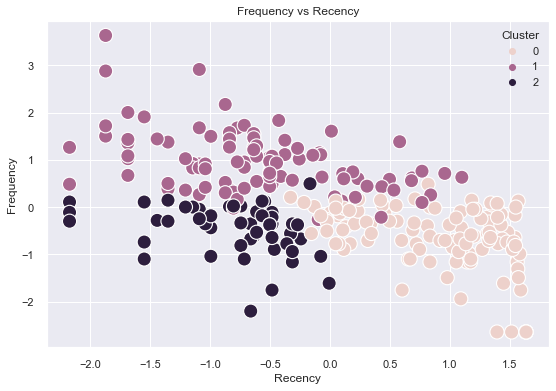

In [201]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df_normalized_h3, x="Recency", y="Frequency", hue="Cluster", s=200)
plt.title('Frequency vs Recency')
plt.xlabel('Recency'), plt.ylabel('Frequency')
plt.show()

### Analysis of RFM and 2D visualisations for 4 clusters

#### 1. Monetary Value vs Recency

In [202]:
df_normalized_h4

Recency  Frequency  MonetaryValue       ID  Cluster
0    0.834090   0.001588      -0.085270  12354.0        1
1    0.002003  -0.124670      -0.321795  12413.0        1
2    0.812519  -0.394131      -0.437469  12417.0        1
3    1.200353  -0.612544      -0.715746  12419.0        1
4   -0.839337   0.013008      -0.078225  12421.0        2
..        ...        ...            ...      ...      ...
263 -0.806007   0.024239      -0.469325  14335.0        2
264 -1.873064   2.877972       3.167641  14646.0        0
265 -1.873064   3.629605       2.858317  14911.0        0
266  1.636260  -2.639756      -2.284857  16047.0        3
267 -1.687298   1.083417       0.008971  17097.0        0

[268 rows x 5 columns]

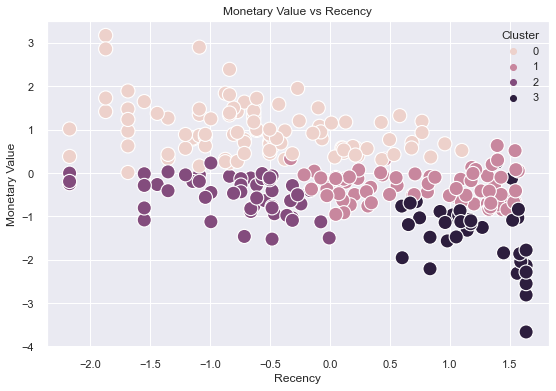

In [203]:
plt.figure(figsize=(9, 6)) 
sns.scatterplot(data=df_normalized_h4, x="Recency", y="MonetaryValue", hue="Cluster", legend='full', s=200)
plt.title('Monetary Value vs Recency')
plt.xlabel('Recency'), plt.ylabel('Monetary Value')
plt.show()

#### 2. Monetary Value vs Frequency

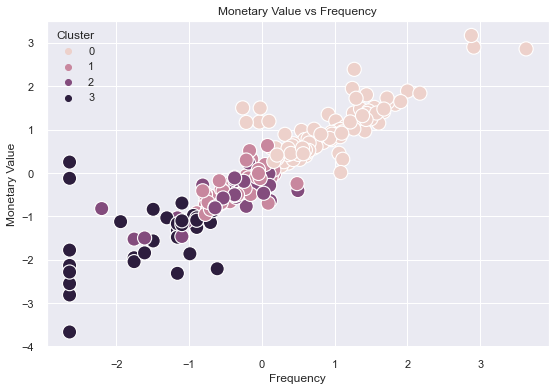

In [204]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df_normalized_h4, x="Frequency", y="MonetaryValue", hue="Cluster", legend='full', s=200)
plt.title('Monetary Value vs Frequency')
plt.xlabel('Frequency'), plt.ylabel('Monetary Value')
plt.show()

#### 3. Frequency vs Recency

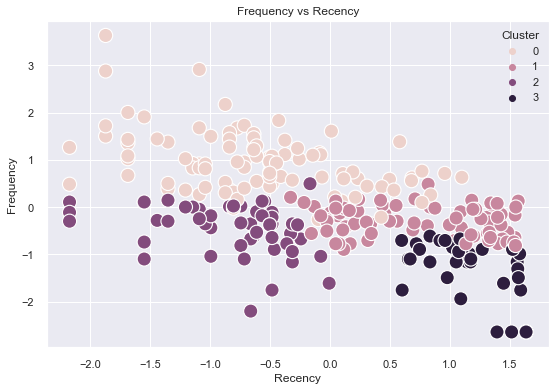

In [205]:
plt.figure(figsize=(9, 6))  
sns.scatterplot(data=df_normalized_h4, x="Recency", y="Frequency", hue="Cluster", legend='full', s=200)
plt.title('Frequency vs Recency')
plt.xlabel('Recency'), plt.ylabel('Frequency')
plt.show()

### Intepretation of cluster segments with descriptions

In [206]:
customers_labelled

Recency  Frequency  MonetaryValue        k3_segment  \
CustomerID                                                        
12354.0         233         58        2139.40         Promising   
12413.0          67         48        1497.45         Promising   
12417.0         226         32        1262.36              Lost   
12419.0         386         23         845.01              Lost   
12421.0          16         59        2162.60         Promising   
...             ...        ...            ...               ...   
14335.0          17         60        1204.86         Promising   
14646.0           2       3824     1262175.52  Champion + Loyal   
14911.0           2      11011      584137.34  Champion + Loyal   
16047.0         683          1         109.14              Lost   
17097.0           3        288        2473.43  Champion + Loyal   

                  k4_segment  
CustomerID                    
12354.0              At-risk  
12413.0               Recent  
12417.0              At-risk  
12419.0                 Lost  
12421.0               Recent  
...                      ...  
14335.0               Recent  
14646.0     Champion + Loyal  
14911.0     Champion + Loyal  
16047.0                 Lost  
17097.0     Champion + Loyal  

[268 rows x 5 columns]

In [207]:
customers_labelled['h3_segment'] = df_normalized_h3.loc[:, 'Cluster'].to_numpy()
customers_labelled['h3_segment'] = customers_labelled['h3_segment'].replace({0: "Lost", 
                                                                             1: "Champion + Loyal", 
                                                                             2: "Recent"})

customers_labelled['h4_segment'] = df_normalized_h4.loc[:, 'Cluster'].to_numpy()
customers_labelled['h4_segment'] = customers_labelled['h4_segment'].replace({0: "Champion + Loyal", 
                                                                             1: "At-risk", 
                                                                             2: "Recent", 
                                                                             3: "Lost"})

In [208]:
customers_labelled

Recency  Frequency  MonetaryValue        k3_segment  \
CustomerID                                                        
12354.0         233         58        2139.40         Promising   
12413.0          67         48        1497.45         Promising   
12417.0         226         32        1262.36              Lost   
12419.0         386         23         845.01              Lost   
12421.0          16         59        2162.60         Promising   
...             ...        ...            ...               ...   
14335.0          17         60        1204.86         Promising   
14646.0           2       3824     1262175.52  Champion + Loyal   
14911.0           2      11011      584137.34  Champion + Loyal   
16047.0         683          1         109.14              Lost   
17097.0           3        288        2473.43  Champion + Loyal   

                  k4_segment        h3_segment        h4_segment  
CustomerID                                                        
12354.0              At-risk              Lost           At-risk  
12413.0               Recent              Lost           At-risk  
12417.0              At-risk              Lost           At-risk  
12419.0                 Lost              Lost           At-risk  
12421.0               Recent            Recent            Recent  
...                      ...               ...               ...  
14335.0               Recent            Recent            Recent  
14646.0     Champion + Loyal  Champion + Loyal  Champion + Loyal  
14911.0     Champion + Loyal  Champion + Loyal  Champion + Loyal  
16047.0                 Lost              Lost              Lost  
17097.0     Champion + Loyal  Champion + Loyal  Champion + Loyal  

[268 rows x 7 columns]

In [209]:
group_df = customers_labelled.groupby("h3_segment").size()
group_df

h3_segment
Champion + Loyal    103
Lost                114
Recent               51
dtype: int64

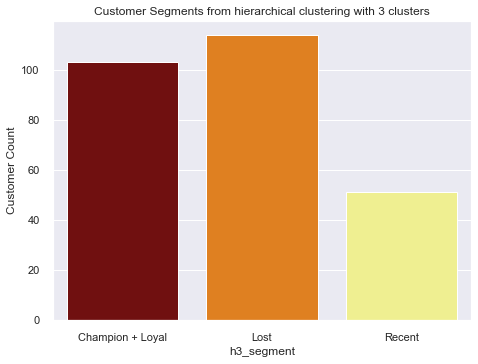

In [210]:
plt.figure(figsize=(7.5, 5.5))
sns.barplot(x = group_df.index, y = group_df.values, palette = "afmhot")
plt.title("Customer Segments from hierarchical clustering with 3 clusters")
plt.ylabel("Customer Count")
plt.show()

In [211]:
group_df = customers_labelled.groupby("h4_segment").size()
group_df

h4_segment
At-risk              77
Champion + Loyal    103
Lost                 37
Recent               51
dtype: int64

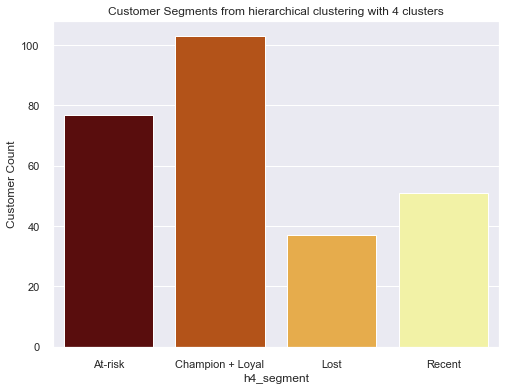

In [212]:
plt.figure(figsize=(8, 6))
sns.barplot(x = group_df.index, y = group_df.values, palette = "afmhot")
plt.title("Customer Segments from hierarchical clustering with 4 clusters")
plt.ylabel("Customer Count")
plt.show()

### Comparison of Clustering Algorithms for 3 clusters

In [213]:
cluster3_df = pd.concat([customers_labelled.groupby("h3_segment").size(), customers_labelled.groupby("k3_segment").size()], axis=1).rename(
    columns={0: "hierarchical", 1:"k-means"}
).fillna(0)

cluster3_df

hierarchical  k-means
Champion + Loyal         103.0     68.0
Lost                     114.0     84.0
Recent                    51.0      0.0
Promising                  0.0    116.0

In [214]:
cluster3_df['Segment'] = cluster3_df.index
cluster3_df = cluster3_df.reset_index(drop=True)
cluster3_df

hierarchical  k-means           Segment
0         103.0     68.0  Champion + Loyal
1         114.0     84.0              Lost
2          51.0      0.0            Recent
3           0.0    116.0         Promising

In [215]:
cluster3_df = pd.melt(cluster3_df, id_vars=['Segment'], value_vars=['hierarchical', 'k-means'], 
                      var_name='Algorithm', value_name='Customer Count')
cluster3_df

Segment     Algorithm  Customer Count
0  Champion + Loyal  hierarchical           103.0
1              Lost  hierarchical           114.0
2            Recent  hierarchical            51.0
3         Promising  hierarchical             0.0
4  Champion + Loyal       k-means            68.0
5              Lost       k-means            84.0
6            Recent       k-means             0.0
7         Promising       k-means           116.0

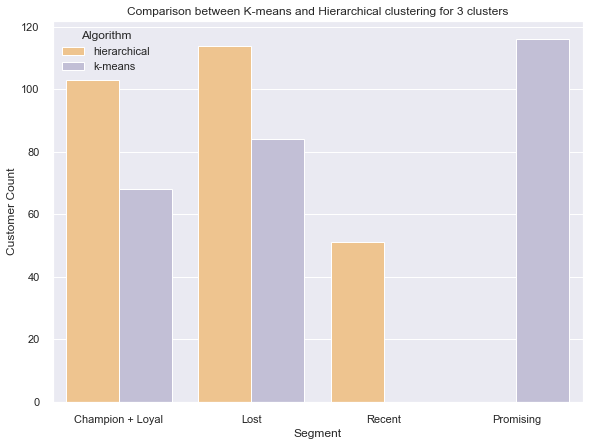

In [216]:
plt.figure(figsize=(9.5, 7))
sns.barplot(data=cluster3_df, x='Segment', y='Customer Count', hue='Algorithm', palette='PuOr')
plt.title("Comparison between K-means and Hierarchical clustering for 3 clusters")
plt.show()

### Comparison of Clustering Algorithms for 4 clusters

In [217]:
cluster4_df = pd.concat([group_df, customers_labelled.groupby("k4_segment").size()], axis=1).rename(
    columns={0: "hierarchical", 1:"k-means"}
)

cluster4_df

hierarchical  k-means
At-risk                     77       67
Champion + Loyal           103       76
Lost                        37       52
Recent                      51       73

In [218]:
cluster4_df['Segment'] = cluster4_df.index
cluster4_df = cluster4_df.reset_index(drop=True)
cluster4_df

hierarchical  k-means           Segment
0            77       67           At-risk
1           103       76  Champion + Loyal
2            37       52              Lost
3            51       73            Recent

In [219]:
cluster4_df = pd.melt(cluster4_df, id_vars=['Segment'], value_vars=['hierarchical', 'k-means'], 
                      var_name='Algorithm', value_name='Customer Count')
cluster4_df

Segment     Algorithm  Customer Count
0           At-risk  hierarchical              77
1  Champion + Loyal  hierarchical             103
2              Lost  hierarchical              37
3            Recent  hierarchical              51
4           At-risk       k-means              67
5  Champion + Loyal       k-means              76
6              Lost       k-means              52
7            Recent       k-means              73

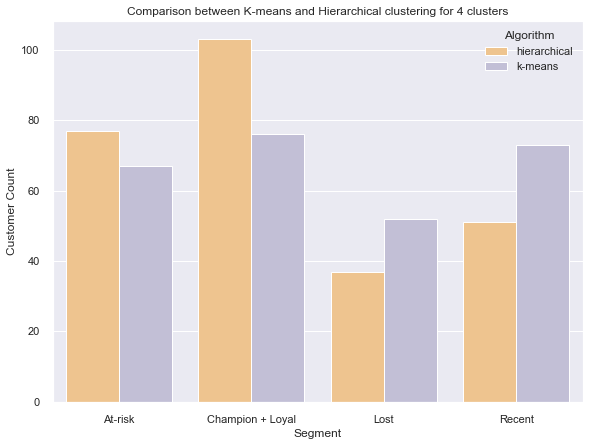

In [220]:
plt.figure(figsize=(9.5, 7))
sns.barplot(data=cluster4_df, x='Segment', y='Customer Count', hue='Algorithm', palette='PuOr')
plt.title("Comparison between K-means and Hierarchical clustering for 4 clusters")
plt.show()

### Comparison of 5 Countries to be focused on

In [221]:
len(df7['CustomerID'].unique())

268

In [222]:
df7.groupby(['CustomerID', 'Country']).size().reset_index()[['CustomerID', 'Country']]

CustomerID      Country
0       12354.0        Spain
1       12413.0       France
2       12413.0        Spain
3       12417.0        Spain
4       12419.0        Spain
..          ...          ...
265     14335.0      Germany
266     14646.0  Netherlands
267     14911.0         EIRE
268     16047.0         EIRE
269     17097.0        Spain

[270 rows x 2 columns]

In [223]:
df7[df7['CustomerID'] == 12652].groupby('CustomerID')['Country'].value_counts()

CustomerID  Country
12652.0     France     47
            Germany     3
Name: Country, dtype: int64

In [224]:
df7[(df7['CustomerID'] == 12652) & (df7['Country'] == 'Germany')]

Bill MerchandiseID                           Product  Quota  \
744071  524978         21527  Red retrospot traditional teapot      4   
805212  524978         21539         Red retrospot butter dish      3   
956314  524978         21531      Red retrospot sugar jam bowl     24   

          BillDate  Amount  CustomerID  Country  TotalSum  
744071  2018-10-01    9.95     12652.0  Germany     39.80  
805212  2018-10-01    6.95     12652.0  Germany     20.85  
956314  2018-10-01    4.10     12652.0  Germany     98.40

In [225]:
customer_dict = df7.groupby(['CustomerID', 'Country']).size().reset_index()
customer_dict = customer_dict.loc[customer_dict.groupby('CustomerID')[0].idxmax()][['CustomerID', 'Country']]
customer_dict = customer_dict.set_index('CustomerID').T.to_dict('records')[0]
customer_dict

{12354.0: 'Spain',
 12413.0: 'France',
 12417.0: 'Spain',
 12419.0: 'Spain',
 12421.0: 'Spain',
 12426.0: 'Germany',
 12427.0: 'Germany',
 12437.0: 'France',
 12441.0: 'France',
 12442.0: 'Spain',
 12445.0: 'Spain',
 12448.0: 'Spain',
 12450.0: 'Spain',
 12454.0: 'Spain',
 12455.0: 'Spain',
 12459.0: 'Spain',
 12462.0: 'Spain',
 12466.0: 'France',
 12468.0: 'Germany',
 12471.0: 'Germany',
 12472.0: 'Germany',
 12473.0: 'Germany',
 12474.0: 'Germany',
 12475.0: 'Germany',
 12476.0: 'Germany',
 12477.0: 'Germany',
 12479.0: 'Germany',
 12480.0: 'Germany',
 12481.0: 'Germany',
 12484.0: 'Spain',
 12488.0: 'France',
 12489.0: 'France',
 12490.0: 'France',
 12491.0: 'France',
 12492.0: 'Germany',
 12493.0: 'France',
 12494.0: 'France',
 12496.0: 'Spain',
 12497.0: 'Germany',
 12498.0: 'Germany',
 12499.0: 'Germany',
 12500.0: 'Germany',
 12501.0: 'Germany',
 12502.0: 'Spain',
 12503.0: 'Spain',
 12504.0: 'Germany',
 12506.0: 'France',
 12507.0: 'Spain',
 12508.0: 'France',
 12509.0: 'France

In [226]:
len(customer_dict)

268

In [227]:
customers_labelled

Recency  Frequency  MonetaryValue        k3_segment  \
CustomerID                                                        
12354.0         233         58        2139.40         Promising   
12413.0          67         48        1497.45         Promising   
12417.0         226         32        1262.36              Lost   
12419.0         386         23         845.01              Lost   
12421.0          16         59        2162.60         Promising   
...             ...        ...            ...               ...   
14335.0          17         60        1204.86         Promising   
14646.0           2       3824     1262175.52  Champion + Loyal   
14911.0           2      11011      584137.34  Champion + Loyal   
16047.0         683          1         109.14              Lost   
17097.0           3        288        2473.43  Champion + Loyal   

                  k4_segment        h3_segment        h4_segment  
CustomerID                                                        
12354.0              At-risk              Lost           At-risk  
12413.0               Recent              Lost           At-risk  
12417.0              At-risk              Lost           At-risk  
12419.0                 Lost              Lost           At-risk  
12421.0               Recent            Recent            Recent  
...                      ...               ...               ...  
14335.0               Recent            Recent            Recent  
14646.0     Champion + Loyal  Champion + Loyal  Champion + Loyal  
14911.0     Champion + Loyal  Champion + Loyal  Champion + Loyal  
16047.0                 Lost              Lost              Lost  
17097.0     Champion + Loyal  Champion + Loyal  Champion + Loyal  

[268 rows x 7 columns]

In [228]:
list(customers_labelled.index.map(lambda x: customer_dict[float(x)]))

['Spain',
 'France',
 'Spain',
 'Spain',
 'Spain',
 'Germany',
 'Germany',
 'France',
 'France',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'France',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Spain',
 'France',
 'France',
 'France',
 'France',
 'Germany',
 'France',
 'France',
 'Spain',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Spain',
 'Spain',
 'Germany',
 'France',
 'Spain',
 'France',
 'France',
 'Spain',
 'France',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'France',
 'Germany',
 'France',
 'Germany',
 'Germany',
 'Germany',
 'France',
 'Germany',
 'Germany',
 'France',
 'Germany',
 'Germany',
 'France',
 'France',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'France',
 'Spain',
 'Spain',
 'Spain',
 'Spain',

In [229]:
customers_labelled['Country'] = customers_labelled.index.map(lambda x: customer_dict[float(x)])
customers_labelled

Recency  Frequency  MonetaryValue        k3_segment  \
CustomerID                                                        
12354.0         233         58        2139.40         Promising   
12413.0          67         48        1497.45         Promising   
12417.0         226         32        1262.36              Lost   
12419.0         386         23         845.01              Lost   
12421.0          16         59        2162.60         Promising   
...             ...        ...            ...               ...   
14335.0          17         60        1204.86         Promising   
14646.0           2       3824     1262175.52  Champion + Loyal   
14911.0           2      11011      584137.34  Champion + Loyal   
16047.0         683          1         109.14              Lost   
17097.0           3        288        2473.43  Champion + Loyal   

                  k4_segment        h3_segment        h4_segment      Country  
CustomerID                                                                     
12354.0              At-risk              Lost           At-risk        Spain  
12413.0               Recent              Lost           At-risk       France  
12417.0              At-risk              Lost           At-risk        Spain  
12419.0                 Lost              Lost           At-risk        Spain  
12421.0               Recent            Recent            Recent        Spain  
...                      ...               ...               ...          ...  
14335.0               Recent            Recent            Recent      Germany  
14646.0     Champion + Loyal  Champion + Loyal  Champion + Loyal  Netherlands  
14911.0     Champion + Loyal  Champion + Loyal  Champion + Loyal         EIRE  
16047.0                 Lost              Lost              Lost         EIRE  
17097.0     Champion + Loyal  Champion + Loyal  Champion + Loyal        Spain  

[268 rows x 8 columns]

In [230]:
customers_labelled['Country'].unique()

array(['Spain', 'France', 'Germany', 'EIRE', 'Netherlands'], dtype=object)

#### For k-means clustering with 3 clusters

In [231]:
compare_df = customers_labelled.groupby(['k3_segment', 'Country']).size().reset_index().rename(
    columns={0: 'Customer Count', 'k3_segment': 'Segment'}
)
compare_df['Percentage Count'] = compare_df.groupby('Country')['Customer Count'].apply(lambda x: round(x/x.sum()*100, 2))

compare_df

Segment      Country  Customer Count  Percentage Count
0   Champion + Loyal         EIRE               3             60.00
1   Champion + Loyal       France              28             29.47
2   Champion + Loyal      Germany              29             27.36
3   Champion + Loyal  Netherlands               2              9.09
4   Champion + Loyal        Spain               6             15.00
5               Lost         EIRE               2             40.00
6               Lost       France              31             32.63
7               Lost      Germany              22             20.75
8               Lost  Netherlands              15             68.18
9               Lost        Spain              14             35.00
10         Promising       France              36             37.89
11         Promising      Germany              55             51.89
12         Promising  Netherlands               5             22.73
13         Promising        Spain              20             50.00

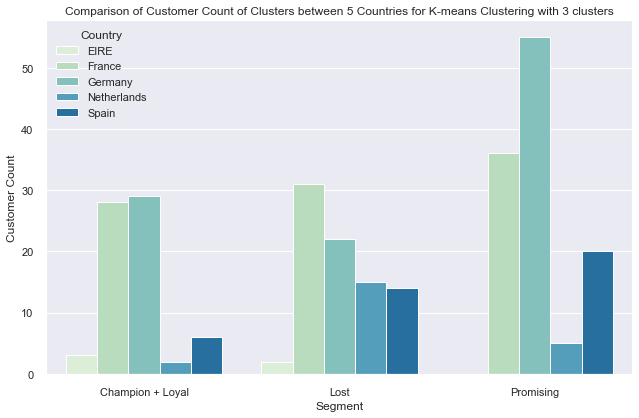

In [232]:
plt.figure(figsize=(10.5, 6.5))
sns.barplot(data=compare_df, x='Segment', y='Customer Count', hue='Country', palette='GnBu')
plt.title("Comparison of Customer Count of Clusters between 5 Countries for K-means Clustering with 3 clusters")
plt.show()

Percentage Comparison

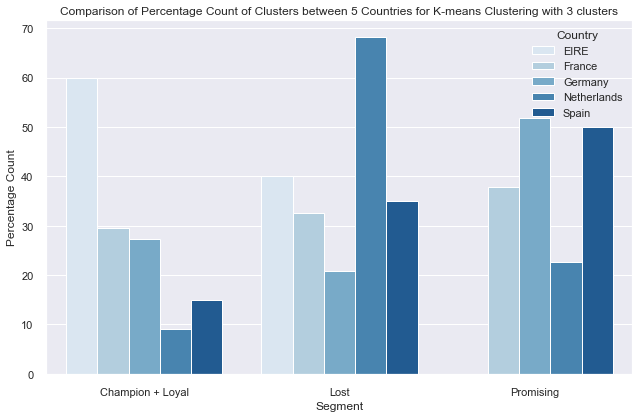

In [233]:
plt.figure(figsize=(10.5, 6.5))
sns.barplot(data=compare_df, x='Segment', y='Percentage Count', hue='Country', palette='Blues')
plt.title("Comparison of Percentage Count of Clusters between 5 Countries for K-means Clustering with 3 clusters")
plt.show()

#### For k-means clustering with 4 clusters

In [234]:
compare_df = customers_labelled.groupby(['k4_segment', 'Country']).size().reset_index().rename(
    columns={0: 'Customer Count', 'k4_segment': 'Segment'}
)
compare_df['Percentage Count'] = compare_df.groupby('Country')['Customer Count'].apply(lambda x: round(x/x.sum()*100, 2))

compare_df

Segment      Country  Customer Count  Percentage Count
0            At-risk       France              14             14.74
1            At-risk      Germany              32             30.19
2            At-risk  Netherlands              10             45.45
3            At-risk        Spain              11             27.50
4   Champion + Loyal         EIRE               3             60.00
5   Champion + Loyal       France              30             31.58
6   Champion + Loyal      Germany              34             32.08
7   Champion + Loyal  Netherlands               3             13.64
8   Champion + Loyal        Spain               6             15.00
9               Lost         EIRE               2             40.00
10              Lost       France              20             21.05
11              Lost      Germany              12             11.32
12              Lost  Netherlands               7             31.82
13              Lost        Spain              11             27.50
14            Recent       France              31             32.63
15            Recent      Germany              28             26.42
16            Recent  Netherlands               2              9.09
17            Recent        Spain              12             30.00

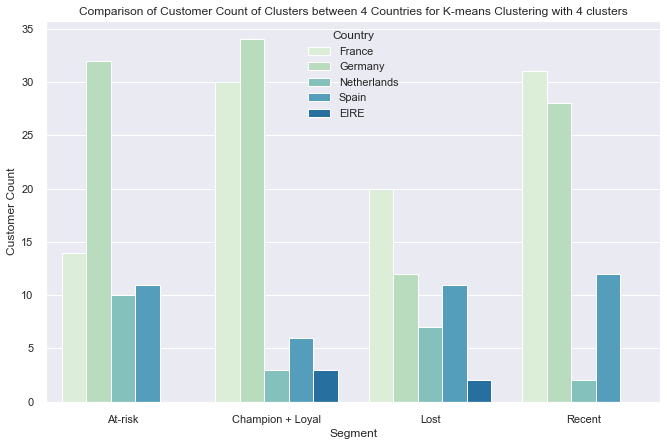

In [235]:
plt.figure(figsize=(11, 7))
sns.barplot(data=compare_df, x='Segment', y='Customer Count', hue='Country', palette='GnBu')
plt.title("Comparison of Customer Count of Clusters between 4 Countries for K-means Clustering with 4 clusters")
plt.show()

Percentage Comparison

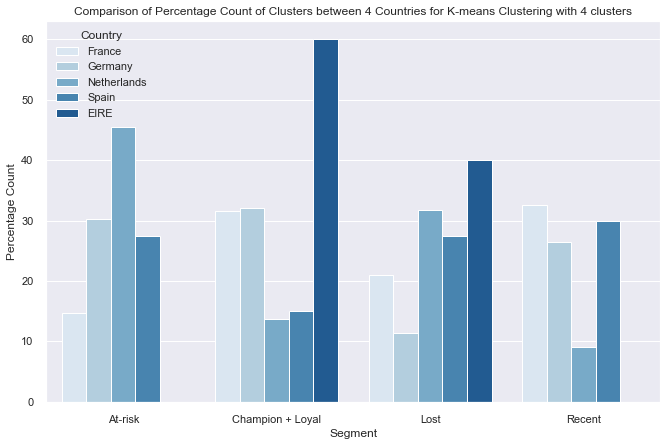

In [236]:
plt.figure(figsize=(11, 7))
sns.barplot(data=compare_df, x='Segment', y='Percentage Count', hue='Country', palette='Blues')
plt.title("Comparison of Percentage Count of Clusters between 4 Countries for K-means Clustering with 4 clusters")
plt.show()

#### For hierarchical clustering with 3 clusters

In [237]:
compare_df = customers_labelled.groupby(['h3_segment', 'Country']).size().reset_index().rename(
    columns={0: 'Customer Count', 'h3_segment': 'Segment'}
)
compare_df['Percentage Count'] = compare_df.groupby('Country')['Customer Count'].apply(lambda x: round(x/x.sum()*100, 2))

compare_df

Segment      Country  Customer Count  Percentage Count
0   Champion + Loyal         EIRE               3             60.00
1   Champion + Loyal       France              35             36.84
2   Champion + Loyal      Germany              51             48.11
3   Champion + Loyal  Netherlands               5             22.73
4   Champion + Loyal        Spain               9             22.50
5               Lost         EIRE               2             40.00
6               Lost       France              41             43.16
7               Lost      Germany              34             32.08
8               Lost  Netherlands              15             68.18
9               Lost        Spain              22             55.00
10            Recent       France              19             20.00
11            Recent      Germany              21             19.81
12            Recent  Netherlands               2              9.09
13            Recent        Spain               9             22.50

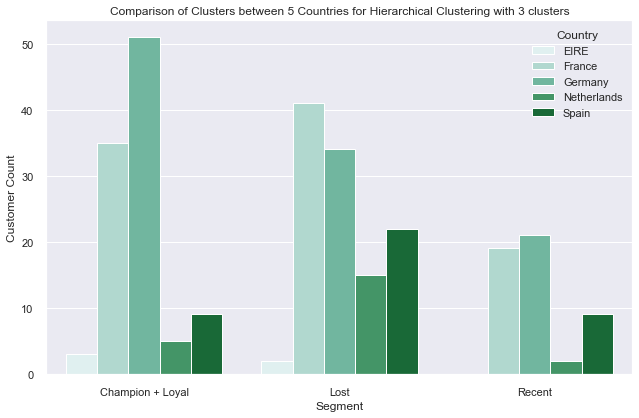

In [238]:
plt.figure(figsize=(10.5, 6.5))
sns.barplot(data=compare_df, x='Segment', y='Customer Count', hue='Country', palette='BuGn')
plt.title("Comparison of Clusters between 5 Countries for Hierarchical Clustering with 3 clusters")
plt.show()

Percentage Comparison

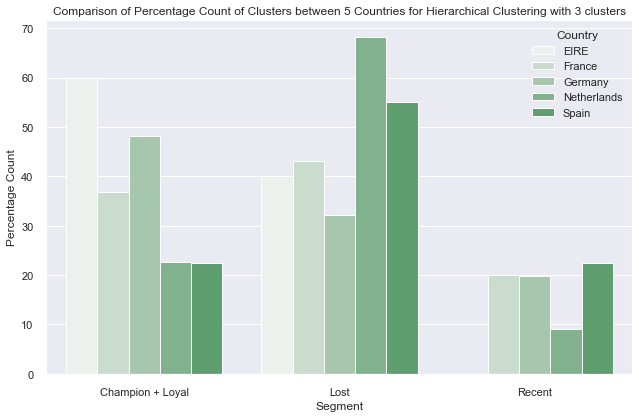

In [239]:
plt.figure(figsize=(10.5, 6.5))
sns.barplot(data=compare_df, x='Segment', y='Percentage Count', hue='Country', palette='light:g')
plt.title("Comparison of Percentage Count of Clusters between 5 Countries for Hierarchical Clustering with 3 clusters")
plt.show()

#### For hierarchical clustering with 4 clusters

In [240]:
compare_df = customers_labelled.groupby(['h4_segment', 'Country']).size().reset_index().rename(
    columns={0: 'Customer Count', 'h4_segment': 'Segment'}
)
compare_df['Percentage Count'] = compare_df.groupby('Country')['Customer Count'].apply(lambda x: round(x/x.sum()*100, 2))

compare_df

Segment      Country  Customer Count  Percentage Count
0            At-risk       France              25             26.32
1            At-risk      Germany              25             23.58
2            At-risk  Netherlands              13             59.09
3            At-risk        Spain              14             35.00
4   Champion + Loyal         EIRE               3             60.00
5   Champion + Loyal       France              35             36.84
6   Champion + Loyal      Germany              51             48.11
7   Champion + Loyal  Netherlands               5             22.73
8   Champion + Loyal        Spain               9             22.50
9               Lost         EIRE               2             40.00
10              Lost       France              16             16.84
11              Lost      Germany               9              8.49
12              Lost  Netherlands               2              9.09
13              Lost        Spain               8             20.00
14            Recent       France              19             20.00
15            Recent      Germany              21             19.81
16            Recent  Netherlands               2              9.09
17            Recent        Spain               9             22.50

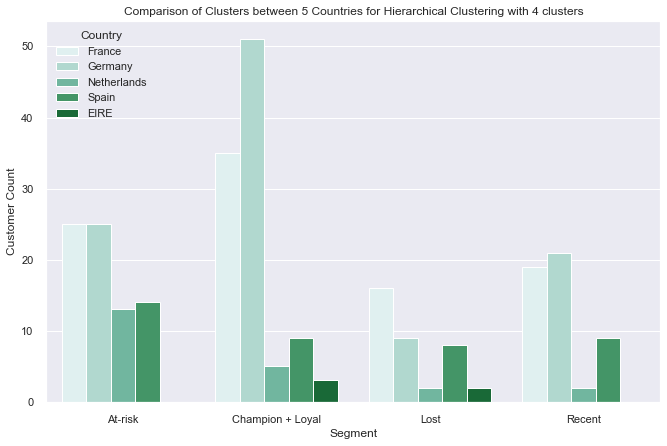

In [241]:
plt.figure(figsize=(11, 7))
sns.barplot(data=compare_df, x='Segment', y='Customer Count', hue='Country', palette='BuGn')
plt.title("Comparison of Clusters between 5 Countries for Hierarchical Clustering with 4 clusters")
plt.show()

Percentage Comparison

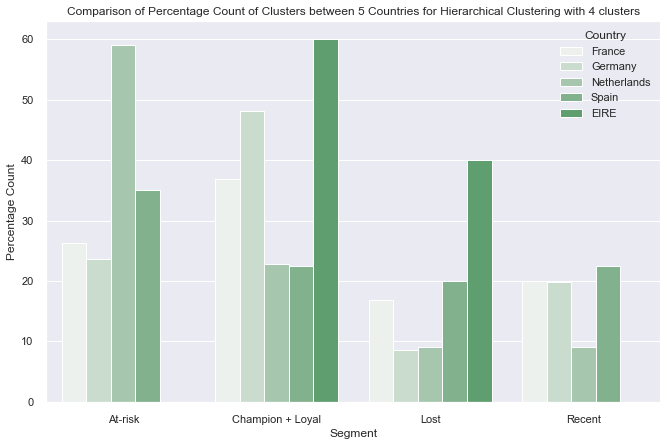

In [242]:
plt.figure(figsize=(11, 7))
sns.barplot(data=compare_df, x='Segment', y='Percentage Count', hue='Country', palette='light:g')
plt.title("Comparison of Percentage Count of Clusters between 5 Countries for Hierarchical Clustering with 4 clusters")
plt.show()

# Part 2: A-Priori for Association Rules Mining

## 1st experiment: Segments from K-means clustering

Perhaps, we will only try on 4 clusters, since it is more comparable compared to 3 clusters as the cluster type are the same for hierarchical as well. It also allows us to perform more in depth analysis since we have more clusters to make distinct observations.

### Basket 1: Champion + Loyal basket

Label the dataframe with customer segments based on customer id first, important step.

In [243]:
cluster_dict = customers_labelled['k4_segment'].to_dict()
cluster_dict

{12354.0: 'At-risk',
 12413.0: 'Recent',
 12417.0: 'At-risk',
 12419.0: 'Lost',
 12421.0: 'Recent',
 12426.0: 'At-risk',
 12427.0: 'Recent',
 12437.0: 'Champion + Loyal',
 12441.0: 'Lost',
 12442.0: 'Recent',
 12445.0: 'Recent',
 12448.0: 'Recent',
 12450.0: 'At-risk',
 12454.0: 'At-risk',
 12455.0: 'Recent',
 12459.0: 'Lost',
 12462.0: 'Recent',
 12466.0: 'Lost',
 12468.0: 'At-risk',
 12471.0: 'Champion + Loyal',
 12472.0: 'Champion + Loyal',
 12473.0: 'Champion + Loyal',
 12474.0: 'Champion + Loyal',
 12475.0: 'Recent',
 12476.0: 'Champion + Loyal',
 12477.0: 'Champion + Loyal',
 12479.0: 'Recent',
 12480.0: 'Champion + Loyal',
 12481.0: 'Champion + Loyal',
 12484.0: 'Champion + Loyal',
 12488.0: 'Recent',
 12489.0: 'Lost',
 12490.0: 'Champion + Loyal',
 12491.0: 'Recent',
 12492.0: 'Recent',
 12493.0: 'Lost',
 12494.0: 'Recent',
 12496.0: 'Lost',
 12497.0: 'At-risk',
 12498.0: 'Recent',
 12499.0: 'Lost',
 12500.0: 'Champion + Loyal',
 12501.0: 'At-risk',
 12502.0: 'At-risk',
 12503.

In [244]:
len(cluster_dict)

268

In [245]:
df_apriori = df7.copy()
df_apriori['Segment'] = df_apriori['CustomerID'].apply(lambda x: cluster_dict[x])

#### Prepare the dataset into basket format

In [246]:
len(df_apriori[df_apriori['Segment'] == 'Champion + Loyal'])

44672

In [247]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'Champion + Loyal'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  10 colour spaceboy pen  12 coloured party balloons  \
Bill                                                          
489439                        0                           0   
489520                        0                           0   
489546                        0                           0   
489550                        0                           0   
489557                        0                           0   
...                         ...                         ...   
581266                        0                           0   
581279                        0                           0   
581433                        0                           0   
581494                        0                           0   
581570                        0                           0   

Product  12 daisy pegs in wood box  12 egg house painted wood  \
Bill                                                            
489439                           0                          0   
489520                           0                          4   
489546                           0                          0   
489550                           0                          0   
489557                           0                          0   
...                            ...                        ...   
581266                           0                          0   
581279                           0                          0   
581433                           0                          0   
581494                           0                          0   
581570                           0                          0   

Product  12 ivory rose peg place settings  12 message cards with envelopes  \
Bill                                                                         
489439                                  0                                0   
489520                                  0                                0   
489546                                  0                                0   
489550                                  0                                0   
489557                                  0                                0   
...                                   ...                              ...   
581266                                  0                                0   
581279                                  0                                0   
581433                                  0                                0   
581494                                  0                                0   
581570                                  0                                0   

Product  12 mini toadstool pegs  12 pencil small tube woodland  \
Bill                                                             
489439                        0                              0   
489520                        0                              0   
489546                        0                              0   
489550                        0                              0   
489557                        0                              0   
...                         ...                            ...   
581266                        0                              0   
581279                        0                              0   
581433                        0                              0   
581494                        0                              0   
581570                        0                              0   

Product  12 pencils small tube posy  12 pencils small tube red retrospot  ...  \
Bill                                                                      ...   
489439                            0                                    0  ...   
489520                            0                                    0  ...   
489546                            0                                    0  ...   
489550                            0                    

In [248]:
# Check correctness
basket['Alarm clock bakelike red'].head(10)

Bill
489439    0
489520    0
489546    0
489550    0
489557    0
489883    0
489889    0
489890    0
490127    0
490139    0
Name: Alarm clock bakelike red, dtype: int64

In [249]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [250]:
basket_champion_k = basket.astype('int16').applymap(convert_into_binary)

In [251]:
# Check correctness after applying custom function
basket_champion_k['Alarm clock bakelike red'].head(10)

Bill
489439    0
489520    0
489546    0
489550    0
489557    0
489883    0
489889    0
489890    0
490127    0
490139    0
Name: Alarm clock bakelike red, dtype: int64

In [252]:
basket_champion_k.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 3399 entries, 489439 to 581570
Columns: 3302 entries, 10 colour spaceboy pen to Zinc wire sweetheart letter tray
dtypes: int32(3302)
memory usage: 42.8+ MB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [253]:
frequent_itemsets_kchamp = apriori(basket_champion_k, min_support=0.02, use_colnames=True)
frequent_itemsets_kchamp

support                                           itemsets
0    0.025007                      (4 traditional spinning tops)
1    0.036481                           (6 ribbons rustic charm)
2    0.030597                      (60 teatime fairy cake cases)
3    0.021771                   (72 sweetheart fairy cake cases)
4    0.027361                        (Alarm clock bakelike pink)
..        ...                                                ...
103  0.056781                           (Woodland charlotte bag)
104  0.025596                  (Woodland design cotton tote bag)
105  0.023242                 (Woodland party bag + sticker set)
106  0.022360  (Plasters in tin woodland animals, Plasters in...
107  0.026184  (Round snack boxes set of 4 fruits, Round snac...

[108 rows x 2 columns]

In [254]:
rules_kchamp = association_rules(frequent_itemsets_kchamp, metric="lift", min_threshold=1)
rules_kchamp.head()

antecedents                           consequents  \
0    (Plasters in tin woodland animals)       (Plasters in tin circus parade)   
1       (Plasters in tin circus parade)    (Plasters in tin woodland animals)   
2   (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   
3  (Round snack boxes set of4 woodland)   (Round snack boxes set of 4 fruits)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.060018            0.064431  0.022360    0.372549  5.782165   
1            0.064431            0.060018  0.022360    0.347032  5.782165   
2            0.061783            0.088555  0.026184    0.423810  4.785809   
3            0.088555            0.061783  0.026184    0.295681  4.785809   

   leverage  conviction  
0  0.018493    1.491064  
1  0.018493    1.439553  
2  0.020713    1.581846  
3  0.020713    1.332091

In [255]:
rules_kchamp.shape

(4, 9)

In [256]:
# as based business use case we can sort based on confidance and lift.
rules_kchamp[(rules_kchamp['lift'] >= 4) & (rules_kchamp['confidence'] >= 0.4)]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.061783            0.088555  0.026184     0.42381  4.785809   

   leverage  conviction  
2  0.020713    1.581846

In [257]:
filtered_rules_kchamp = rules_kchamp[(rules_kchamp['lift'] >= 4) & (rules_kchamp['confidence'] >= 0.4)]
filtered_rules_kchamp

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.061783            0.088555  0.026184     0.42381  4.785809   

   leverage  conviction  
2  0.020713    1.581846

Association rules for L2 itemsets

In [258]:
filtered_rules_kchamp[(filtered_rules_kchamp['antecedents'].map(len) == 1) & (filtered_rules_kchamp['consequents'].map(len) == 1)]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.061783            0.088555  0.026184     0.42381  4.785809   

   leverage  conviction  
2  0.020713    1.581846

In [259]:
len(filtered_rules_kchamp[(filtered_rules_kchamp['antecedents'].map(len) == 1) & (filtered_rules_kchamp['consequents'].map(len) == 1)])

1

Association rules for L3 itemsets

In [260]:
filtered_rules_kchamp[(filtered_rules_kchamp['antecedents'].map(len) == 2) & (filtered_rules_kchamp['consequents'].map(len) == 1)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [261]:
len(filtered_rules_kchamp[(filtered_rules_kchamp['antecedents'].map(len) == 2) & (filtered_rules_kchamp['consequents'].map(len) == 1)])

0

In [262]:
for item in frequent_itemsets_kchamp['itemsets']:
    print(item)

frozenset({'4 traditional spinning tops'})
frozenset({'6 ribbons rustic charm'})
frozenset({'60 teatime fairy cake cases'})
frozenset({'72 sweetheart fairy cake cases'})
frozenset({'Alarm clock bakelike pink'})
frozenset({'Alarm clock bakelike red'})
frozenset({'Assorted colour bird ornament'})
frozenset({'Assorted colour mini cases'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Big doughnut fridge magnets'})
frozenset({'Blue 3 piece mini dots cutlery set'})
frozenset({'Blue harmonica in box'})
frozenset({'Blue polkadot cup'})
frozenset({'Charlotte bag pink polkadot'})
frozenset({'Charlotte bag suki design'})
frozenset({'Childrens apron spaceboy design'})
frozenset({'Childs breakfast set circus parade'})
frozenset({'Circus parade lunch box'})
frozenset({'Clothes pegs retrospot pack 24'})
frozenset({'Coffee mug apples design'})
frozenset({'Dolly girl lunch box'})
frozenset({'Doormat red retrospot'})
frozenset({'Edwardian parasol black'})
frozenset({'Edwardian parasol natural

#### Generate L1 and L2 table from support

L1 table

In [263]:
# L1 frequent itemsets
frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                              itemsets
84  0.088555  (Round snack boxes set of4 woodland)
78  0.086496            (Regency cakestand 3 tier)
54  0.067667     (Pack of 72 retrospot cake cases)
77  0.065902       (Red toadstool led night light)
59  0.064431       (Plasters in tin circus parade)
..       ...                                   ...
50  0.020594      (Pack of 60 dinosaur cake cases)
23  0.020300           (Edwardian parasol natural)
88  0.020300  (Set/10 pink polkadot party candles)
64  0.020006     (Recipe box pantry yellow design)
49  0.020006           (Pack of 6 birdy gift tags)

[106 rows x 2 columns]

In [264]:
frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                              itemsets
84   0.088555  (Round snack boxes set of4 woodland)
78   0.086496            (Regency cakestand 3 tier)
54   0.067667     (Pack of 72 retrospot cake cases)
77   0.065902       (Red toadstool led night light)
59   0.064431       (Plasters in tin circus parade)
83   0.061783   (Round snack boxes set of 4 fruits)
62   0.060018    (Plasters in tin woodland animals)
97   0.058252                  (Spaceboy lunch box)
103  0.056781              (Woodland charlotte bag)
43   0.056193    (Lunch box with cutlery retrospot)

L2 table

In [265]:
# L2 frequent itemsets
frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

support                                           itemsets
107  0.026184  (Round snack boxes set of 4 fruits, Round snac...
106  0.022360  (Plasters in tin woodland animals, Plasters in...

In [266]:
len(frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

2

### Basket 2: At-risk basket

#### Prepare the dataset into basket format

In [267]:
len(df_apriori[df_apriori['Segment'] == 'At-risk'])

4850

In [268]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'At-risk'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  10 colour spaceboy pen  12 ass zinc christmas decorations  \
Bill                                                                 
489526                        0                                  0   
490295                        0                                  0   
492816                        0                                  0   
493876                        0                                  0   
494042                        0                                  0   
...                         ...                                ...   
568179                        0                                  0   
568953                        0                                  0   
569001                        0                                  0   
569122                        0                                  0   
571255                        0                                  0   

Product  12 coloured party balloons  12 ivory rose peg place settings  \
Bill                                                                    
489526                            0                                 0   
490295                            0                                 0   
492816                            0                                 0   
493876                            0                                 0   
494042                            0                                 0   
...                             ...                               ...   
568179                            0                                 0   
568953                            0                                 0   
569001                            0                                 0   
569122                            0                                 0   
571255                            0                                 0   

Product  12 message cards with envelopes  12 pencil small tube woodland  \
Bill                                                                      
489526                                 0                              0   
490295                                 0                              0   
492816                                 0                              0   
493876                                 0                              0   
494042                                 0                              0   
...                                  ...                            ...   
568179                                 0                              0   
568953                                 0                              0   
569001                                 0                              0   
569122                                 0                              0   
571255                                 0                              0   

Product  12 pencils small tube red retrospot  12 pencils small tube skull  \
Bill                                                                        
489526                                     0                            0   
490295                                     0                            0   
492816                                     0                            0   
493876                                     0                            0   
494042                                     0                            0   
...                                      ...                          ...   
568179                                     0                            0   
568953                                     0                            0   
569001                                     0                            0   
569122                                     0                            0   
571255                                     0                            0   

Product  12 pencils tall tube posy  12 pencils tall tube red retrospot  ...  \
Bill                                                                    ...   
489

In [269]:
# Check correctness
basket['Alarm clock bakelike red'].head(10)

Bill
489526    0
490295    0
492816    0
493876    0
494042    0
494045    0
494214    0
494268    0
494442    0
494611    0
Name: Alarm clock bakelike red, dtype: int64

In [270]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [271]:
basket_risk_k = basket.astype('int16').applymap(convert_into_binary)

In [272]:
# Check correctness after applying custom function
basket_risk_k['Alarm clock bakelike red'].head(10)

Bill
489526    0
490295    0
492816    0
493876    0
494042    0
494045    0
494214    0
494268    0
494442    0
494611    0
Name: Alarm clock bakelike red, dtype: int64

In [273]:
basket_risk_k.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 489526 to 571255
Columns: 1539 entries, 10 colour spaceboy pen to Zinc willie winkie candle stick
dtypes: int32(1539)
memory usage: 2.6+ MB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [274]:
frequent_itemsets_krisk = apriori(basket_risk_k, min_support=0.02, use_colnames=True)
frequent_itemsets_krisk

support                                           itemsets
0    0.020690                    (12 pencils tall tube woodland)
1    0.022989                           (6 ribbons rustic charm)
2    0.022989                  (60 cake cases dolly girl design)
3    0.020690                    (Assorted colour bird ornament)
4    0.022989                       (Assorted colour mini cases)
..        ...                                                ...
118  0.025287  (Round snack boxes set of4 woodland, Plasters ...
119  0.027586  (Red retrospot charlotte bag, Woodland charlot...
120  0.020690  (Red toadstool led night light, Round snack bo...
121  0.036782  (Round snack boxes set of 4 fruits, Round snac...
122  0.020690  (Set/6 red spotty paper plates, Set/6 red spot...

[123 rows x 2 columns]

In [275]:
rules_krisk = association_rules(frequent_itemsets_krisk, metric="lift", min_threshold=1)
rules_krisk.head()

antecedents                         consequents  \
0                 (Red spotty cup)                 (Blue polkadot cup)   
1              (Blue polkadot cup)                    (Red spotty cup)   
2      (Plasters in tin strongman)     (Plasters in tin circus parade)   
3  (Plasters in tin circus parade)         (Plasters in tin strongman)   
4      (Plasters in tin strongman)  (Plasters in tin woodland animals)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.045977            0.029885  0.020690    0.450000  15.057692   
1            0.029885            0.045977  0.020690    0.692308  15.057692   
2            0.055172            0.050575  0.020690    0.375000   7.414773   
3            0.050575            0.055172  0.020690    0.409091   7.414773   
4            0.055172            0.080460  0.022989    0.416667   5.178571   

   leverage  conviction  
0  0.019316    1.763845  
1  0.019316    3.100575  
2  0.017899    1.519080  
3  0.017899    1.598939  
4  0.018549    1.576355

In [276]:
rules_krisk.shape

(16, 9)

In [277]:
# as based business use case we can sort based on confidance and lift.
rules_krisk[(rules_krisk['lift'] >= 4) & (rules_krisk['confidence'] >= 0.4)]

antecedents                         consequents  \
0                  (Red spotty cup)                 (Blue polkadot cup)   
1               (Blue polkadot cup)                    (Red spotty cup)   
3   (Plasters in tin circus parade)         (Plasters in tin strongman)   
4       (Plasters in tin strongman)  (Plasters in tin woodland animals)   
8     (Red retrospot charlotte bag)            (Woodland charlotte bag)   
14  (Set/6 red spotty paper plates)       (Set/6 red spotty paper cups)   
15    (Set/6 red spotty paper cups)     (Set/6 red spotty paper plates)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.045977            0.029885  0.020690    0.450000  15.057692   
1             0.029885            0.045977  0.020690    0.692308  15.057692   
3             0.050575            0.055172  0.020690    0.409091   7.414773   
4             0.055172            0.080460  0.022989    0.416667   5.178571   
8             0.045977            0.075862  0.027586    0.600000   7.909091   
14            0.027586            0.027586  0.020690    0.750000  27.187500   
15            0.027586            0.027586  0.020690    0.750000  27.187500   

    leverage  conviction  
0   0.019316    1.763845  
1   0.019316    3.100575  
3   0.017899    1.598939  
4   0.018549    1.576355  
8   0.024098    2.310345  
14  0.019929    3.889655  
15  0.019929    3.889655

In [278]:
filtered_rules_krisk = rules_krisk[(rules_krisk['lift'] >= 4) & (rules_krisk['confidence'] >= 0.4)]
filtered_rules_krisk

antecedents                         consequents  \
0                  (Red spotty cup)                 (Blue polkadot cup)   
1               (Blue polkadot cup)                    (Red spotty cup)   
3   (Plasters in tin circus parade)         (Plasters in tin strongman)   
4       (Plasters in tin strongman)  (Plasters in tin woodland animals)   
8     (Red retrospot charlotte bag)            (Woodland charlotte bag)   
14  (Set/6 red spotty paper plates)       (Set/6 red spotty paper cups)   
15    (Set/6 red spotty paper cups)     (Set/6 red spotty paper plates)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.045977            0.029885  0.020690    0.450000  15.057692   
1             0.029885            0.045977  0.020690    0.692308  15.057692   
3             0.050575            0.055172  0.020690    0.409091   7.414773   
4             0.055172            0.080460  0.022989    0.416667   5.178571   
8             0.045977            0.075862  0.027586    0.600000   7.909091   
14            0.027586            0.027586  0.020690    0.750000  27.187500   
15            0.027586            0.027586  0.020690    0.750000  27.187500   

    leverage  conviction  
0   0.019316    1.763845  
1   0.019316    3.100575  
3   0.017899    1.598939  
4   0.018549    1.576355  
8   0.024098    2.310345  
14  0.019929    3.889655  
15  0.019929    3.889655

Association rules for L2 itemsets

In [279]:
filtered_rules_krisk[(filtered_rules_krisk['antecedents'].map(len) == 1) & (filtered_rules_krisk['consequents'].map(len) == 1)]

antecedents                         consequents  \
0                  (Red spotty cup)                 (Blue polkadot cup)   
1               (Blue polkadot cup)                    (Red spotty cup)   
3   (Plasters in tin circus parade)         (Plasters in tin strongman)   
4       (Plasters in tin strongman)  (Plasters in tin woodland animals)   
8     (Red retrospot charlotte bag)            (Woodland charlotte bag)   
14  (Set/6 red spotty paper plates)       (Set/6 red spotty paper cups)   
15    (Set/6 red spotty paper cups)     (Set/6 red spotty paper plates)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.045977            0.029885  0.020690    0.450000  15.057692   
1             0.029885            0.045977  0.020690    0.692308  15.057692   
3             0.050575            0.055172  0.020690    0.409091   7.414773   
4             0.055172            0.080460  0.022989    0.416667   5.178571   
8             0.045977            0.075862  0.027586    0.600000   7.909091   
14            0.027586            0.027586  0.020690    0.750000  27.187500   
15            0.027586            0.027586  0.020690    0.750000  27.187500   

    leverage  conviction  
0   0.019316    1.763845  
1   0.019316    3.100575  
3   0.017899    1.598939  
4   0.018549    1.576355  
8   0.024098    2.310345  
14  0.019929    3.889655  
15  0.019929    3.889655

In [280]:
len(filtered_rules_krisk[(filtered_rules_krisk['antecedents'].map(len) == 1) & (filtered_rules_krisk['consequents'].map(len) == 1)])

7

Association rules for L3 itemsets

In [281]:
filtered_rules_krisk[(filtered_rules_krisk['antecedents'].map(len) == 2) & (filtered_rules_krisk['consequents'].map(len) == 1)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [282]:
len(filtered_rules_krisk[(filtered_rules_krisk['antecedents'].map(len) == 2) & (filtered_rules_krisk['consequents'].map(len) == 1)])

0

In [283]:
filtered_rules_krisk[(filtered_rules_krisk['antecedents'].map(len) == 1) & (filtered_rules_krisk['consequents'].map(len) == 2)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [284]:
len(filtered_rules_krisk[(filtered_rules_krisk['antecedents'].map(len) == 1) & (filtered_rules_krisk['consequents'].map(len) == 2)])

0

In [285]:
for item in frequent_itemsets_krisk['itemsets']:
    print(item)

frozenset({'12 pencils tall tube woodland'})
frozenset({'6 ribbons rustic charm'})
frozenset({'60 cake cases dolly girl design'})
frozenset({'Assorted colour bird ornament'})
frozenset({'Assorted colour mini cases'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Baking set spaceboy design'})
frozenset({'Blue 3 piece mini dots cutlery set'})
frozenset({'Blue happy birthday bunting'})
frozenset({'Blue polkadot cup'})
frozenset({'Blue polkadot plate'})
frozenset({'Blue spotty bowl'})
frozenset({'Cake stand 3 tier magic garden'})
frozenset({'Cake stand white two tier lace'})
frozenset({'Charlotte bag dolly girl design'})
frozenset({'Charlotte bag pink polkadot'})
frozenset({'Charlotte bag suki design'})
frozenset({'Childrens apron spaceboy design'})
frozenset({'Childs breakfast set dolly girl'})
frozenset({'Childs breakfast set spaceboy'})
frozenset({'Circus parade lunch box'})
frozenset({'Clothes pegs retrospot pack 24'})
frozenset({'Coffee mug apples design'})
frozenset({'Dolly

#### Generate L1 and L2 table from support

L1 table

In [286]:
# L1 frequent itemsets
frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                              itemsets
84   0.112644  (Round snack boxes set of4 woodland)
83   0.082759   (Round snack boxes set of 4 fruits)
62   0.080460    (Plasters in tin woodland animals)
108  0.075862              (Woodland charlotte bag)
75   0.075862       (Red toadstool led night light)
..        ...                                   ...
87   0.020690  (Set of 72 pink heart paper doilies)
86   0.020690      (Set of 3 cases woodland design)
61   0.020690     (Plasters in tin vintage paisley)
63   0.020690   (Red 3 piece mini dots cutlery set)
0    0.020690       (12 pencils tall tube woodland)

[115 rows x 2 columns]

In [287]:
frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                              itemsets
84   0.112644  (Round snack boxes set of4 woodland)
83   0.082759   (Round snack boxes set of 4 fruits)
62   0.080460    (Plasters in tin woodland animals)
108  0.075862              (Woodland charlotte bag)
75   0.075862       (Red toadstool led night light)
49   0.073563     (Pack of 72 retrospot cake cases)
76   0.057471            (Regency cakestand 3 tier)
60   0.055172           (Plasters in tin strongman)
109  0.050575     (Woodland design cotton tote bag)
58   0.050575       (Plasters in tin circus parade)

L2 table

In [288]:
# L2 frequent itemsets
frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

support                                           itemsets
121  0.036782  (Round snack boxes set of 4 fruits, Round snac...
119  0.027586  (Red retrospot charlotte bag, Woodland charlot...
118  0.025287  (Round snack boxes set of4 woodland, Plasters ...
117  0.022989  (Plasters in tin strongman, Plasters in tin wo...
115  0.020690                (Red spotty cup, Blue polkadot cup)
116  0.020690  (Plasters in tin strongman, Plasters in tin ci...
120  0.020690  (Red toadstool led night light, Round snack bo...
122  0.020690  (Set/6 red spotty paper plates, Set/6 red spot...

In [289]:
len(frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

8

### Basket 3: Recent basket

#### Prepare the dataset into basket format

In [290]:
len(df_apriori[df_apriori['Segment'] == 'Recent'])

2924

In [291]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'Recent'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  10 colour spaceboy pen  12 coloured party balloons  \
Bill                                                          
497798                        0                           0   
505409                        0                           0   
506267                        0                           0   
508062                        0                           0   
513795                        0                           0   
...                         ...                         ...   
580955                        0                           0   
580986                        0                           0   
581574                        0                           0   
581578                        0                           0   
581587                        0                           0   

Product  12 pencil small tube woodland  12 pencils small tube red retrospot  \
Bill                                                                          
497798                               0                                    0   
505409                               0                                    0   
506267                               0                                    0   
508062                               0                                    0   
513795                               0                                    0   
...                                ...                                  ...   
580955                               0                                    0   
580986                               0                                    0   
581574                               0                                    0   
581578                               0                                    0   
581587                               0                                    0   

Product  12 pencils small tube skull  12 pencils tall tube red retrospot  \
Bill                                                                       
497798                             0                                   0   
505409                             0                                   0   
506267                             0                                   0   
508062                             0                                   0   
513795                             0                                   0   
...                              ...                                 ...   
580955                             0                                   0   
580986                             0                                   0   
581574                             0                                   0   
581578                             0                                   0   
581587                             0                                   0   

Product  12 pencils tall tube woodland  15cm christmas glass ball 20 lights  \
Bill                                                                          
497798                               0                                    0   
505409                               0                                    0   
506267                               0                                    0   
508062                               0                                    0   
513795                               0                                    0   
...                                ...                                  ...   
580955                               0                                    0   
580986                               0                                    0   
581574                               0                                    0   
581578                               0                                    0   
581587                               0                                    0   

Product  20 dolly pegs retrospot  200 red + white bendy straws  ...  \
Bill                                                            

In [292]:
# Check correctness
basket['Alarm clock bakelike red'].head(10)

Bill
497798    0
505409    0
506267    0
508062    0
513795    0
513971    0
516735    0
517819    0
519733    0
527234    0
Name: Alarm clock bakelike red, dtype: int64

In [293]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [294]:
basket_recent_k = basket.astype('int16').applymap(convert_into_binary)

In [295]:
# Check correctness after applying custom function
basket_recent_k['Alarm clock bakelike red'].head(10)

Bill
497798    0
505409    0
506267    0
508062    0
513795    0
513971    0
516735    0
517819    0
519733    0
527234    0
Name: Alarm clock bakelike red, dtype: int64

In [296]:
basket_recent_k.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 497798 to 581587
Columns: 1193 entries, 10 colour spaceboy pen to Zinc willie winkie candle stick
dtypes: int32(1193)
memory usage: 1.7+ MB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [297]:
frequent_itemsets_krecent = apriori(basket_recent_k, min_support=0.02, use_colnames=True)
frequent_itemsets_krecent

support                                           itemsets
0   0.027248                    (36 pencils tube red retrospot)
1   0.021798                         (36 pencils tube woodland)
2   0.032698                           (6 ribbons rustic charm)
3   0.021798                      (60 teatime fairy cake cases)
4   0.027248                       (Alarm clock bakelike green)
5   0.021798                        (Alarm clock bakelike pink)
6   0.032698                         (Alarm clock bakelike red)
7   0.027248                       (Assorted colour mini cases)
8   0.057221                     (Baking set 9 piece retrospot)
9   0.029973                  (Childrens apron spaceboy design)
10  0.032698                     (Childrens cutlery dolly girl)
11  0.032698                       (Childrens cutlery spaceboy)
12  0.032698                    (Childs breakfast set spaceboy)
13  0.024523                             (Dolly girl lunch box)
14  0.021798                               (Doormat union flag)
15  0.021798                   (Fairy cake birthday candle set)
16  0.024523                               (Lunch bag woodland)
17  0.029973               (Pack of 60 pink paisley cake cases)
18  0.043597                  (Pack of 72 retrospot cake cases)
19  0.024523                          (Paper bunting retrospot)
20  0.021798                                (Pink owl soft toy)
21  0.035422                    (Plasters in tin circus parade)
22  0.029973                         (Plasters in tin spaceboy)
23  0.027248                        (Plasters in tin strongman)
24  0.046322                 (Plasters in tin woodland animals)
25  0.035422                               (Rabbit night light)
26  0.029973                         (Red retrospot cake stand)
27  0.035422                      (Red retrospot charlotte bag)
28  0.021798                 (Red retrospot childrens umbrella)
29  0.040872                         (Red retrospot mini cases)
30  0.054496                    (Red toadstool led night light)
31  0.046322                         (Regency cakestand 3 tier)
32  0.021798                 (Retrospot heart hot water bottle)
33  0.029973                  (Retrospot tea set ceramic 11 pc)
34  0.024523                (Round snack boxes set of 4 fruits)
35  0.073569               (Round snack boxes set of4 woodland)
36  0.021798                     (Scottie dog hot water bottle)
37  0.021798                  (Set of 4 knick knack tins doily)
38  0.035422               (Set of 6 ribbons vintage christmas)
39  0.021798               (Set/10 blue polkadot party candles)
40  0.029973               (Set/10 pink polkadot party candles)
41  0.024523                (Set/10 red polkadot party candles)
42  0.024523               (Set/20 red retrospot paper napkins)
43  0.035422                      (Set/6 red spotty paper cups)
44  0.032698                    (Set/6 red spotty paper plates)
45  0.024523                           (Spaceboy birthday card)
46  0.027248                               (Spaceboy lunch box)
47  0.049046                   (Strawberry ceramic trinket box)
48  0.024523                (Strawberry lunch box with cutlery)
49  0.024523                              (Toadstool money box)
50  0.043597                           (Woodland charlotte bag)
51  0.029973                   (Woodland height chart stickers)
52  0.024523  (Childrens cutlery dolly girl, Childrens cutle...
53  0.024523  (Set/6 red spotty paper plates, Set/6 red spot...

In [298]:
rules_krecent = association_rules(frequent_itemsets_krecent, metric="lift", min_threshold=1)
rules_krecent.head()

antecedents                      consequents  \
0   (Childrens cutlery dolly girl)     (Childrens cutlery spaceboy)   
1     (Childrens cutlery spaceboy)   (Childrens cutlery dolly girl)   
2  (Set/6 red spotty paper plates)    (Set/6 red spotty paper cups)   
3    (Set/6 red spotty paper cups)  (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.032698            0.032698  0.024523    0.750000  22.937500   
1            0.032698            0.032698  0.024523    0.750000  22.937500   
2            0.032698            0.035422  0.024523    0.750000  21.173077   
3            0.035422            0.032698  0.024523    0.692308  21.173077   

   leverage  conviction  
0  0.023454    3.869210  
1  0.023454    3.869210  
2  0.023365    3.858311  
3  0.023365    3.143733

In [299]:
rules_krecent.shape

(4, 9)

In [300]:
# as based business use case we can sort based on confidance and lift.
rules_krecent[(rules_krecent['lift'] >= 4) & (rules_krecent['confidence'] >= 0.4)]

antecedents                      consequents  \
0   (Childrens cutlery dolly girl)     (Childrens cutlery spaceboy)   
1     (Childrens cutlery spaceboy)   (Childrens cutlery dolly girl)   
2  (Set/6 red spotty paper plates)    (Set/6 red spotty paper cups)   
3    (Set/6 red spotty paper cups)  (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.032698            0.032698  0.024523    0.750000  22.937500   
1            0.032698            0.032698  0.024523    0.750000  22.937500   
2            0.032698            0.035422  0.024523    0.750000  21.173077   
3            0.035422            0.032698  0.024523    0.692308  21.173077   

   leverage  conviction  
0  0.023454    3.869210  
1  0.023454    3.869210  
2  0.023365    3.858311  
3  0.023365    3.143733

In [301]:
filtered_rules_krecent = rules_krecent[(rules_krecent['lift'] >= 4) & (rules_krecent['confidence'] >= 0.4)]
filtered_rules_krecent

antecedents                      consequents  \
0   (Childrens cutlery dolly girl)     (Childrens cutlery spaceboy)   
1     (Childrens cutlery spaceboy)   (Childrens cutlery dolly girl)   
2  (Set/6 red spotty paper plates)    (Set/6 red spotty paper cups)   
3    (Set/6 red spotty paper cups)  (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.032698            0.032698  0.024523    0.750000  22.937500   
1            0.032698            0.032698  0.024523    0.750000  22.937500   
2            0.032698            0.035422  0.024523    0.750000  21.173077   
3            0.035422            0.032698  0.024523    0.692308  21.173077   

   leverage  conviction  
0  0.023454    3.869210  
1  0.023454    3.869210  
2  0.023365    3.858311  
3  0.023365    3.143733

Association rules for L2 itemsets

In [302]:
filtered_rules_krecent[(filtered_rules_krecent['antecedents'].map(len) == 1) & (filtered_rules_krecent['consequents'].map(len) == 1)]

antecedents                      consequents  \
0   (Childrens cutlery dolly girl)     (Childrens cutlery spaceboy)   
1     (Childrens cutlery spaceboy)   (Childrens cutlery dolly girl)   
2  (Set/6 red spotty paper plates)    (Set/6 red spotty paper cups)   
3    (Set/6 red spotty paper cups)  (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.032698            0.032698  0.024523    0.750000  22.937500   
1            0.032698            0.032698  0.024523    0.750000  22.937500   
2            0.032698            0.035422  0.024523    0.750000  21.173077   
3            0.035422            0.032698  0.024523    0.692308  21.173077   

   leverage  conviction  
0  0.023454    3.869210  
1  0.023454    3.869210  
2  0.023365    3.858311  
3  0.023365    3.143733

In [303]:
len(filtered_rules_krecent[(filtered_rules_krecent['antecedents'].map(len) == 1) & (filtered_rules_krecent['consequents'].map(len) == 1)])

4

Association rules for L3 itemsets

In [304]:
filtered_rules_krecent[(filtered_rules_krecent['antecedents'].map(len) == 2) & (filtered_rules_krecent['consequents'].map(len) == 1)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [305]:
len(filtered_rules_krecent[(filtered_rules_krecent['antecedents'].map(len) == 2) & (filtered_rules_krecent['consequents'].map(len) == 1)])

0

In [306]:
filtered_rules_krecent[(filtered_rules_krecent['antecedents'].map(len) == 1) & (filtered_rules_krecent['consequents'].map(len) == 2)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [307]:
len(filtered_rules_krecent[(filtered_rules_krecent['antecedents'].map(len) == 1) & (filtered_rules_krecent['consequents'].map(len) == 2)])

0

In [308]:
for item in frequent_itemsets_krecent['itemsets']:
    print(item)

frozenset({'36 pencils tube red retrospot'})
frozenset({'36 pencils tube woodland'})
frozenset({'6 ribbons rustic charm'})
frozenset({'60 teatime fairy cake cases'})
frozenset({'Alarm clock bakelike green'})
frozenset({'Alarm clock bakelike pink'})
frozenset({'Alarm clock bakelike red'})
frozenset({'Assorted colour mini cases'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Childrens apron spaceboy design'})
frozenset({'Childrens cutlery dolly girl'})
frozenset({'Childrens cutlery spaceboy'})
frozenset({'Childs breakfast set spaceboy'})
frozenset({'Dolly girl lunch box'})
frozenset({'Doormat union flag'})
frozenset({'Fairy cake birthday candle set'})
frozenset({'Lunch bag woodland'})
frozenset({'Pack of 60 pink paisley cake cases'})
frozenset({'Pack of 72 retrospot cake cases'})
frozenset({'Paper bunting retrospot'})
frozenset({'Pink owl soft toy'})
frozenset({'Plasters in tin circus parade'})
frozenset({'Plasters in tin spaceboy'})
frozenset({'Plasters in tin strongman'})
fr

#### Generate L1 and L2 table from support

L1 table

In [309]:
# L1 frequent itemsets
frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                              itemsets
35  0.073569  (Round snack boxes set of4 woodland)
8   0.057221        (Baking set 9 piece retrospot)
30  0.054496       (Red toadstool led night light)
47  0.049046      (Strawberry ceramic trinket box)
24  0.046322    (Plasters in tin woodland animals)
31  0.046322            (Regency cakestand 3 tier)
50  0.043597              (Woodland charlotte bag)
18  0.043597     (Pack of 72 retrospot cake cases)
29  0.040872            (Red retrospot mini cases)
25  0.035422                  (Rabbit night light)
21  0.035422       (Plasters in tin circus parade)
27  0.035422         (Red retrospot charlotte bag)
43  0.035422         (Set/6 red spotty paper cups)
38  0.035422  (Set of 6 ribbons vintage christmas)
11  0.032698          (Childrens cutlery spaceboy)
12  0.032698       (Childs breakfast set spaceboy)
10  0.032698        (Childrens cutlery dolly girl)
6   0.032698            (Alarm clock bakelike red)
44  0.032698       (Set/6 red spotty paper plates)
2   0.032698              (6 ribbons rustic charm)
33  0.029973     (Retrospot tea set ceramic 11 pc)
40  0.029973  (Set/10 pink polkadot party candles)
26  0.029973            (Red retrospot cake stand)
51  0.029973      (Woodland height chart stickers)
22  0.029973            (Plasters in tin spaceboy)
9   0.029973     (Childrens apron spaceboy design)
17  0.029973  (Pack of 60 pink paisley cake cases)
23  0.027248           (Plasters in tin strongman)
4   0.027248          (Alarm clock bakelike green)
46  0.027248                  (Spaceboy lunch box)
7   0.027248          (Assorted colour mini cases)
0   0.027248       (36 pencils tube red retrospot)
42  0.024523  (Set/20 red retrospot paper napkins)
19  0.024523             (Paper bunting retrospot)
49  0.024523                 (Toadstool money box)
48  0.024523   (Strawberry lunch box with cutlery)
45  0.024523              (Spaceboy birthday card)
41  0.024523   (Set/10 red polkadot party candles)
13  0.024523                (Dolly girl lunch box)
16  0.024523                  (Lunch bag woodland)
34  0.024523   (Round snack boxes set of 4 fruits)
39  0.021798  (Set/10 blue polkadot party candles)
37  0.021798     (Set of 4 knick knack tins doily)
15  0.021798      (Fairy cake birthday candle set)
28  0.021798    (Red retrospot childrens umbrella)
5   0.021798           (Alarm clock bakelike pink)
36  0.021798        (Scottie dog hot water bottle)
20  0.021798                   (Pink owl soft toy)
1   0.021798            (36 pencils tube woodland)
14  0.021798                  (Doormat union flag)
3   0.021798         (60 teatime fairy cake cases)
32  0.021798    (Retrospot heart hot water bottle)

In [310]:
frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                              itemsets
35  0.073569  (Round snack boxes set of4 woodland)
8   0.057221        (Baking set 9 piece retrospot)
30  0.054496       (Red toadstool led night light)
47  0.049046      (Strawberry ceramic trinket box)
24  0.046322    (Plasters in tin woodland animals)
31  0.046322            (Regency cakestand 3 tier)
50  0.043597              (Woodland charlotte bag)
18  0.043597     (Pack of 72 retrospot cake cases)
29  0.040872            (Red retrospot mini cases)
25  0.035422                  (Rabbit night light)

L2 table

In [311]:
# L2 frequent itemsets
frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

support                                           itemsets
52  0.024523  (Childrens cutlery dolly girl, Childrens cutle...
53  0.024523  (Set/6 red spotty paper plates, Set/6 red spot...

In [312]:
frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head(10)

support                                           itemsets
52  0.024523  (Childrens cutlery dolly girl, Childrens cutle...
53  0.024523  (Set/6 red spotty paper plates, Set/6 red spot...

In [338]:
len(frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

34

### Basket 4: Lost basket

#### Prepare the dataset into basket format

In [313]:
len(df_apriori[df_apriori['Segment'] == 'Lost'])

669

In [314]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'Lost'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  10 colour spaceboy pen  12 mini toadstool pegs  \
Bill                                                      
494591                        0                       0   
495735                        0                       0   
495736                        0                       0   
495745                        0                       0   
495747                        0                       0   
...                         ...                     ...   
556118                        0                       0   
556526                        0                       0   
558108                        0                       0   
558124                        0                       0   
569665                        0                       0   

Product  12 pencils tall tube red retrospot  3 rose morris boxed candles  \
Bill                                                                       
494591                                    0                            0   
495735                                    0                            0   
495736                                    0                            0   
495745                                    0                            0   
495747                                    0                            0   
...                                     ...                          ...   
556118                                    0                            0   
556526                                    0                            0   
558108                                    0                            0   
558124                                    0                            0   
569665                                    0                            0   

Product  3 white choc morris boxed candles  36 pencils tube red retrospot  \
Bill                                                                        
494591                                   0                              0   
495735                                   0                              0   
495736                                   0                              0   
495745                                   0                              0   
495747                                   0                              0   
...                                    ...                            ...   
556118                                   0                              0   
556526                                   0                              0   
558108                                   0                              0   
558124                                   0                              0   
569665                                   0                              0   

Product  4 traditional spinning tops  4 wildflower botanical candles  \
Bill                                                                   
494591                             0                               0   
495735                             0                               0   
495736                             0                               0   
495745                             0                               0   
495747                             0                               0   
...                              ...                             ...   
556118                             0                               0   
556526                             0                               0   
558108                             0                               0   
558124                             0                               0   
569665                             0                               0   

Product  50cm metal string with 7 clips  6 ribbons elegant christmas  ...  \
Bill                                                                  ...   
494591                                0                            0  ...   
495735                                0                            0  ...

In [315]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [316]:
basket_lost_k = basket.astype('int16').applymap(convert_into_binary)

In [317]:
basket_lost_k.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 494591 to 569665
Columns: 474 entries, 10 colour spaceboy pen to Zinc willie winkie candle stick
dtypes: int32(474)
memory usage: 238.0+ KB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [318]:
frequent_itemsets_klost = apriori(basket_lost_k, min_support=0.02, use_colnames=True)
frequent_itemsets_klost

support                               itemsets
0   0.023438          (60 teatime fairy cake cases)
1   0.046875  (Adjustment by john on 26/01/2010 16)
2   0.023438           (Assorted colour mini cases)
3   0.054688         (Baking set 9 piece retrospot)
4   0.023438                (Cooking set retrospot)
5   0.023438              (Jumbo bag pink polkadot)
6   0.039062              (Jumbo bag red retrospot)
7   0.023438               (Lunch bag apple design)
8   0.023438                  (Lunch bag cars blue)
9   0.031250              (Lunch bag pink polkadot)
10  0.023438              (Lunch bag red retrospot)
11  0.031250            (Lunch bag spaceboy design)
12  0.039062                (Lunch bag suki design)
13  0.023438                   (Lunch bag woodland)
14  0.023438     (Lunch box with cutlery retrospot)
15  0.023438         (Pack of 6 handbag gift boxes)
16  0.023438      (Pack of 72 retrospot cake cases)
17  0.031250              (Paper bunting retrospot)
18  0.023438                        (Party bunting)
19  0.023438           (Party cones candy assorted)
20  0.023438        (Party cones carnival assorted)
21  0.023438                   (Red retrospot bowl)
22  0.031250          (Red retrospot charlotte bag)
23  0.054688             (Red retrospot mini cases)
24  0.023438               (Red spotty biscuit tin)
25  0.031250           (Red spotty round cake tins)
26  0.031250               (Red spotty shopper bag)
27  0.031250        (Red toadstool led night light)
28  0.031250      (Retrospot tea set ceramic 11 pc)
29  0.023438   (Round container set of 5 retrospot)
30  0.046875    (Round snack boxes set of 4 fruits)
31  0.031250   (Round snack boxes set of4 woodland)
32  0.023438   (Set of 72 pink heart paper doilies)
33  0.039062   (Set/20 red retrospot paper napkins)
34  0.031250     (Set/5 red spotty lid glass bowls)
35  0.023438               (Spaceboy birthday card)
36  0.023438       (Strawberry ceramic trinket box)
37  0.023438             (Strawberry charlotte bag)
38  0.023438    (Strawberry lunch box with cutlery)
39  0.023438              (Tea party birthday card)
40  0.023438               (Tea time party bunting)
41  0.023438      (Woodland design cotton tote bag)

In [319]:
rules_klost = association_rules(frequent_itemsets_klost, metric="lift", min_threshold=1)
rules_klost.head()

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [320]:
rules_klost.shape

(0, 9)

In [321]:
# as based business use case we can sort based on confidance and lift.
rules_klost[(rules_klost['lift'] >= 4) & (rules_klost['confidence'] >= 0.4)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [322]:
filtered_rules_klost = rules_klost[(rules_klost['lift'] >= 4) & (rules_klost['confidence'] >= 0.4)]
filtered_rules_klost

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

Unfortunately, no rules can be extracted because we have no C2 itemsets that fulfill support of 0.02.

In [323]:
for item in frequent_itemsets_klost['itemsets']:
    print(item)

frozenset({'60 teatime fairy cake cases'})
frozenset({'Adjustment by john on 26/01/2010 16'})
frozenset({'Assorted colour mini cases'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Cooking set retrospot'})
frozenset({'Jumbo bag pink polkadot'})
frozenset({'Jumbo bag red retrospot'})
frozenset({'Lunch bag apple design'})
frozenset({'Lunch bag cars blue'})
frozenset({'Lunch bag pink polkadot'})
frozenset({'Lunch bag red retrospot'})
frozenset({'Lunch bag spaceboy design'})
frozenset({'Lunch bag suki design'})
frozenset({'Lunch bag woodland'})
frozenset({'Lunch box with cutlery retrospot'})
frozenset({'Pack of 6 handbag gift boxes'})
frozenset({'Pack of 72 retrospot cake cases'})
frozenset({'Paper bunting retrospot'})
frozenset({'Party bunting'})
frozenset({'Party cones candy assorted'})
frozenset({'Party cones carnival assorted'})
frozenset({'Red retrospot bowl'})
frozenset({'Red retrospot charlotte bag'})
frozenset({'Red retrospot mini cases'})
frozenset({'Red spotty biscuit 

#### Generate L1 and L2 table from support

L1 table

In [324]:
# L1 frequent itemsets
frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                               itemsets
3   0.054688         (Baking set 9 piece retrospot)
23  0.054688             (Red retrospot mini cases)
1   0.046875  (Adjustment by john on 26/01/2010 16)
30  0.046875    (Round snack boxes set of 4 fruits)
33  0.039062   (Set/20 red retrospot paper napkins)
6   0.039062              (Jumbo bag red retrospot)
12  0.039062                (Lunch bag suki design)
34  0.031250     (Set/5 red spotty lid glass bowls)
27  0.031250        (Red toadstool led night light)
22  0.031250          (Red retrospot charlotte bag)
28  0.031250      (Retrospot tea set ceramic 11 pc)
17  0.031250              (Paper bunting retrospot)
31  0.031250   (Round snack boxes set of4 woodland)
25  0.031250           (Red spotty round cake tins)
26  0.031250               (Red spotty shopper bag)
11  0.031250            (Lunch bag spaceboy design)
9   0.031250              (Lunch bag pink polkadot)
32  0.023438   (Set of 72 pink heart paper doilies)
35  0.023438               (Spaceboy birthday card)
29  0.023438   (Round container set of 5 retrospot)
36  0.023438       (Strawberry ceramic trinket box)
37  0.023438             (Strawberry charlotte bag)
38  0.023438    (Strawberry lunch box with cutlery)
39  0.023438              (Tea party birthday card)
40  0.023438               (Tea time party bunting)
0   0.023438          (60 teatime fairy cake cases)
21  0.023438                   (Red retrospot bowl)
24  0.023438               (Red spotty biscuit tin)
20  0.023438        (Party cones carnival assorted)
19  0.023438           (Party cones candy assorted)
18  0.023438                        (Party bunting)
16  0.023438      (Pack of 72 retrospot cake cases)
15  0.023438         (Pack of 6 handbag gift boxes)
14  0.023438     (Lunch box with cutlery retrospot)
13  0.023438                   (Lunch bag woodland)
10  0.023438              (Lunch bag red retrospot)
8   0.023438                  (Lunch bag cars blue)
7   0.023438               (Lunch bag apple design)
5   0.023438              (Jumbo bag pink polkadot)
4   0.023438                (Cooking set retrospot)
2   0.023438           (Assorted colour mini cases)
41  0.023438      (Woodland design cotton tote bag)

In [325]:
frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                               itemsets
3   0.054688         (Baking set 9 piece retrospot)
23  0.054688             (Red retrospot mini cases)
1   0.046875  (Adjustment by john on 26/01/2010 16)
30  0.046875    (Round snack boxes set of 4 fruits)
33  0.039062   (Set/20 red retrospot paper napkins)
6   0.039062              (Jumbo bag red retrospot)
12  0.039062                (Lunch bag suki design)
34  0.031250     (Set/5 red spotty lid glass bowls)
27  0.031250        (Red toadstool led night light)
22  0.031250          (Red retrospot charlotte bag)

In [326]:
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False))

42

L2 table

In [327]:
# L2 frequent itemsets
frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

Empty DataFrame
Columns: [support, itemsets]
Index: []

In [328]:
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

0

## 2nd experiment: Segments from Hierarchical clustering

Perhaps, we will only try on 4 clusters, since it is more comparable compared to 3 clusters as the cluster type are the same for hierarchical as well. It also allows us to perform more in depth analysis since we have more clusters to make distinct observations.

### Basket 5: Champion + Loyal basket

Label the dataframe with customer segments based on customer id first, important step.

In [329]:
cluster_dict = customers_labelled['h4_segment'].to_dict()
cluster_dict

{12354.0: 'At-risk',
 12413.0: 'At-risk',
 12417.0: 'At-risk',
 12419.0: 'At-risk',
 12421.0: 'Recent',
 12426.0: 'At-risk',
 12427.0: 'Recent',
 12437.0: 'Champion + Loyal',
 12441.0: 'Lost',
 12442.0: 'Recent',
 12445.0: 'Recent',
 12448.0: 'Recent',
 12450.0: 'At-risk',
 12454.0: 'Champion + Loyal',
 12455.0: 'At-risk',
 12459.0: 'At-risk',
 12462.0: 'Recent',
 12466.0: 'Lost',
 12468.0: 'Champion + Loyal',
 12471.0: 'Champion + Loyal',
 12472.0: 'Champion + Loyal',
 12473.0: 'Champion + Loyal',
 12474.0: 'Champion + Loyal',
 12475.0: 'At-risk',
 12476.0: 'Champion + Loyal',
 12477.0: 'Champion + Loyal',
 12479.0: 'Recent',
 12480.0: 'Champion + Loyal',
 12481.0: 'Champion + Loyal',
 12484.0: 'Champion + Loyal',
 12488.0: 'Recent',
 12489.0: 'Lost',
 12490.0: 'Champion + Loyal',
 12491.0: 'Recent',
 12492.0: 'At-risk',
 12493.0: 'Lost',
 12494.0: 'Champion + Loyal',
 12496.0: 'Lost',
 12497.0: 'Champion + Loyal',
 12498.0: 'Recent',
 12499.0: 'At-risk',
 12500.0: 'Champion + Loyal',

In [330]:
len(cluster_dict)

268

In [331]:
df_apriori = df7.copy()
df_apriori['Segment'] = df_apriori['CustomerID'].apply(lambda x: cluster_dict[x])

#### Prepare the dataset into basket format

In [332]:
len(df_apriori[df_apriori['Segment'] == 'Champion + Loyal'])

47620

In [333]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'Champion + Loyal'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  10 colour spaceboy pen  12 coloured party balloons  \
Bill                                                          
489439                        0                           0   
489520                        0                           0   
489546                        0                           0   
489550                        0                           0   
489557                        0                           0   
...                         ...                         ...   
581266                        0                           0   
581279                        0                           0   
581433                        0                           0   
581494                        0                           0   
581570                        0                           0   

Product  12 daisy pegs in wood box  12 egg house painted wood  \
Bill                                                            
489439                           0                          0   
489520                           0                          4   
489546                           0                          0   
489550                           0                          0   
489557                           0                          0   
...                            ...                        ...   
581266                           0                          0   
581279                           0                          0   
581433                           0                          0   
581494                           0                          0   
581570                           0                          0   

Product  12 ivory rose peg place settings  12 message cards with envelopes  \
Bill                                                                         
489439                                  0                                0   
489520                                  0                                0   
489546                                  0                                0   
489550                                  0                                0   
489557                                  0                                0   
...                                   ...                              ...   
581266                                  0                                0   
581279                                  0                                0   
581433                                  0                                0   
581494                                  0                                0   
581570                                  0                                0   

Product  12 mini toadstool pegs  12 pencil small tube woodland  \
Bill                                                             
489439                        0                              0   
489520                        0                              0   
489546                        0                              0   
489550                        0                              0   
489557                        0                              0   
...                         ...                            ...   
581266                        0                              0   
581279                        0                              0   
581433                        0                              0   
581494                        0                              0   
581570                        0                              0   

Product  12 pencils small tube posy  12 pencils small tube red retrospot  ...  \
Bill                                                                      ...   
489439                            0                                    0  ...   
489520                            0                                    0  ...   
489546                            0                                    0  ...   
489550                            0                    

In [334]:
# Check correctness
basket['Alarm clock bakelike red'].head(10)

Bill
489439    0
489520    0
489546    0
489550    0
489557    0
489883    0
489889    0
489890    0
490127    0
490139    0
Name: Alarm clock bakelike red, dtype: int64

In [335]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [336]:
basket_champion_h = basket.astype('int16').applymap(convert_into_binary)

In [337]:
# Check correctness after applying custom function
basket_champion_h['Alarm clock bakelike red'].head(10)

Bill
489439    0
489520    0
489546    0
489550    0
489557    0
489883    0
489889    0
489890    0
490127    0
490139    0
Name: Alarm clock bakelike red, dtype: int64

In [338]:
basket_champion_h.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 3657 entries, 489439 to 581570
Columns: 3335 entries, 10 colour spaceboy pen to Zinc wire sweetheart letter tray
dtypes: int32(3335)
memory usage: 46.6+ MB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [339]:
frequent_itemsets_hchamp = apriori(basket_champion_h, min_support=0.02, use_colnames=True)
frequent_itemsets_hchamp

support                                           itemsets
0    0.024884                      (4 traditional spinning tops)
1    0.034454                           (6 ribbons rustic charm)
2    0.029806                      (60 teatime fairy cake cases)
3    0.021329                   (72 sweetheart fairy cake cases)
4    0.026524                        (Alarm clock bakelike pink)
..        ...                                                ...
98   0.057971                           (Woodland charlotte bag)
99   0.025978                  (Woodland design cotton tote bag)
100  0.024337                 (Woodland party bag + sticker set)
101  0.021876  (Plasters in tin woodland animals, Plasters in...
102  0.027618  (Round snack boxes set of 4 fruits, Round snac...

[103 rows x 2 columns]

In [340]:
rules_hchamp = association_rules(frequent_itemsets_hchamp, metric="lift", min_threshold=1)
rules_hchamp.head()

antecedents                           consequents  \
0    (Plasters in tin woodland animals)       (Plasters in tin circus parade)   
1       (Plasters in tin circus parade)    (Plasters in tin woodland animals)   
2   (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   
3  (Round snack boxes set of4 woodland)   (Round snack boxes set of 4 fruits)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.060979            0.062346  0.021876    0.358744  5.754071   
1            0.062346            0.060979  0.021876    0.350877  5.754071   
2            0.063987            0.091879  0.027618    0.431624  4.697764   
3            0.091879            0.063987  0.027618    0.300595  4.697764   

   leverage  conviction  
0  0.018074    1.462215  
1  0.018074    1.446600  
2  0.021739    1.597747  
3  0.021739    1.338300

In [341]:
rules_hchamp.shape

(4, 9)

In [342]:
# as based business use case we can sort based on confidance and lift.
rules_hchamp[(rules_hchamp['lift'] >= 4) & (rules_hchamp['confidence'] >= 0.4)]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.063987            0.091879  0.027618    0.431624  4.697764   

   leverage  conviction  
2  0.021739    1.597747

In [343]:
filtered_rules_hchamp = rules_hchamp[(rules_hchamp['lift'] >= 4) & (rules_hchamp['confidence'] >= 0.4)]
filtered_rules_hchamp

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.063987            0.091879  0.027618    0.431624  4.697764   

   leverage  conviction  
2  0.021739    1.597747

Association rules for L2 itemsets

In [344]:
filtered_rules_hchamp[(filtered_rules_hchamp['antecedents'].map(len) == 1) & (filtered_rules_hchamp['consequents'].map(len) == 1)]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.063987            0.091879  0.027618    0.431624  4.697764   

   leverage  conviction  
2  0.021739    1.597747

In [345]:
len(filtered_rules_hchamp[(filtered_rules_hchamp['antecedents'].map(len) == 1) & (filtered_rules_hchamp['consequents'].map(len) == 1)])

1

Association rules for L3 itemsets

In [346]:
filtered_rules_hchamp[(filtered_rules_hchamp['antecedents'].map(len) == 2) & (filtered_rules_hchamp['consequents'].map(len) == 1)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [347]:
len(filtered_rules_hchamp[(filtered_rules_hchamp['antecedents'].map(len) == 2) & (filtered_rules_hchamp['consequents'].map(len) == 1)])

0

In [348]:
for item in frequent_itemsets_hchamp['itemsets']:
    print(item)

frozenset({'4 traditional spinning tops'})
frozenset({'6 ribbons rustic charm'})
frozenset({'60 teatime fairy cake cases'})
frozenset({'72 sweetheart fairy cake cases'})
frozenset({'Alarm clock bakelike pink'})
frozenset({'Alarm clock bakelike red'})
frozenset({'Assorted colour bird ornament'})
frozenset({'Assorted colour mini cases'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Big doughnut fridge magnets'})
frozenset({'Blue 3 piece mini dots cutlery set'})
frozenset({'Blue harmonica in box'})
frozenset({'Blue polkadot cup'})
frozenset({'Charlotte bag pink polkadot'})
frozenset({'Charlotte bag suki design'})
frozenset({'Childrens apron spaceboy design'})
frozenset({'Childs breakfast set circus parade'})
frozenset({'Circus parade lunch box'})
frozenset({'Clothes pegs retrospot pack 24'})
frozenset({'Coffee mug apples design'})
frozenset({'Dolly girl lunch box'})
frozenset({'Doormat red retrospot'})
frozenset({'Edwardian parasol black'})
frozenset({'Edwardian parasol red'})


#### Generate L1 and L2 table from support

L1 table

In [349]:
# L1 frequent itemsets
frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                              itemsets
80  0.091879  (Round snack boxes set of4 woodland)
74  0.085863            (Regency cakestand 3 tier)
51  0.069729     (Pack of 72 retrospot cake cases)
73  0.066174       (Red toadstool led night light)
79  0.063987   (Round snack boxes set of 4 fruits)
..       ...                                   ...
45  0.021056    (Pack of 20 napkins pantry design)
30  0.021056            (Jam making set with jars)
47  0.020509      (Pack of 60 dinosaur cake cases)
46  0.020235       (Pack of 20 napkins red apples)
9   0.020235         (Big doughnut fridge magnets)

[101 rows x 2 columns]

In [350]:
frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                              itemsets
80  0.091879  (Round snack boxes set of4 woodland)
74  0.085863            (Regency cakestand 3 tier)
51  0.069729     (Pack of 72 retrospot cake cases)
73  0.066174       (Red toadstool led night light)
79  0.063987   (Round snack boxes set of 4 fruits)
56  0.062346       (Plasters in tin circus parade)
59  0.060979    (Plasters in tin woodland animals)
98  0.057971              (Woodland charlotte bag)
92  0.056877                  (Spaceboy lunch box)
42  0.054963    (Lunch box with cutlery retrospot)

L2 table

In [351]:
# L2 frequent itemsets
frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

support                                           itemsets
102  0.027618  (Round snack boxes set of 4 fruits, Round snac...
101  0.021876  (Plasters in tin woodland animals, Plasters in...

In [352]:
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

2

### Basket 6: At-risk basket

#### Prepare the dataset into basket format

In [353]:
len(df_apriori[df_apriori['Segment'] == 'At-risk'])

3229

In [354]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'At-risk'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  10 colour spaceboy pen  12 ass zinc christmas decorations  \
Bill                                                                 
489526                        0                                  0   
493876                        0                                  0   
494630                        0                                  0   
495360                        0                                  0   
496373                        0                                  0   
...                         ...                                ...   
570189                        0                                  0   
571308                        0                                  0   
571851                        0                                  0   
572442                        0                                  0   
573867                        0                                  0   

Product  12 mini toadstool pegs  12 pencil small tube woodland  \
Bill                                                             
489526                        0                              0   
493876                        0                              0   
494630                        0                              0   
495360                        0                              0   
496373                        0                              0   
...                         ...                            ...   
570189                        0                              0   
571308                        0                             24   
571851                        0                              0   
572442                        0                              0   
573867                        0                              0   

Product  12 pencils small tube red retrospot  \
Bill                                           
489526                                     0   
493876                                     0   
494630                                     0   
495360                                     0   
496373                                     0   
...                                      ...   
570189                                     0   
571308                                     0   
571851                                     0   
572442                                     0   
573867                                     0   

Product  12 pencils tall tube red retrospot  12 pencils tall tube skulls  \
Bill                                                                       
489526                                    0                            0   
493876                                    0                            0   
494630                                    0                            0   
495360                                   12                            0   
496373                                    0                            0   
...                                     ...                          ...   
570189                                    0                            0   
571308                                    0                            0   
571851                                    0                            0   
572442                                    0                            0   
573867                                    0                            0   

Product  12 pencils tall tube woodland  20 dolly pegs retrospot  \
Bill                                                              
489526                               0                        0   
493876                               0                        0   
494630                               0                        0   
495360                              12                        0   
496373                               0                        0   
...                                ...                      ...   
570189                               0                        0   
571308       

In [355]:
# Check correctness
basket['Alarm clock bakelike red'].head(10)

Bill
489526    0
493876    0
494630    0
495360    0
496373    0
496617    0
497662    0
497926    0
499777    0
500374    0
Name: Alarm clock bakelike red, dtype: int64

In [356]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [357]:
basket_risk_h = basket.astype('int16').applymap(convert_into_binary)

In [358]:
# Check correctness after applying custom function
basket_risk_h['Alarm clock bakelike red'].head(10)

Bill
489526    0
493876    0
494630    0
495360    0
496373    0
496617    0
497662    0
497926    0
499777    0
500374    0
Name: Alarm clock bakelike red, dtype: int64

In [359]:
basket_risk_h.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 489526 to 573867
Columns: 1280 entries, 10 colour spaceboy pen to Zinc willie winkie candle stick
dtypes: int32(1280)
memory usage: 1.7+ MB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [360]:
frequent_itemsets_hrisk = apriori(basket_risk_h, min_support=0.02, use_colnames=True)
frequent_itemsets_hrisk

support                                           itemsets
0   0.028011                         (36 pencils tube woodland)
1   0.022409                           (6 ribbons rustic charm)
2   0.070028                     (Baking set 9 piece retrospot)
3   0.022409                       (Baking set spaceboy design)
4   0.025210               (Blue 3 piece mini dots cutlery set)
..       ...                                                ...
63  0.053221                  (Woodland design cotton tote bag)
64  0.025210                   (Woodland height chart stickers)
65  0.028011                 (Woodland party bag + sticker set)
66  0.028011                                (Woodland stickers)
67  0.022409  (Plasters in tin spaceboy, Plasters in tin woo...

[68 rows x 2 columns]

In [361]:
rules_hrisk = association_rules(frequent_itemsets_hrisk, metric="lift", min_threshold=1)
rules_hrisk.head()

antecedents                         consequents  \
0          (Plasters in tin spaceboy)  (Plasters in tin woodland animals)   
1  (Plasters in tin woodland animals)          (Plasters in tin spaceboy)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.050420            0.064426  0.022409    0.444444  6.898551   
1            0.064426            0.050420  0.022409    0.347826  6.898551   

   leverage  conviction  
0  0.019161    1.684034  
1  0.019161    1.456022

In [362]:
rules_hrisk.shape

(2, 9)

In [363]:
# as based business use case we can sort based on confidance and lift.
rules_hrisk[(rules_hrisk['lift'] >= 4) & (rules_hrisk['confidence'] >= 0.4)]

antecedents                         consequents  \
0  (Plasters in tin spaceboy)  (Plasters in tin woodland animals)   

   antecedent support  consequent support   support  confidence      lift  \
0             0.05042            0.064426  0.022409    0.444444  6.898551   

   leverage  conviction  
0  0.019161    1.684034

In [364]:
filtered_rules_hrisk = rules_hrisk[(rules_hrisk['lift'] >= 4) & (rules_hrisk['confidence'] >= 0.4)]
filtered_rules_hrisk

antecedents                         consequents  \
0  (Plasters in tin spaceboy)  (Plasters in tin woodland animals)   

   antecedent support  consequent support   support  confidence      lift  \
0             0.05042            0.064426  0.022409    0.444444  6.898551   

   leverage  conviction  
0  0.019161    1.684034

Association rules for L2 itemsets

In [365]:
filtered_rules_hrisk[(filtered_rules_hrisk['antecedents'].map(len) == 1) & (filtered_rules_hrisk['consequents'].map(len) == 1)]

antecedents                         consequents  \
0  (Plasters in tin spaceboy)  (Plasters in tin woodland animals)   

   antecedent support  consequent support   support  confidence      lift  \
0             0.05042            0.064426  0.022409    0.444444  6.898551   

   leverage  conviction  
0  0.019161    1.684034

In [366]:
len(filtered_rules_hrisk[(filtered_rules_hrisk['antecedents'].map(len) == 1) & (filtered_rules_hrisk['consequents'].map(len) == 1)])

1

Association rules for L3 itemsets

In [367]:
filtered_rules_hrisk[(filtered_rules_hrisk['antecedents'].map(len) == 2) & (filtered_rules_hrisk['consequents'].map(len) == 1)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [368]:
len(filtered_rules_hrisk[(filtered_rules_hrisk['antecedents'].map(len) == 2) & (filtered_rules_hrisk['consequents'].map(len) == 1)])

0

In [369]:
filtered_rules_hrisk[(filtered_rules_hrisk['antecedents'].map(len) == 1) & (filtered_rules_hrisk['consequents'].map(len) == 2)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [370]:
len(filtered_rules_hrisk[(filtered_rules_hrisk['antecedents'].map(len) == 1) & (filtered_rules_hrisk['consequents'].map(len) == 2)])

0

In [371]:
for item in frequent_itemsets_hrisk['itemsets']:
    print(item)

frozenset({'36 pencils tube woodland'})
frozenset({'6 ribbons rustic charm'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Baking set spaceboy design'})
frozenset({'Blue 3 piece mini dots cutlery set'})
frozenset({'Blue polkadot cup'})
frozenset({'Blue polkadot plate'})
frozenset({'Blue spotty bowl'})
frozenset({'Charlotte bag pink polkadot'})
frozenset({'Childrens apron spaceboy design'})
frozenset({'Childs breakfast set dolly girl'})
frozenset({'Childs breakfast set spaceboy'})
frozenset({'Circus parade lunch box'})
frozenset({'Dolly girl lunch box'})
frozenset({'Fawn blue hot water bottle'})
frozenset({'Green polkadot bowl'})
frozenset({'Hanging heart zinc t-light holder'})
frozenset({'Jam making set printed'})
frozenset({'Jam making set with jars'})
frozenset({'Jumbo bag red retrospot'})
frozenset({'Jumbo bag woodland animals'})
frozenset({'Lunch bag pink polkadot'})
frozenset({'Lunch bag red retrospot'})
frozenset({'Lunch bag spaceboy design'})
frozenset({'Lunch bag woo

#### Generate L1 and L2 table from support

L1 table

In [372]:
# L1 frequent itemsets
frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                              itemsets
52  0.078431  (Round snack boxes set of4 woodland)
2   0.070028        (Baking set 9 piece retrospot)
38  0.064426    (Plasters in tin woodland animals)
62  0.064426              (Woodland charlotte bag)
46  0.064426       (Red toadstool led night light)
..       ...                                   ...
49  0.022409           (Retrospot childrens apron)
25  0.022409              (Mini paint set vintage)
29  0.022409         (Pack of 72 skull cake cases)
1   0.022409              (6 ribbons rustic charm)
17  0.022409              (Jam making set printed)

[67 rows x 2 columns]

In [373]:
frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                              itemsets
52  0.078431  (Round snack boxes set of4 woodland)
2   0.070028        (Baking set 9 piece retrospot)
38  0.064426    (Plasters in tin woodland animals)
62  0.064426              (Woodland charlotte bag)
46  0.064426       (Red toadstool led night light)
63  0.053221     (Woodland design cotton tote bag)
37  0.053221           (Plasters in tin strongman)
36  0.050420            (Plasters in tin spaceboy)
43  0.047619            (Red retrospot mini cases)
51  0.047619   (Round snack boxes set of 4 fruits)

L2 table

In [374]:
# L2 frequent itemsets
frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

support                                           itemsets
67  0.022409  (Plasters in tin spaceboy, Plasters in tin woo...

In [376]:
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

1

### Basket 7: Recent basket

#### Prepare the dataset into basket format

In [377]:
len(df_apriori[df_apriori['Segment'] == 'Recent'])

1902

In [378]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'Recent'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  12 coloured party balloons  12 pencil small tube woodland  \
Bill                                                                 
494591                            0                              0   
497798                            0                              0   
505409                            0                              0   
506267                            0                              0   
513971                            0                              0   
...                             ...                            ...   
580955                            0                              0   
580986                            0                              0   
581574                            0                              0   
581578                            0                              0   
581587                            0                              0   

Product  12 pencils small tube red retrospot  12 pencils small tube skull  \
Bill                                                                        
494591                                     0                            0   
497798                                     0                            0   
505409                                     0                            0   
506267                                     0                            0   
513971                                     0                            0   
...                                      ...                          ...   
580955                                     0                            0   
580986                                     0                            0   
581574                                     0                            0   
581578                                     0                            0   
581587                                     0                            0   

Product  12 pencils tall tube red retrospot  12 pencils tall tube woodland  \
Bill                                                                         
494591                                    0                              0   
497798                                    0                              0   
505409                                    0                              0   
506267                                    0                              0   
513971                                    0                              0   
...                                     ...                            ...   
580955                                    0                              0   
580986                                    0                              0   
581574                                    0                              0   
581578                                    0                              0   
581587                                    0                              0   

Product  15cm christmas glass ball 20 lights  20 dolly pegs retrospot  \
Bill                                                                    
494591                                     0                        0   
497798                                     0                        0   
505409                                     0                        0   
506267                                     0                        0   
513971                                     0                        0   
...                                      ...                      ...   
580955                                     0                        0   
580986                                     0                        0   
581574                                     0                        0   
581578                                     0                        0   
581587                                     0                        0   

Product  200 red + white bendy straws  3 piece spaceboy cookie cutter set  \
Bill                                         

In [379]:
# Check correctness
basket['Alarm clock bakelike red'].head(10)

Bill
494591    0
497798    0
505409    0
506267    0
513971    0
515904    0
516735    0
527234    0
527250    0
527691    0
Name: Alarm clock bakelike red, dtype: int64

In [380]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [381]:
basket_recent_h = basket.astype('int16').applymap(convert_into_binary)

In [382]:
# Check correctness after applying custom function
basket_recent_h['Alarm clock bakelike red'].head(10)

Bill
494591    0
497798    0
505409    0
506267    0
513971    0
515904    0
516735    0
527234    0
527250    0
527691    0
Name: Alarm clock bakelike red, dtype: int64

In [383]:
basket_recent_h.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 494591 to 581587
Columns: 948 entries, 12 coloured party balloons to Zinc willie winkie candle stick
dtypes: int32(948)
memory usage: 879.5+ KB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [384]:
frequent_itemsets_hrecent = apriori(basket_recent_h, min_support=0.02, use_colnames=True)
frequent_itemsets_hrecent

support                                           itemsets
0   0.021097                    (36 pencils tube red retrospot)
1   0.050633                           (6 ribbons rustic charm)
2   0.029536                       (Alarm clock bakelike green)
3   0.021097                       (Alarm clock bakelike ivory)
4   0.021097                        (Alarm clock bakelike pink)
..       ...                                                ...
71  0.021097                 (Woodland party bag + sticker set)
72  0.021097  (Set of 6 ribbons vintage christmas, 6 ribbons...
73  0.021097  (Alarm clock bakelike green, Alarm clock bakel...
74  0.021097  (Childrens cutlery dolly girl, Childrens cutle...
75  0.025316  (Set/6 red spotty paper plates, Set/6 red spot...

[76 rows x 2 columns]

In [385]:
rules_hrecent = association_rules(frequent_itemsets_hrecent, metric="lift", min_threshold=1)
rules_hrecent.head()

antecedents                           consequents  \
0  (Set of 6 ribbons vintage christmas)              (6 ribbons rustic charm)   
1              (6 ribbons rustic charm)  (Set of 6 ribbons vintage christmas)   
2          (Alarm clock bakelike green)            (Alarm clock bakelike red)   
3            (Alarm clock bakelike red)          (Alarm clock bakelike green)   
4        (Childrens cutlery dolly girl)          (Childrens cutlery spaceboy)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.050633            0.050633  0.021097    0.416667   8.229167   
1            0.050633            0.050633  0.021097    0.416667   8.229167   
2            0.029536            0.037975  0.021097    0.714286  18.809524   
3            0.037975            0.029536  0.021097    0.555556  18.809524   
4            0.025316            0.025316  0.021097    0.833333  32.916667   

   leverage  conviction  
0  0.018533    1.627486  
1  0.018533    1.627486  
2  0.019975    3.367089  
3  0.019975    2.183544  
4  0.020456    5.848101

In [386]:
rules_hrecent.shape

(8, 9)

In [387]:
# as based business use case we can sort based on confidance and lift.
rules_hrecent[(rules_hrecent['lift'] >= 4) & (rules_hrecent['confidence'] >= 0.4)]

antecedents                           consequents  \
0  (Set of 6 ribbons vintage christmas)              (6 ribbons rustic charm)   
1              (6 ribbons rustic charm)  (Set of 6 ribbons vintage christmas)   
2          (Alarm clock bakelike green)            (Alarm clock bakelike red)   
3            (Alarm clock bakelike red)          (Alarm clock bakelike green)   
4        (Childrens cutlery dolly girl)          (Childrens cutlery spaceboy)   
5          (Childrens cutlery spaceboy)        (Childrens cutlery dolly girl)   
6       (Set/6 red spotty paper plates)         (Set/6 red spotty paper cups)   
7         (Set/6 red spotty paper cups)       (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.050633            0.050633  0.021097    0.416667   8.229167   
1            0.050633            0.050633  0.021097    0.416667   8.229167   
2            0.029536            0.037975  0.021097    0.714286  18.809524   
3            0.037975            0.029536  0.021097    0.555556  18.809524   
4            0.025316            0.025316  0.021097    0.833333  32.916667   
5            0.025316            0.025316  0.021097    0.833333  32.916667   
6            0.033755            0.033755  0.025316    0.750000  22.218750   
7            0.033755            0.033755  0.025316    0.750000  22.218750   

   leverage  conviction  
0  0.018533    1.627486  
1  0.018533    1.627486  
2  0.019975    3.367089  
3  0.019975    2.183544  
4  0.020456    5.848101  
5  0.020456    5.848101  
6  0.024177    3.864979  
7  0.024177    3.864979

In [388]:
filtered_rules_hrecent = rules_hrecent[(rules_hrecent['lift'] >= 4) & (rules_hrecent['confidence'] >= 0.4)]
filtered_rules_hrecent

antecedents                           consequents  \
0  (Set of 6 ribbons vintage christmas)              (6 ribbons rustic charm)   
1              (6 ribbons rustic charm)  (Set of 6 ribbons vintage christmas)   
2          (Alarm clock bakelike green)            (Alarm clock bakelike red)   
3            (Alarm clock bakelike red)          (Alarm clock bakelike green)   
4        (Childrens cutlery dolly girl)          (Childrens cutlery spaceboy)   
5          (Childrens cutlery spaceboy)        (Childrens cutlery dolly girl)   
6       (Set/6 red spotty paper plates)         (Set/6 red spotty paper cups)   
7         (Set/6 red spotty paper cups)       (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.050633            0.050633  0.021097    0.416667   8.229167   
1            0.050633            0.050633  0.021097    0.416667   8.229167   
2            0.029536            0.037975  0.021097    0.714286  18.809524   
3            0.037975            0.029536  0.021097    0.555556  18.809524   
4            0.025316            0.025316  0.021097    0.833333  32.916667   
5            0.025316            0.025316  0.021097    0.833333  32.916667   
6            0.033755            0.033755  0.025316    0.750000  22.218750   
7            0.033755            0.033755  0.025316    0.750000  22.218750   

   leverage  conviction  
0  0.018533    1.627486  
1  0.018533    1.627486  
2  0.019975    3.367089  
3  0.019975    2.183544  
4  0.020456    5.848101  
5  0.020456    5.848101  
6  0.024177    3.864979  
7  0.024177    3.864979

Association rules for L2 itemsets

In [389]:
filtered_rules_hrecent[(filtered_rules_hrecent['antecedents'].map(len) == 1) & (filtered_rules_hrecent['consequents'].map(len) == 1)]

antecedents                           consequents  \
0  (Set of 6 ribbons vintage christmas)              (6 ribbons rustic charm)   
1              (6 ribbons rustic charm)  (Set of 6 ribbons vintage christmas)   
2          (Alarm clock bakelike green)            (Alarm clock bakelike red)   
3            (Alarm clock bakelike red)          (Alarm clock bakelike green)   
4        (Childrens cutlery dolly girl)          (Childrens cutlery spaceboy)   
5          (Childrens cutlery spaceboy)        (Childrens cutlery dolly girl)   
6       (Set/6 red spotty paper plates)         (Set/6 red spotty paper cups)   
7         (Set/6 red spotty paper cups)       (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.050633            0.050633  0.021097    0.416667   8.229167   
1            0.050633            0.050633  0.021097    0.416667   8.229167   
2            0.029536            0.037975  0.021097    0.714286  18.809524   
3            0.037975            0.029536  0.021097    0.555556  18.809524   
4            0.025316            0.025316  0.021097    0.833333  32.916667   
5            0.025316            0.025316  0.021097    0.833333  32.916667   
6            0.033755            0.033755  0.025316    0.750000  22.218750   
7            0.033755            0.033755  0.025316    0.750000  22.218750   

   leverage  conviction  
0  0.018533    1.627486  
1  0.018533    1.627486  
2  0.019975    3.367089  
3  0.019975    2.183544  
4  0.020456    5.848101  
5  0.020456    5.848101  
6  0.024177    3.864979  
7  0.024177    3.864979

In [390]:
len(filtered_rules_hrecent[(filtered_rules_hrecent['antecedents'].map(len) == 1) & (filtered_rules_hrecent['consequents'].map(len) == 1)])

8

Association rules for L3 itemsets

In [391]:
filtered_rules_hrecent[(filtered_rules_hrecent['antecedents'].map(len) == 2) & (filtered_rules_hrecent['consequents'].map(len) == 1)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [392]:
len(filtered_rules_hrecent[(filtered_rules_hrecent['antecedents'].map(len) == 2) & (filtered_rules_hrecent['consequents'].map(len) == 1)])

0

In [393]:
filtered_rules_hrecent[(filtered_rules_hrecent['antecedents'].map(len) == 1) & (filtered_rules_hrecent['consequents'].map(len) == 2)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [394]:
len(filtered_rules_hrecent[(filtered_rules_hrecent['antecedents'].map(len) == 1) & (filtered_rules_hrecent['consequents'].map(len) == 2)])

0

In [395]:
for item in frequent_itemsets_hrecent['itemsets']:
    print(item)

frozenset({'36 pencils tube red retrospot'})
frozenset({'6 ribbons rustic charm'})
frozenset({'Alarm clock bakelike green'})
frozenset({'Alarm clock bakelike ivory'})
frozenset({'Alarm clock bakelike pink'})
frozenset({'Alarm clock bakelike red'})
frozenset({'Assorted colour mini cases'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Birds mobile vintage design'})
frozenset({"Biscuit tin 50's christmas"})
frozenset({"Box of 6 mini 50's crackers"})
frozenset({'Chick grey hot water bottle'})
frozenset({"Children's apron dolly girl"})
frozenset({'Childrens apron apples design'})
frozenset({'Childrens apron spaceboy design'})
frozenset({'Childrens cutlery dolly girl'})
frozenset({'Childrens cutlery spaceboy'})
frozenset({'Childs breakfast set spaceboy'})
frozenset({'Dolly girl lunch box'})
frozenset({'Doormat union flag'})
frozenset({'Doughnut lip gloss'})
frozenset({'Fairy cake birthday candle set'})
frozenset({'Gingerbread man cookie cutter'})
frozenset({'Grand chocolatecandle'

#### Generate L1 and L2 table from support

L1 table

In [396]:
# L1 frequent itemsets
frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                              itemsets
40  0.063291       (Red toadstool led night light)
46  0.063291  (Round snack boxes set of4 woodland)
52  0.050633  (Set of 6 ribbons vintage christmas)
1   0.050633              (6 ribbons rustic charm)
7   0.046414        (Baking set 9 piece retrospot)
..       ...                                   ...
35  0.021097             (Queens guard coffee mug)
38  0.021097         (Red retrospot charlotte bag)
42  0.021097    (Retrospot heart hot water bottle)
43  0.021097   (Retrospot party bag + sticker set)
71  0.021097    (Woodland party bag + sticker set)

[72 rows x 2 columns]

In [397]:
frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                              itemsets
40  0.063291       (Red toadstool led night light)
46  0.063291  (Round snack boxes set of4 woodland)
52  0.050633  (Set of 6 ribbons vintage christmas)
1   0.050633              (6 ribbons rustic charm)
7   0.046414        (Baking set 9 piece retrospot)
41  0.046414            (Regency cakestand 3 tier)
34  0.042194    (Plasters in tin woodland animals)
30  0.042194       (Plasters in tin circus parade)
69  0.037975              (Woodland charlotte bag)
5   0.037975            (Alarm clock bakelike red)

L2 table

In [398]:
# L2 frequent itemsets
frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

support                                           itemsets
75  0.025316  (Set/6 red spotty paper plates, Set/6 red spot...
72  0.021097  (Set of 6 ribbons vintage christmas, 6 ribbons...
73  0.021097  (Alarm clock bakelike green, Alarm clock bakel...
74  0.021097  (Childrens cutlery dolly girl, Childrens cutle...

In [399]:
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

4

### Basket 8: Lost basket

#### Prepare the dataset into basket format

In [400]:
len(df_apriori[df_apriori['Segment'] == 'Lost'])

364

In [401]:
basket = pd.pivot_table(data=df_apriori[df_apriori['Segment'] == 'Lost'], index='Bill', columns='Product', 
                        values='Quota', aggfunc='sum', fill_value=0)
basket

Product  36 pencils tube red retrospot  4 traditional spinning tops  \
Bill                                                                  
495735                               0                            0   
495736                               0                            0   
495745                               0                            0   
495747                               0                            0   
497340                               0                            0   
...                                ...                          ...   
554826                               0                            0   
556118                               0                            0   
556526                               0                            0   
558108                               0                            0   
558124                               0                            0   

Product  6 ribbons rustic charm  60 cake cases vintage christmas  \
Bill                                                               
495735                        0                                0   
495736                        0                                0   
495745                        0                                0   
495747                        0                                0   
497340                        0                                0   
...                         ...                              ...   
554826                        0                                0   
556118                        0                                0   
556526                        0                                0   
558108                        0                                0   
558124                        0                                0   

Product  60 teatime fairy cake cases  72 sweetheart fairy cake cases  \
Bill                                                                   
495735                             0                               0   
495736                             0                               0   
495745                             0                               0   
495747                             0                               0   
497340                             0                               0   
...                              ...                             ...   
554826                             0                               0   
556118                             0                               0   
556526                             0                               0   
558108                             0                               0   
558124                             0                               0   

Product  Adjustment by john on 26/01/2010 16  \
Bill                                           
495735                                     1   
495736                                     1   
495745                                     1   
495747                                     1   
497340                                     0   
...                                      ...   
554826                                     0   
556118                                     0   
556526                                     0   
558108                                     0   
558124                                     0   

Product  Antique glass dressing table pot  Antique glass pedestal bowl  \
Bill                                                                     
495735                                  0                            0   
495736                                  0                            0   
495745                                  0                            0   
495747                                  0                            0   
497340                                  0                            0   
...                                   ...                          ...   
554826                               

In [402]:
# We don't need quantity for Apriori Frequent itemsets so we convert it to binary
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [403]:
basket_lost_h = basket.astype('int16').applymap(convert_into_binary)

In [404]:
basket_lost_h.astype('int32').info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 495735 to 558124
Columns: 285 entries, 36 pencils tube red retrospot to Zinc metal heart decoration
dtypes: int32(285)
memory usage: 87.4+ KB


### Applying Apriori function (Min Support = 0.02)

#### Start from min support of 0.02

In [405]:
frequent_itemsets_hlost = apriori(basket_lost_h, min_support=0.02, use_colnames=True)
frequent_itemsets_hlost

support                                           itemsets
0   0.038462                      (60 teatime fairy cake cases)
1   0.076923              (Adjustment by john on 26/01/2010 16)
2   0.038462                       (Assorted colour mini cases)
3   0.025641                     (Baking set 9 piece retrospot)
4   0.025641                      (Big doughnut fridge magnets)
..       ...                                                ...
86  0.025641  (Paper chain kit 50's christmas, Wrap i love l...
87  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...
88  0.025641  (Vintage heads and tails card game, Picture do...
89  0.025641  (Recycled acapulco mat turquoise, Recycled aca...
90  0.025641  (Vintage heads and tails card game, Picture do...

[91 rows x 2 columns]

In [406]:
rules_hlost = association_rules(frequent_itemsets_hlost, metric="lift", min_threshold=1)
rules_hlost.head()

antecedents                        consequents  \
0                   (Picture dominoes)  (Charlotte bag dolly girl design)   
1    (Charlotte bag dolly girl design)                 (Picture dominoes)   
2                  (Polkadot rain hat)  (Charlotte bag dolly girl design)   
3    (Charlotte bag dolly girl design)                (Polkadot rain hat)   
4  (Vintage heads and tails card game)  (Charlotte bag dolly girl design)   

   antecedent support  consequent support   support  confidence  lift  \
0            0.025641            0.025641  0.025641         1.0  39.0   
1            0.025641            0.025641  0.025641         1.0  39.0   
2            0.025641            0.025641  0.025641         1.0  39.0   
3            0.025641            0.025641  0.025641         1.0  39.0   
4            0.025641            0.025641  0.025641         1.0  39.0   

   leverage  conviction  
0  0.024984         inf  
1  0.024984         inf  
2  0.024984         inf  
3  0.024984         inf  
4  0.024984         inf

In [407]:
rules_hlost.shape

(100, 9)

In [408]:
# as based business use case we can sort based on confidance and lift.
rules_hlost[(rules_hlost['lift'] >= 4) & (rules_hlost['confidence'] >= 0.4)]

antecedents  \
0                                  (Picture dominoes)   
1                   (Charlotte bag dolly girl design)   
2                                 (Polkadot rain hat)   
3                   (Charlotte bag dolly girl design)   
4                 (Vintage heads and tails card game)   
..                                                ...   
95  (Polkadot rain hat, Charlotte bag dolly girl d...   
96                (Vintage heads and tails card game)   
97                                 (Picture dominoes)   
98                                (Polkadot rain hat)   
99                  (Charlotte bag dolly girl design)   

                                          consequents  antecedent support  \
0                   (Charlotte bag dolly girl design)            0.025641   
1                                  (Picture dominoes)            0.025641   
2                   (Charlotte bag dolly girl design)            0.025641   
3                                 (Polkadot rain hat)            0.025641   
4                   (Charlotte bag dolly girl design)            0.025641   
..                                                ...                 ...   
95  (Vintage heads and tails card game, Picture do...            0.025641   
96  (Picture dominoes, Polkadot rain hat, Charlott...            0.025641   
97  (Vintage heads and tails card game, Polkadot r...            0.025641   
98  (Vintage heads and tails card game, Picture do...            0.025641   
99  (Vintage heads and tails card game, Picture do...            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
0             0.025641  0.025641         1.0  39.0  0.024984         inf  
1             0.025641  0.025641         1.0  39.0  0.024984         inf  
2             0.025641  0.025641         1.0  39.0  0.024984         inf  
3             0.025641  0.025641         1.0  39.0  0.024984         inf  
4             0.025641  0.025641         1.0  39.0  0.024984         inf  
..                 ...       ...         ...   ...       ...         ...  
95            0.025641  0.025641         1.0  39.0  0.024984         inf  
96            0.025641  0.025641         1.0  39.0  0.024984         inf  
97            0.025641  0.025641         1.0  39.0  0.024984         inf  
98            0.025641  0.025641         1.0  39.0  0.024984         inf  
99            0.025641  0.025641         1.0  39.0  0.024984         inf  

[100 rows x 9 columns]

In [409]:
filtered_rules_hlost = rules_hlost[(rules_hlost['lift'] >= 4) & (rules_hlost['confidence'] >= 0.4)]
filtered_rules_hlost

antecedents  \
0                                  (Picture dominoes)   
1                   (Charlotte bag dolly girl design)   
2                                 (Polkadot rain hat)   
3                   (Charlotte bag dolly girl design)   
4                 (Vintage heads and tails card game)   
..                                                ...   
95  (Polkadot rain hat, Charlotte bag dolly girl d...   
96                (Vintage heads and tails card game)   
97                                 (Picture dominoes)   
98                                (Polkadot rain hat)   
99                  (Charlotte bag dolly girl design)   

                                          consequents  antecedent support  \
0                   (Charlotte bag dolly girl design)            0.025641   
1                                  (Picture dominoes)            0.025641   
2                   (Charlotte bag dolly girl design)            0.025641   
3                                 (Polkadot rain hat)            0.025641   
4                   (Charlotte bag dolly girl design)            0.025641   
..                                                ...                 ...   
95  (Vintage heads and tails card game, Picture do...            0.025641   
96  (Picture dominoes, Polkadot rain hat, Charlott...            0.025641   
97  (Vintage heads and tails card game, Polkadot r...            0.025641   
98  (Vintage heads and tails card game, Picture do...            0.025641   
99  (Vintage heads and tails card game, Picture do...            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
0             0.025641  0.025641         1.0  39.0  0.024984         inf  
1             0.025641  0.025641         1.0  39.0  0.024984         inf  
2             0.025641  0.025641         1.0  39.0  0.024984         inf  
3             0.025641  0.025641         1.0  39.0  0.024984         inf  
4             0.025641  0.025641         1.0  39.0  0.024984         inf  
..                 ...       ...         ...   ...       ...         ...  
95            0.025641  0.025641         1.0  39.0  0.024984         inf  
96            0.025641  0.025641         1.0  39.0  0.024984         inf  
97            0.025641  0.025641         1.0  39.0  0.024984         inf  
98            0.025641  0.025641         1.0  39.0  0.024984         inf  
99            0.025641  0.025641         1.0  39.0  0.024984         inf  

[100 rows x 9 columns]

Association rules for L2 itemsets

In [410]:
filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 1) & (filtered_rules_hlost['consequents'].map(len) == 1)]

antecedents  \
0                     (Picture dominoes)   
1      (Charlotte bag dolly girl design)   
2                    (Polkadot rain hat)   
3      (Charlotte bag dolly girl design)   
4    (Vintage heads and tails card game)   
5      (Charlotte bag dolly girl design)   
6              (Circus parade lunch box)   
7   (Round snack boxes set of4 woodland)   
8               (Jam jar with green lid)   
9                (Jam jar with pink lid)   
10               (Lunch bag suki design)   
11            (Red retrospot mini cases)   
12      (Paper chain kit 50's christmas)   
13     (Make your own playtime card kit)   
14                  (Wrap i love london)   
15     (Make your own playtime card kit)   
16    (Pack of 20 napkins pantry design)   
17      (Set 2 pantry design tea towels)   
18        (Pack of 6 handbag gift boxes)   
19       (Party cones carnival assorted)   
20           (Pink love heart shape cup)   
21        (Pack of 6 handbag gift boxes)   
22             (Paper bunting retrospot)   
23       (Set of 20 kids cookie cutters)   
24      (Paper chain kit 50's christmas)   
25                  (Wrap i love london)   
26           (Pink love heart shape cup)   
27       (Party cones carnival assorted)   
28                    (Picture dominoes)   
29                   (Polkadot rain hat)   
30   (Vintage heads and tails card game)   
31                    (Picture dominoes)   
32                   (Pink baby bunting)   
33            (Red retrospot mini cases)   
34   (Vintage heads and tails card game)   
35                   (Polkadot rain hat)   
36           (Recycled acapulco mat red)   
37          (Recycled acapulco mat pink)   
38     (Recycled acapulco mat turquoise)   
39          (Recycled acapulco mat pink)   
40           (Recycled acapulco mat red)   
41     (Recycled acapulco mat turquoise)   
42            (Red retrospot mini cases)   
43            (Silk purse babushka pink)   

                             consequents  antecedent support  \
0      (Charlotte bag dolly girl design)            0.025641   
1                     (Picture dominoes)            0.025641   
2      (Charlotte bag dolly girl design)            0.025641   
3                    (Polkadot rain hat)            0.025641   
4      (Charlotte bag dolly girl design)            0.025641   
5    (Vintage heads and tails card game)            0.025641   
6   (Round snack boxes set of4 woodland)            0.025641   
7              (Circus parade lunch box)            0.025641   
8                (Jam jar with pink lid)            0.025641   
9               (Jam jar with green lid)            0.025641   
10            (Red retrospot mini cases)            0.051282   
11               (Lunch bag suki design)            0.051282   
12     (Make your own playtime card kit)            0.025641   
13      (Paper chain kit 50's christmas)            0.025641   
14     (Make your own playtime card kit)            0.025641   
15                  (Wrap i love london)            0.025641   
16      (Set 2 pantry design tea towels)            0.025641   
17    (Pack of 20 napkins pantry design)            0.025641   
18       (Party cones carnival assorted)            0.025641   
19        (Pack of 6 handbag gift boxes)            0.025641   
20        (Pack of 6 handbag gift boxes)            0.025641   
21           (Pink love heart shape cup)            0.025641   
22       (Set of 20 kids cookie cutters)            0.025641   
23             (Paper bunting retrospot)            0.025641   
24                  (Wrap i love london)            0.025641   
25      (Paper chain kit 50's christmas)            0.025641   
26       (Party cones carnival assorted)            0.025641   
27           (Pink love heart shape cup)            0.025641   
28                   (Polkadot rain hat)            0.025641   
29                    (Picture dominoes)            0.025641   
30                    (Picture dominoes)            0.025641   


In [411]:
len(filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 1) & (filtered_rules_hlost['consequents'].map(len) == 1)])

44

Association rules for L3 itemsets

In [412]:
filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 2) & (filtered_rules_hlost['consequents'].map(len) == 1)]

antecedents  \
44              (Picture dominoes, Polkadot rain hat)   
45  (Picture dominoes, Charlotte bag dolly girl de...   
46  (Polkadot rain hat, Charlotte bag dolly girl d...   
50  (Vintage heads and tails card game, Picture do...   
51  (Vintage heads and tails card game, Charlotte ...   
52  (Picture dominoes, Charlotte bag dolly girl de...   
56  (Vintage heads and tails card game, Polkadot r...   
57  (Vintage heads and tails card game, Charlotte ...   
58  (Polkadot rain hat, Charlotte bag dolly girl d...   
62  (Paper chain kit 50's christmas, Wrap i love l...   
63  (Paper chain kit 50's christmas, Make your own...   
64  (Wrap i love london, Make your own playtime ca...   
68  (Pink love heart shape cup, Pack of 6 handbag ...   
69  (Pink love heart shape cup, Party cones carniv...   
70  (Pack of 6 handbag gift boxes, Party cones car...   
74  (Vintage heads and tails card game, Picture do...   
75  (Vintage heads and tails card game, Polkadot r...   
76              (Picture dominoes, Polkadot rain hat)   
80  (Recycled acapulco mat red, Recycled acapulco ...   
81  (Recycled acapulco mat pink, Recycled acapulco...   
82  (Recycled acapulco mat red, Recycled acapulco ...   

                            consequents  antecedent support  \
44    (Charlotte bag dolly girl design)            0.025641   
45                  (Polkadot rain hat)            0.025641   
46                   (Picture dominoes)            0.025641   
50    (Charlotte bag dolly girl design)            0.025641   
51                   (Picture dominoes)            0.025641   
52  (Vintage heads and tails card game)            0.025641   
56    (Charlotte bag dolly girl design)            0.025641   
57                  (Polkadot rain hat)            0.025641   
58  (Vintage heads and tails card game)            0.025641   
62    (Make your own playtime card kit)            0.025641   
63                 (Wrap i love london)            0.025641   
64     (Paper chain kit 50's christmas)            0.025641   
68      (Party cones carnival assorted)            0.025641   
69       (Pack of 6 handbag gift boxes)            0.025641   
70          (Pink love heart shape cup)            0.025641   
74                  (Polkadot rain hat)            0.025641   
75                   (Picture dominoes)            0.025641   
76  (Vintage heads and tails card game)            0.025641   
80         (Recycled acapulco mat pink)            0.025641   
81          (Recycled acapulco mat red)            0.025641   
82    (Recycled acapulco mat turquoise)            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
44            0.025641  0.025641         1.0  39.0  0.024984         inf  
45            0.025641  0.025641         1.0  39.0  0.024984         inf  
46            0.025641  0.025641         1.0  39.0  0.024984         inf  
50            0.025641  0.025641         1.0  39.0  0.024984         inf  
51            0.025641  0.025641         1.0  39.0  0.024984         inf  
52            0.025641  0.025641         1.0  39.0  0.024984         inf  
56            0.025641  0.025641         1.0  39.0  0.024984         inf  
57            0.025641  0.025641         1.0  39.0  0.024984         inf  
58            0.025641  0.025641         1.0  39.0  0.024984         inf  
62            0.025641  0.025641         1.0  39.0  0.024984         inf  
63            0.025641  0.025641         1.0  39.0  0.024984         inf  
64            0.025641  0.025641         1.0  39.0  0.024984         inf  
68            0.025641  0.025641         1.0  39.0  0.024984         inf  
69            0.025641  0.025641         1.0  39.0  0.024984         inf  
70            0.025641  0.025641         1.0  39.0  0.024984         inf  
74            0.025641  0.025641         1.0  39.0  0.024984         inf  
75            0.025641  0.025641         1.0  39.0  0.024984         inf  
76            0.025641  0.025641         1.0  39.0

In [413]:
len(filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 2) & (filtered_rules_hlost['consequents'].map(len) == 1)])

21

In [414]:
filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 1) & (filtered_rules_hlost['consequents'].map(len) == 2)]

antecedents  \
47                   (Picture dominoes)   
48                  (Polkadot rain hat)   
49    (Charlotte bag dolly girl design)   
53  (Vintage heads and tails card game)   
54                   (Picture dominoes)   
55    (Charlotte bag dolly girl design)   
59  (Vintage heads and tails card game)   
60                  (Polkadot rain hat)   
61    (Charlotte bag dolly girl design)   
65     (Paper chain kit 50's christmas)   
66                 (Wrap i love london)   
67    (Make your own playtime card kit)   
71          (Pink love heart shape cup)   
72       (Pack of 6 handbag gift boxes)   
73      (Party cones carnival assorted)   
77  (Vintage heads and tails card game)   
78                   (Picture dominoes)   
79                  (Polkadot rain hat)   
83    (Recycled acapulco mat turquoise)   
84          (Recycled acapulco mat red)   
85         (Recycled acapulco mat pink)   

                                          consequents  antecedent support  \
47  (Polkadot rain hat, Charlotte bag dolly girl d...            0.025641   
48  (Picture dominoes, Charlotte bag dolly girl de...            0.025641   
49              (Picture dominoes, Polkadot rain hat)            0.025641   
53  (Picture dominoes, Charlotte bag dolly girl de...            0.025641   
54  (Vintage heads and tails card game, Charlotte ...            0.025641   
55  (Vintage heads and tails card game, Picture do...            0.025641   
59  (Polkadot rain hat, Charlotte bag dolly girl d...            0.025641   
60  (Vintage heads and tails card game, Charlotte ...            0.025641   
61  (Vintage heads and tails card game, Polkadot r...            0.025641   
65  (Wrap i love london, Make your own playtime ca...            0.025641   
66  (Paper chain kit 50's christmas, Make your own...            0.025641   
67  (Paper chain kit 50's christmas, Wrap i love l...            0.025641   
71  (Pack of 6 handbag gift boxes, Party cones car...            0.025641   
72  (Pink love heart shape cup, Party cones carniv...            0.025641   
73  (Pink love heart shape cup, Pack of 6 handbag ...            0.025641   
77              (Picture dominoes, Polkadot rain hat)            0.025641   
78  (Vintage heads and tails card game, Polkadot r...            0.025641   
79  (Vintage heads and tails card game, Picture do...            0.025641   
83  (Recycled acapulco mat red, Recycled acapulco ...            0.025641   
84  (Recycled acapulco mat pink, Recycled acapulco...            0.025641   
85  (Recycled acapulco mat red, Recycled acapulco ...            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
47            0.025641  0.025641         1.0  39.0  0.024984         inf  
48            0.025641  0.025641         1.0  39.0  0.024984         inf  
49            0.025641  0.025641         1.0  39.0  0.024984         inf  
53            0.025641  0.025641         1.0  39.0  0.024984         inf  
54            0.025641  0.025641         1.0  39.0  0.024984         inf  
55            0.025641  0.025641         1.0  39.0  0.024984         inf  
59            0.025641  0.025641         1.0  39.0  0.024984         inf  
60            0.025641  0.025641         1.0  39.0  0.024984         inf  
61            0.025641  0.025641         1.0  39.0  0.024984         inf  
65            0.025641  0.025641         1.0  39.0  0.024984         inf  
66            0.025641  0.025641         1.0  39.0  0.024984         inf  
67            0.025641  0.025641         1.0  39.0  0.024984         inf  
71            0.025641  0.025641         1.0  39.0  0.024984         inf  
72            0.025641  0.025641         1.0  39.0  0.024984         inf  
73            0.025641  0.025641         1.0  39.0  0.024984         inf  
77            0.025641  0.025641         1.0  39.0  0.024984         inf  
78            0.025641  0.025641         1.0  39.0  0.024984         inf  
79            0.025641  0.025641    

In [415]:
len(filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 1) & (filtered_rules_hlost['consequents'].map(len) == 2)])

21

Association rules for L4 itemsets

In [416]:
filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 2) & (filtered_rules_hlost['consequents'].map(len) == 2)]

antecedents  \
90  (Vintage heads and tails card game, Picture do...   
91  (Vintage heads and tails card game, Polkadot r...   
92  (Vintage heads and tails card game, Charlotte ...   
93              (Picture dominoes, Polkadot rain hat)   
94  (Picture dominoes, Charlotte bag dolly girl de...   
95  (Polkadot rain hat, Charlotte bag dolly girl d...   

                                          consequents  antecedent support  \
90  (Polkadot rain hat, Charlotte bag dolly girl d...            0.025641   
91  (Picture dominoes, Charlotte bag dolly girl de...            0.025641   
92              (Picture dominoes, Polkadot rain hat)            0.025641   
93  (Vintage heads and tails card game, Charlotte ...            0.025641   
94  (Vintage heads and tails card game, Polkadot r...            0.025641   
95  (Vintage heads and tails card game, Picture do...            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
90            0.025641  0.025641         1.0  39.0  0.024984         inf  
91            0.025641  0.025641         1.0  39.0  0.024984         inf  
92            0.025641  0.025641         1.0  39.0  0.024984         inf  
93            0.025641  0.025641         1.0  39.0  0.024984         inf  
94            0.025641  0.025641         1.0  39.0  0.024984         inf  
95            0.025641  0.025641         1.0  39.0  0.024984         inf

In [417]:
len(filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 2) & (filtered_rules_hlost['consequents'].map(len) == 2)])

6

In [418]:
filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 3) & (filtered_rules_hlost['consequents'].map(len) == 1)]

antecedents  \
86  (Vintage heads and tails card game, Picture do...   
87  (Vintage heads and tails card game, Picture do...   
88  (Vintage heads and tails card game, Polkadot r...   
89  (Picture dominoes, Polkadot rain hat, Charlott...   

                            consequents  antecedent support  \
86    (Charlotte bag dolly girl design)            0.025641   
87                  (Polkadot rain hat)            0.025641   
88                   (Picture dominoes)            0.025641   
89  (Vintage heads and tails card game)            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
86            0.025641  0.025641         1.0  39.0  0.024984         inf  
87            0.025641  0.025641         1.0  39.0  0.024984         inf  
88            0.025641  0.025641         1.0  39.0  0.024984         inf  
89            0.025641  0.025641         1.0  39.0  0.024984         inf

In [419]:
len(filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 3) & (filtered_rules_hlost['consequents'].map(len) == 1)])

4

In [420]:
filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 1) & (filtered_rules_hlost['consequents'].map(len) == 3)]

antecedents  \
96  (Vintage heads and tails card game)   
97                   (Picture dominoes)   
98                  (Polkadot rain hat)   
99    (Charlotte bag dolly girl design)   

                                          consequents  antecedent support  \
96  (Picture dominoes, Polkadot rain hat, Charlott...            0.025641   
97  (Vintage heads and tails card game, Polkadot r...            0.025641   
98  (Vintage heads and tails card game, Picture do...            0.025641   
99  (Vintage heads and tails card game, Picture do...            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
96            0.025641  0.025641         1.0  39.0  0.024984         inf  
97            0.025641  0.025641         1.0  39.0  0.024984         inf  
98            0.025641  0.025641         1.0  39.0  0.024984         inf  
99            0.025641  0.025641         1.0  39.0  0.024984         inf

In [421]:
len(filtered_rules_hlost[(filtered_rules_hlost['antecedents'].map(len) == 1) & (filtered_rules_hlost['consequents'].map(len) == 3)])

4

In [422]:
for item in frequent_itemsets_hlost['itemsets']:
    print(item)

frozenset({'60 teatime fairy cake cases'})
frozenset({'Adjustment by john on 26/01/2010 16'})
frozenset({'Assorted colour mini cases'})
frozenset({'Baking set 9 piece retrospot'})
frozenset({'Big doughnut fridge magnets'})
frozenset({'Charlotte bag dolly girl design'})
frozenset({'Circus parade lunch box'})
frozenset({'Jam jar with green lid'})
frozenset({'Jam jar with pink lid'})
frozenset({'Jumbo bag pink polkadot'})
frozenset({'Jumbo bag red retrospot'})
frozenset({'Jumbo bag spaceboy design'})
frozenset({'Lunch bag apple design'})
frozenset({'Lunch bag cars blue'})
frozenset({'Lunch bag pink polkadot'})
frozenset({'Lunch bag suki design'})
frozenset({'Lunch bag vintage doily'})
frozenset({'Make your own playtime card kit'})
frozenset({'Manual'})
frozenset({'Pack of 20 napkins pantry design'})
frozenset({'Pack of 6 handbag gift boxes'})
frozenset({'Pack of 72 retrospot cake cases'})
frozenset({'Paper bunting retrospot'})
frozenset({"Paper chain kit 50's christmas"})
frozenset({'Part

#### Generate L1 and L2 table from support

L1 table

In [423]:
# L1 frequent itemsets
frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)

support                               itemsets
1   0.076923  (Adjustment by john on 26/01/2010 16)
40  0.051282             (Red retrospot mini cases)
15  0.051282                (Lunch bag suki design)
46  0.051282    (Round snack boxes set of 4 fruits)
10  0.038462              (Jumbo bag red retrospot)
..       ...                                    ...
26  0.025641        (Party cones carnival assorted)
27  0.025641                     (Picture dominoes)
28  0.025641                    (Pink baby bunting)
29  0.025641        (Pink fairy cake cushion cover)
60  0.025641                   (Wrap i love london)

[61 rows x 2 columns]

In [424]:
frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(10)

support                               itemsets
1   0.076923  (Adjustment by john on 26/01/2010 16)
40  0.051282             (Red retrospot mini cases)
15  0.051282                (Lunch bag suki design)
46  0.051282    (Round snack boxes set of 4 fruits)
10  0.038462              (Jumbo bag red retrospot)
44  0.038462      (Retrospot tea set ceramic 11 pc)
43  0.038462               (Red spotty shopper bag)
42  0.038462           (Red spotty round cake tins)
12  0.038462               (Lunch bag apple design)
52  0.038462   (Set/20 red retrospot paper napkins)

L2 table

In [425]:
# L2 frequent itemsets
frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)

support                                           itemsets
61  0.025641  (Picture dominoes, Charlotte bag dolly girl de...
62  0.025641  (Polkadot rain hat, Charlotte bag dolly girl d...
81  0.025641  (Recycled acapulco mat red, Recycled acapulco ...
80  0.025641  (Recycled acapulco mat turquoise, Recycled aca...
79  0.025641  (Recycled acapulco mat red, Recycled acapulco ...
78  0.025641  (Vintage heads and tails card game, Polkadot r...
77  0.025641      (Pink baby bunting, Red retrospot mini cases)
76  0.025641  (Vintage heads and tails card game, Picture do...
75  0.025641              (Picture dominoes, Polkadot rain hat)
74  0.025641  (Pink love heart shape cup, Party cones carniv...
73  0.025641  (Paper chain kit 50's christmas, Wrap i love l...
72  0.025641  (Paper bunting retrospot, Set of 20 kids cooki...
71  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...
70  0.025641  (Pack of 6 handbag gift boxes, Party cones car...
69  0.025641  (Pack of 20 napkins pantry design, Set 2 pantr...
68  0.025641  (Wrap i love london, Make your own playtime ca...
67  0.025641  (Paper chain kit 50's christmas, Make your own...
66  0.025641  (Lunch bag suki design, Red retrospot mini cases)
65  0.025641    (Jam jar with green lid, Jam jar with pink lid)
64  0.025641  (Circus parade lunch box, Round snack boxes se...
63  0.025641  (Vintage heads and tails card game, Charlotte ...
82  0.025641  (Red retrospot mini cases, Silk purse babushka...

In [426]:
frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head(10)

support                                           itemsets
61  0.025641  (Picture dominoes, Charlotte bag dolly girl de...
62  0.025641  (Polkadot rain hat, Charlotte bag dolly girl d...
81  0.025641  (Recycled acapulco mat red, Recycled acapulco ...
80  0.025641  (Recycled acapulco mat turquoise, Recycled aca...
79  0.025641  (Recycled acapulco mat red, Recycled acapulco ...
78  0.025641  (Vintage heads and tails card game, Polkadot r...
77  0.025641      (Pink baby bunting, Red retrospot mini cases)
76  0.025641  (Vintage heads and tails card game, Picture do...
75  0.025641              (Picture dominoes, Polkadot rain hat)
74  0.025641  (Pink love heart shape cup, Party cones carniv...

In [427]:
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

22

L3 table

In [428]:
# L3 frequent itemsets
frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)

support                                           itemsets
83  0.025641  (Picture dominoes, Polkadot rain hat, Charlott...
84  0.025641  (Vintage heads and tails card game, Picture do...
85  0.025641  (Vintage heads and tails card game, Polkadot r...
86  0.025641  (Paper chain kit 50's christmas, Wrap i love l...
87  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...
88  0.025641  (Vintage heads and tails card game, Picture do...
89  0.025641  (Recycled acapulco mat turquoise, Recycled aca...

In [429]:
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False))

7

L4 table

In [430]:
# L4 frequent itemsets
frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 4].sort_values(by='support', ascending=False)

support                                           itemsets
90  0.025641  (Vintage heads and tails card game, Picture do...

In [431]:
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 4].sort_values(by='support', ascending=False))

1

## Visualisation of Results

In [438]:
#import networkx as nx

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    fig = plt.figure(figsize = (7.5, 7.5))
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()


### Before Filtering Rules Based on Conf and Lift

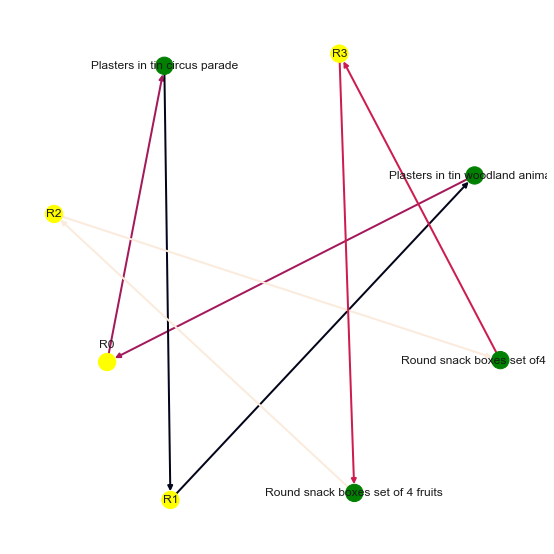

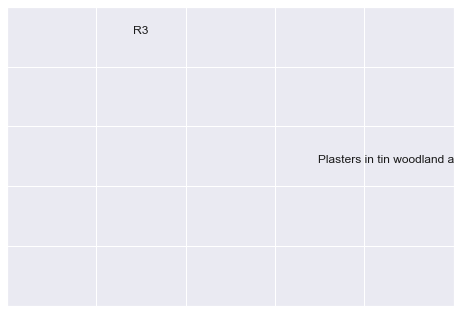

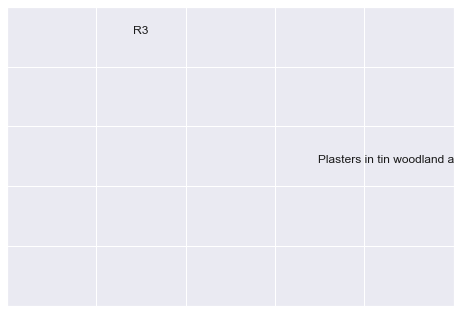

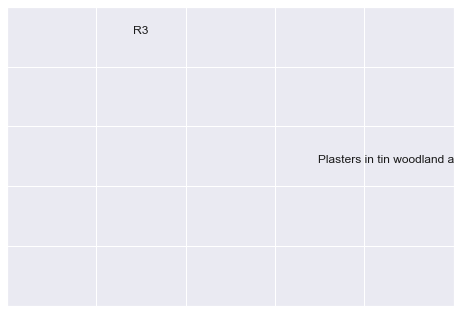

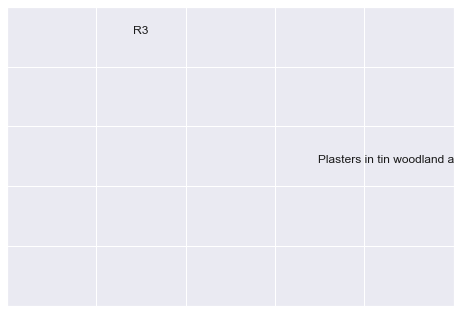

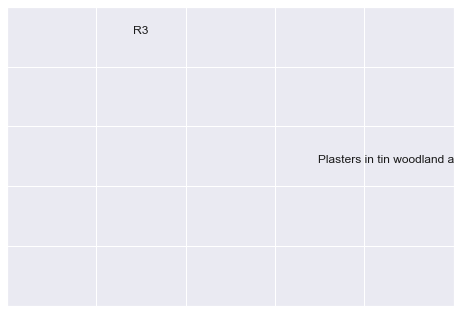

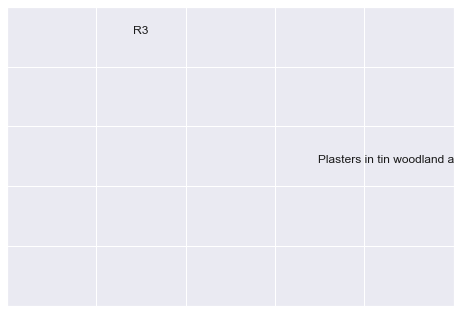

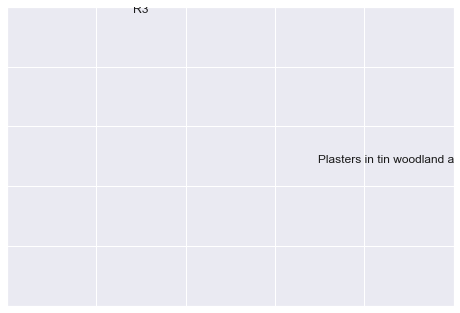

In [439]:
draw_graph(rules_kchamp, 4)

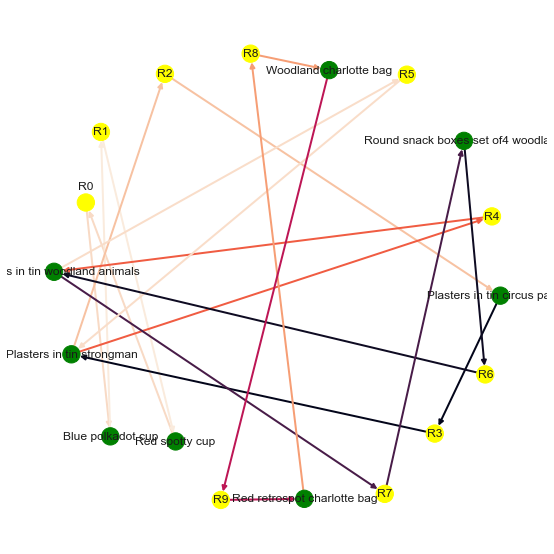

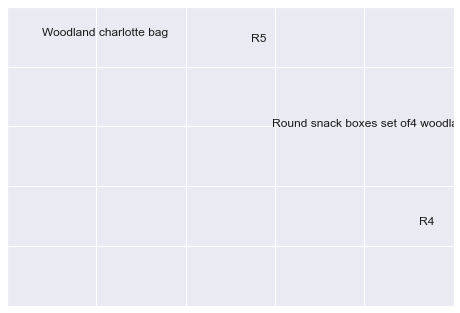

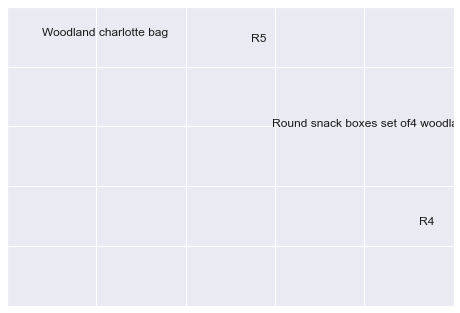

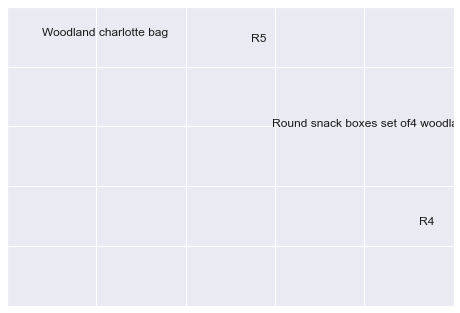

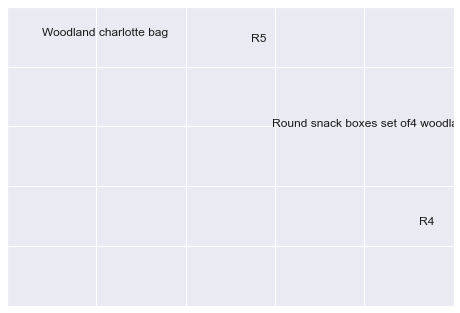

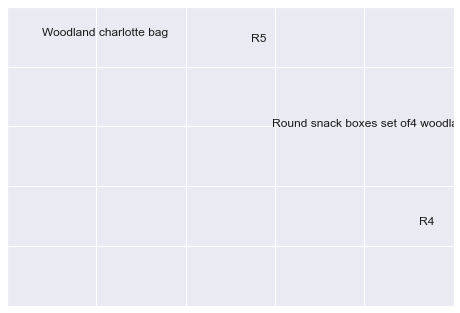

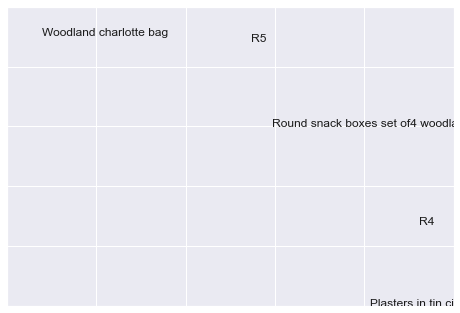

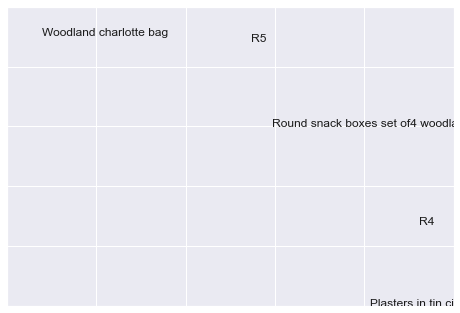

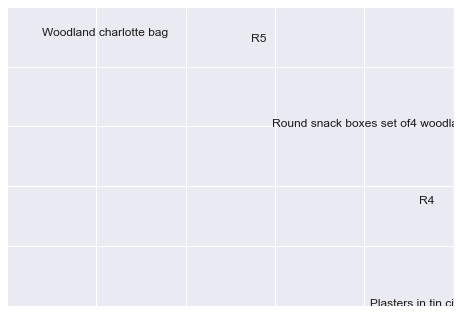

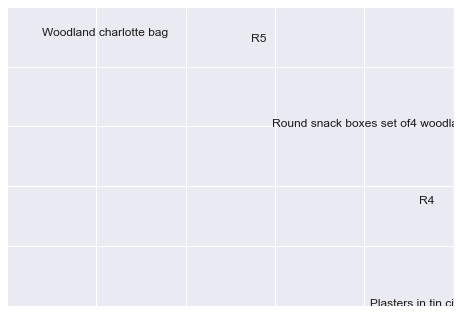

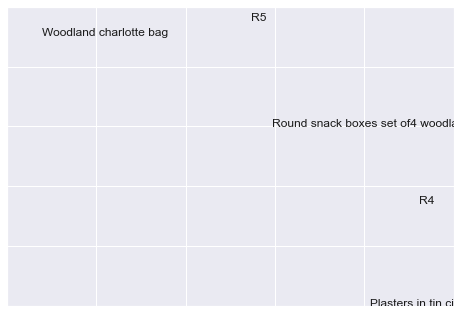

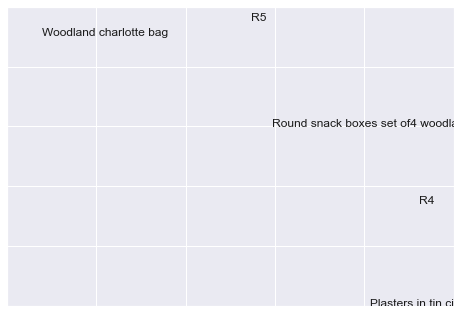

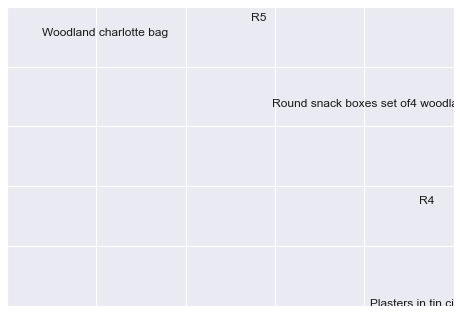

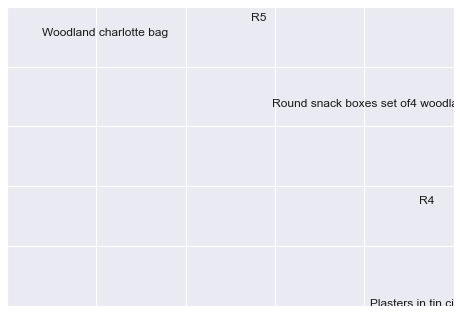

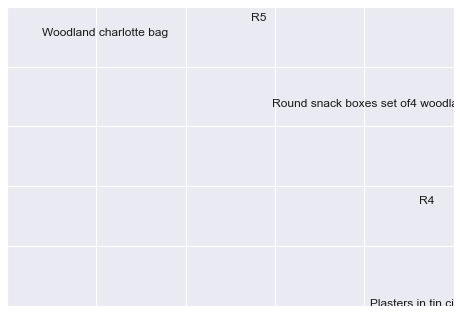

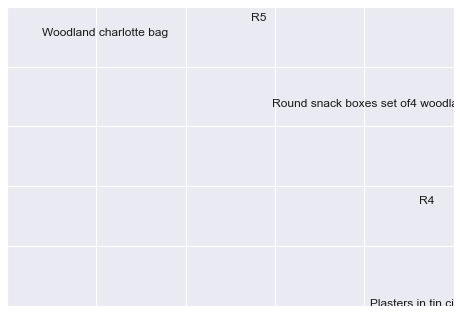

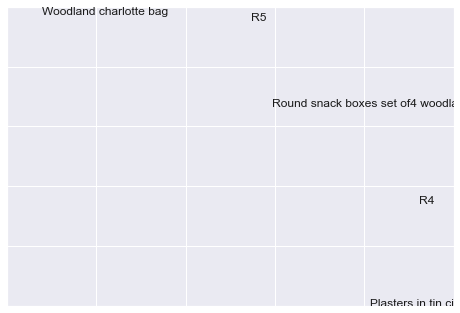

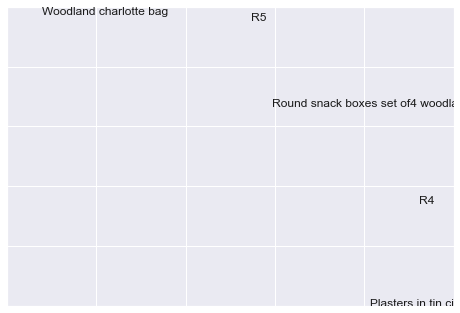

In [440]:
draw_graph(rules_krisk, 10)

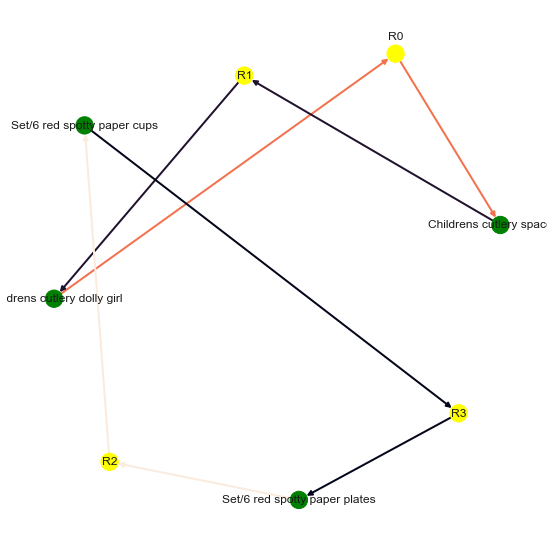

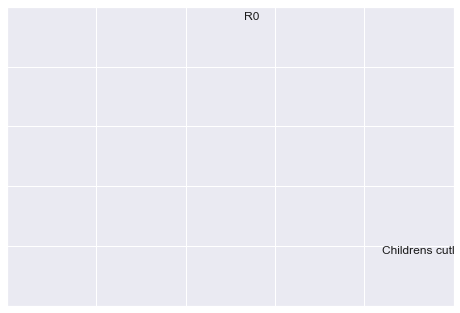

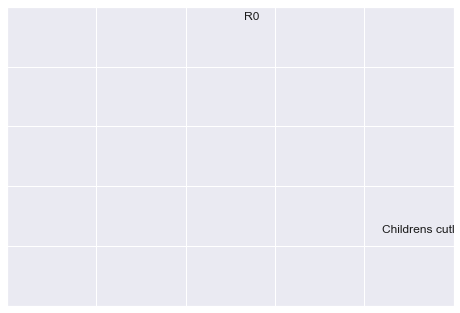

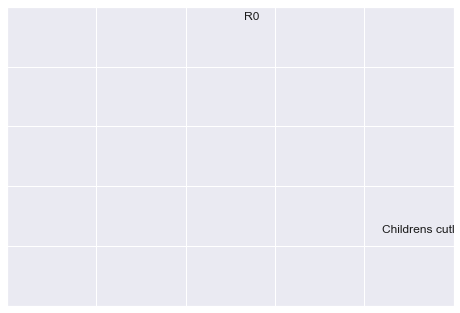

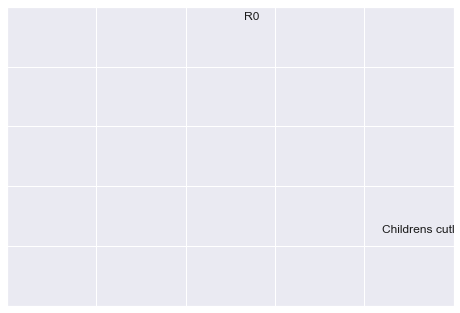

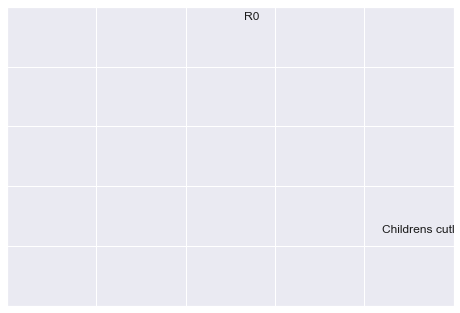

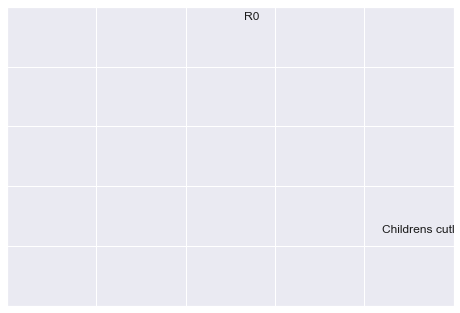

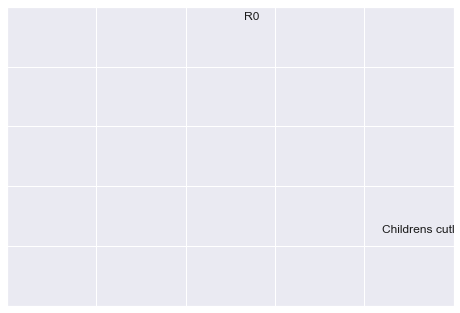

In [443]:
draw_graph(rules_krecent, 4)

In [ ]:
#draw_graph(rules_klost, 1)  # No rules sorry

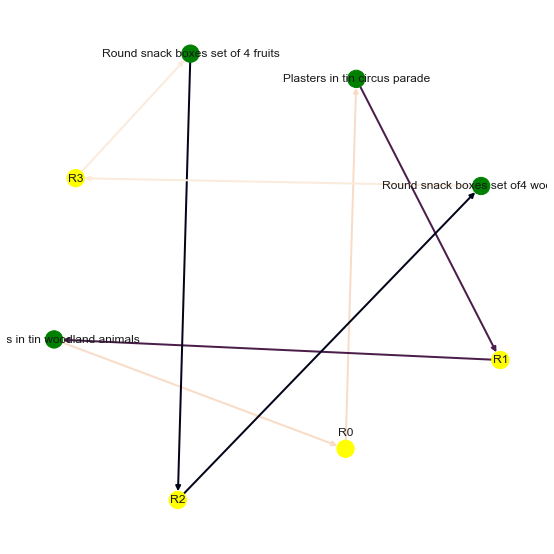

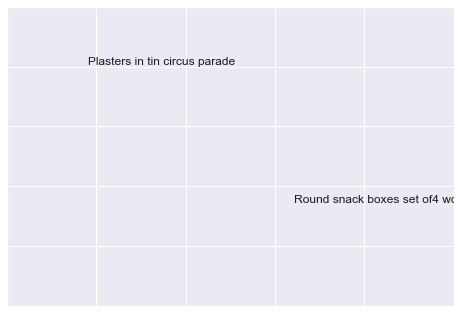

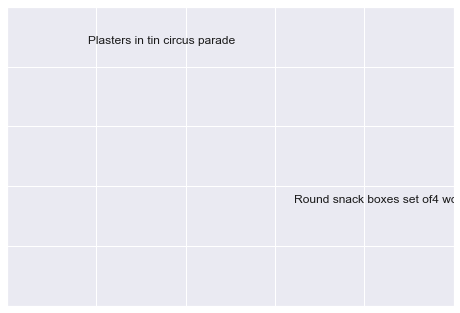

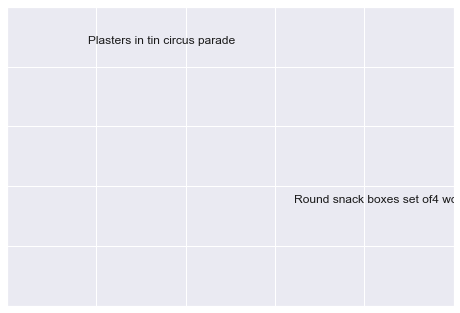

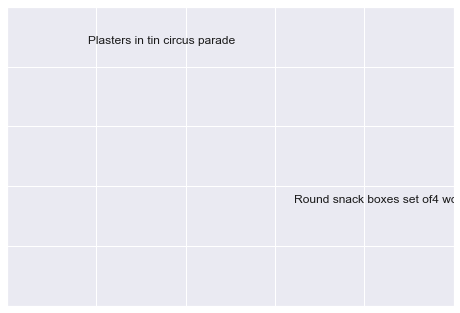

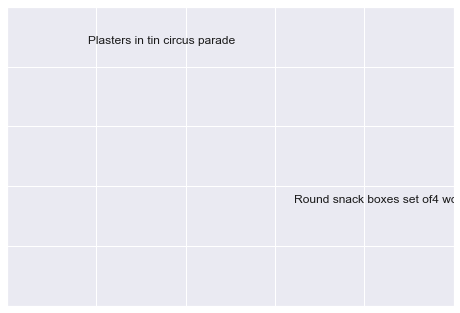

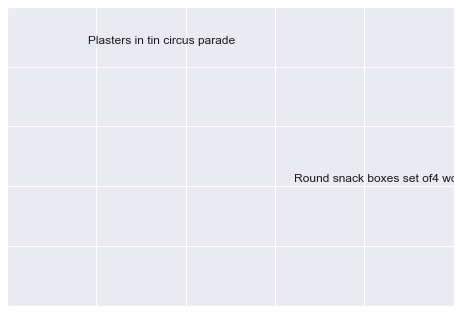

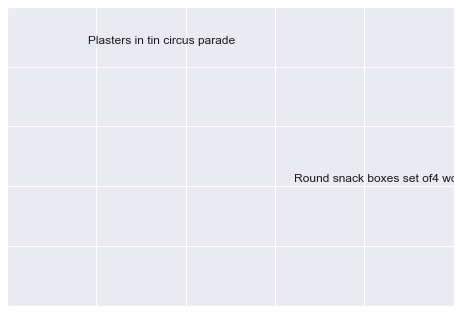

In [445]:
draw_graph(rules_hchamp, 4)

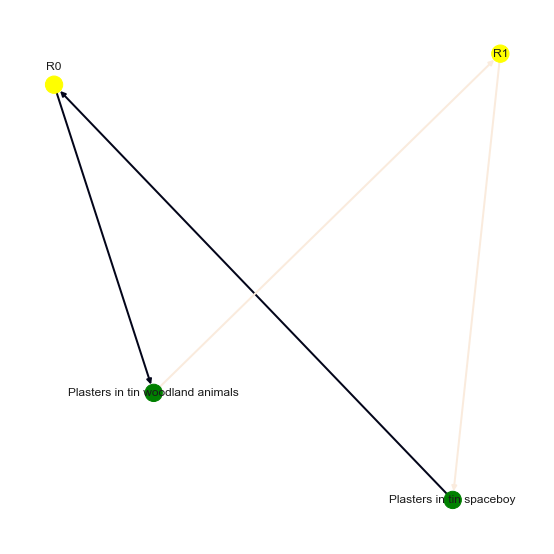

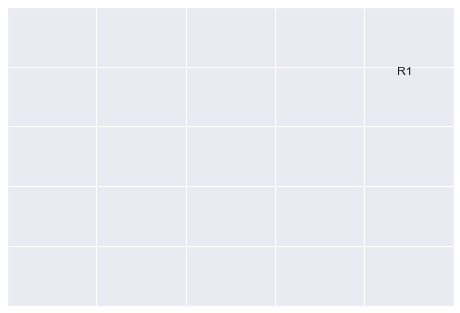

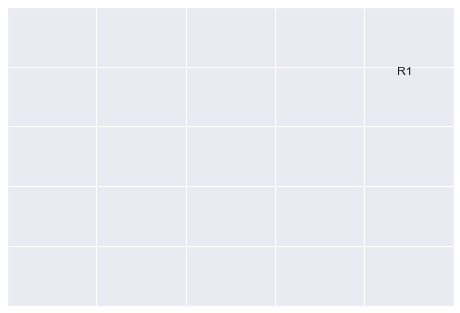

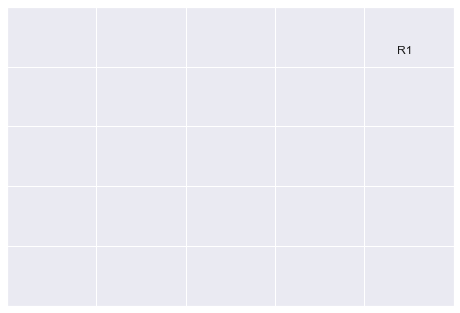

In [446]:
draw_graph(rules_hrisk, 2)

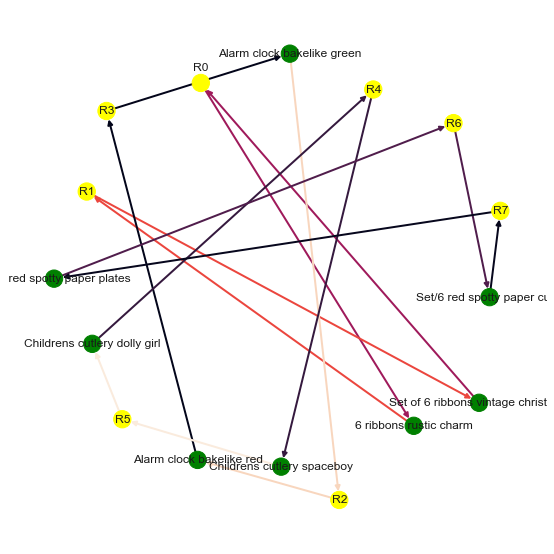

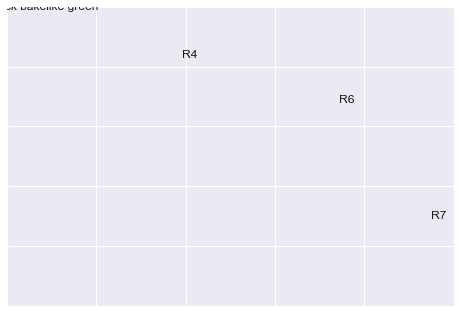

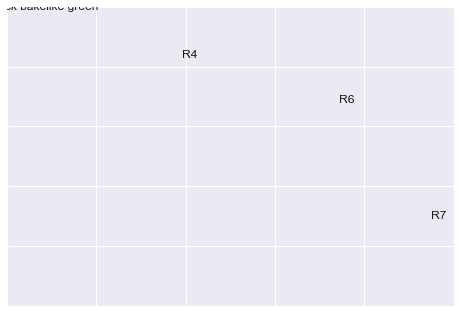

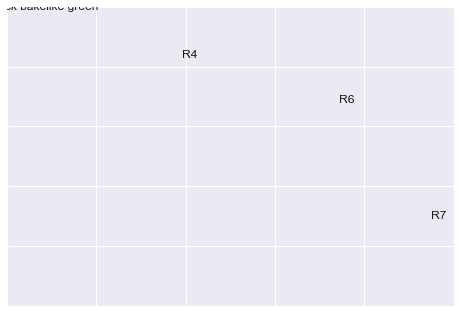

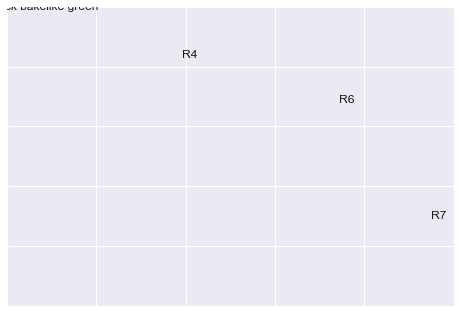

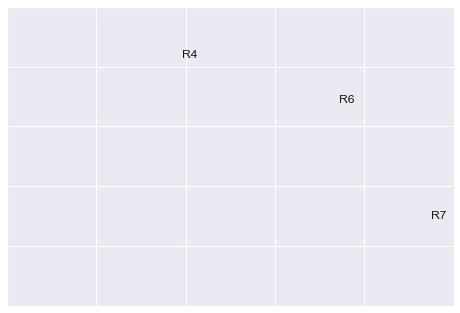

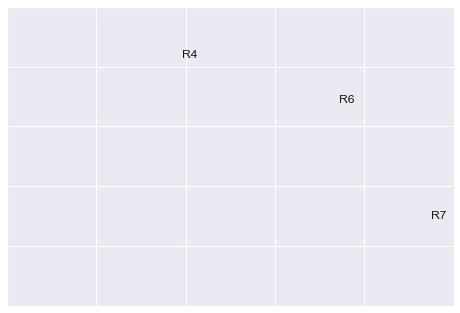

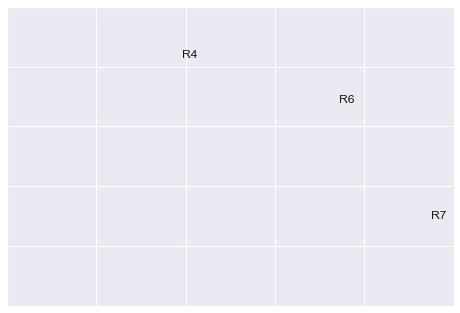

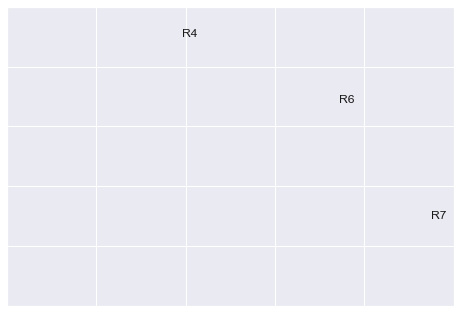

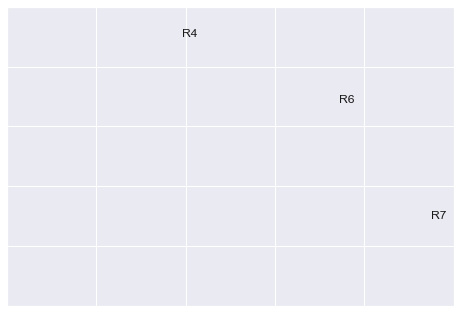

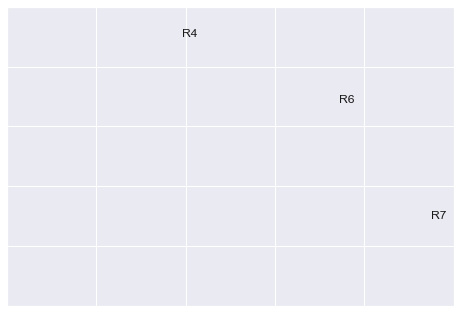

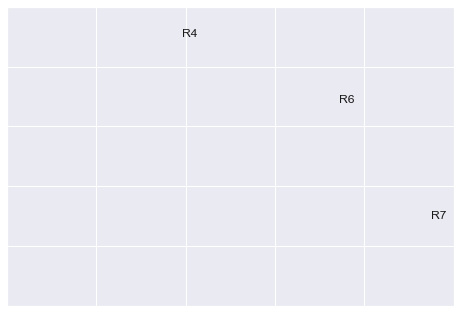

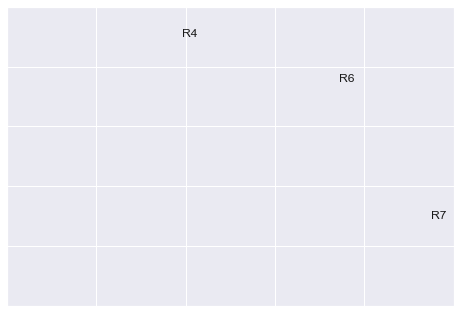

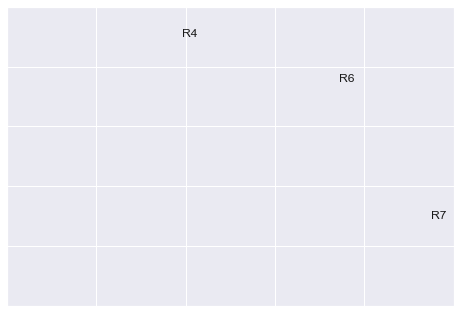

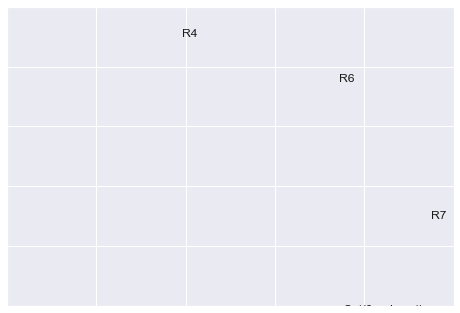

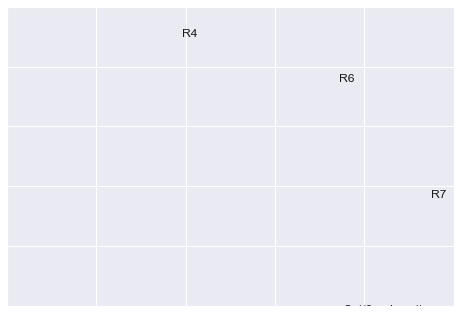

In [447]:
draw_graph(rules_hrecent, 8)

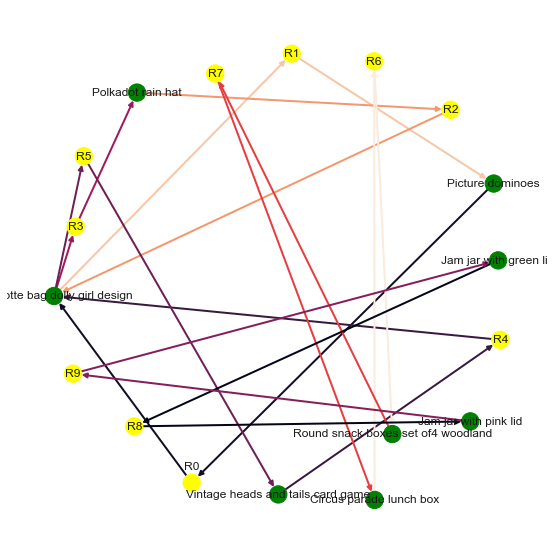

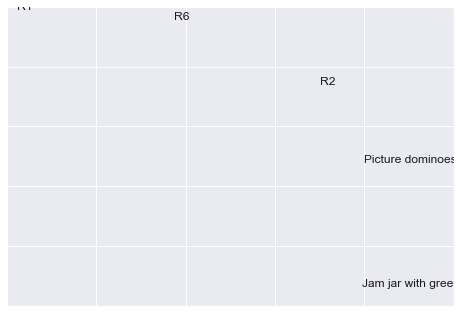

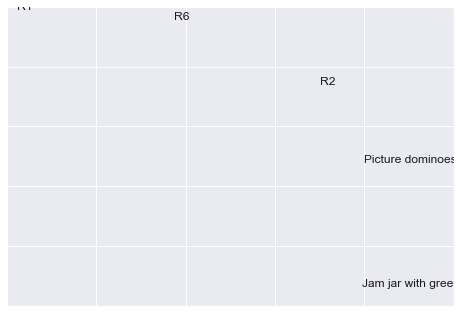

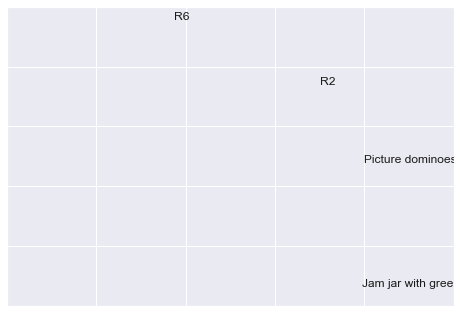

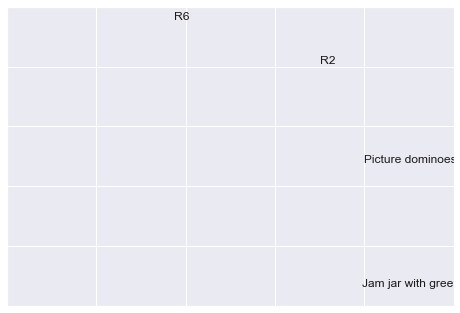

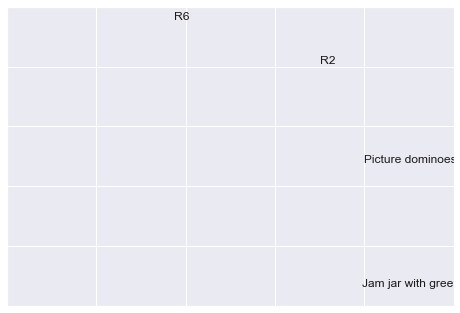

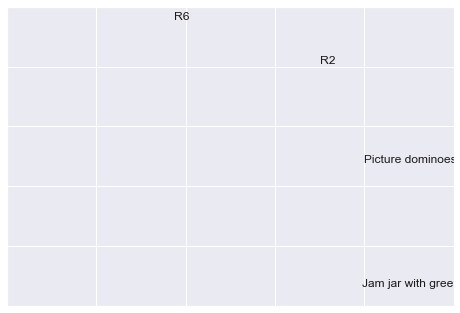

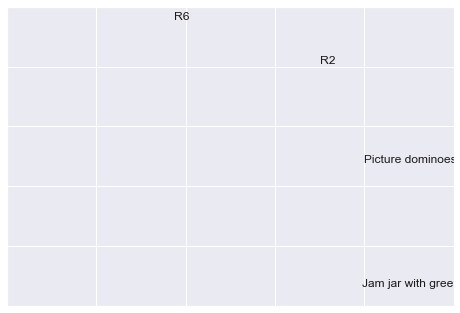

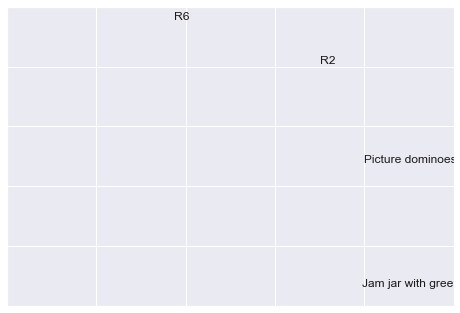

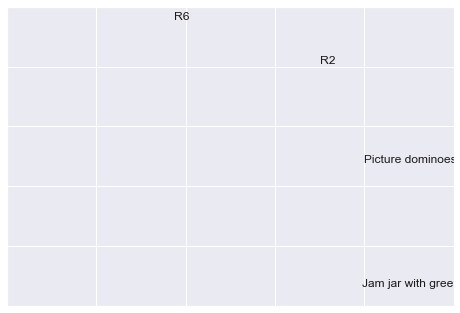

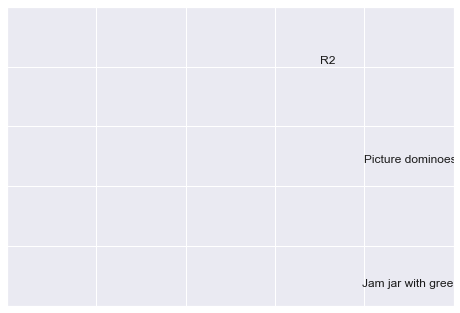

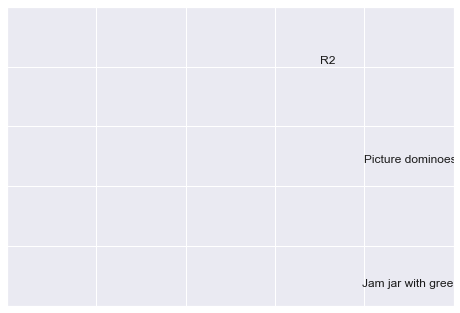

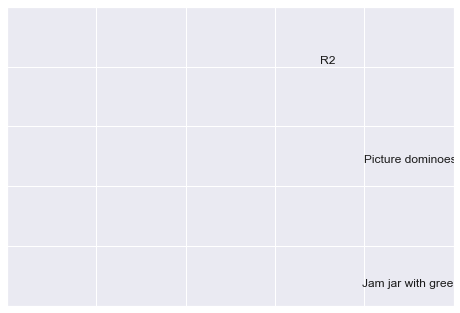

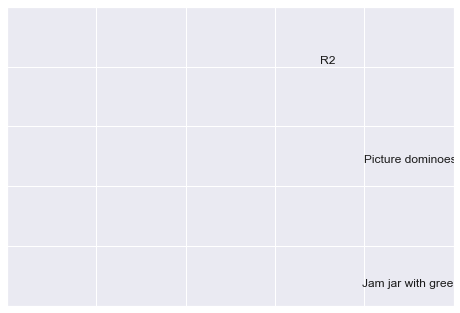

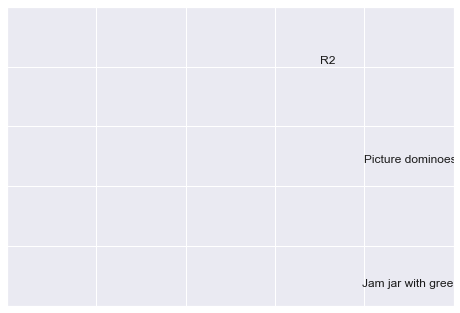

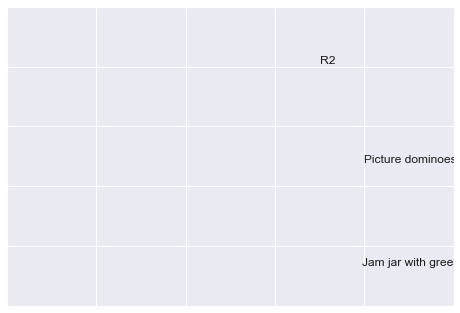

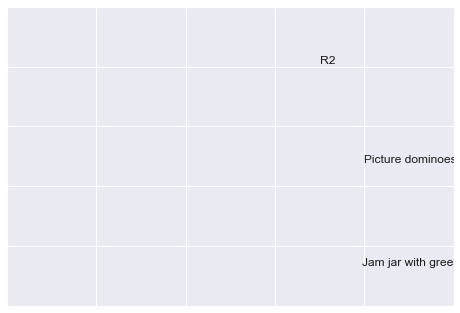

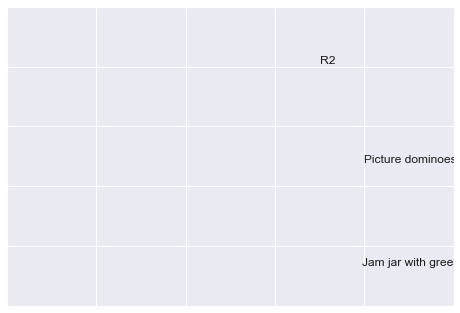

In [448]:
draw_graph(rules_hlost, 10)

### After Filtering Rules Based on Conf 0.5 and Lift 4

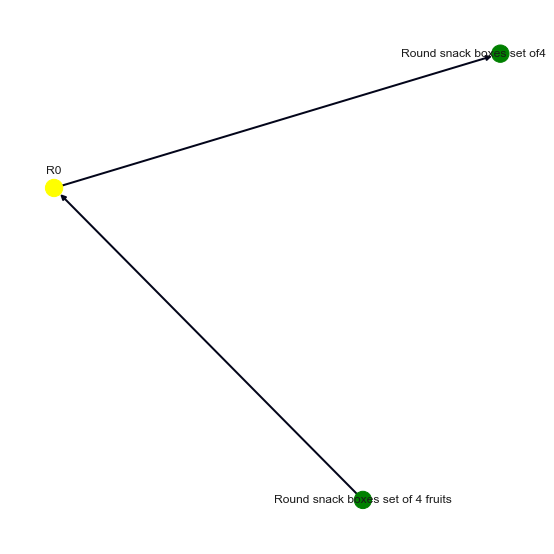

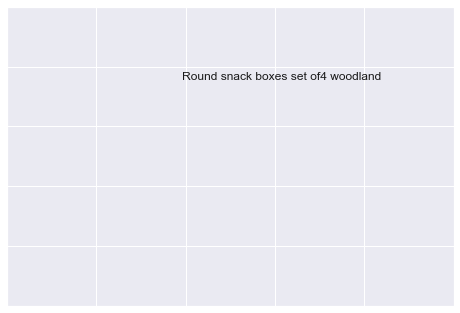

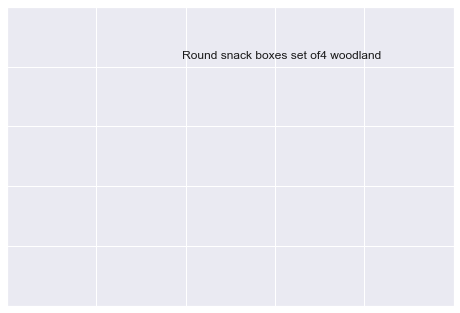

In [449]:
draw_graph(filtered_rules_kchamp, 1)

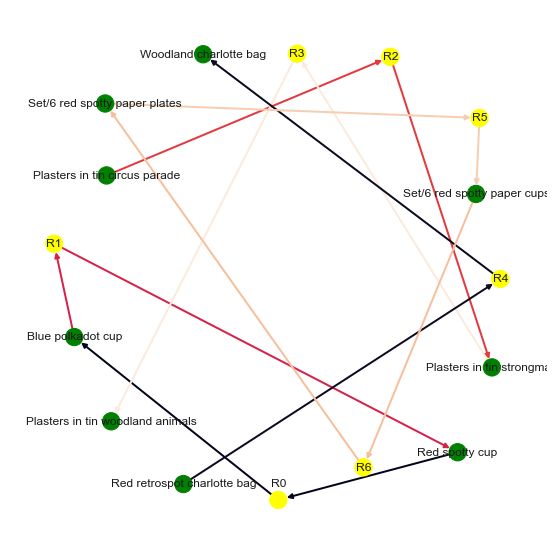

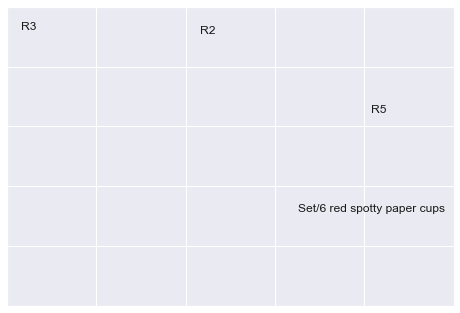

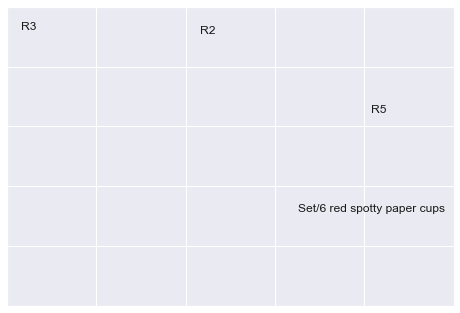

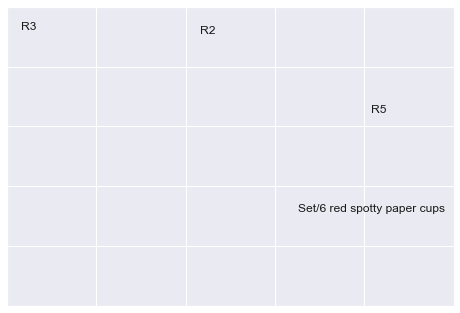

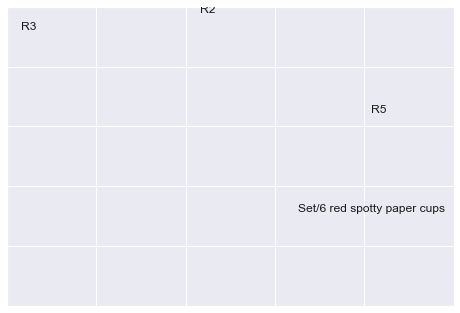

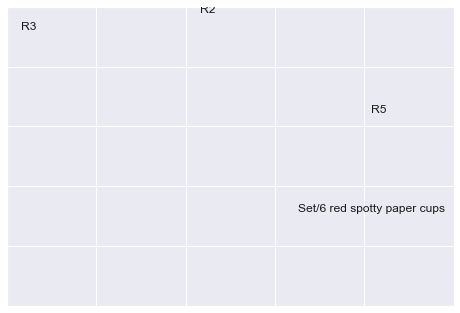

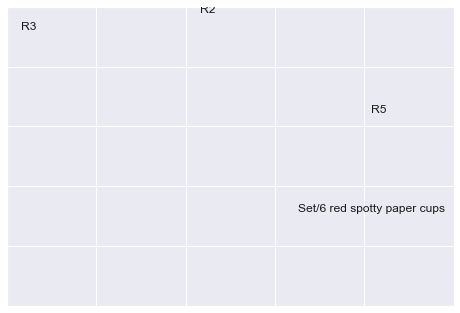

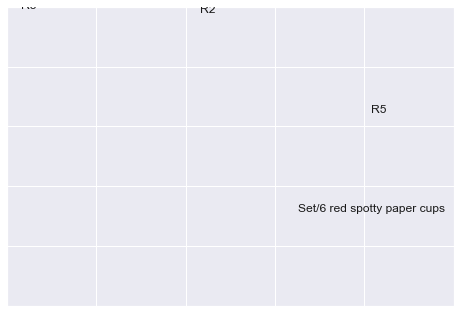

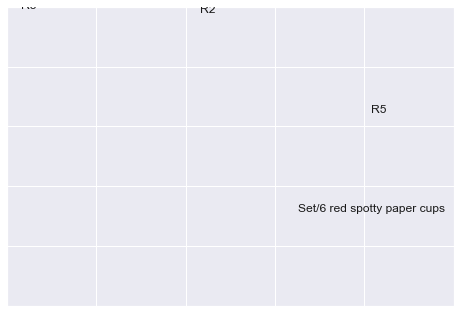

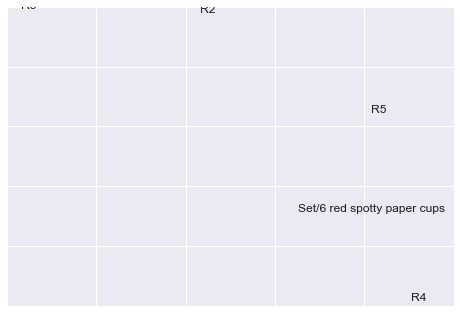

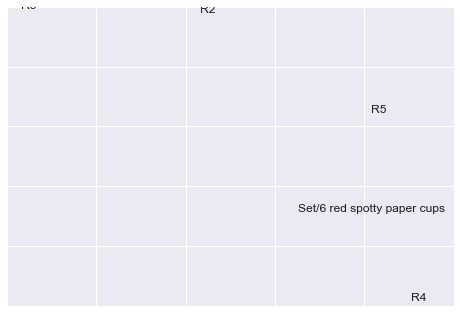

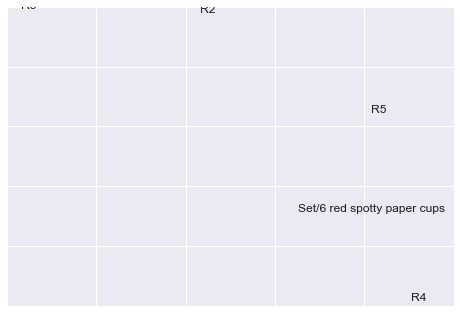

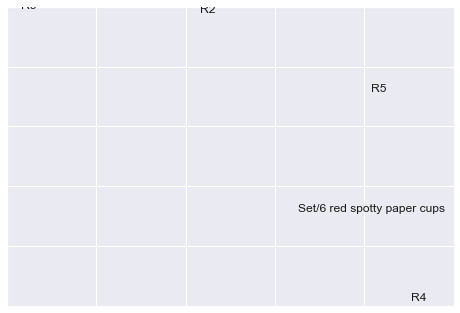

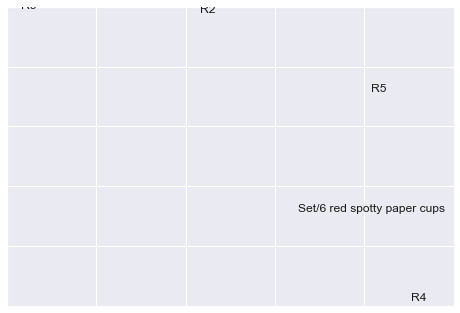

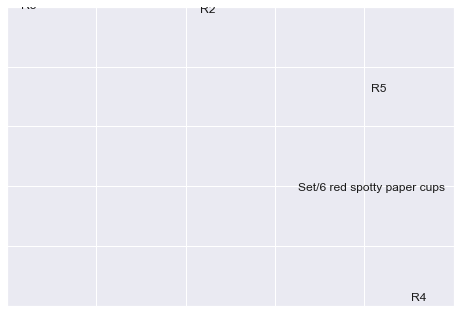

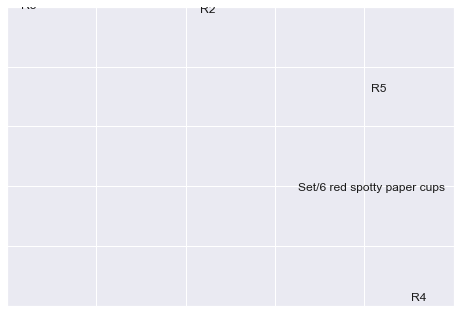

In [450]:
draw_graph(filtered_rules_krisk, 7)  # It only has 9 rules for this

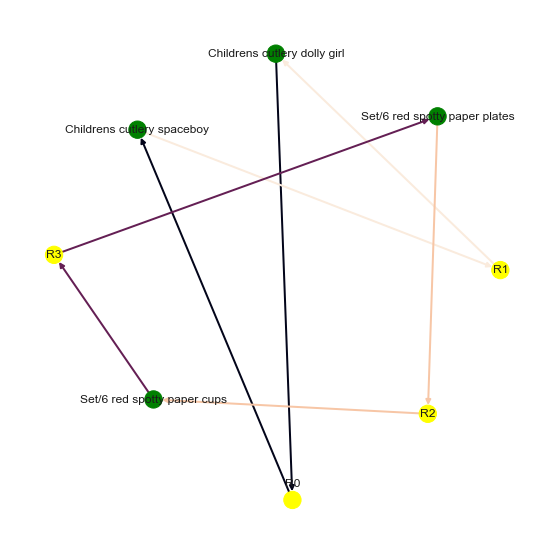

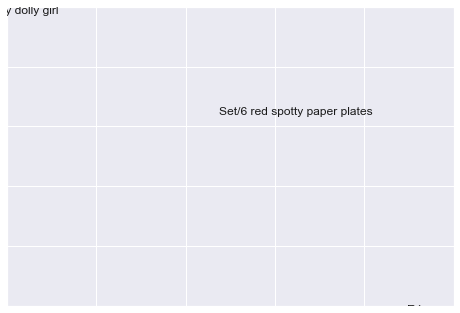

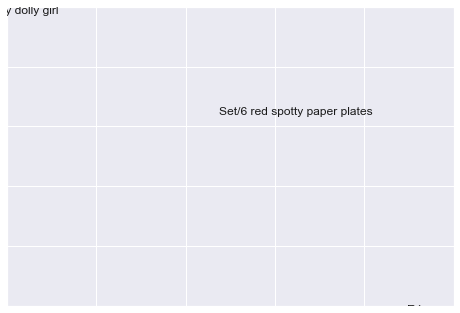

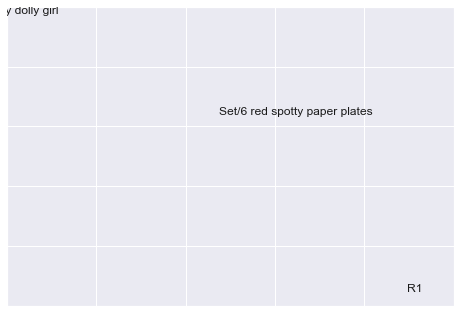

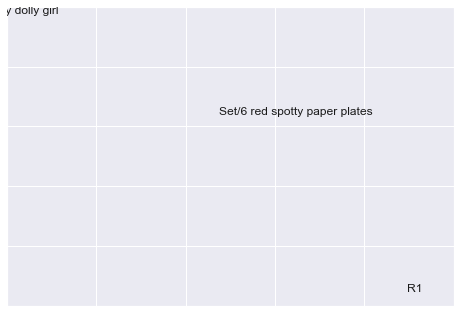

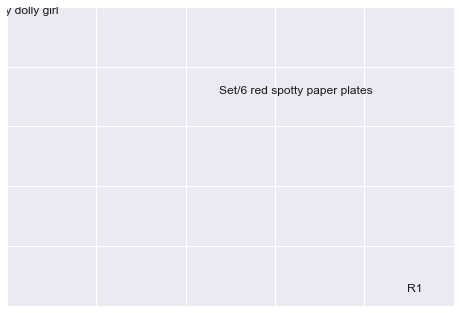

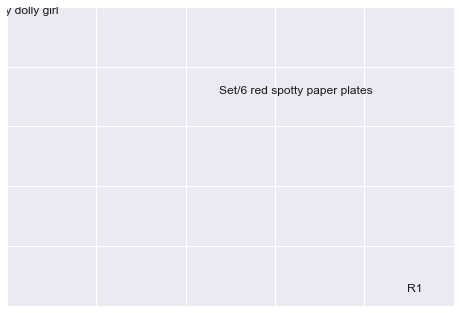

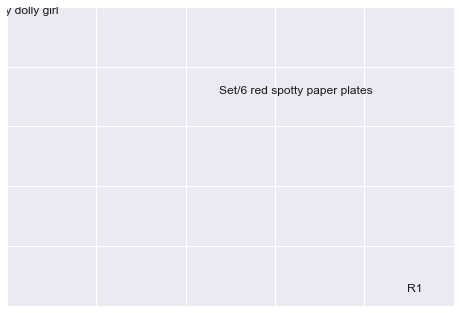

In [451]:
draw_graph(filtered_rules_krecent, 4)

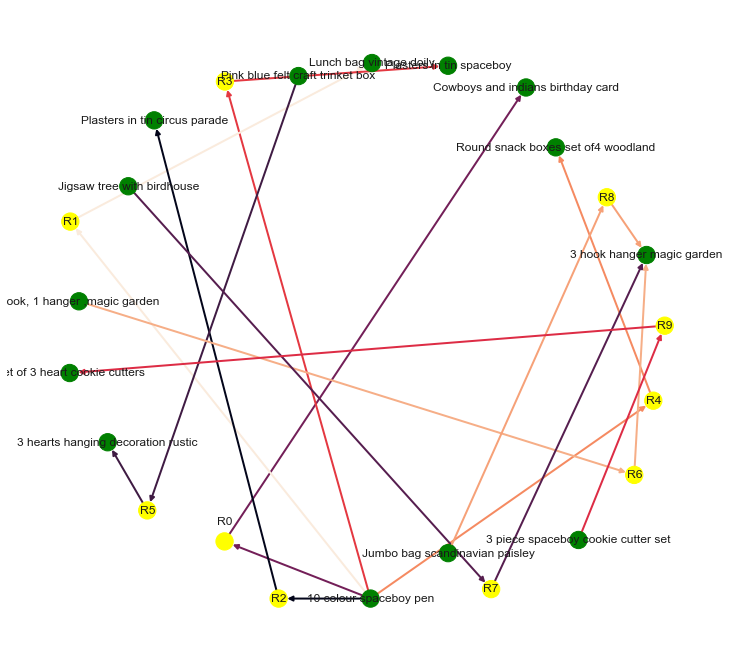

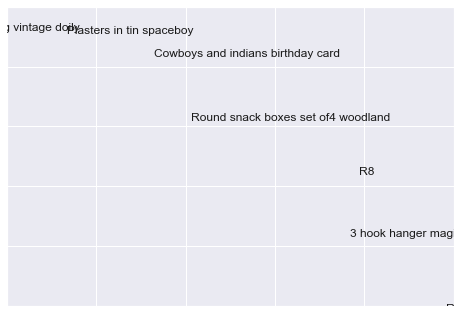

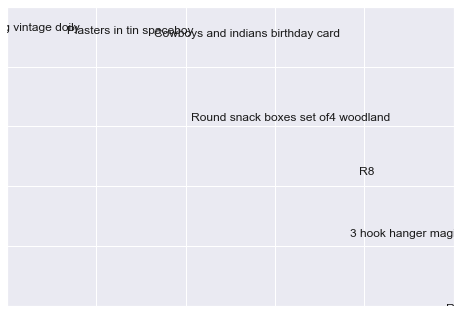

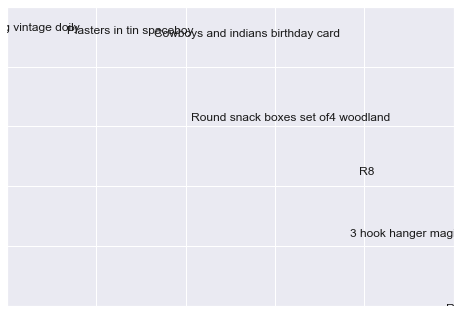

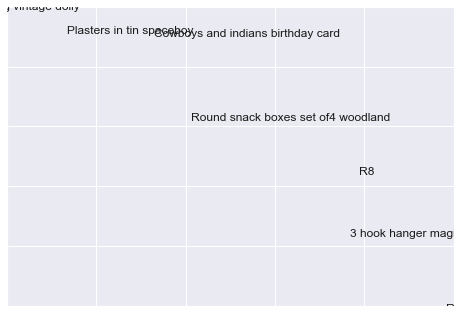

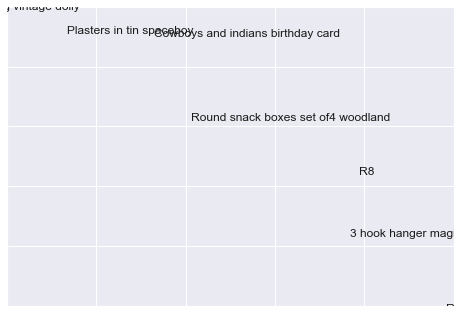

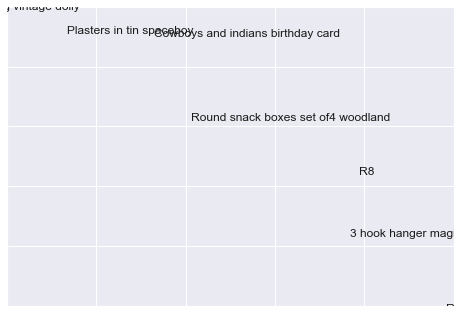

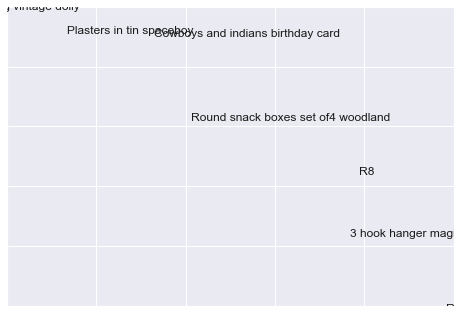

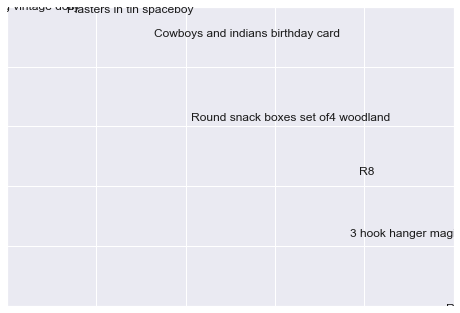

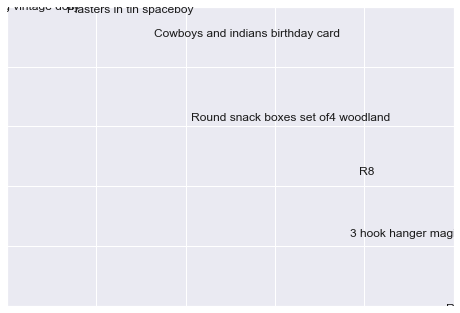

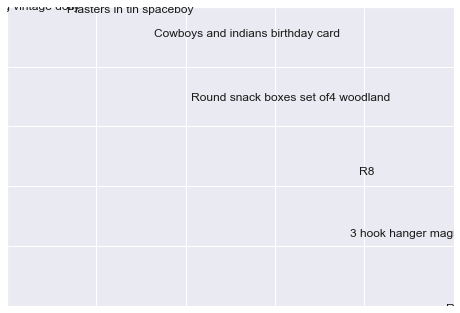

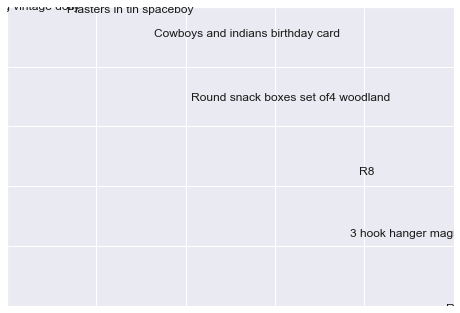

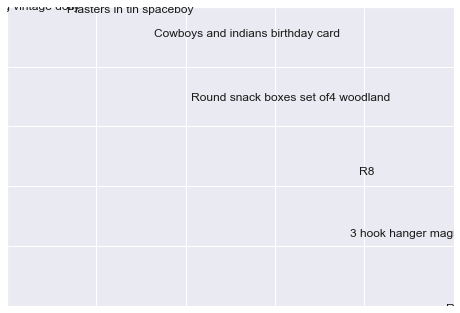

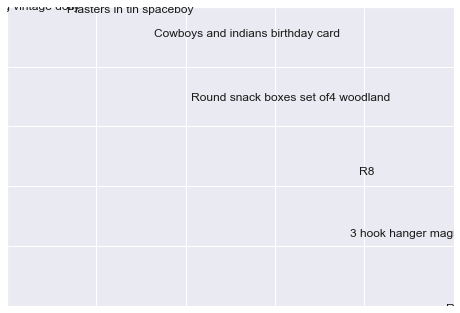

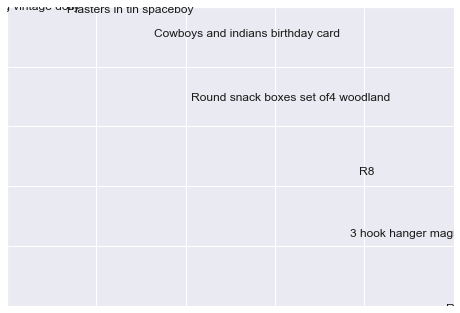

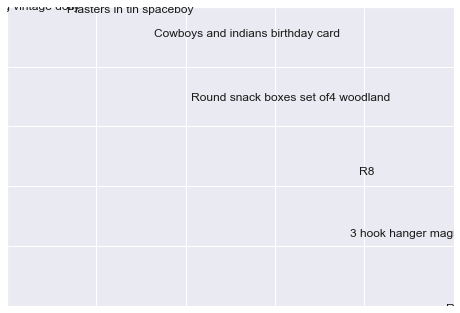

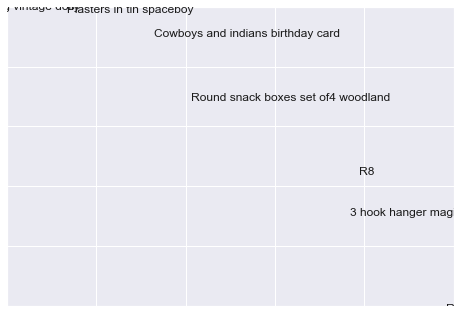

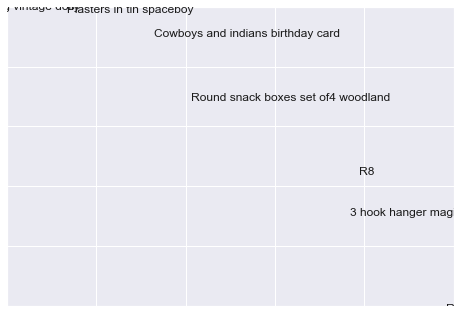

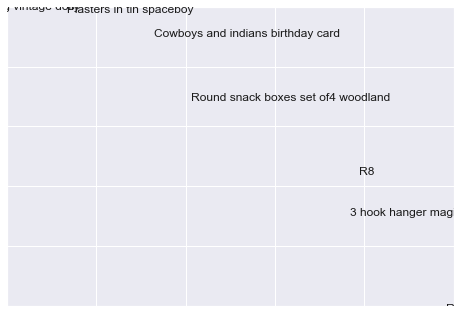

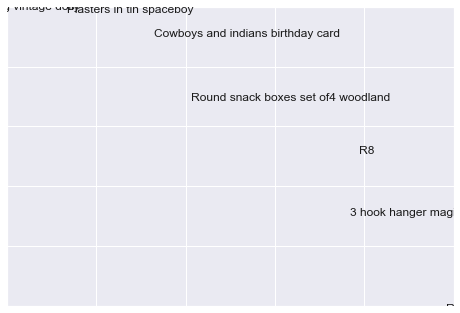

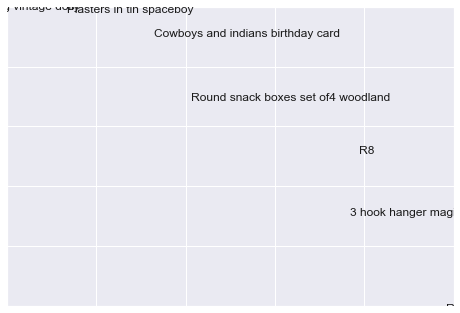

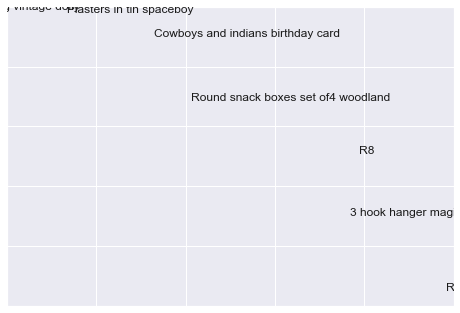

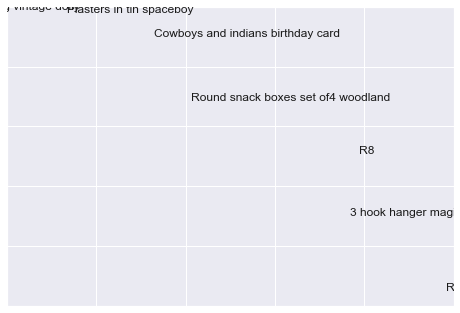

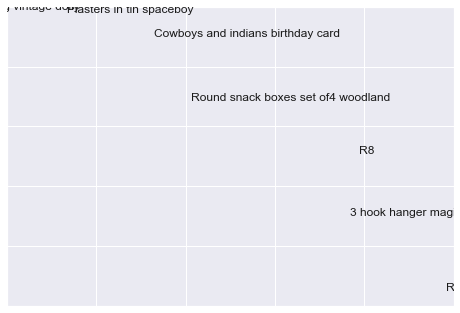

In [413]:
#draw_graph(filtered_rules_klost, 10)  # No rule sorry

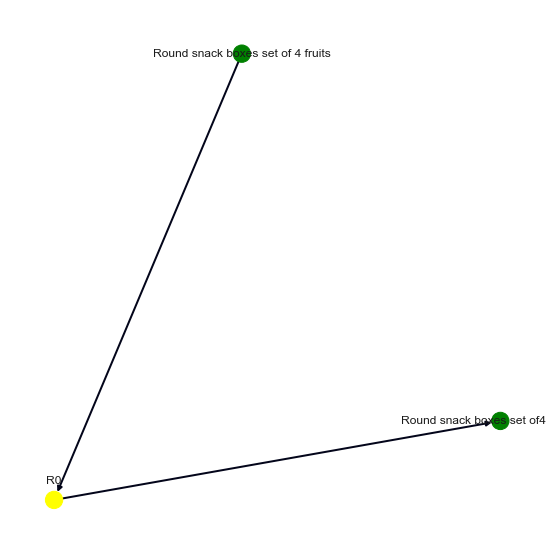

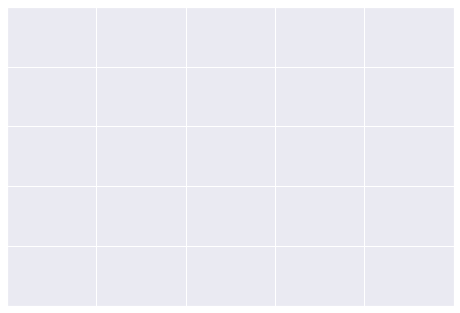

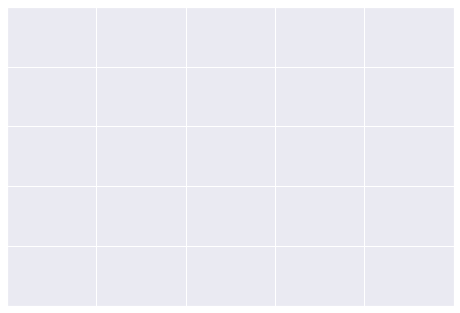

In [452]:
draw_graph(filtered_rules_hchamp, 1) 

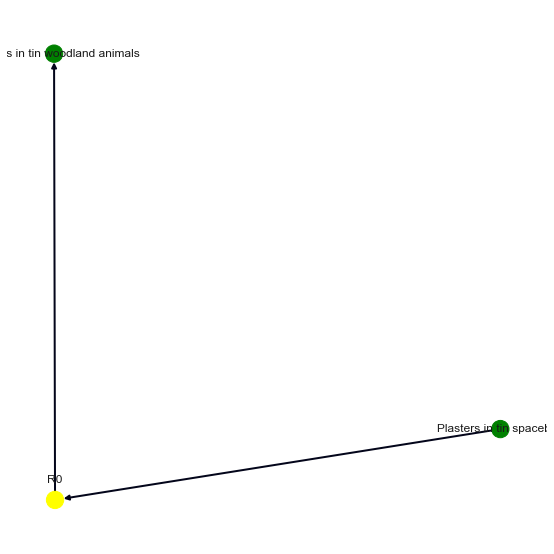

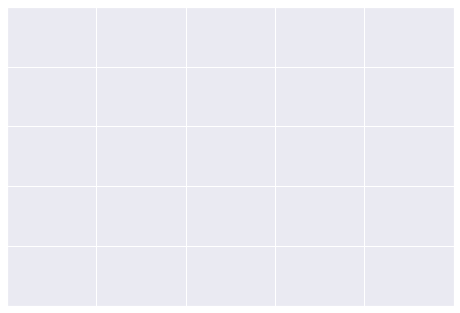

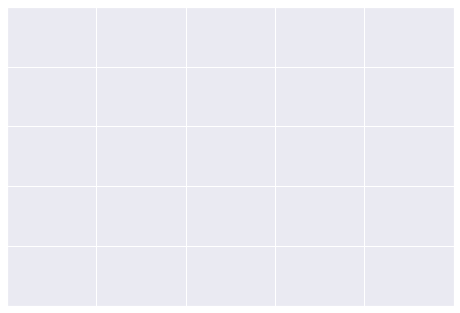

In [453]:
draw_graph(filtered_rules_hrisk, 1) 

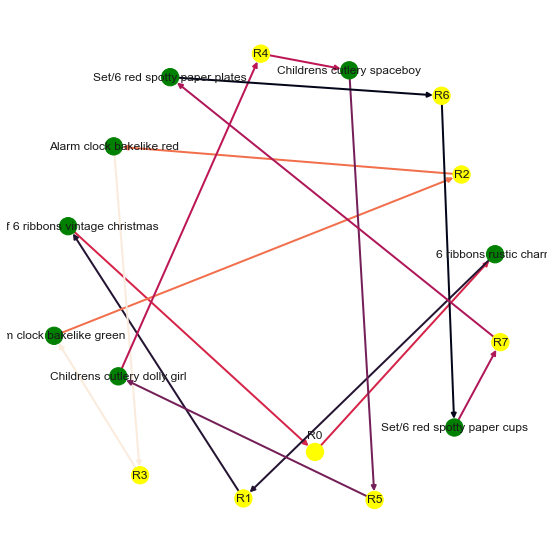

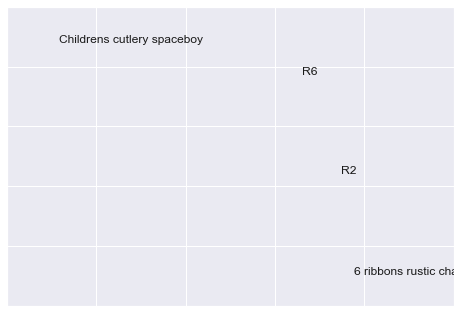

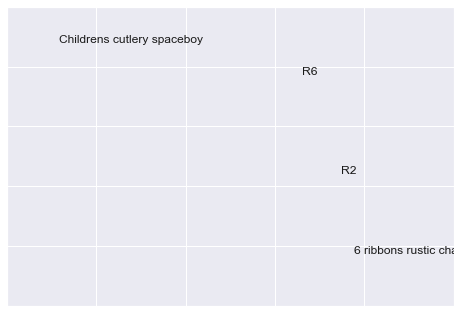

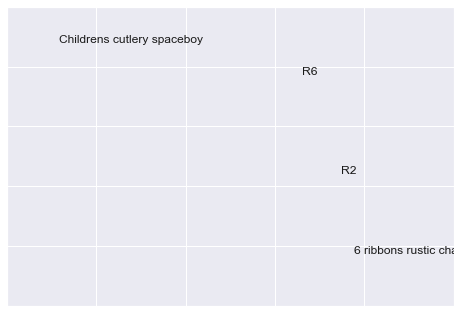

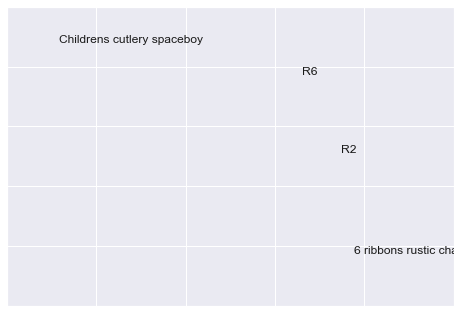

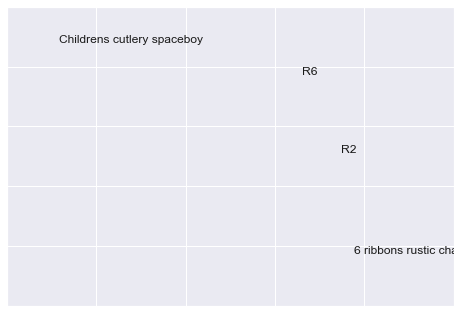

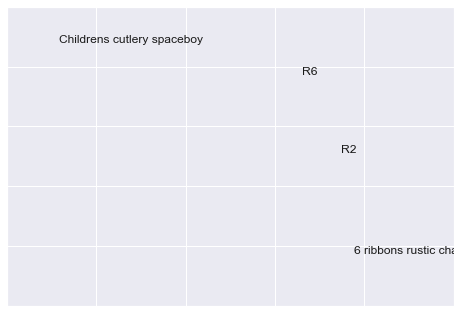

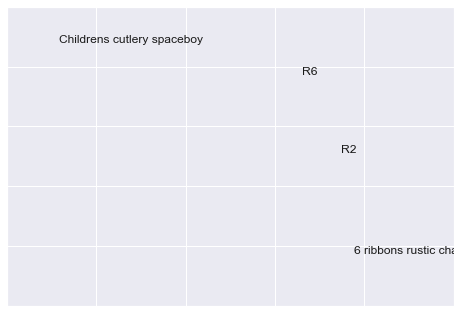

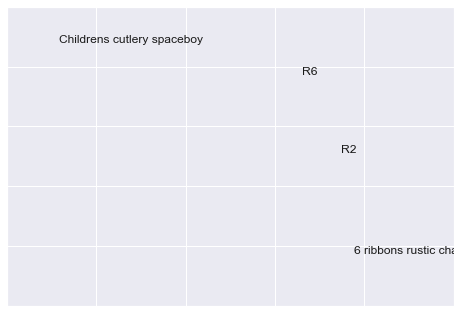

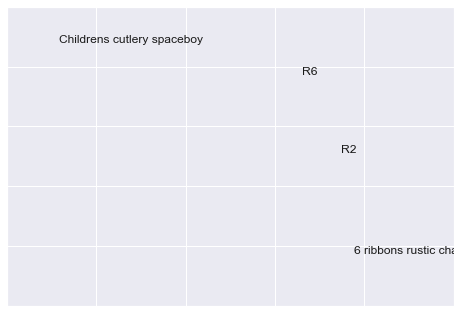

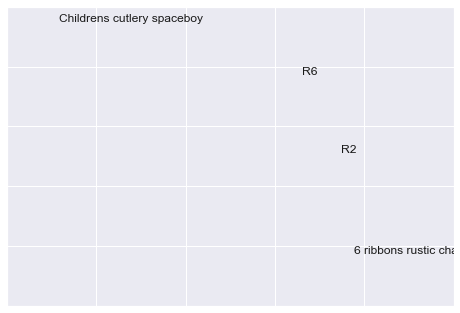

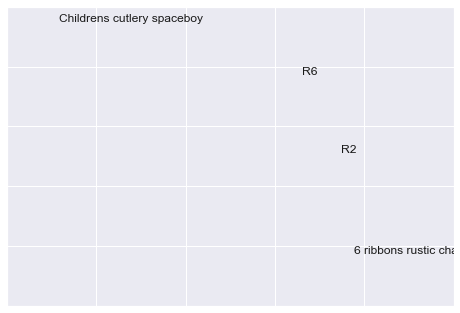

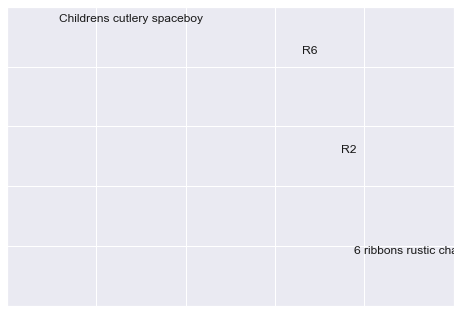

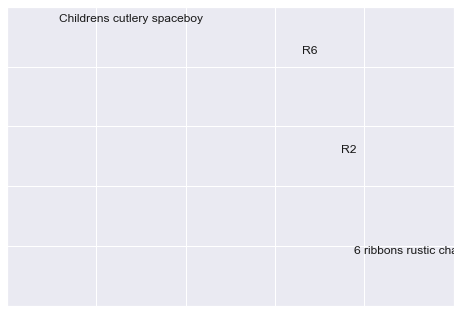

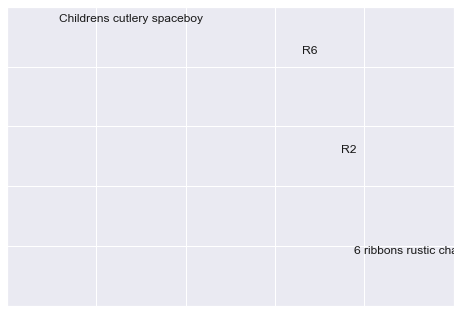

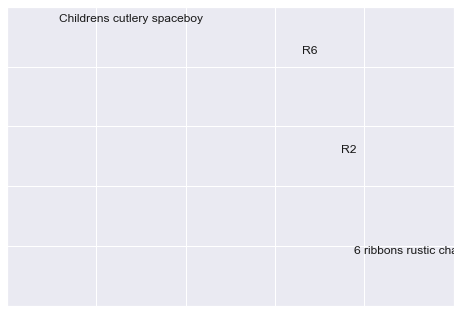

In [454]:
draw_graph(filtered_rules_hrecent, 8) 

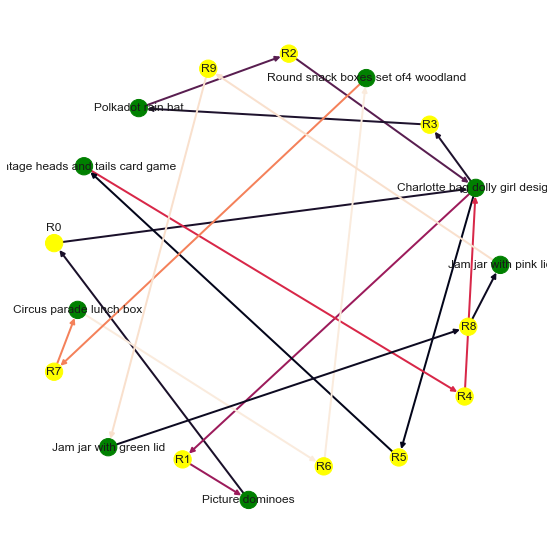

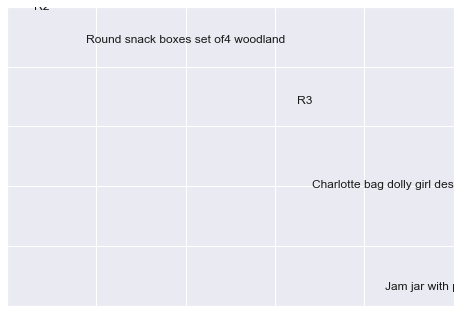

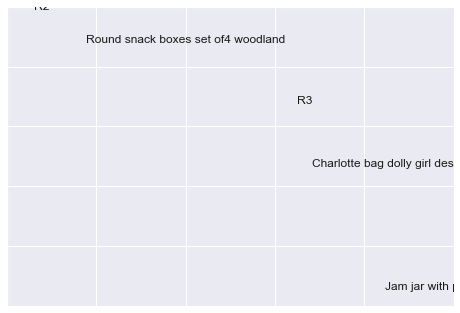

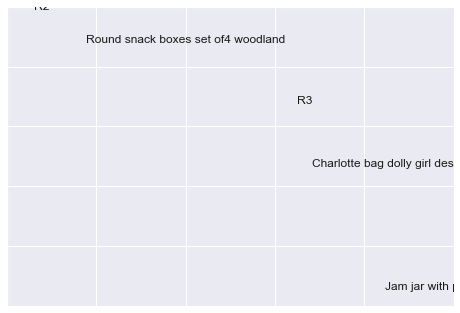

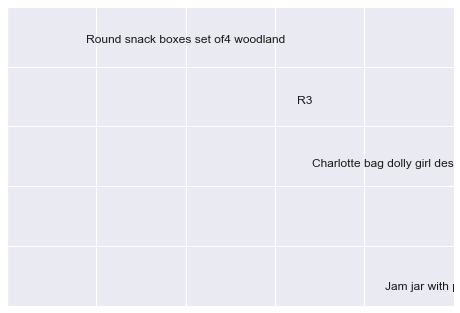

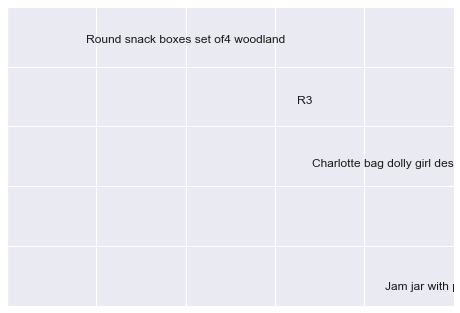

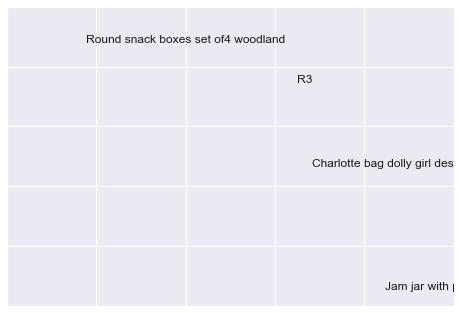

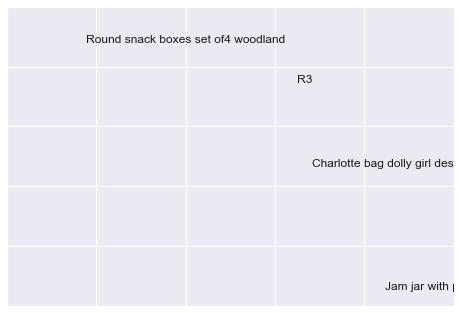

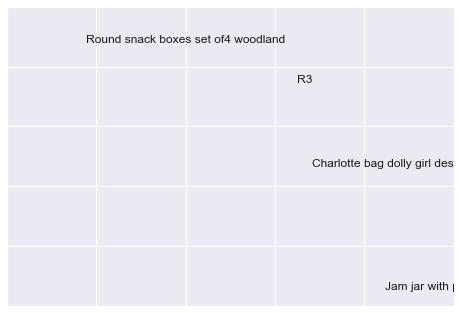

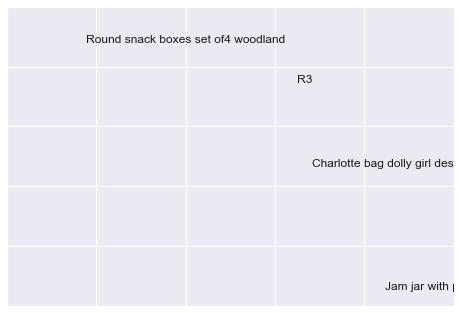

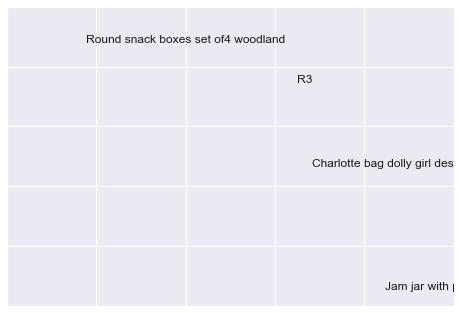

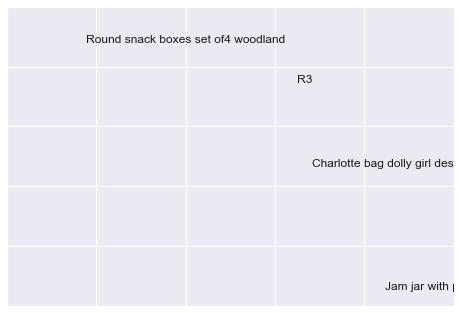

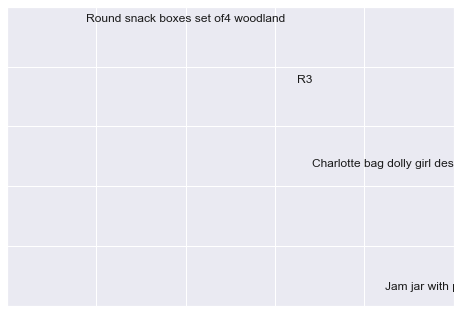

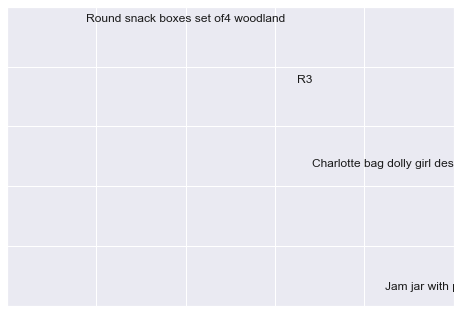

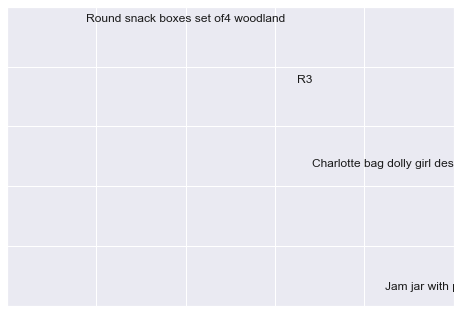

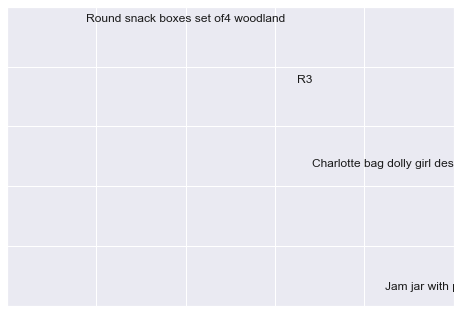

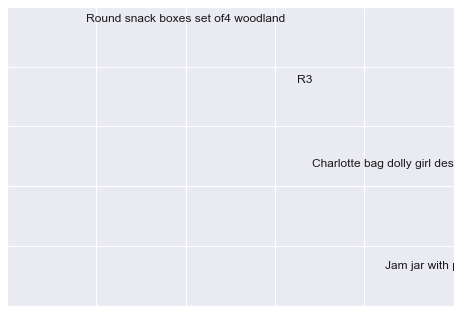

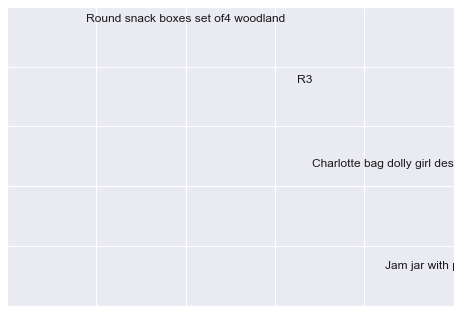

In [455]:
draw_graph(filtered_rules_hlost, 10) 

### Top 5 Frequent Itemsets Comparison between baskets of k-means Segments

In [456]:
pd.Series((['Champion + Loyal']*5) + (['At-risk']*5) + (['Recent']*5) + (['Lost']*5))

0     Champion + Loyal
1     Champion + Loyal
2     Champion + Loyal
3     Champion + Loyal
4     Champion + Loyal
5              At-risk
6              At-risk
7              At-risk
8              At-risk
9              At-risk
10              Recent
11              Recent
12              Recent
13              Recent
14              Recent
15                Lost
16                Lost
17                Lost
18                Lost
19                Lost
dtype: object

In [457]:
pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).reset_index(drop=True).head(), pd.Series(['Champion + Loyal']*5)], axis=1)

support                              itemsets                 0
0  0.088555  (Round snack boxes set of4 woodland)  Champion + Loyal
1  0.086496            (Regency cakestand 3 tier)  Champion + Loyal
2  0.067667     (Pack of 72 retrospot cake cases)  Champion + Loyal
3  0.065902       (Red toadstool led night light)  Champion + Loyal
4  0.064431       (Plasters in tin circus parade)  Champion + Loyal

In [458]:
pd.concat([pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head()]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*5) + (['At-risk']*5) + (['Recent']*5) + (['Lost']*5))], axis=1)

support                               itemsets                 0
0   0.088555   (Round snack boxes set of4 woodland)  Champion + Loyal
1   0.086496             (Regency cakestand 3 tier)  Champion + Loyal
2   0.067667      (Pack of 72 retrospot cake cases)  Champion + Loyal
3   0.065902        (Red toadstool led night light)  Champion + Loyal
4   0.064431        (Plasters in tin circus parade)  Champion + Loyal
5   0.112644   (Round snack boxes set of4 woodland)           At-risk
6   0.082759    (Round snack boxes set of 4 fruits)           At-risk
7   0.080460     (Plasters in tin woodland animals)           At-risk
8   0.075862               (Woodland charlotte bag)           At-risk
9   0.075862        (Red toadstool led night light)           At-risk
10  0.073569   (Round snack boxes set of4 woodland)            Recent
11  0.057221         (Baking set 9 piece retrospot)            Recent
12  0.054496        (Red toadstool led night light)            Recent
13  0.049046       (Strawberry ceramic trinket box)            Recent
14  0.046322     (Plasters in tin woodland animals)            Recent
15  0.054688         (Baking set 9 piece retrospot)              Lost
16  0.054688             (Red retrospot mini cases)              Lost
17  0.046875  (Adjustment by john on 26/01/2010 16)              Lost
18  0.046875    (Round snack boxes set of 4 fruits)              Lost
19  0.039062   (Set/20 red retrospot paper napkins)              Lost

#### Comparison of L1 Frequent Itemsets

In [461]:
# L1 itemset comparison
top5_table = pd.concat([pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head()]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*5) + (['At-risk']*5) + (['Recent']*5) + (['Lost']*5))], axis=1)

top5_table = top5_table.rename(columns={0: 'segment'})

top5_table

support                               itemsets           segment
0   0.088555   (Round snack boxes set of4 woodland)  Champion + Loyal
1   0.086496             (Regency cakestand 3 tier)  Champion + Loyal
2   0.067667      (Pack of 72 retrospot cake cases)  Champion + Loyal
3   0.065902        (Red toadstool led night light)  Champion + Loyal
4   0.064431        (Plasters in tin circus parade)  Champion + Loyal
5   0.112644   (Round snack boxes set of4 woodland)           At-risk
6   0.082759    (Round snack boxes set of 4 fruits)           At-risk
7   0.080460     (Plasters in tin woodland animals)           At-risk
8   0.075862               (Woodland charlotte bag)           At-risk
9   0.075862        (Red toadstool led night light)           At-risk
10  0.073569   (Round snack boxes set of4 woodland)            Recent
11  0.057221         (Baking set 9 piece retrospot)            Recent
12  0.054496        (Red toadstool led night light)            Recent
13  0.049046       (Strawberry ceramic trinket box)            Recent
14  0.046322     (Plasters in tin woodland animals)            Recent
15  0.054688         (Baking set 9 piece retrospot)              Lost
16  0.054688             (Red retrospot mini cases)              Lost
17  0.046875  (Adjustment by john on 26/01/2010 16)              Lost
18  0.046875    (Round snack boxes set of 4 fruits)              Lost
19  0.039062   (Set/20 red retrospot paper napkins)              Lost

In [462]:
top5_table['itemsets'] = top5_table['itemsets'].apply(list).apply(lambda x: x[0])
top5_table.head()

support                            itemsets           segment
0  0.088555  Round snack boxes set of4 woodland  Champion + Loyal
1  0.086496            Regency cakestand 3 tier  Champion + Loyal
2  0.067667     Pack of 72 retrospot cake cases  Champion + Loyal
3  0.065902       Red toadstool led night light  Champion + Loyal
4  0.064431       Plasters in tin circus parade  Champion + Loyal

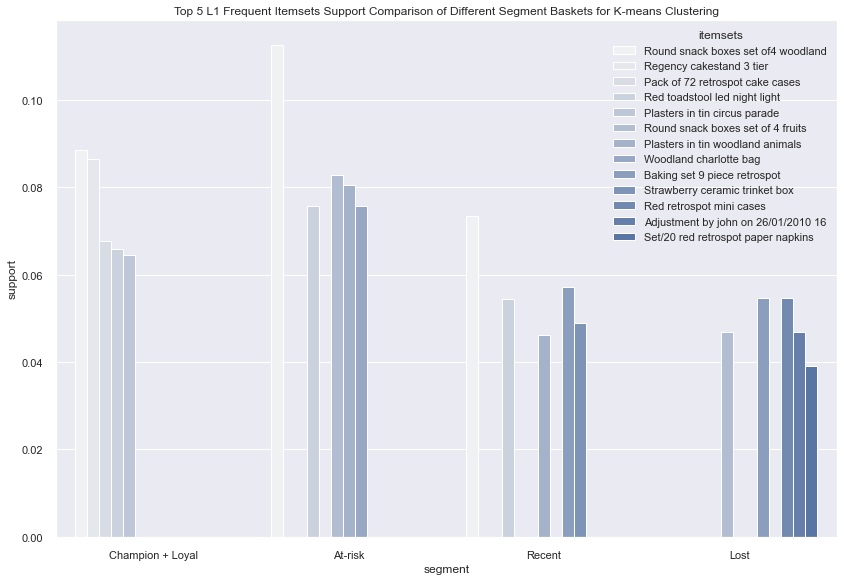

In [464]:
plt.figure(figsize=(14, 9.5))
sns.barplot(data=top5_table, x='segment', y='support', hue='itemsets', palette='light:b')
plt.title("Top 5 L1 Frequent Itemsets Support Comparison of Different Segment Baskets for K-means Clustering")
plt.show()

In [465]:
# Get the length for country column
len(frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False))

(106, 115, 52, 42)

In [514]:
# L1 itemset comparison as a whole
plot_table = pd.concat([pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*106) + (['At-risk']*115) + (['Recent']*52) + (['Lost']*42))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                              itemsets           segment
0    0.088555  (Round snack boxes set of4 woodland)  Champion + Loyal
1    0.086496            (Regency cakestand 3 tier)  Champion + Loyal
2    0.067667     (Pack of 72 retrospot cake cases)  Champion + Loyal
3    0.065902       (Red toadstool led night light)  Champion + Loyal
4    0.064431       (Plasters in tin circus parade)  Champion + Loyal
..        ...                                   ...               ...
310  0.023438              (Lunch bag apple design)              Lost
311  0.023438             (Jumbo bag pink polkadot)              Lost
312  0.023438               (Cooking set retrospot)              Lost
313  0.023438          (Assorted colour mini cases)              Lost
314  0.023438     (Woodland design cotton tote bag)              Lost

[315 rows x 3 columns]

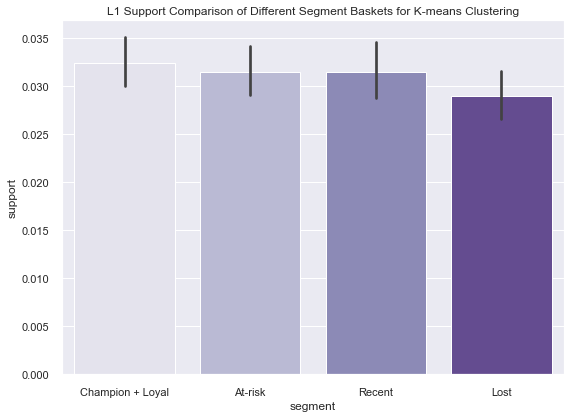

In [515]:
plt.figure(figsize=(9, 6.5))
sns.barplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L1 Support Comparison of Different Segment Baskets for K-means Clustering")
plt.show()

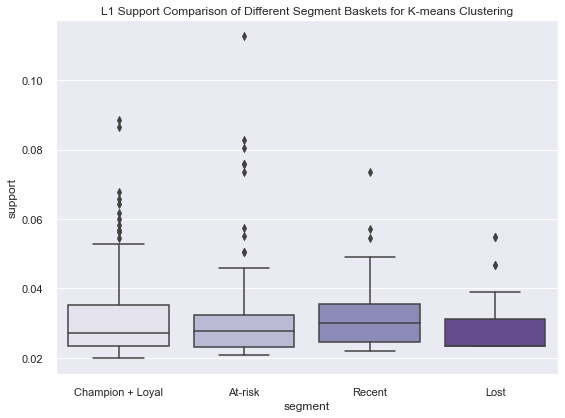

In [516]:
plt.figure(figsize=(9, 6.5))
sns.boxplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L1 Support Comparison of Different Segment Baskets for K-means Clustering")
plt.show()

#### Comparison of L2 Frequent Itemsets

2, 5, 2, 0

In [472]:
pd.concat([frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).reset_index(drop=True).head(), pd.Series(['Champion + Loyal']*5)], axis=1)

support                                           itemsets  \
0  0.024523  (Childrens cutlery dolly girl, Childrens cutle...   
1  0.024523  (Set/6 red spotty paper plates, Set/6 red spot...   
2       NaN                                                NaN   
3       NaN                                                NaN   
4       NaN                                                NaN   

                  0  
0  Champion + Loyal  
1  Champion + Loyal  
2  Champion + Loyal  
3  Champion + Loyal  
4  Champion + Loyal

In [473]:
# L2 itemset comparison
top5_table = pd.concat([pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head()]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*2) + (['At-risk']*5) + (['Recent']*2))], axis=1)

top5_table = top5_table.rename(columns={0: 'segment'})

top5_table

support                                           itemsets  \
0  0.026184  (Round snack boxes set of 4 fruits, Round snac...   
1  0.022360  (Plasters in tin woodland animals, Plasters in...   
2  0.036782  (Round snack boxes set of 4 fruits, Round snac...   
3  0.027586  (Red retrospot charlotte bag, Woodland charlot...   
4  0.025287  (Round snack boxes set of4 woodland, Plasters ...   
5  0.022989  (Plasters in tin strongman, Plasters in tin wo...   
6  0.020690                (Red spotty cup, Blue polkadot cup)   
7  0.024523  (Childrens cutlery dolly girl, Childrens cutle...   
8  0.024523  (Set/6 red spotty paper plates, Set/6 red spot...   

            segment  
0  Champion + Loyal  
1  Champion + Loyal  
2           At-risk  
3           At-risk  
4           At-risk  
5           At-risk  
6           At-risk  
7            Recent  
8            Recent

In [474]:
top5_table['itemsets'] = top5_table['itemsets'].apply(list).apply(tuple)
top5_table.head()

support                                           itemsets  \
0  0.026184  (Round snack boxes set of 4 fruits, Round snac...   
1  0.022360  (Plasters in tin woodland animals, Plasters in...   
2  0.036782  (Round snack boxes set of 4 fruits, Round snac...   
3  0.027586  (Red retrospot charlotte bag, Woodland charlot...   
4  0.025287  (Round snack boxes set of4 woodland, Plasters ...   

            segment  
0  Champion + Loyal  
1  Champion + Loyal  
2           At-risk  
3           At-risk  
4           At-risk

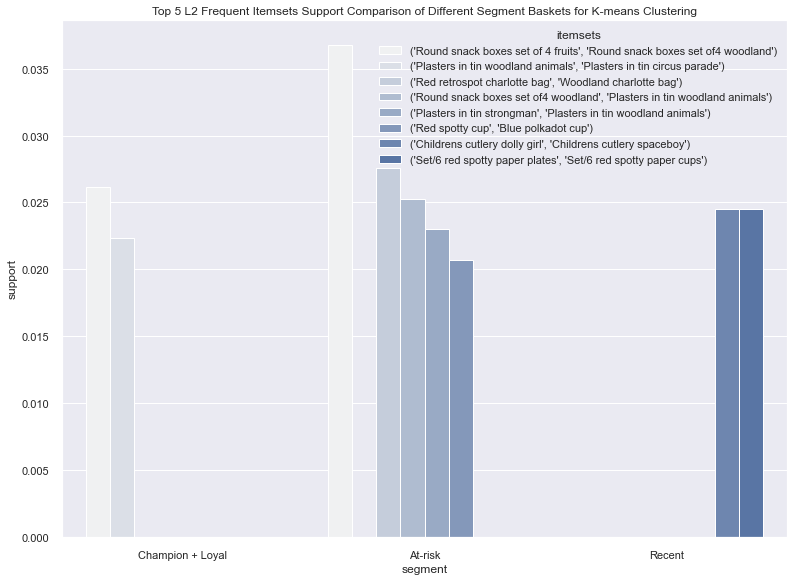

In [476]:
plt.figure(figsize=(13, 9.5))
sns.barplot(data=top5_table, x='segment', y='support', hue='itemsets', palette='light:b')
plt.title("Top 5 L2 Frequent Itemsets Support Comparison of Different Segment Baskets for K-means Clustering")
plt.show()

In [477]:
# Get the length for country column
len(frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

(2, 8, 2, 0)

In [517]:
# L2 itemset comparison as a whole
plot_table = pd.concat([pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*2) + (['At-risk']*8) + (['Recent']*2))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                                           itemsets  \
0   0.026184  (Round snack boxes set of 4 fruits, Round snac...   
1   0.022360  (Plasters in tin woodland animals, Plasters in...   
2   0.036782  (Round snack boxes set of 4 fruits, Round snac...   
3   0.027586  (Red retrospot charlotte bag, Woodland charlot...   
4   0.025287  (Round snack boxes set of4 woodland, Plasters ...   
5   0.022989  (Plasters in tin strongman, Plasters in tin wo...   
6   0.020690                (Red spotty cup, Blue polkadot cup)   
7   0.020690  (Plasters in tin strongman, Plasters in tin ci...   
8   0.020690  (Red toadstool led night light, Round snack bo...   
9   0.020690  (Set/6 red spotty paper plates, Set/6 red spot...   
10  0.024523  (Childrens cutlery dolly girl, Childrens cutle...   
11  0.024523  (Set/6 red spotty paper plates, Set/6 red spot...   

             segment  
0   Champion + Loyal  
1   Champion + Loyal  
2            At-risk  
3            At-risk  
4            At-risk  
5            At-risk  
6            At-risk  
7            At-risk  
8            At-risk  
9            At-risk  
10            Recent  
11            Recent

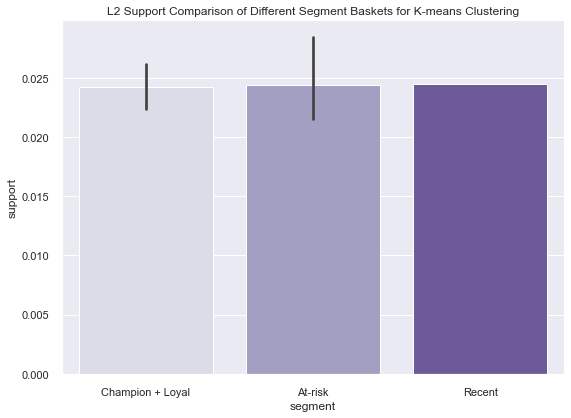

In [518]:
plt.figure(figsize=(9, 6.5))
sns.barplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L2 Support Comparison of Different Segment Baskets for K-means Clustering")
plt.show()

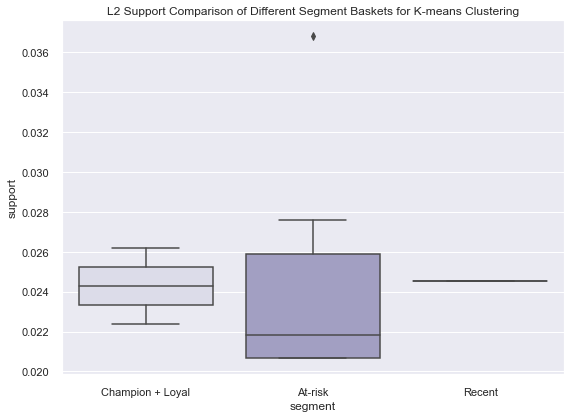

In [519]:
plt.figure(figsize=(9, 6.5))
sns.boxplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L2 Support Comparison of Different Segment Baskets for K-means Clustering")
plt.show()

#### Comparison of L3 Frequent Itemsets

None of the baskets have L3 frequent itemsets extracted, so no comparison can be made. L2 frequent itemsets are good enough for our comparison.

In [486]:
# Get the length for country column
len(frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False))

(0, 0, 0, 0)

### Top 5 Frequent Itemsets Comparison between baskets of Hierarchical Segments

In [487]:
pd.Series((['Champion + Loyal']*5) + (['At-risk']*5) + (['Recent']*5) + (['Lost']*5))

0     Champion + Loyal
1     Champion + Loyal
2     Champion + Loyal
3     Champion + Loyal
4     Champion + Loyal
5              At-risk
6              At-risk
7              At-risk
8              At-risk
9              At-risk
10              Recent
11              Recent
12              Recent
13              Recent
14              Recent
15                Lost
16                Lost
17                Lost
18                Lost
19                Lost
dtype: object

In [488]:
pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).reset_index(drop=True).head(), pd.Series(['Champion + Loyal']*5)], axis=1)

support                              itemsets                 0
0  0.091879  (Round snack boxes set of4 woodland)  Champion + Loyal
1  0.085863            (Regency cakestand 3 tier)  Champion + Loyal
2  0.069729     (Pack of 72 retrospot cake cases)  Champion + Loyal
3  0.066174       (Red toadstool led night light)  Champion + Loyal
4  0.063987   (Round snack boxes set of 4 fruits)  Champion + Loyal

In [491]:
pd.concat([frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).reset_index(drop=True).head(), pd.Series(['Recent']*5)], axis=1)

support                              itemsets       0
0  0.063291       (Red toadstool led night light)  Recent
1  0.063291  (Round snack boxes set of4 woodland)  Recent
2  0.050633  (Set of 6 ribbons vintage christmas)  Recent
3  0.050633              (6 ribbons rustic charm)  Recent
4  0.046414        (Baking set 9 piece retrospot)  Recent

In [492]:
pd.concat([pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head()]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*5) + (['At-risk']*5) + (['Recent']*5) + (['Lost']*5))], axis=1)

support                               itemsets                 0
0   0.091879   (Round snack boxes set of4 woodland)  Champion + Loyal
1   0.085863             (Regency cakestand 3 tier)  Champion + Loyal
2   0.069729      (Pack of 72 retrospot cake cases)  Champion + Loyal
3   0.066174        (Red toadstool led night light)  Champion + Loyal
4   0.063987    (Round snack boxes set of 4 fruits)  Champion + Loyal
5   0.078431   (Round snack boxes set of4 woodland)           At-risk
6   0.070028         (Baking set 9 piece retrospot)           At-risk
7   0.064426     (Plasters in tin woodland animals)           At-risk
8   0.064426               (Woodland charlotte bag)           At-risk
9   0.064426        (Red toadstool led night light)           At-risk
10  0.063291        (Red toadstool led night light)            Recent
11  0.063291   (Round snack boxes set of4 woodland)            Recent
12  0.050633   (Set of 6 ribbons vintage christmas)            Recent
13  0.050633               (6 ribbons rustic charm)            Recent
14  0.046414         (Baking set 9 piece retrospot)            Recent
15  0.076923  (Adjustment by john on 26/01/2010 16)              Lost
16  0.051282             (Red retrospot mini cases)              Lost
17  0.051282                (Lunch bag suki design)              Lost
18  0.051282    (Round snack boxes set of 4 fruits)              Lost
19  0.038462              (Jumbo bag red retrospot)              Lost

#### Comparison of L1 Frequent Itemsets

In [493]:
# L1 itemset comparison
top5_table = pd.concat([pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False).head()]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*5) + (['At-risk']*5) + (['Recent']*5) + (['Lost']*5))], axis=1)

top5_table = top5_table.rename(columns={0: 'segment'})

top5_table

support                               itemsets           segment
0   0.091879   (Round snack boxes set of4 woodland)  Champion + Loyal
1   0.085863             (Regency cakestand 3 tier)  Champion + Loyal
2   0.069729      (Pack of 72 retrospot cake cases)  Champion + Loyal
3   0.066174        (Red toadstool led night light)  Champion + Loyal
4   0.063987    (Round snack boxes set of 4 fruits)  Champion + Loyal
5   0.078431   (Round snack boxes set of4 woodland)           At-risk
6   0.070028         (Baking set 9 piece retrospot)           At-risk
7   0.064426     (Plasters in tin woodland animals)           At-risk
8   0.064426               (Woodland charlotte bag)           At-risk
9   0.064426        (Red toadstool led night light)           At-risk
10  0.063291        (Red toadstool led night light)            Recent
11  0.063291   (Round snack boxes set of4 woodland)            Recent
12  0.050633   (Set of 6 ribbons vintage christmas)            Recent
13  0.050633               (6 ribbons rustic charm)            Recent
14  0.046414         (Baking set 9 piece retrospot)            Recent
15  0.076923  (Adjustment by john on 26/01/2010 16)              Lost
16  0.051282             (Red retrospot mini cases)              Lost
17  0.051282                (Lunch bag suki design)              Lost
18  0.051282    (Round snack boxes set of 4 fruits)              Lost
19  0.038462              (Jumbo bag red retrospot)              Lost

In [494]:
top5_table['itemsets'] = top5_table['itemsets'].apply(list).apply(lambda x: x[0])
top5_table.head()

support                            itemsets           segment
0  0.091879  Round snack boxes set of4 woodland  Champion + Loyal
1  0.085863            Regency cakestand 3 tier  Champion + Loyal
2  0.069729     Pack of 72 retrospot cake cases  Champion + Loyal
3  0.066174       Red toadstool led night light  Champion + Loyal
4  0.063987   Round snack boxes set of 4 fruits  Champion + Loyal

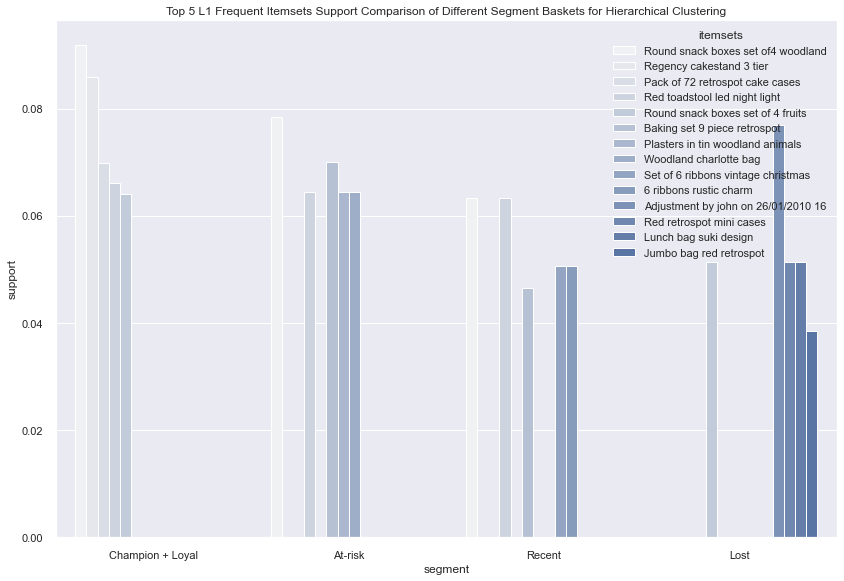

In [495]:
plt.figure(figsize=(14, 9.5))
sns.barplot(data=top5_table, x='segment', y='support', hue='itemsets', palette='light:b')
plt.title("Top 5 L1 Frequent Itemsets Support Comparison of Different Segment Baskets for Hierarchical Clustering")
plt.show()

In [496]:
# Get the length for country column
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False))

(101, 67, 72, 61)

In [520]:
# L1 itemset comparison as a whole
plot_table = pd.concat([pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*101) + (['At-risk']*67) + (['Recent']*72) + (['Lost']*61))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                              itemsets           segment
0    0.091879  (Round snack boxes set of4 woodland)  Champion + Loyal
1    0.085863            (Regency cakestand 3 tier)  Champion + Loyal
2    0.069729     (Pack of 72 retrospot cake cases)  Champion + Loyal
3    0.066174       (Red toadstool led night light)  Champion + Loyal
4    0.063987   (Round snack boxes set of 4 fruits)  Champion + Loyal
..        ...                                   ...               ...
296  0.025641       (Party cones carnival assorted)              Lost
297  0.025641                    (Picture dominoes)              Lost
298  0.025641                   (Pink baby bunting)              Lost
299  0.025641       (Pink fairy cake cushion cover)              Lost
300  0.025641                  (Wrap i love london)              Lost

[301 rows x 3 columns]

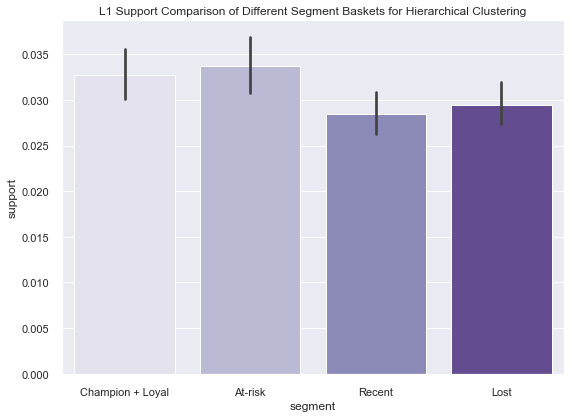

In [521]:
plt.figure(figsize=(9, 6.5))
sns.barplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L1 Support Comparison of Different Segment Baskets for Hierarchical Clustering")
plt.show()

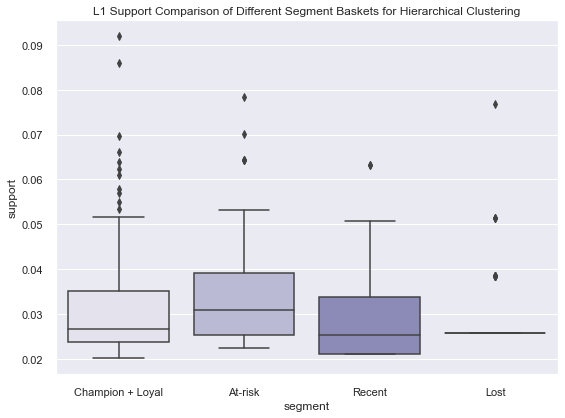

In [522]:
plt.figure(figsize=(9, 6.5))
sns.boxplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L1 Support Comparison of Different Segment Baskets for Hierarchical Clustering")
plt.show()

#### Comparison of L2 Frequent Itemsets

2, 1, 4, 5

In [502]:
pd.concat([frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).reset_index(drop=True).head(), pd.Series(['Champion + Loyal']*5)], axis=1)

support                                           itemsets  \
0  0.025641  (Picture dominoes, Charlotte bag dolly girl de...   
1  0.025641  (Polkadot rain hat, Charlotte bag dolly girl d...   
2  0.025641  (Recycled acapulco mat red, Recycled acapulco ...   
3  0.025641  (Recycled acapulco mat turquoise, Recycled aca...   
4  0.025641  (Recycled acapulco mat red, Recycled acapulco ...   

                  0  
0  Champion + Loyal  
1  Champion + Loyal  
2  Champion + Loyal  
3  Champion + Loyal  
4  Champion + Loyal

In [503]:
# L2 itemset comparison
top5_table = pd.concat([pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head(), 
                        frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False).head()]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*2) + (['At-risk']*1) + (['Recent']*4) + (['Lost']*5))], axis=1)

top5_table = top5_table.rename(columns={0: 'segment'})

top5_table

support                                           itemsets  \
0   0.027618  (Round snack boxes set of 4 fruits, Round snac...   
1   0.021876  (Plasters in tin woodland animals, Plasters in...   
2   0.022409  (Plasters in tin spaceboy, Plasters in tin woo...   
3   0.025316  (Set/6 red spotty paper plates, Set/6 red spot...   
4   0.021097  (Set of 6 ribbons vintage christmas, 6 ribbons...   
5   0.021097  (Alarm clock bakelike green, Alarm clock bakel...   
6   0.021097  (Childrens cutlery dolly girl, Childrens cutle...   
7   0.025641  (Picture dominoes, Charlotte bag dolly girl de...   
8   0.025641  (Polkadot rain hat, Charlotte bag dolly girl d...   
9   0.025641  (Recycled acapulco mat red, Recycled acapulco ...   
10  0.025641  (Recycled acapulco mat turquoise, Recycled aca...   
11  0.025641  (Recycled acapulco mat red, Recycled acapulco ...   

             segment  
0   Champion + Loyal  
1   Champion + Loyal  
2            At-risk  
3             Recent  
4             Recent  
5             Recent  
6             Recent  
7               Lost  
8               Lost  
9               Lost  
10              Lost  
11              Lost

In [504]:
top5_table['itemsets'] = top5_table['itemsets'].apply(list).apply(tuple)
top5_table.head()

support                                           itemsets  \
0  0.027618  (Round snack boxes set of 4 fruits, Round snac...   
1  0.021876  (Plasters in tin woodland animals, Plasters in...   
2  0.022409  (Plasters in tin spaceboy, Plasters in tin woo...   
3  0.025316  (Set/6 red spotty paper plates, Set/6 red spot...   
4  0.021097  (Set of 6 ribbons vintage christmas, 6 ribbons...   

            segment  
0  Champion + Loyal  
1  Champion + Loyal  
2           At-risk  
3            Recent  
4            Recent

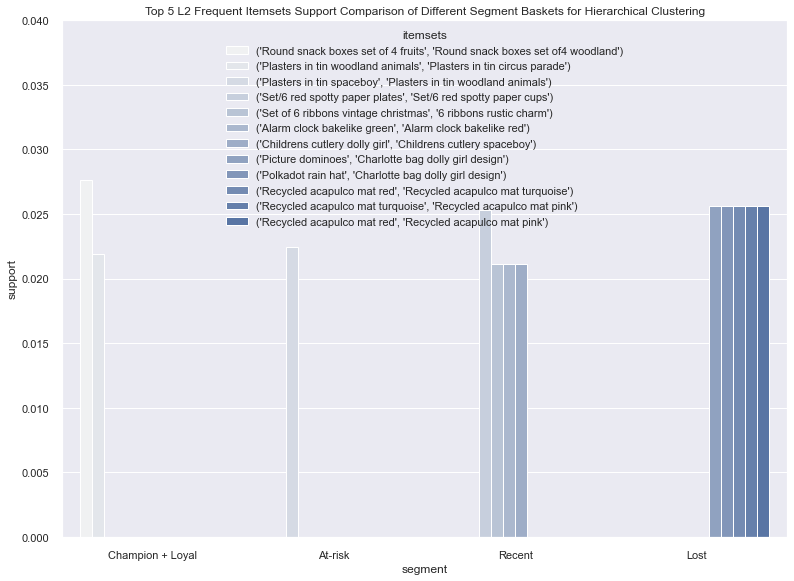

In [509]:
plt.figure(figsize=(13, 9.5))
sns.barplot(data=top5_table, x='segment', y='support', hue='itemsets', palette='light:b')
plt.title("Top 5 L2 Frequent Itemsets Support Comparison of Different Segment Baskets for Hierarchical Clustering")
plt.yticks([0.000, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040])
plt.show()

In [510]:
# Get the length for country column
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

(2, 1, 4, 22)

In [523]:
# L2 itemset comparison as a whole
plot_table = pd.concat([pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*2) + (['At-risk']*1) + (['Recent']*4) + (['Lost']*22))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                                           itemsets  \
0   0.027618  (Round snack boxes set of 4 fruits, Round snac...   
1   0.021876  (Plasters in tin woodland animals, Plasters in...   
2   0.022409  (Plasters in tin spaceboy, Plasters in tin woo...   
3   0.025316  (Set/6 red spotty paper plates, Set/6 red spot...   
4   0.021097  (Set of 6 ribbons vintage christmas, 6 ribbons...   
5   0.021097  (Alarm clock bakelike green, Alarm clock bakel...   
6   0.021097  (Childrens cutlery dolly girl, Childrens cutle...   
7   0.025641  (Picture dominoes, Charlotte bag dolly girl de...   
8   0.025641  (Polkadot rain hat, Charlotte bag dolly girl d...   
9   0.025641  (Recycled acapulco mat red, Recycled acapulco ...   
10  0.025641  (Recycled acapulco mat turquoise, Recycled aca...   
11  0.025641  (Recycled acapulco mat red, Recycled acapulco ...   
12  0.025641  (Vintage heads and tails card game, Polkadot r...   
13  0.025641      (Pink baby bunting, Red retrospot mini cases)   
14  0.025641  (Vintage heads and tails card game, Picture do...   
15  0.025641              (Picture dominoes, Polkadot rain hat)   
16  0.025641  (Pink love heart shape cup, Party cones carniv...   
17  0.025641  (Paper chain kit 50's christmas, Wrap i love l...   
18  0.025641  (Paper bunting retrospot, Set of 20 kids cooki...   
19  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...   
20  0.025641  (Pack of 6 handbag gift boxes, Party cones car...   
21  0.025641  (Pack of 20 napkins pantry design, Set 2 pantr...   
22  0.025641  (Wrap i love london, Make your own playtime ca...   
23  0.025641  (Paper chain kit 50's christmas, Make your own...   
24  0.025641  (Lunch bag suki design, Red retrospot mini cases)   
25  0.025641    (Jam jar with green lid, Jam jar with pink lid)   
26  0.025641  (Circus parade lunch box, Round snack boxes se...   
27  0.025641  (Vintage heads and tails card game, Charlotte ...   
28  0.025641  (Red retrospot mini cases, Silk purse babushka...   

             segment  
0   Champion + Loyal  
1   Champion + Loyal  
2            At-risk  
3             Recent  
4             Recent  
5             Recent  
6             Recent  
7               Lost  
8               Lost  
9               Lost  
10              Lost  
11              Lost  
12              Lost  
13              Lost  
14              Lost  
15              Lost  
16              Lost  
17              Lost  
18              Lost  
19              Lost  
20              Lost  
21              Lost  
22              Lost  
23              Lost  
24              Lost  
25              Lost  
26              Lost  
27              Lost  
28              Lost

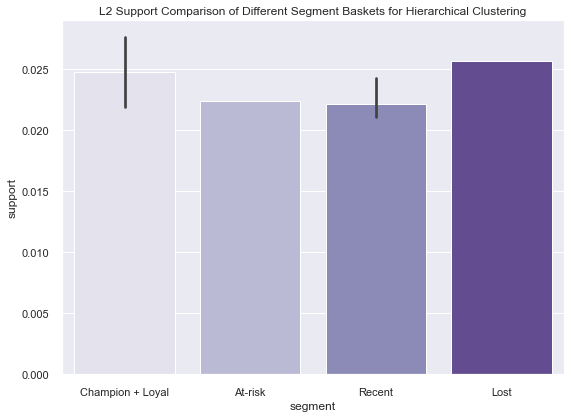

In [524]:
plt.figure(figsize=(9, 6.5))
sns.barplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L2 Support Comparison of Different Segment Baskets for Hierarchical Clustering")
plt.show()

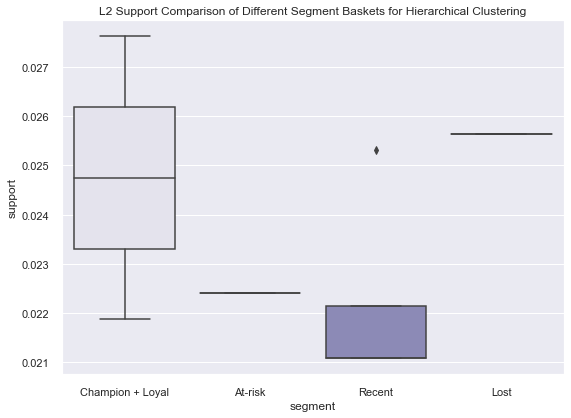

In [525]:
plt.figure(figsize=(9, 6.5))
sns.boxplot(data=plot_table, x='segment', y='support', palette='Purples')
plt.title("L2 Support Comparison of Different Segment Baskets for Hierarchical Clustering")
plt.show()

#### Comparison of L3 Frequent Itemsets

Only one basket which is basket 8 (Lost) has L3 frequent itemsets extracted, so no comparison can be made. For now, we just focus on basket 8.

In [526]:
# Get the length for country column
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False))

(0, 0, 0, 7)

In [527]:
pd.concat([frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False).reset_index(drop=True), pd.Series(['Lost']*7)], axis=1)

support                                           itemsets     0
0  0.025641  (Picture dominoes, Polkadot rain hat, Charlott...  Lost
1  0.025641  (Vintage heads and tails card game, Picture do...  Lost
2  0.025641  (Vintage heads and tails card game, Polkadot r...  Lost
3  0.025641  (Paper chain kit 50's christmas, Wrap i love l...  Lost
4  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...  Lost
5  0.025641  (Vintage heads and tails card game, Picture do...  Lost
6  0.025641  (Recycled acapulco mat turquoise, Recycled aca...  Lost

In [528]:
top7_table_b8 = pd.concat([frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False).reset_index(drop=True), 
                           pd.Series(['Lost']*7)], axis=1)

top7_table_b8 = top7_table_b8.rename(columns={0: 'segment'})

top7_table_b8

support                                           itemsets segment
0  0.025641  (Picture dominoes, Polkadot rain hat, Charlott...    Lost
1  0.025641  (Vintage heads and tails card game, Picture do...    Lost
2  0.025641  (Vintage heads and tails card game, Polkadot r...    Lost
3  0.025641  (Paper chain kit 50's christmas, Wrap i love l...    Lost
4  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...    Lost
5  0.025641  (Vintage heads and tails card game, Picture do...    Lost
6  0.025641  (Recycled acapulco mat turquoise, Recycled aca...    Lost

In [529]:
top7_table_b8['itemsets'] = top7_table_b8['itemsets'].apply(list).apply(tuple)

top7_table_b8['items'] = ['item 1', 'item 2', 'item 3', 'item 4', 'item 5', 'item 6', 'item 7']
top7_table_b8.head()

support                                           itemsets segment   items
0  0.025641  (Picture dominoes, Polkadot rain hat, Charlott...    Lost  item 1
1  0.025641  (Vintage heads and tails card game, Picture do...    Lost  item 2
2  0.025641  (Vintage heads and tails card game, Polkadot r...    Lost  item 3
3  0.025641  (Paper chain kit 50's christmas, Wrap i love l...    Lost  item 4
4  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...    Lost  item 5

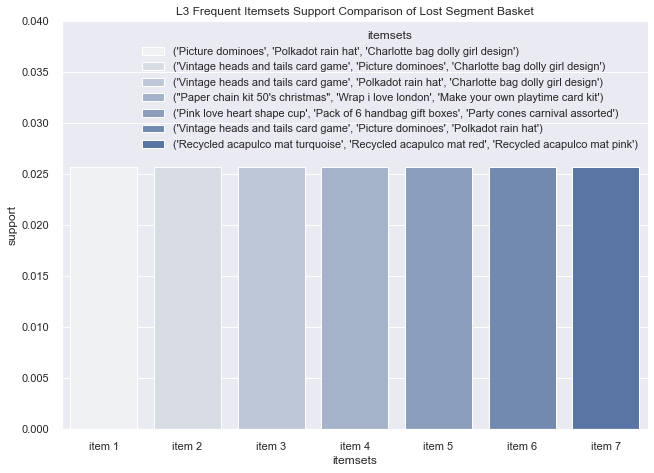

In [535]:
plt.figure(figsize=(10.5, 7.5))
bar = sns.barplot(data=top7_table_b8, x='items', y='support', hue='itemsets', dodge=False, palette='light:b')
#bar.legend(fontsize = 12.5, bbox_to_anchor = (1.015, 1))
plt.title("L3 Frequent Itemsets Support Comparison of Lost Segment Basket")
plt.xlabel("itemsets")
plt.yticks([0.000, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040])
plt.show()

No overall comparison can be made because all the support values are the same for the 7 itemsets above.

#### Comparison of L4 Frequent Itemsets

As seen below, the code shows that only one basket which is basket 8 (lost) has L4 itemsets and only 1 itemset, so no comparison can be made.

In [534]:
# Get the length for country column
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 4].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 4].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 4].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 4].sort_values(by='support', ascending=False))

(0, 0, 0, 1)

### Association Rules Comparison for K-means clustering

#### Support, Confidence and Lift Comparison

In [536]:
# Get the length for country column
len(filtered_rules_kchamp), len(filtered_rules_krisk), len(filtered_rules_krecent), len(filtered_rules_klost)

(1, 7, 4, 0)

In [537]:
pd.Series((["Champion + Lost"]*1) + (["At-risk"]*7) + (["Recent"]*4))

0     Champion + Lost
1             At-risk
2             At-risk
3             At-risk
4             At-risk
5             At-risk
6             At-risk
7             At-risk
8              Recent
9              Recent
10             Recent
11             Recent
dtype: object

In [538]:
metrics_table = pd.concat([pd.concat([filtered_rules_kchamp[['support', 'confidence', 'lift']], 
                                      filtered_rules_krisk[['support', 'confidence', 'lift']], 
                                      filtered_rules_krecent[['support', 'confidence', 'lift']]]).reset_index(drop=True), 
                           pd.Series((["Champion + Loyal"]*1) + (["At-risk"]*7) + (["Recent"]*4))], 
                          axis=1)

metrics_table = metrics_table.rename(columns={0: 'segment'})

metrics_table

support  confidence       lift           segment
0   0.026184    0.423810   4.785809  Champion + Loyal
1   0.020690    0.450000  15.057692           At-risk
2   0.020690    0.692308  15.057692           At-risk
3   0.020690    0.409091   7.414773           At-risk
4   0.022989    0.416667   5.178571           At-risk
5   0.027586    0.600000   7.909091           At-risk
6   0.020690    0.750000  27.187500           At-risk
7   0.020690    0.750000  27.187500           At-risk
8   0.024523    0.750000  22.937500            Recent
9   0.024523    0.750000  22.937500            Recent
10  0.024523    0.750000  21.173077            Recent
11  0.024523    0.692308  21.173077            Recent

In [539]:
pd.melt(metrics_table, id_vars=['segment'], value_vars=['support', 'confidence', 'lift'])

segment    variable      value
0   Champion + Loyal     support   0.026184
1            At-risk     support   0.020690
2            At-risk     support   0.020690
3            At-risk     support   0.020690
4            At-risk     support   0.022989
5            At-risk     support   0.027586
6            At-risk     support   0.020690
7            At-risk     support   0.020690
8             Recent     support   0.024523
9             Recent     support   0.024523
10            Recent     support   0.024523
11            Recent     support   0.024523
12  Champion + Loyal  confidence   0.423810
13           At-risk  confidence   0.450000
14           At-risk  confidence   0.692308
15           At-risk  confidence   0.409091
16           At-risk  confidence   0.416667
17           At-risk  confidence   0.600000
18           At-risk  confidence   0.750000
19           At-risk  confidence   0.750000
20            Recent  confidence   0.750000
21            Recent  confidence   0.750000
22            Recent  confidence   0.750000
23            Recent  confidence   0.692308
24  Champion + Loyal        lift   4.785809
25           At-risk        lift  15.057692
26           At-risk        lift  15.057692
27           At-risk        lift   7.414773
28           At-risk        lift   5.178571
29           At-risk        lift   7.909091
30           At-risk        lift  27.187500
31           At-risk        lift  27.187500
32            Recent        lift  22.937500
33            Recent        lift  22.937500
34            Recent        lift  21.173077
35            Recent        lift  21.173077

Support Comparison

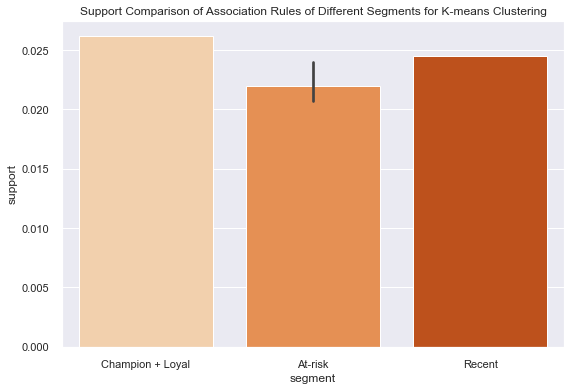

In [541]:
plt.figure(figsize=(9, 6))
sns.barplot(data=metrics_table, x='segment', y='support', palette='Oranges')
plt.title("Support Comparison of Association Rules of Different Segments for K-means Clustering")
plt.show()

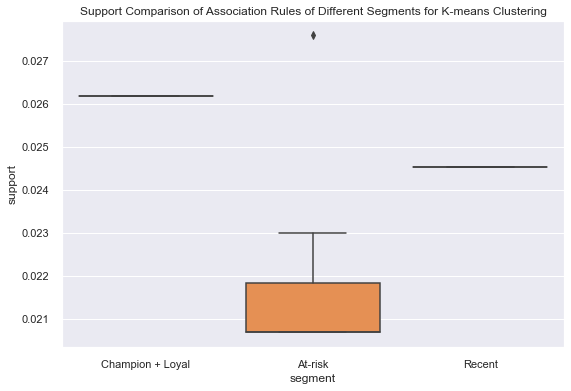

In [542]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=metrics_table, x='segment', y='support', palette='Oranges')
plt.title("Support Comparison of Association Rules of Different Segments for K-means Clustering")
plt.show()

Confidence Comparison

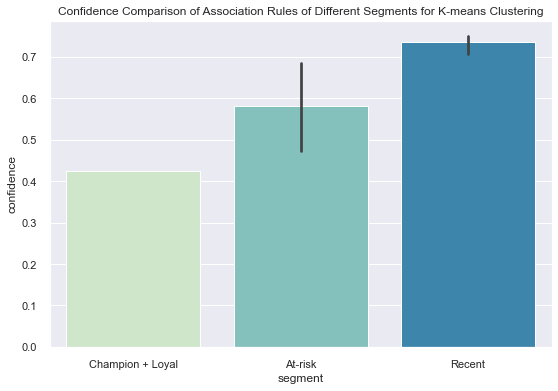

In [543]:
plt.figure(figsize=(9, 6))
sns.barplot(data=metrics_table, x='segment', y='confidence', palette='GnBu')
plt.title("Confidence Comparison of Association Rules of Different Segments for K-means Clustering")
plt.show()

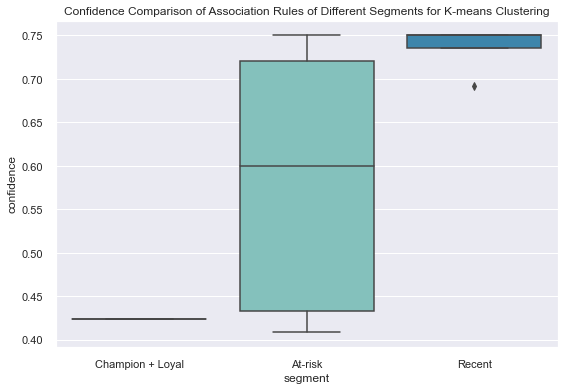

In [544]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=metrics_table, x='segment', y='confidence', palette='GnBu')
plt.title("Confidence Comparison of Association Rules of Different Segments for K-means Clustering")
plt.show()

Lift Comparison

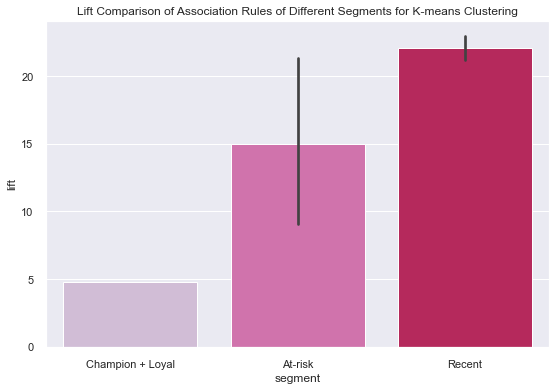

In [546]:
plt.figure(figsize=(9, 6))
sns.barplot(data=metrics_table, x='segment', y='lift', palette='PuRd')
plt.title("Lift Comparison of Association Rules of Different Segments for K-means Clustering")
plt.show()

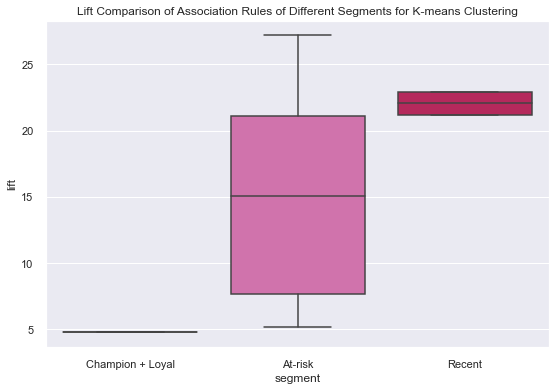

In [548]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=metrics_table, x='segment', y='lift', palette='PuRd')
plt.title("Lift Comparison of Association Rules of Different Segments for K-means Clustering")
plt.show()

#### Rules with the highest support

Champion + Loyal segment

In [549]:
filtered_rules_kchamp[filtered_rules_kchamp['support'] == filtered_rules_kchamp['support'].max()]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.061783            0.088555  0.026184     0.42381  4.785809   

   leverage  conviction  
2  0.020713    1.581846

At-risk segment

In [550]:
filtered_rules_krisk[filtered_rules_krisk['support'] == filtered_rules_krisk['support'].max()]

antecedents               consequents  \
8  (Red retrospot charlotte bag)  (Woodland charlotte bag)   

   antecedent support  consequent support   support  confidence      lift  \
8            0.045977            0.075862  0.027586         0.6  7.909091   

   leverage  conviction  
8  0.024098    2.310345

Recent segment

In [551]:
filtered_rules_krecent[filtered_rules_krecent['support'] == filtered_rules_krecent['support'].max()]

antecedents                      consequents  \
0   (Childrens cutlery dolly girl)     (Childrens cutlery spaceboy)   
1     (Childrens cutlery spaceboy)   (Childrens cutlery dolly girl)   
2  (Set/6 red spotty paper plates)    (Set/6 red spotty paper cups)   
3    (Set/6 red spotty paper cups)  (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.032698            0.032698  0.024523    0.750000  22.937500   
1            0.032698            0.032698  0.024523    0.750000  22.937500   
2            0.032698            0.035422  0.024523    0.750000  21.173077   
3            0.035422            0.032698  0.024523    0.692308  21.173077   

   leverage  conviction  
0  0.023454    3.869210  
1  0.023454    3.869210  
2  0.023365    3.858311  
3  0.023365    3.143733

Lost segment

In [552]:
filtered_rules_klost[filtered_rules_klost['support'] == filtered_rules_klost['support'].max()]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

#### Rules with the highest confidence

Champion + Loyal segment

In [553]:
filtered_rules_kchamp[filtered_rules_kchamp['confidence'] == filtered_rules_kchamp['confidence'].max()]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.061783            0.088555  0.026184     0.42381  4.785809   

   leverage  conviction  
2  0.020713    1.581846

At-risk segment

In [554]:
filtered_rules_krisk[filtered_rules_krisk['confidence'] == filtered_rules_krisk['confidence'].max()]

antecedents                      consequents  \
14  (Set/6 red spotty paper plates)    (Set/6 red spotty paper cups)   
15    (Set/6 red spotty paper cups)  (Set/6 red spotty paper plates)   

    antecedent support  consequent support  support  confidence     lift  \
14            0.027586            0.027586  0.02069        0.75  27.1875   
15            0.027586            0.027586  0.02069        0.75  27.1875   

    leverage  conviction  
14  0.019929    3.889655  
15  0.019929    3.889655

Recent segment

In [555]:
filtered_rules_krecent[filtered_rules_krecent['confidence'] == filtered_rules_krecent['confidence'].max()]

antecedents                     consequents  \
0   (Childrens cutlery dolly girl)    (Childrens cutlery spaceboy)   
1     (Childrens cutlery spaceboy)  (Childrens cutlery dolly girl)   
2  (Set/6 red spotty paper plates)   (Set/6 red spotty paper cups)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.032698            0.032698  0.024523        0.75  22.937500   
1            0.032698            0.032698  0.024523        0.75  22.937500   
2            0.032698            0.035422  0.024523        0.75  21.173077   

   leverage  conviction  
0  0.023454    3.869210  
1  0.023454    3.869210  
2  0.023365    3.858311

Lost segment

In [556]:
filtered_rules_klost[filtered_rules_klost['confidence'] == filtered_rules_klost['confidence'].max()]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

### Association Rules Comparison for Hierarchical clustering

#### Support, Confidence and Lift Comparison

In [557]:
# Get the length for country column
len(filtered_rules_hchamp), len(filtered_rules_hrisk), len(filtered_rules_hrecent), len(filtered_rules_hlost)

(1, 1, 8, 100)

In [559]:
pd.Series((["Champion + Loyal"]*1) + (["At-risk"]*1) + (["Recent"]*8) + (["Lost"]*100))

0      Champion + Loyal
1               At-risk
2                Recent
3                Recent
4                Recent
             ...       
105                Lost
106                Lost
107                Lost
108                Lost
109                Lost
Length: 110, dtype: object

In [560]:
metrics_table = pd.concat([pd.concat([filtered_rules_hchamp[['support', 'confidence', 'lift']], 
                                      filtered_rules_hrisk[['support', 'confidence', 'lift']], 
                                      filtered_rules_hrecent[['support', 'confidence', 'lift']], 
                                      filtered_rules_hlost[['support', 'confidence', 'lift']]]).reset_index(drop=True), 
                           pd.Series((["Champion + Loyal"]) + (["At-risk"]) + (["Recent"]*8) + (["Lost"]*100))], 
                          axis=1)

metrics_table = metrics_table.rename(columns={0: 'segment'})

metrics_table

support  confidence       lift           segment
0    0.027618    0.431624   4.697764  Champion + Loyal
1    0.022409    0.444444   6.898551           At-risk
2    0.021097    0.416667   8.229167            Recent
3    0.021097    0.416667   8.229167            Recent
4    0.021097    0.714286  18.809524            Recent
..        ...         ...        ...               ...
105  0.025641    1.000000  39.000000              Lost
106  0.025641    1.000000  39.000000              Lost
107  0.025641    1.000000  39.000000              Lost
108  0.025641    1.000000  39.000000              Lost
109  0.025641    1.000000  39.000000              Lost

[110 rows x 4 columns]

In [561]:
pd.melt(metrics_table, id_vars=['segment'], value_vars=['support', 'confidence', 'lift'])

segment variable      value
0    Champion + Loyal  support   0.027618
1             At-risk  support   0.022409
2              Recent  support   0.021097
3              Recent  support   0.021097
4              Recent  support   0.021097
..                ...      ...        ...
325              Lost     lift  39.000000
326              Lost     lift  39.000000
327              Lost     lift  39.000000
328              Lost     lift  39.000000
329              Lost     lift  39.000000

[330 rows x 3 columns]

Support Comparison

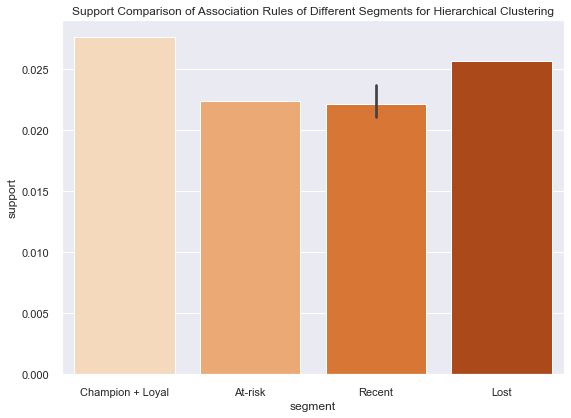

In [562]:
plt.figure(figsize=(9, 6.5))
sns.barplot(data=metrics_table, x='segment', y='support', palette='Oranges')
plt.title("Support Comparison of Association Rules of Different Segments for Hierarchical Clustering")
plt.show()

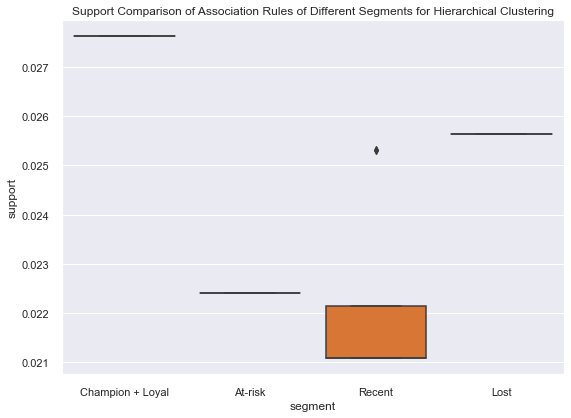

In [563]:
plt.figure(figsize=(9, 6.5))
sns.boxplot(data=metrics_table, x='segment', y='support', palette='Oranges')
plt.title("Support Comparison of Association Rules of Different Segments for Hierarchical Clustering")
plt.show()

Confidence Comparison

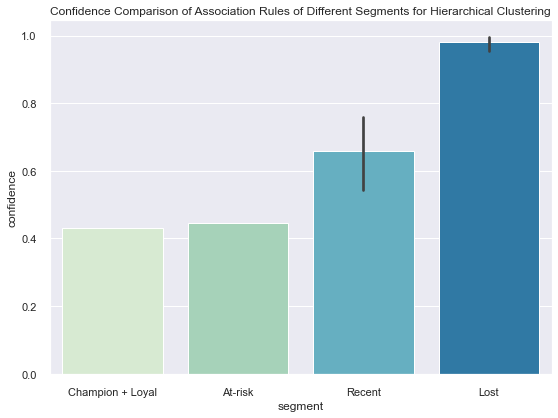

In [564]:
plt.figure(figsize=(9, 6.5))
sns.barplot(data=metrics_table, x='segment', y='confidence', palette='GnBu')
plt.title("Confidence Comparison of Association Rules of Different Segments for Hierarchical Clustering")
plt.show()

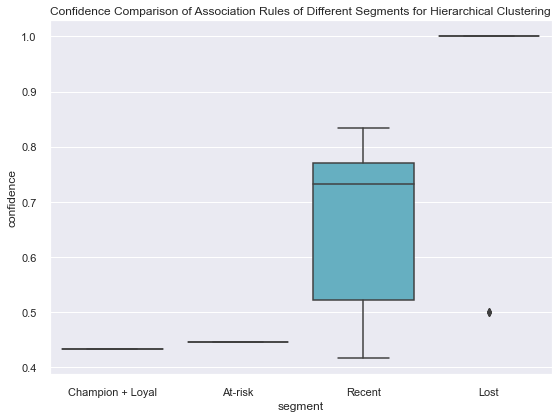

In [565]:
plt.figure(figsize=(9, 6.5))
sns.boxplot(data=metrics_table, x='segment', y='confidence', palette='GnBu')
plt.title("Confidence Comparison of Association Rules of Different Segments for Hierarchical Clustering")
plt.show()

Lift Comparison

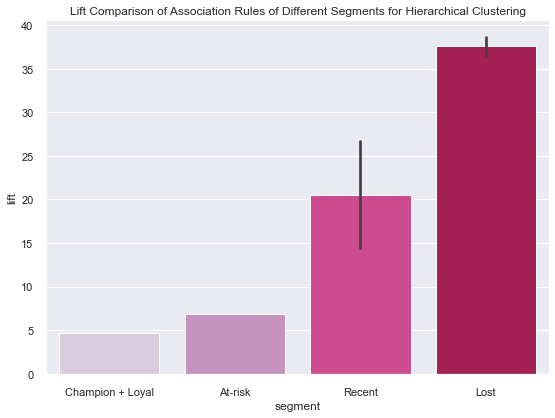

In [566]:
plt.figure(figsize=(9, 6.5))
sns.barplot(data=metrics_table, x='segment', y='lift', palette='PuRd')
plt.title("Lift Comparison of Association Rules of Different Segments for Hierarchical Clustering")
plt.show()

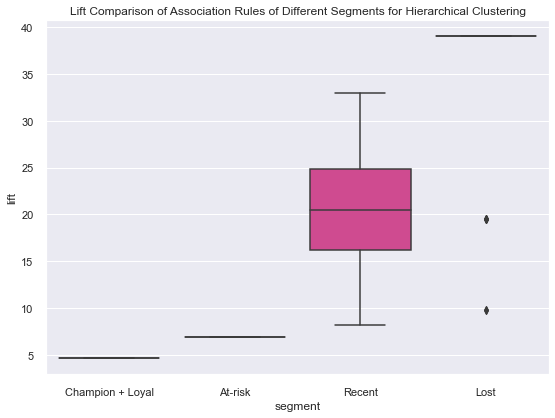

In [567]:
plt.figure(figsize=(9, 6.5))
sns.boxplot(data=metrics_table, x='segment', y='lift', palette='PuRd')
plt.title("Lift Comparison of Association Rules of Different Segments for Hierarchical Clustering")
plt.show()

#### Rules with the highest support

Champion + Loyal segment

In [568]:
filtered_rules_hchamp[filtered_rules_hchamp['support'] == filtered_rules_hchamp['support'].max()]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.063987            0.091879  0.027618    0.431624  4.697764   

   leverage  conviction  
2  0.021739    1.597747

At-risk segment

In [569]:
filtered_rules_hrisk[filtered_rules_hrisk['support'] == filtered_rules_hrisk['support'].max()]

antecedents                         consequents  \
0  (Plasters in tin spaceboy)  (Plasters in tin woodland animals)   

   antecedent support  consequent support   support  confidence      lift  \
0             0.05042            0.064426  0.022409    0.444444  6.898551   

   leverage  conviction  
0  0.019161    1.684034

Recent segment

In [570]:
filtered_rules_hrecent[filtered_rules_hrecent['support'] == filtered_rules_hrecent['support'].max()]

antecedents                      consequents  \
6  (Set/6 red spotty paper plates)    (Set/6 red spotty paper cups)   
7    (Set/6 red spotty paper cups)  (Set/6 red spotty paper plates)   

   antecedent support  consequent support   support  confidence      lift  \
6            0.033755            0.033755  0.025316        0.75  22.21875   
7            0.033755            0.033755  0.025316        0.75  22.21875   

   leverage  conviction  
6  0.024177    3.864979  
7  0.024177    3.864979

Lost segment

In [571]:
filtered_rules_hlost[filtered_rules_hlost['support'] == filtered_rules_hlost['support'].max()]

antecedents  \
0                                  (Picture dominoes)   
1                   (Charlotte bag dolly girl design)   
2                                 (Polkadot rain hat)   
3                   (Charlotte bag dolly girl design)   
4                 (Vintage heads and tails card game)   
..                                                ...   
95  (Polkadot rain hat, Charlotte bag dolly girl d...   
96                (Vintage heads and tails card game)   
97                                 (Picture dominoes)   
98                                (Polkadot rain hat)   
99                  (Charlotte bag dolly girl design)   

                                          consequents  antecedent support  \
0                   (Charlotte bag dolly girl design)            0.025641   
1                                  (Picture dominoes)            0.025641   
2                   (Charlotte bag dolly girl design)            0.025641   
3                                 (Polkadot rain hat)            0.025641   
4                   (Charlotte bag dolly girl design)            0.025641   
..                                                ...                 ...   
95  (Vintage heads and tails card game, Picture do...            0.025641   
96  (Picture dominoes, Polkadot rain hat, Charlott...            0.025641   
97  (Vintage heads and tails card game, Polkadot r...            0.025641   
98  (Vintage heads and tails card game, Picture do...            0.025641   
99  (Vintage heads and tails card game, Picture do...            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
0             0.025641  0.025641         1.0  39.0  0.024984         inf  
1             0.025641  0.025641         1.0  39.0  0.024984         inf  
2             0.025641  0.025641         1.0  39.0  0.024984         inf  
3             0.025641  0.025641         1.0  39.0  0.024984         inf  
4             0.025641  0.025641         1.0  39.0  0.024984         inf  
..                 ...       ...         ...   ...       ...         ...  
95            0.025641  0.025641         1.0  39.0  0.024984         inf  
96            0.025641  0.025641         1.0  39.0  0.024984         inf  
97            0.025641  0.025641         1.0  39.0  0.024984         inf  
98            0.025641  0.025641         1.0  39.0  0.024984         inf  
99            0.025641  0.025641         1.0  39.0  0.024984         inf  

[100 rows x 9 columns]

#### Rules with the highest confidence

Champion + Loyal segment

In [572]:
filtered_rules_hchamp[filtered_rules_hchamp['confidence'] == filtered_rules_hchamp['confidence'].max()]

antecedents                           consequents  \
2  (Round snack boxes set of 4 fruits)  (Round snack boxes set of4 woodland)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.063987            0.091879  0.027618    0.431624  4.697764   

   leverage  conviction  
2  0.021739    1.597747

At-risk segment

In [573]:
filtered_rules_hrisk[filtered_rules_hrisk['confidence'] == filtered_rules_hrisk['confidence'].max()]

antecedents                         consequents  \
0  (Plasters in tin spaceboy)  (Plasters in tin woodland animals)   

   antecedent support  consequent support   support  confidence      lift  \
0             0.05042            0.064426  0.022409    0.444444  6.898551   

   leverage  conviction  
0  0.019161    1.684034

Recent segment

In [574]:
filtered_rules_hrecent[filtered_rules_hrecent['confidence'] == filtered_rules_hrecent['confidence'].max()]

antecedents                     consequents  \
4  (Childrens cutlery dolly girl)    (Childrens cutlery spaceboy)   
5    (Childrens cutlery spaceboy)  (Childrens cutlery dolly girl)   

   antecedent support  consequent support   support  confidence       lift  \
4            0.025316            0.025316  0.021097    0.833333  32.916667   
5            0.025316            0.025316  0.021097    0.833333  32.916667   

   leverage  conviction  
4  0.020456    5.848101  
5  0.020456    5.848101

Lost segment

In [576]:
filtered_rules_hlost[filtered_rules_hlost['confidence'] == filtered_rules_hlost['confidence'].max()]

antecedents  \
0                                  (Picture dominoes)   
1                   (Charlotte bag dolly girl design)   
2                                 (Polkadot rain hat)   
3                   (Charlotte bag dolly girl design)   
4                 (Vintage heads and tails card game)   
..                                                ...   
95  (Polkadot rain hat, Charlotte bag dolly girl d...   
96                (Vintage heads and tails card game)   
97                                 (Picture dominoes)   
98                                (Polkadot rain hat)   
99                  (Charlotte bag dolly girl design)   

                                          consequents  antecedent support  \
0                   (Charlotte bag dolly girl design)            0.025641   
1                                  (Picture dominoes)            0.025641   
2                   (Charlotte bag dolly girl design)            0.025641   
3                                 (Polkadot rain hat)            0.025641   
4                   (Charlotte bag dolly girl design)            0.025641   
..                                                ...                 ...   
95  (Vintage heads and tails card game, Picture do...            0.025641   
96  (Picture dominoes, Polkadot rain hat, Charlott...            0.025641   
97  (Vintage heads and tails card game, Polkadot r...            0.025641   
98  (Vintage heads and tails card game, Picture do...            0.025641   
99  (Vintage heads and tails card game, Picture do...            0.025641   

    consequent support   support  confidence  lift  leverage  conviction  
0             0.025641  0.025641         1.0  39.0  0.024984         inf  
1             0.025641  0.025641         1.0  39.0  0.024984         inf  
2             0.025641  0.025641         1.0  39.0  0.024984         inf  
3             0.025641  0.025641         1.0  39.0  0.024984         inf  
4             0.025641  0.025641         1.0  39.0  0.024984         inf  
..                 ...       ...         ...   ...       ...         ...  
95            0.025641  0.025641         1.0  39.0  0.024984         inf  
96            0.025641  0.025641         1.0  39.0  0.024984         inf  
97            0.025641  0.025641         1.0  39.0  0.024984         inf  
98            0.025641  0.025641         1.0  39.0  0.024984         inf  
99            0.025641  0.025641         1.0  39.0  0.024984         inf  

[96 rows x 9 columns]

### Frequent Itemset Counts Comparison for Different Segments (K-means)

#### For L1 Itemsets

In [577]:
# Get the length for country column
len(frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False))

(106, 115, 52, 42)

In [578]:
plot_table = pd.concat([pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*106) + (['At-risk']*115) + (['Recent']*52) + (['Lost']*42))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                              itemsets           segment
0    0.088555  (Round snack boxes set of4 woodland)  Champion + Loyal
1    0.086496            (Regency cakestand 3 tier)  Champion + Loyal
2    0.067667     (Pack of 72 retrospot cake cases)  Champion + Loyal
3    0.065902       (Red toadstool led night light)  Champion + Loyal
4    0.064431       (Plasters in tin circus parade)  Champion + Loyal
..        ...                                   ...               ...
310  0.023438              (Lunch bag apple design)              Lost
311  0.023438             (Jumbo bag pink polkadot)              Lost
312  0.023438               (Cooking set retrospot)              Lost
313  0.023438          (Assorted colour mini cases)              Lost
314  0.023438     (Woodland design cotton tote bag)              Lost

[315 rows x 3 columns]

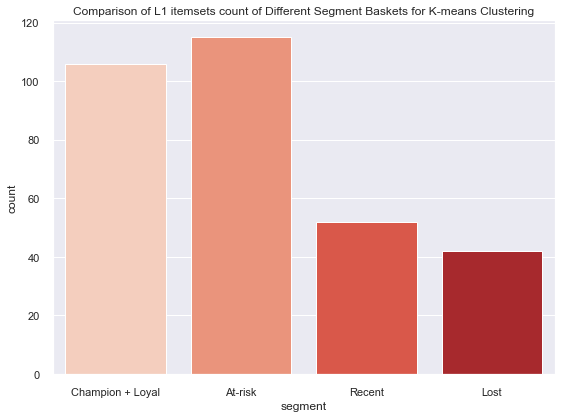

In [579]:
plt.figure(figsize=(9, 6.5))
sns.countplot(data=plot_table, x='segment', palette='Reds')
plt.title("Comparison of L1 itemsets count of Different Segment Baskets for K-means Clustering")
plt.show()

#### For L2 Itemsets

In [580]:
# Get the length for country column
len(frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

(2, 8, 2, 0)

In [581]:
plot_table = pd.concat([pd.concat([frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*2) + (['At-risk']*8) + (['Recent']*2))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                                           itemsets  \
0   0.026184  (Round snack boxes set of 4 fruits, Round snac...   
1   0.022360  (Plasters in tin woodland animals, Plasters in...   
2   0.036782  (Round snack boxes set of 4 fruits, Round snac...   
3   0.027586  (Red retrospot charlotte bag, Woodland charlot...   
4   0.025287  (Round snack boxes set of4 woodland, Plasters ...   
5   0.022989  (Plasters in tin strongman, Plasters in tin wo...   
6   0.020690                (Red spotty cup, Blue polkadot cup)   
7   0.020690  (Plasters in tin strongman, Plasters in tin ci...   
8   0.020690  (Red toadstool led night light, Round snack bo...   
9   0.020690  (Set/6 red spotty paper plates, Set/6 red spot...   
10  0.024523  (Childrens cutlery dolly girl, Childrens cutle...   
11  0.024523  (Set/6 red spotty paper plates, Set/6 red spot...   

             segment  
0   Champion + Loyal  
1   Champion + Loyal  
2            At-risk  
3            At-risk  
4            At-risk  
5            At-risk  
6            At-risk  
7            At-risk  
8            At-risk  
9            At-risk  
10            Recent  
11            Recent

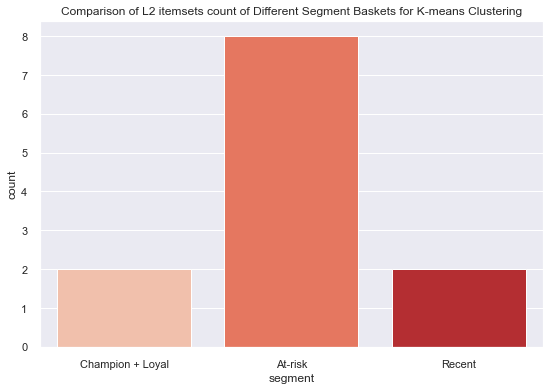

In [582]:
plt.figure(figsize=(9, 6))
sns.countplot(data=plot_table, x='segment', palette='Reds')
plt.title("Comparison of L2 itemsets count of Different Segment Baskets for K-means Clustering")
plt.show()

#### For L3 Itemsets

No comparison can be made as there is no L3 itemsets for all segments.

In [583]:
# Get the length for country column
len(frequent_itemsets_kchamp[frequent_itemsets_kchamp['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krisk[frequent_itemsets_krisk['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_krecent[frequent_itemsets_krecent['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_klost[frequent_itemsets_klost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False))

(0, 0, 0, 0)

### Frequent Itemset Counts Comparison for Different Segments (Hierarchical)

#### For L1 Itemsets

In [584]:
# Get the length for country column
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False))

(101, 67, 72, 61)

In [585]:
plot_table = pd.concat([pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 1].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 1].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*101) + (['At-risk']*67) + (['Recent']*72) + (['Lost']*61))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                              itemsets           segment
0    0.091879  (Round snack boxes set of4 woodland)  Champion + Loyal
1    0.085863            (Regency cakestand 3 tier)  Champion + Loyal
2    0.069729     (Pack of 72 retrospot cake cases)  Champion + Loyal
3    0.066174       (Red toadstool led night light)  Champion + Loyal
4    0.063987   (Round snack boxes set of 4 fruits)  Champion + Loyal
..        ...                                   ...               ...
296  0.025641       (Party cones carnival assorted)              Lost
297  0.025641                    (Picture dominoes)              Lost
298  0.025641                   (Pink baby bunting)              Lost
299  0.025641       (Pink fairy cake cushion cover)              Lost
300  0.025641                  (Wrap i love london)              Lost

[301 rows x 3 columns]

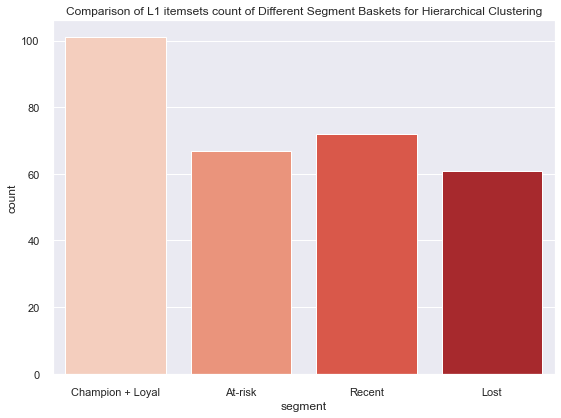

In [586]:
plt.figure(figsize=(9, 6.5))
sns.countplot(data=plot_table, x='segment', palette='Reds')
plt.title("Comparison of L1 itemsets count of Different Segment Baskets for Hierarchical Clustering")
plt.show()

#### For L2 Itemsets

In [587]:
# Get the length for country column
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False))

(2, 1, 4, 22)

In [588]:
plot_table = pd.concat([pd.concat([frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 2].sort_values(by='support', ascending=False), 
                        frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 2].sort_values(by='support', ascending=False)]).reset_index(drop=True), 
                        pd.Series((['Champion + Loyal']*2) + (['At-risk']) + (['Recent']*4) + (['Lost']*22))], axis=1)

plot_table = plot_table.rename(columns={0: 'segment'})

plot_table

support                                           itemsets  \
0   0.027618  (Round snack boxes set of 4 fruits, Round snac...   
1   0.021876  (Plasters in tin woodland animals, Plasters in...   
2   0.022409  (Plasters in tin spaceboy, Plasters in tin woo...   
3   0.025316  (Set/6 red spotty paper plates, Set/6 red spot...   
4   0.021097  (Set of 6 ribbons vintage christmas, 6 ribbons...   
5   0.021097  (Alarm clock bakelike green, Alarm clock bakel...   
6   0.021097  (Childrens cutlery dolly girl, Childrens cutle...   
7   0.025641  (Picture dominoes, Charlotte bag dolly girl de...   
8   0.025641  (Polkadot rain hat, Charlotte bag dolly girl d...   
9   0.025641  (Recycled acapulco mat red, Recycled acapulco ...   
10  0.025641  (Recycled acapulco mat turquoise, Recycled aca...   
11  0.025641  (Recycled acapulco mat red, Recycled acapulco ...   
12  0.025641  (Vintage heads and tails card game, Polkadot r...   
13  0.025641      (Pink baby bunting, Red retrospot mini cases)   
14  0.025641  (Vintage heads and tails card game, Picture do...   
15  0.025641              (Picture dominoes, Polkadot rain hat)   
16  0.025641  (Pink love heart shape cup, Party cones carniv...   
17  0.025641  (Paper chain kit 50's christmas, Wrap i love l...   
18  0.025641  (Paper bunting retrospot, Set of 20 kids cooki...   
19  0.025641  (Pink love heart shape cup, Pack of 6 handbag ...   
20  0.025641  (Pack of 6 handbag gift boxes, Party cones car...   
21  0.025641  (Pack of 20 napkins pantry design, Set 2 pantr...   
22  0.025641  (Wrap i love london, Make your own playtime ca...   
23  0.025641  (Paper chain kit 50's christmas, Make your own...   
24  0.025641  (Lunch bag suki design, Red retrospot mini cases)   
25  0.025641    (Jam jar with green lid, Jam jar with pink lid)   
26  0.025641  (Circus parade lunch box, Round snack boxes se...   
27  0.025641  (Vintage heads and tails card game, Charlotte ...   
28  0.025641  (Red retrospot mini cases, Silk purse babushka...   

             segment  
0   Champion + Loyal  
1   Champion + Loyal  
2            At-risk  
3             Recent  
4             Recent  
5             Recent  
6             Recent  
7               Lost  
8               Lost  
9               Lost  
10              Lost  
11              Lost  
12              Lost  
13              Lost  
14              Lost  
15              Lost  
16              Lost  
17              Lost  
18              Lost  
19              Lost  
20              Lost  
21              Lost  
22              Lost  
23              Lost  
24              Lost  
25              Lost  
26              Lost  
27              Lost  
28              Lost

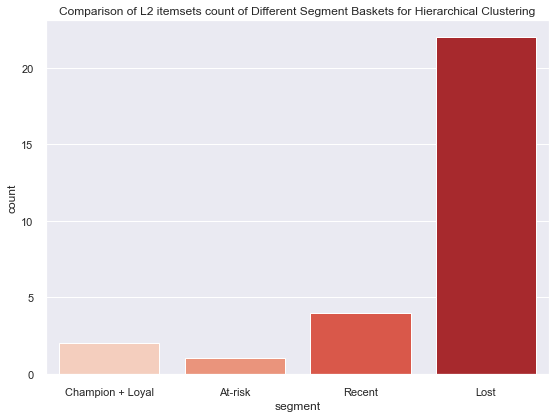

In [589]:
plt.figure(figsize=(9, 6.5))
sns.countplot(data=plot_table, x='segment', palette='Reds')
plt.title("Comparison of L2 itemsets count of Different Segment Baskets for Hierarchical Clustering")
plt.show()

#### For L3 Itemsets

No comparison can be made as there is only one segment which is Lost segment that contains L3 itemsets.

In [590]:
# Get the length for country column
len(frequent_itemsets_hchamp[frequent_itemsets_hchamp['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrisk[frequent_itemsets_hrisk['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hrecent[frequent_itemsets_hrecent['itemsets'].map(len) == 3].sort_values(by='support', ascending=False)), \
len(frequent_itemsets_hlost[frequent_itemsets_hlost['itemsets'].map(len) == 3].sort_values(by='support', ascending=False))

(0, 0, 0, 7)